In [11]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d, Axes3D
%run utils.ipynb

d_phi = 1*np.pi/180
d_phi2 = 5*np.pi/180
d_z = 10

inStartTime = 0
inElapsedTime = 0

In [3]:
hits, cells, particles, truth = load_data_single_event(1000)
hits_trans_info = []

for row in hits.itertuples():
    hit_id = row.__getattribute__('hit_id')
    x = row.__getattribute__('x')
    y = row.__getattribute__('y')
    z = row.__getattribute__('z')
    volume_id = row.__getattribute__('volume_id')
    layer_id = row.__getattribute__('layer_id')
    r, phi, z = cartesian_to_3d_polar(x,y,z)
    hits_trans_info.append([hit_id, r, phi, z, volume_id, layer_id])
hits_array = np.array (hits_trans_info)
#hit_id - 1 is the index of the hit
hit_idi = 0
ri = 1
phii = 2
zi = 3
volume_idi = 4
layer_idi = 5

hits_trans = pd.DataFrame (hits_trans_info, columns=["hit_id", "r", "phi", "z", "volume_id", "layer_id"])
hits_third_layer = hits_trans.loc[(hits_trans['volume_id'] == 8) & (hits_trans['layer_id'] == 6)]
rThirdLayer = (np.average(hits_third_layer['r'].values))
hits_second_layer = hits_trans.loc[(hits_trans['volume_id'] == 8) & (hits_trans['layer_id'] == 4)]
rSecondLayer = (np.average(hits_second_layer['r'].values))
hits_first_layer = hits_trans.loc[(hits_trans['volume_id'] == 8) & (hits_trans['layer_id'] == 2)]
rFirstLayer = (np.average(hits_first_layer['r'].values))

hits_first_layer_array = hits_first_layer.get_values()
hits_second_layer_array = hits_second_layer.get_values()
hits_third_layer_array = hits_third_layer.get_values()

In [4]:
hits_trans.head()

hit_id          r       phi       z  volume_id  layer_id
0       1  64.807048 -3.030827 -1502.5          7         2
1       2  55.339749  3.130112 -1502.5          7         2
2       3  83.838290 -3.127959 -1502.5          7         2
3       4  96.461773 -3.056055 -1502.5          7         2
4       5  63.370336 -2.993168 -1502.5          7         2

In [5]:
def quadrantShift (phi):
    if (phi < 0):
        return 2*np.pi + phi
    else:
        return phi

In [6]:
def createSeeds (hits):
    seeds = []
    for hit in hits_first_layer_array:
        seeds += createSeedsFromFirstHit (hits, int(np.round(hit[hit_idi])))
    return seeds

In [7]:
def createSeedsFromFirstHit(hits, hit_id):
    global inStartTime
    global inElapsedTime
    seeds = []
    hit = hits[hit_id - 1]
    assert (hit[layer_idi] == 2)
    phi = hit[phii]
    for thisHit in hits_second_layer_array:
        thisPhi = thisHit[phii]
        if ((thisPhi > phi - d_phi/2 and thisPhi < phi + d_phi/2)
            or (quadrantShift(thisPhi) > quadrantShift(phi - d_phi/2)
            and quadrantShift(thisPhi) < quadrantShift(phi + d_phi/2))):
            seeds += createSeedsFromSecondHit (hits, (hit_id, int(np.round(thisHit[hit_idi]))))
    return seeds

In [8]:
def createSeedsFromSecondHit (hits, twoSeed):
    global inStartTime
    global inElapsedTime
    seeds = []
    phi1 = hits[twoSeed[0] - 1][phii]
    phi2 = hits[twoSeed[1] - 1][phii]
    r1 = hits[twoSeed[0] - 1][ri]
    r2 = hits[twoSeed[1] - 1][ri]
    r3 = rThirdLayer
    z1 = hits[twoSeed[0] - 1][zi]
    z2 = hits[twoSeed[1] - 1][zi]
    m = (phi2 - phi1)/(r2 - r1)
    b = phi1 - r1*m
    phi3 = r3*m + b
    m = (z2 - z1)/(r2 - r1)
    b = z1 - r1*m
    z3 = r3*m + b
    if (abs(phi3) > np.pi/2):
        phi3 = quadrantShift (phi3)
    phiMin = phi3 - d_phi2/2
    phiMax = phi3 + d_phi2/2
    zMin = z3 - d_z/2
    zMax = z3 + d_z/2
    inStartTime = time.time()
    for hit in hits_third_layer_array:
        thisPhi = hit[phii]
        thisZ = hit[zi]
        if (thisPhi < phiMax and thisPhi > phiMin and thisZ < zMax and thisZ > zMin):
                seeds.append((twoSeed[0], twoSeed[1], hit[0]))
                print((twoSeed[0], twoSeed[1], hit[0]))
    inElapsedTime += time.time() - inStartTime
    return seeds

In [10]:
startTime = time.time()
inElapsedTime = 0
seeds = createSeeds(hits_array)
print (time.time() - startTime)
print (inElapsedTime)

(16881, 26383, 34295.0)
(16881, 26706, 36819.0)
(16881, 26713, 35978.0)
(16881, 26717, 35970.0)
(16881, 26717, 35975.0)
(16881, 26722, 36819.0)
(16881, 27832, 39058.0)
(16881, 27838, 39061.0)
(16883, 26768, 36883.0)
(16883, 27934, 39093.0)
(16883, 28810, 39743.0)
(16883, 28810, 39745.0)
(16883, 28811, 39448.0)
(16883, 28814, 39743.0)
(16883, 28814, 39745.0)
(16883, 28820, 39448.0)
(16884, 25853, 33361.0)
(16884, 26113, 33965.0)
(16884, 26429, 34367.0)
(16884, 26429, 34369.0)
(16884, 26434, 34833.0)
(16884, 26434, 34839.0)
(16884, 27986, 38716.0)
(16884, 27986, 38718.0)
(16884, 27986, 38722.0)
(16884, 28885, 39773.0)
(16885, 26443, 34377.0)
(16885, 26443, 34836.0)
(16885, 26443, 34847.0)
(16885, 26443, 34848.0)
(16885, 27298, 38281.0)
(16885, 27993, 39136.0)
(16885, 28904, 39472.0)
(16885, 28904, 39483.0)
(16886, 26827, 37000.0)
(16887, 26135, 33997.0)
(16887, 26135, 34001.0)
(16887, 26138, 33999.0)
(16887, 28090, 38314.0)
(16887, 28091, 38774.0)
(16888, 26144, 33999.0)
(16888, 26474, 3

(16927, 27475, 37842.0)
(16927, 27475, 37843.0)
(16927, 27475, 37855.0)
(16928, 26928, 36383.0)
(16928, 26928, 36385.0)
(16928, 28237, 38408.0)
(16928, 29247, 39572.0)
(16928, 29264, 39570.0)
(16928, 29264, 39571.0)
(16928, 29264, 39574.0)
(16929, 26517, 34984.0)
(16929, 26517, 34989.0)
(16929, 26922, 35582.0)
(16929, 26922, 35587.0)
(16929, 26922, 35588.0)
(16929, 26922, 35594.0)
(16929, 26925, 36375.0)
(16929, 26925, 36385.0)
(16929, 26927, 36372.0)
(16929, 26927, 36373.0)
(16929, 26927, 37183.0)
(16929, 27486, 37194.0)
(16929, 29248, 39561.0)
(16929, 29248, 39848.0)
(16929, 29269, 39573.0)
(16930, 25947, 33451.0)
(16930, 26210, 34092.0)
(16930, 26962, 36445.0)
(16930, 26962, 36449.0)
(16930, 27521, 37929.0)
(16930, 27521, 38433.0)
(16930, 29331, 39262.0)
(16930, 29344, 39586.0)
(16931, 26519, 35010.0)
(16931, 26519, 35011.0)
(16931, 26945, 36426.0)
(16931, 29287, 39239.0)
(16931, 29287, 39250.0)
(16931, 29287, 39251.0)
(16932, 26983, 35653.0)
(16932, 27557, 37970.0)
(16932, 27557, 3

(17008, 27276, 36073.0)
(17008, 27276, 36085.0)
(17008, 27276, 36095.0)
(17008, 27287, 36067.0)
(17008, 28823, 39114.0)
(17008, 28823, 39118.0)
(17008, 28828, 38713.0)
(17008, 28828, 38715.0)
(17008, 28832, 39121.0)
(17008, 28832, 39123.0)
(17008, 28854, 38710.0)
(17008, 28876, 39112.0)
(17008, 30005, 39460.0)
(17008, 30021, 39120.0)
(17008, 30037, 39466.0)
(17009, 27281, 36071.0)
(17011, 27975, 37690.0)
(17011, 27977, 37678.0)
(17011, 27997, 36939.0)
(17011, 27997, 36946.0)
(17011, 27997, 36952.0)
(17011, 28006, 38261.0)
(17011, 28013, 38262.0)
(17011, 28013, 38280.0)
(17011, 30038, 39773.0)
(17011, 30042, 39474.0)
(17011, 30060, 39474.0)
(17011, 30060, 39478.0)
(17011, 30073, 39774.0)
(17011, 30077, 39775.0)
(17012, 28842, 39112.0)
(17012, 28844, 38713.0)
(17012, 30008, 39461.0)
(17012, 30012, 39765.0)
(17012, 30020, 39114.0)
(17012, 30020, 39118.0)
(17013, 26110, 33355.0)
(17013, 26787, 34821.0)
(17013, 26794, 34361.0)
(17013, 26794, 34362.0)
(17013, 26794, 34369.0)
(17013, 27289, 3

(17041, 26477, 34011.0)
(17041, 26477, 34428.0)
(17041, 26477, 34438.0)
(17041, 27382, 35488.0)
(17041, 30175, 39516.0)
(17042, 26474, 34003.0)
(17042, 26843, 34900.0)
(17042, 27350, 37030.0)
(17042, 27377, 35475.0)
(17042, 27377, 35483.0)
(17042, 27387, 35482.0)
(17042, 28083, 37733.0)
(17042, 28083, 38321.0)
(17042, 28083, 38325.0)
(17042, 28098, 37740.0)
(17042, 28098, 37745.0)
(17042, 29019, 38779.0)
(17042, 29062, 38769.0)
(17042, 30151, 39800.0)
(17043, 28108, 37754.0)
(17043, 28122, 37754.0)
(17043, 29050, 38780.0)
(17043, 29050, 38787.0)
(17043, 29095, 38781.0)
(17043, 29095, 38783.0)
(17043, 30227, 39513.0)
(17044, 26149, 33395.0)
(17044, 27375, 36224.0)
(17044, 27381, 36224.0)
(17044, 28094, 38323.0)
(17044, 28094, 38327.0)
(17044, 28094, 38329.0)
(17044, 29064, 38777.0)
(17044, 29064, 38778.0)
(17044, 29065, 39176.0)
(17045, 27400, 36243.0)
(17045, 28130, 37766.0)
(17045, 28130, 37774.0)
(17045, 28141, 37763.0)
(17045, 29102, 39189.0)
(17045, 29102, 39190.0)
(17045, 29107, 3

(17071, 26879, 35517.0)
(17071, 26879, 35521.0)
(17071, 26882, 34936.0)
(17071, 27401, 37783.0)
(17071, 27417, 37085.0)
(17071, 28144, 38350.0)
(17071, 28144, 38356.0)
(17071, 28159, 37791.0)
(17071, 28168, 38346.0)
(17071, 29100, 39533.0)
(17071, 29129, 39534.0)
(17071, 29138, 39197.0)
(17071, 30261, 39817.0)
(17072, 26913, 34955.0)
(17072, 26913, 34968.0)
(17072, 27469, 35547.0)
(17072, 27469, 35549.0)
(17072, 27469, 35551.0)
(17072, 27469, 35556.0)
(17072, 27469, 35563.0)
(17072, 27469, 35573.0)
(17072, 27474, 36330.0)
(17072, 27474, 36337.0)
(17072, 27476, 36329.0)
(17072, 27481, 35567.0)
(17072, 27481, 35571.0)
(17072, 28213, 37135.0)
(17072, 28213, 37137.0)
(17072, 28213, 37141.0)
(17072, 28213, 37143.0)
(17072, 28213, 37164.0)
(17072, 30343, 39552.0)
(17072, 30343, 39553.0)
(17073, 27414, 35534.0)
(17073, 27414, 36281.0)
(17073, 27418, 36265.0)
(17073, 27418, 36276.0)
(17073, 27418, 36283.0)
(17073, 27418, 36296.0)
(17073, 27418, 36299.0)
(17073, 27418, 36307.0)
(17073, 27435, 3

(17097, 26943, 34996.0)
(17097, 26943, 35015.0)
(17097, 26943, 35606.0)
(17097, 26943, 35607.0)
(17097, 26943, 35608.0)
(17097, 26943, 35609.0)
(17097, 26946, 34513.0)
(17097, 27509, 37198.0)
(17097, 27509, 37208.0)
(17097, 27509, 37234.0)
(17097, 27509, 37235.0)
(17097, 28244, 37919.0)
(17097, 29310, 38867.0)
(17097, 30408, 39851.0)
(17098, 26212, 33445.0)
(17098, 26213, 33739.0)
(17098, 26956, 35019.0)
(17098, 27514, 36418.0)
(17098, 27514, 36427.0)
(17098, 27514, 36441.0)
(17098, 27514, 36446.0)
(17098, 27517, 37220.0)
(17098, 27517, 37224.0)
(17098, 27517, 37239.0)
(17098, 28270, 37905.0)
(17098, 28270, 37907.0)
(17098, 28274, 38422.0)
(17098, 28274, 38424.0)
(17098, 28274, 38431.0)
(17098, 28274, 38432.0)
(17098, 29323, 38868.0)
(17098, 29332, 39252.0)
(17098, 29339, 39265.0)
(17098, 30463, 39584.0)
(17098, 30478, 39588.0)
(17099, 26209, 33730.0)
(17099, 26209, 33741.0)
(17099, 26520, 33739.0)
(17099, 26938, 35009.0)
(17099, 26938, 35014.0)
(17099, 26941, 35016.0)
(17099, 26957, 3

(17125, 29405, 39303.0)
(17125, 29416, 38903.0)
(17125, 29421, 39293.0)
(17125, 29421, 39294.0)
(17125, 29421, 39297.0)
(17125, 29423, 39293.0)
(17125, 29423, 39294.0)
(17125, 29424, 39284.0)
(17125, 30534, 39884.0)
(17125, 30540, 39884.0)
(17126, 26246, 33477.0)
(17126, 27567, 36528.0)
(17126, 27567, 36530.0)
(17126, 27567, 36545.0)
(17126, 27570, 36521.0)
(17126, 27570, 36528.0)
(17126, 27570, 36530.0)
(17126, 28337, 38473.0)
(17126, 28337, 38487.0)
(17126, 28337, 38489.0)
(17126, 29435, 38482.0)
(17127, 26977, 35053.0)
(17127, 26977, 35059.0)
(17127, 26977, 35061.0)
(17127, 26979, 35051.0)
(17127, 26979, 35053.0)
(17127, 26979, 35058.0)
(17127, 26979, 35059.0)
(17127, 26979, 35061.0)
(17127, 26979, 35063.0)
(17127, 27549, 35657.0)
(17127, 27549, 35662.0)
(17127, 27549, 35671.0)
(17127, 29416, 38903.0)
(17127, 29424, 39284.0)
(17127, 29424, 39298.0)
(17127, 30534, 39886.0)
(17127, 30540, 39886.0)
(17128, 26282, 33791.0)
(17128, 27630, 37376.0)
(17128, 27630, 37384.0)
(17128, 28406, 3

(17272, 26732, 33580.0)
(17272, 26732, 33915.0)
(17272, 26732, 33917.0)
(17272, 28719, 37574.0)
(17272, 28719, 37577.0)
(17272, 28745, 38201.0)
(17272, 28745, 38212.0)
(17272, 30904, 39426.0)
(17272, 30904, 39435.0)
(17272, 30904, 39436.0)
(17272, 30909, 39725.0)
(17272, 30909, 39727.0)
(17272, 30909, 39729.0)
(17272, 30923, 39431.0)
(17272, 30923, 39432.0)
(17272, 30923, 39436.0)
(17273, 26387, 33330.0)
(17273, 27228, 35296.0)
(17273, 28736, 38676.0)
(17273, 28736, 38677.0)
(17273, 28739, 38677.0)
(17273, 28739, 38679.0)
(17273, 28739, 38680.0)
(17273, 29912, 39428.0)
(17273, 29912, 39439.0)
(17273, 30921, 39728.0)
(17274, 27205, 35961.0)
(17274, 27208, 35280.0)
(17274, 27208, 35961.0)
(17274, 27208, 35967.0)
(17274, 27208, 35981.0)
(17274, 28682, 38176.0)
(17274, 28682, 38185.0)
(17274, 28682, 38187.0)
(17274, 28696, 38192.0)
(17274, 28709, 38654.0)
(17274, 28713, 38185.0)
(17274, 29883, 38649.0)
(17275, 27876, 36823.0)
(17275, 27876, 36831.0)
(17275, 27876, 36843.0)
(17277, 26067, 3

(17301, 30016, 39105.0)
(17302, 27224, 35301.0)
(17302, 27224, 35308.0)
(17302, 27224, 35315.0)
(17302, 27241, 34782.0)
(17302, 27877, 37596.0)
(17302, 27889, 36850.0)
(17302, 27911, 36847.0)
(17302, 27911, 36861.0)
(17302, 28740, 38210.0)
(17302, 28740, 38217.0)
(17302, 28753, 38687.0)
(17302, 28755, 37589.0)
(17302, 29900, 39734.0)
(17302, 29918, 39074.0)
(17302, 29918, 39081.0)
(17302, 29945, 39074.0)
(17303, 26397, 33922.0)
(17303, 26397, 33931.0)
(17303, 27240, 35314.0)
(17303, 27250, 35324.0)
(17303, 27250, 35326.0)
(17303, 27893, 36854.0)
(17303, 27893, 36855.0)
(17303, 27893, 36857.0)
(17303, 27893, 36875.0)
(17303, 27899, 36860.0)
(17303, 27899, 36865.0)
(17303, 27899, 36873.0)
(17303, 27901, 36854.0)
(17303, 27901, 36857.0)
(17303, 27901, 36875.0)
(17303, 27901, 36876.0)
(17303, 28756, 38683.0)
(17303, 29935, 39733.0)
(17303, 29935, 39735.0)
(17303, 29949, 39080.0)
(17304, 26761, 34340.0)
(17304, 26762, 34798.0)
(17304, 26762, 34804.0)
(17304, 27266, 35332.0)
(17304, 27266, 3

(17330, 31002, 39769.0)
(17330, 31008, 39768.0)
(17330, 31008, 39771.0)
(17331, 26436, 33355.0)
(17331, 27296, 35375.0)
(17331, 27296, 35377.0)
(17331, 27296, 35379.0)
(17331, 27974, 36082.0)
(17331, 27974, 36927.0)
(17331, 27974, 36933.0)
(17331, 27992, 37667.0)
(17331, 27992, 37669.0)
(17331, 30029, 39119.0)
(17331, 30032, 39126.0)
(17332, 26775, 34807.0)
(17332, 26779, 34347.0)
(17332, 26782, 34346.0)
(17332, 27269, 36077.0)
(17332, 27951, 36907.0)
(17332, 28855, 38238.0)
(17332, 29999, 39459.0)
(17332, 29999, 39464.0)
(17333, 27316, 36142.0)
(17333, 27316, 36149.0)
(17333, 27318, 35410.0)
(17333, 27318, 36131.0)
(17333, 27318, 36145.0)
(17333, 28038, 36976.0)
(17333, 28930, 38283.0)
(17333, 28930, 38294.0)
(17333, 28930, 38734.0)
(17333, 28930, 38739.0)
(17333, 28947, 38284.0)
(17333, 28955, 38742.0)
(17333, 28955, 38746.0)
(17333, 28969, 38742.0)
(17334, 27317, 35411.0)
(17334, 27999, 36977.0)
(17334, 28030, 36961.0)
(17334, 28030, 36964.0)
(17334, 28030, 36965.0)
(17334, 28030, 3

(17355, 30023, 39471.0)
(17355, 30023, 39475.0)
(17355, 30038, 39469.0)
(17355, 30056, 39135.0)
(17355, 30073, 39472.0)
(17355, 30073, 39474.0)
(17355, 30073, 39478.0)
(17356, 26450, 33368.0)
(17356, 26450, 33373.0)
(17356, 27316, 36134.0)
(17356, 27316, 36150.0)
(17356, 27316, 36152.0)
(17356, 27318, 36137.0)
(17356, 27318, 36140.0)
(17356, 28947, 38288.0)
(17356, 28955, 38740.0)
(17357, 26452, 33972.0)
(17357, 26452, 33978.0)
(17357, 26813, 34866.0)
(17357, 28931, 38294.0)
(17357, 28931, 38297.0)
(17357, 28931, 38734.0)
(17357, 30096, 39141.0)
(17357, 30097, 39141.0)
(17357, 30097, 39142.0)
(17357, 30097, 39148.0)
(17357, 30104, 39140.0)
(17357, 30104, 39148.0)
(17358, 26443, 33362.0)
(17358, 27993, 37687.0)
(17358, 27993, 37690.0)
(17358, 28896, 38728.0)
(17358, 28920, 38719.0)
(17358, 28920, 38725.0)
(17358, 28920, 38728.0)
(17359, 26455, 33368.0)
(17359, 26455, 33373.0)
(17359, 27326, 36137.0)
(17359, 27326, 36148.0)
(17359, 28029, 36137.0)
(17359, 28029, 36140.0)
(17359, 28922, 3

(17385, 30191, 39176.0)
(17385, 31121, 39512.0)
(17386, 28090, 36213.0)
(17386, 30155, 38769.0)
(17387, 28102, 36230.0)
(17387, 30173, 39518.0)
(17388, 26141, 33394.0)
(17388, 27385, 35482.0)
(17388, 28100, 37741.0)
(17388, 30176, 39806.0)
(17388, 31108, 39808.0)
(17389, 27379, 34903.0)
(17389, 27379, 34906.0)
(17389, 27381, 35481.0)
(17389, 29064, 37741.0)
(17389, 29064, 37749.0)
(17389, 29064, 37751.0)
(17389, 29064, 37753.0)
(17389, 30190, 39181.0)
(17390, 27420, 35518.0)
(17390, 27438, 35518.0)
(17390, 28161, 37085.0)
(17390, 29132, 38349.0)
(17390, 29132, 38351.0)
(17390, 29132, 38358.0)
(17390, 30262, 38805.0)
(17390, 30268, 39198.0)
(17390, 30268, 39199.0)
(17390, 30268, 39202.0)
(17391, 26490, 33698.0)
(17391, 27405, 35518.0)
(17391, 27415, 35515.0)
(17391, 28150, 37084.0)
(17391, 28150, 37108.0)
(17391, 29082, 38795.0)
(17391, 29127, 38800.0)
(17391, 29127, 38801.0)
(17391, 30260, 39532.0)
(17391, 31161, 39817.0)
(17392, 27379, 35478.0)
(17392, 27381, 35479.0)
(17392, 30184, 3

(17414, 29063, 37754.0)
(17414, 30193, 39186.0)
(17414, 30193, 39187.0)
(17415, 27383, 34901.0)
(17415, 30179, 39176.0)
(17415, 31105, 39805.0)
(17415, 31107, 39804.0)
(17415, 31110, 39804.0)
(17416, 26488, 33412.0)
(17416, 26488, 33708.0)
(17416, 26493, 33407.0)
(17416, 27412, 35531.0)
(17416, 27412, 35533.0)
(17416, 27425, 34951.0)
(17416, 27437, 36309.0)
(17416, 27437, 36312.0)
(17416, 27446, 35540.0)
(17416, 27447, 35537.0)
(17416, 28167, 36309.0)
(17416, 28182, 37101.0)
(17416, 28182, 37128.0)
(17416, 28191, 37125.0)
(17416, 29154, 38357.0)
(17416, 29154, 38367.0)
(17416, 29154, 38376.0)
(17416, 29171, 37806.0)
(17416, 29171, 37812.0)
(17416, 29189, 38375.0)
(17416, 30254, 39211.0)
(17416, 30254, 39212.0)
(17416, 30281, 39208.0)
(17416, 30287, 39201.0)
(17416, 30300, 38828.0)
(17416, 30307, 39539.0)
(17416, 30307, 39544.0)
(17416, 31177, 39825.0)
(17417, 28154, 37797.0)
(17417, 29131, 38373.0)
(17417, 29131, 38827.0)
(17417, 29144, 37794.0)
(17417, 29155, 38360.0)
(17417, 29155, 3

(17438, 29169, 38375.0)
(17438, 29170, 38375.0)
(17438, 29184, 38816.0)
(17438, 29184, 38817.0)
(17438, 29184, 38822.0)
(17438, 30312, 39211.0)
(17438, 30312, 39212.0)
(17438, 30316, 39211.0)
(17438, 30316, 39212.0)
(17439, 26518, 33425.0)
(17439, 28196, 37866.0)
(17439, 28196, 37869.0)
(17439, 28197, 37163.0)
(17439, 28197, 37170.0)
(17439, 28212, 36366.0)
(17439, 28212, 37176.0)
(17439, 28230, 37173.0)
(17439, 28232, 36347.0)
(17439, 28232, 36358.0)
(17439, 28232, 36360.0)
(17439, 29221, 38844.0)
(17439, 29242, 37866.0)
(17439, 30328, 39230.0)
(17439, 30358, 39562.0)
(17440, 26518, 33423.0)
(17440, 26911, 34983.0)
(17440, 28196, 37869.0)
(17440, 28209, 36366.0)
(17440, 28209, 37168.0)
(17440, 28209, 37172.0)
(17440, 28209, 37176.0)
(17440, 28212, 37168.0)
(17440, 28212, 37172.0)
(17440, 28212, 37177.0)
(17440, 28225, 36362.0)
(17440, 28225, 36363.0)
(17440, 28232, 36362.0)
(17440, 28232, 36363.0)
(17440, 29214, 38393.0)
(17440, 29214, 38400.0)
(17440, 29242, 37869.0)
(17440, 30353, 3

(17465, 26956, 34517.0)
(17465, 26956, 34524.0)
(17465, 27515, 36429.0)
(17465, 27515, 36448.0)
(17465, 27517, 36418.0)
(17465, 27517, 36441.0)
(17465, 27517, 36446.0)
(17465, 27527, 35621.0)
(17465, 27527, 35626.0)
(17465, 28265, 37914.0)
(17465, 28265, 37918.0)
(17465, 28265, 37926.0)
(17465, 28265, 37927.0)
(17465, 28274, 37216.0)
(17465, 28274, 37236.0)
(17465, 29313, 38868.0)
(17465, 29313, 38876.0)
(17465, 29323, 38428.0)
(17465, 29340, 38418.0)
(17465, 29340, 38423.0)
(17465, 29340, 38427.0)
(17465, 30450, 39258.0)
(17465, 30450, 39583.0)
(17465, 30456, 39249.0)
(17465, 30456, 39265.0)
(17465, 30461, 39252.0)
(17465, 31294, 39588.0)
(17465, 31298, 39582.0)
(17466, 27543, 35632.0)
(17466, 27543, 35639.0)
(17466, 27543, 35643.0)
(17466, 28292, 37256.0)
(17466, 28302, 37254.0)
(17466, 28302, 37265.0)
(17466, 28302, 37266.0)
(17466, 29383, 38430.0)
(17466, 30489, 39266.0)
(17466, 30504, 39589.0)
(17466, 30504, 39590.0)
(17466, 30504, 39592.0)
(17467, 28224, 37875.0)
(17467, 28224, 3

(17487, 30416, 39246.0)
(17487, 30416, 39577.0)
(17488, 28271, 37925.0)
(17488, 28272, 36447.0)
(17488, 29325, 38423.0)
(17488, 29326, 38418.0)
(17488, 29326, 38423.0)
(17488, 29338, 38423.0)
(17488, 29344, 37928.0)
(17488, 30454, 39259.0)
(17488, 30480, 39587.0)
(17488, 31290, 39859.0)
(17488, 31297, 39587.0)
(17489, 26214, 33455.0)
(17489, 27529, 35029.0)
(17489, 27529, 35031.0)
(17489, 27529, 35032.0)
(17489, 27531, 35024.0)
(17489, 27531, 35026.0)
(17489, 28277, 36439.0)
(17489, 28277, 36455.0)
(17489, 28277, 36457.0)
(17489, 28277, 36463.0)
(17489, 28290, 36431.0)
(17489, 28290, 36453.0)
(17489, 28290, 36460.0)
(17489, 29315, 37923.0)
(17489, 30445, 39261.0)
(17489, 30445, 39270.0)
(17490, 26519, 33733.0)
(17490, 26519, 33735.0)
(17490, 26524, 33734.0)
(17490, 26950, 34514.0)
(17490, 29287, 37917.0)
(17490, 29308, 38411.0)
(17490, 30412, 39247.0)
(17490, 30412, 39250.0)
(17490, 30412, 39251.0)
(17491, 26524, 33740.0)
(17491, 26526, 33442.0)
(17491, 26526, 33446.0)
(17491, 26527, 3

(17516, 28302, 37259.0)
(17516, 28302, 37261.0)
(17516, 29369, 38880.0)
(17516, 29369, 38885.0)
(17516, 29369, 38896.0)
(17516, 30481, 39866.0)
(17516, 30481, 39877.0)
(17516, 30510, 39269.0)
(17516, 30510, 39591.0)
(17516, 30510, 39592.0)
(17516, 30511, 39593.0)
(17517, 26553, 33760.0)
(17517, 26555, 34111.0)
(17517, 26974, 34119.0)
(17517, 29429, 38459.0)
(17517, 29429, 38464.0)
(17517, 31349, 39881.0)
(17517, 31349, 39884.0)
(17518, 26972, 34106.0)
(17518, 29371, 38898.0)
(17519, 26968, 35036.0)
(17519, 26968, 35040.0)
(17519, 30501, 39875.0)
(17519, 30507, 39867.0)
(17519, 30507, 39876.0)
(17520, 26988, 35062.0)
(17520, 27572, 35674.0)
(17520, 28310, 37990.0)
(17520, 29415, 38908.0)
(17520, 29415, 38912.0)
(17520, 30553, 39292.0)
(17520, 31348, 39891.0)
(17521, 26224, 33456.0)
(17521, 27541, 36456.0)
(17521, 27541, 36466.0)
(17521, 27541, 36468.0)
(17521, 27541, 36476.0)
(17521, 27541, 36477.0)
(17521, 27541, 36483.0)
(17521, 27543, 36469.0)
(17521, 29353, 38886.0)
(17521, 29353, 3

(17537, 28361, 38004.0)
(17537, 29498, 38923.0)
(17537, 30552, 39323.0)
(17537, 30556, 39323.0)
(17537, 30565, 39323.0)
(17537, 30569, 39309.0)
(17537, 30569, 39321.0)
(17537, 30569, 39325.0)
(17537, 30597, 39309.0)
(17537, 30597, 39325.0)
(17537, 30598, 39309.0)
(17537, 30598, 39325.0)
(17538, 28328, 37997.0)
(17538, 28342, 37997.0)
(17538, 29431, 38488.0)
(17538, 30551, 39308.0)
(17538, 30551, 39315.0)
(17538, 30562, 39611.0)
(17539, 26990, 34118.0)
(17539, 26990, 34125.0)
(17539, 28328, 37313.0)
(17539, 28342, 37313.0)
(17539, 29433, 38916.0)
(17539, 29433, 38917.0)
(17539, 29437, 38477.0)
(17539, 29437, 38481.0)
(17539, 30551, 38920.0)
(17539, 30561, 39311.0)
(17539, 30562, 39308.0)
(17539, 30562, 39314.0)
(17539, 30562, 39315.0)
(17539, 30564, 39308.0)
(17539, 30564, 39314.0)
(17539, 30564, 39315.0)
(17540, 26985, 34555.0)
(17540, 27551, 35668.0)
(17540, 27551, 35679.0)
(17540, 27563, 36513.0)
(17540, 27576, 35668.0)
(17540, 27576, 35674.0)
(17540, 27578, 35669.0)
(17540, 27578, 3

(17562, 29546, 38501.0)
(17562, 29546, 38506.0)
(17562, 30602, 39620.0)
(17562, 30628, 39625.0)
(17562, 30630, 39327.0)
(17562, 30630, 39331.0)
(17563, 27018, 34152.0)
(17563, 28389, 38031.0)
(17563, 28389, 38035.0)
(17563, 28389, 38038.0)
(17563, 28395, 38035.0)
(17563, 28395, 38042.0)
(17563, 29533, 38539.0)
(17563, 29547, 38042.0)
(17563, 29547, 38540.0)
(17563, 30617, 39631.0)
(17563, 30617, 39636.0)
(17563, 30629, 39632.0)
(17563, 30629, 39644.0)
(17564, 27622, 35105.0)
(17564, 27623, 35105.0)
(17564, 28379, 36581.0)
(17564, 28379, 36594.0)
(17564, 29514, 38514.0)
(17564, 29514, 38515.0)
(17564, 29514, 38520.0)
(17564, 29514, 38524.0)
(17564, 29534, 38939.0)
(17564, 29534, 38941.0)
(17564, 29534, 38942.0)
(17564, 30637, 39335.0)
(17564, 30637, 39633.0)
(17565, 26589, 34149.0)
(17565, 27023, 35099.0)
(17565, 27023, 35101.0)
(17565, 27023, 35104.0)
(17565, 27620, 35724.0)
(17565, 28371, 37350.0)
(17565, 28371, 37355.0)
(17565, 29522, 38932.0)
(17565, 29522, 38935.0)
(17566, 27613, 3

(17739, 28752, 38219.0)
(17739, 28759, 37593.0)
(17739, 28759, 37610.0)
(17739, 28764, 38219.0)
(17739, 28771, 37595.0)
(17739, 29930, 39080.0)
(17739, 30935, 39731.0)
(17739, 30935, 39734.0)
(17740, 26707, 34304.0)
(17740, 26707, 34309.0)
(17740, 26719, 33571.0)
(17740, 26719, 33573.0)
(17740, 26719, 33574.0)
(17740, 27196, 34761.0)
(17740, 27196, 34762.0)
(17740, 27199, 34762.0)
(17740, 27841, 36822.0)
(17740, 27841, 36824.0)
(17740, 27841, 36829.0)
(17740, 27843, 35964.0)
(17740, 27843, 35985.0)
(17740, 27843, 35993.0)
(17740, 27849, 35986.0)
(17740, 27849, 35989.0)
(17740, 27860, 35982.0)
(17740, 27860, 35992.0)
(17740, 28699, 38195.0)
(17740, 29873, 38664.0)
(17740, 29884, 38660.0)
(17740, 29884, 38665.0)
(17741, 26731, 34307.0)
(17741, 27197, 35291.0)
(17741, 27231, 35284.0)
(17741, 27231, 35290.0)
(17741, 27231, 35293.0)
(17741, 27878, 36827.0)
(17741, 28691, 38660.0)
(17741, 28691, 38665.0)
(17741, 28693, 37567.0)
(17741, 29868, 39066.0)
(17741, 29880, 38660.0)
(17741, 29880, 3

(17759, 27225, 34751.0)
(17759, 27883, 35299.0)
(17759, 27884, 35296.0)
(17759, 28733, 38206.0)
(17759, 28741, 37572.0)
(17759, 28741, 37578.0)
(17759, 30907, 39064.0)
(17759, 30908, 39072.0)
(17760, 26756, 33918.0)
(17760, 26756, 33919.0)
(17760, 27248, 35311.0)
(17760, 27248, 35321.0)
(17760, 27908, 36012.0)
(17760, 27908, 36019.0)
(17760, 28770, 37591.0)
(17760, 28770, 37601.0)
(17760, 29943, 39080.0)
(17760, 31622, 39731.0)
(17761, 27224, 34315.0)
(17761, 27224, 34318.0)
(17761, 27224, 34320.0)
(17761, 27224, 34323.0)
(17761, 27224, 34325.0)
(17761, 27224, 34327.0)
(17761, 27224, 34328.0)
(17761, 27241, 34317.0)
(17761, 27241, 34324.0)
(17761, 27857, 35310.0)
(17761, 27857, 35312.0)
(17761, 27857, 35316.0)
(17761, 27857, 35318.0)
(17761, 27867, 35317.0)
(17761, 27867, 36027.0)
(17761, 27877, 36850.0)
(17761, 27889, 35307.0)
(17761, 27889, 35313.0)
(17761, 27911, 35305.0)
(17761, 27911, 35310.0)
(17761, 27911, 35312.0)
(17761, 28747, 38218.0)
(17761, 28750, 38217.0)
(17761, 28753, 3

(17784, 30961, 39448.0)
(17785, 26729, 34319.0)
(17785, 26748, 34322.0)
(17785, 27222, 35306.0)
(17785, 27222, 35315.0)
(17785, 27230, 35311.0)
(17785, 27249, 35301.0)
(17785, 27249, 35308.0)
(17785, 27249, 35315.0)
(17785, 27859, 36003.0)
(17785, 27859, 36023.0)
(17785, 27868, 35316.0)
(17785, 27868, 35317.0)
(17785, 27868, 35318.0)
(17785, 27868, 36027.0)
(17785, 27873, 35306.0)
(17785, 27881, 36009.0)
(17785, 27881, 36024.0)
(17785, 27881, 36026.0)
(17785, 27881, 36028.0)
(17785, 27887, 36012.0)
(17785, 27887, 36013.0)
(17785, 27887, 36021.0)
(17785, 27892, 35305.0)
(17785, 27892, 35310.0)
(17785, 27892, 35312.0)
(17785, 27897, 35317.0)
(17785, 27897, 36016.0)
(17785, 27897, 36027.0)
(17785, 27917, 36010.0)
(17785, 27917, 36025.0)
(17785, 28725, 37597.0)
(17785, 28725, 37599.0)
(17785, 28763, 37589.0)
(17785, 28763, 38221.0)
(17785, 28765, 37596.0)
(17785, 28768, 36856.0)
(17785, 28768, 36862.0)
(17785, 28781, 38218.0)
(17785, 29896, 38682.0)
(17785, 29896, 38684.0)
(17785, 29921, 3

(17806, 26742, 33929.0)
(17806, 27237, 34329.0)
(17806, 27912, 36015.0)
(17806, 27912, 36035.0)
(17806, 27912, 36037.0)
(17806, 28779, 37601.0)
(17806, 29940, 38222.0)
(17806, 29940, 38223.0)
(17806, 29948, 38690.0)
(17806, 29950, 38691.0)
(17806, 30941, 39082.0)
(17806, 30941, 39086.0)
(17806, 30948, 39444.0)
(17807, 27244, 35321.0)
(17807, 29926, 38690.0)
(17807, 29942, 39443.0)
(17808, 27930, 36040.0)
(17808, 27930, 36878.0)
(17808, 28751, 36867.0)
(17808, 29975, 38694.0)
(17808, 30947, 39443.0)
(17808, 30947, 39446.0)
(17808, 30962, 39082.0)
(17808, 30962, 39083.0)
(17809, 26760, 33939.0)
(17809, 27921, 36045.0)
(17809, 27941, 36046.0)
(17809, 27941, 36061.0)
(17809, 28795, 37635.0)
(17809, 28796, 36893.0)
(17809, 28803, 37643.0)
(17809, 29991, 38706.0)
(17809, 30953, 39102.0)
(17809, 30953, 39106.0)
(17809, 30953, 39452.0)
(17809, 30953, 39454.0)
(17810, 26738, 33581.0)
(17810, 26748, 34319.0)
(17810, 26752, 33581.0)
(17810, 27215, 34319.0)
(17810, 27215, 34322.0)
(17810, 27222, 3

(17829, 28006, 36104.0)
(17829, 28006, 36122.0)
(17829, 28012, 36108.0)
(17829, 28012, 36944.0)
(17829, 28022, 36102.0)
(17829, 28022, 36103.0)
(17829, 28860, 37677.0)
(17829, 28915, 37675.0)
(17829, 28915, 37678.0)
(17829, 28915, 37682.0)
(17829, 30042, 38723.0)
(17829, 30044, 38271.0)
(17829, 30056, 38263.0)
(17829, 30056, 38272.0)
(17829, 30057, 38268.0)
(17829, 30057, 38274.0)
(17829, 30057, 38280.0)
(17829, 30073, 39135.0)
(17829, 30077, 39129.0)
(17829, 30080, 38263.0)
(17829, 30080, 38271.0)
(17829, 30080, 38272.0)
(17829, 31019, 39473.0)
(17830, 27276, 34817.0)
(17830, 27287, 34830.0)
(17830, 28828, 37667.0)
(17830, 28828, 37669.0)
(17830, 28832, 38250.0)
(17830, 28856, 37652.0)
(17830, 28856, 37666.0)
(17830, 28862, 38251.0)
(17830, 30001, 38708.0)
(17830, 30034, 38256.0)
(17830, 30037, 38709.0)
(17830, 30037, 38717.0)
(17830, 30971, 39465.0)
(17830, 30990, 39114.0)
(17830, 30990, 39118.0)
(17831, 26784, 34370.0)
(17831, 26785, 34374.0)
(17831, 27978, 36106.0)
(17831, 28861, 3

(17855, 26777, 33608.0)
(17855, 28835, 37656.0)
(17855, 28841, 36916.0)
(17855, 28844, 37655.0)
(17855, 28844, 37666.0)
(17856, 27979, 35377.0)
(17856, 28872, 36929.0)
(17856, 28877, 38250.0)
(17856, 28877, 38254.0)
(17856, 28877, 38264.0)
(17856, 28877, 38266.0)
(17856, 30039, 38264.0)
(17856, 30039, 38266.0)
(17856, 30041, 38254.0)
(17856, 30041, 38264.0)
(17856, 30041, 38266.0)
(17856, 30047, 38714.0)
(17857, 27330, 35421.0)
(17857, 27330, 35424.0)
(17857, 27330, 35433.0)
(17857, 28031, 36984.0)
(17857, 28044, 35413.0)
(17857, 28044, 35423.0)
(17857, 28044, 35436.0)
(17857, 28929, 37706.0)
(17857, 28946, 36987.0)
(17857, 28946, 36990.0)
(17857, 28949, 37702.0)
(17857, 28953, 37702.0)
(17857, 28966, 36972.0)
(17857, 28966, 36981.0)
(17857, 28966, 36987.0)
(17857, 28966, 36988.0)
(17857, 28966, 36989.0)
(17857, 28973, 37700.0)
(17858, 28035, 35420.0)
(17858, 28035, 35428.0)
(17858, 28963, 37699.0)
(17858, 28963, 37704.0)
(17858, 28972, 37703.0)
(17858, 28972, 37706.0)
(17858, 30093, 3

(17886, 30154, 38771.0)
(17886, 31093, 39510.0)
(17887, 27322, 34865.0)
(17887, 28936, 38290.0)
(17887, 28975, 38293.0)
(17888, 26837, 33670.0)
(17888, 26844, 33669.0)
(17888, 26852, 33670.0)
(17888, 27353, 34896.0)
(17888, 28092, 37017.0)
(17888, 28092, 37024.0)
(17889, 26841, 33674.0)
(17889, 26841, 33678.0)
(17889, 26845, 34008.0)
(17889, 26850, 33674.0)
(17889, 26850, 33678.0)
(17889, 26858, 34003.0)
(17889, 29007, 37733.0)
(17889, 29017, 37748.0)
(17889, 30150, 38326.0)
(17889, 30150, 38330.0)
(17889, 30170, 39178.0)
(17889, 31095, 39808.0)
(17890, 27365, 35484.0)
(17890, 28089, 37022.0)
(17890, 28089, 37028.0)
(17890, 29017, 37731.0)
(17890, 29017, 37741.0)
(17890, 29017, 37751.0)
(17890, 29023, 38316.0)
(17890, 29023, 38318.0)
(17890, 30148, 38768.0)
(17890, 30148, 38769.0)
(17890, 31085, 39800.0)
(17890, 31098, 39808.0)
(17891, 27350, 34899.0)
(17891, 28098, 36223.0)
(17891, 29009, 37735.0)
(17891, 29009, 37743.0)
(17891, 29009, 37751.0)
(17891, 29044, 38316.0)
(17891, 29044, 3

(17915, 26474, 33395.0)
(17915, 26843, 34008.0)
(17915, 26845, 34000.0)
(17915, 29007, 38316.0)
(17915, 29019, 37729.0)
(17915, 29019, 37734.0)
(17915, 29019, 37737.0)
(17915, 29019, 37740.0)
(17915, 29019, 37744.0)
(17915, 29019, 37750.0)
(17915, 29044, 38326.0)
(17915, 29044, 38328.0)
(17915, 29062, 37733.0)
(17915, 29062, 38325.0)
(17915, 30151, 39173.0)
(17915, 30151, 39177.0)
(17915, 30151, 39180.0)
(17915, 30168, 38774.0)
(17915, 30168, 38779.0)
(17915, 31090, 39801.0)
(17916, 26879, 34027.0)
(17916, 27401, 35515.0)
(17916, 27416, 34931.0)
(17916, 27417, 35514.0)
(17916, 27417, 35518.0)
(17916, 28144, 36258.0)
(17916, 28144, 36272.0)
(17916, 28144, 36277.0)
(17916, 28144, 36285.0)
(17916, 28170, 36266.0)
(17916, 29125, 37779.0)
(17916, 30273, 38793.0)
(17916, 31147, 39536.0)
(17916, 31166, 39533.0)
(17916, 31169, 39197.0)
(17917, 27350, 34888.0)
(17917, 27350, 34900.0)
(17917, 29009, 37733.0)
(17917, 29009, 38321.0)
(17917, 29009, 38325.0)
(17917, 29048, 38316.0)
(17917, 29048, 3

(17940, 28158, 36267.0)
(17940, 28158, 36269.0)
(17940, 28158, 36275.0)
(17940, 28158, 36282.0)
(17940, 28158, 36305.0)
(17940, 28161, 36284.0)
(17940, 28161, 36286.0)
(17940, 28161, 36288.0)
(17940, 28161, 36289.0)
(17940, 28161, 36294.0)
(17940, 29128, 37779.0)
(17940, 29133, 37087.0)
(17940, 29133, 37105.0)
(17940, 29147, 37786.0)
(17940, 30262, 38366.0)
(17940, 30282, 38362.0)
(17941, 26476, 33398.0)
(17941, 26862, 34012.0)
(17941, 26862, 34015.0)
(17941, 27388, 34907.0)
(17941, 27388, 34910.0)
(17941, 27388, 34912.0)
(17941, 27388, 34917.0)
(17941, 28101, 37057.0)
(17941, 28101, 37081.0)
(17941, 28109, 36232.0)
(17941, 28109, 36241.0)
(17941, 28109, 36254.0)
(17941, 28111, 36231.0)
(17941, 28111, 36235.0)
(17941, 28126, 35496.0)
(17941, 28128, 36239.0)
(17941, 28128, 36261.0)
(17941, 28128, 36263.0)
(17941, 28133, 37057.0)
(17941, 29053, 37754.0)
(17941, 29069, 37757.0)
(17941, 29069, 37769.0)
(17941, 29071, 37046.0)
(17941, 29071, 37053.0)
(17941, 30199, 38333.0)
(17941, 30232, 3

(17965, 26885, 33703.0)
(17965, 27426, 34466.0)
(17965, 27428, 34462.0)
(17965, 27428, 34464.0)
(17965, 27428, 34467.0)
(17965, 27433, 34937.0)
(17965, 27433, 34939.0)
(17965, 27433, 34941.0)
(17965, 28152, 36292.0)
(17965, 28169, 36274.0)
(17965, 28169, 36302.0)
(17965, 29124, 38362.0)
(17965, 29124, 38366.0)
(17965, 29162, 37781.0)
(17965, 29162, 37800.0)
(17965, 30263, 38362.0)
(17965, 30278, 38796.0)
(17965, 30278, 39204.0)
(17965, 31172, 39538.0)
(17966, 29166, 37815.0)
(17966, 29175, 38368.0)
(17966, 29175, 38387.0)
(17966, 30315, 39210.0)
(17966, 30315, 39213.0)
(17966, 31190, 39831.0)
(17967, 26888, 33701.0)
(17967, 28149, 36291.0)
(17967, 28149, 36297.0)
(17967, 28149, 36298.0)
(17967, 28149, 36300.0)
(17967, 28149, 36301.0)
(17967, 28151, 35534.0)
(17967, 28154, 37125.0)
(17967, 29135, 37802.0)
(17967, 29144, 37797.0)
(17967, 29159, 37795.0)
(17967, 29159, 37811.0)
(17967, 29161, 37802.0)
(17967, 30270, 39200.0)
(17968, 28179, 36320.0)
(17968, 28179, 36322.0)
(17968, 28194, 3

(17989, 26905, 34059.0)
(17989, 26905, 34482.0)
(17989, 27452, 34961.0)
(17989, 27454, 34955.0)
(17989, 27454, 34956.0)
(17989, 28177, 36326.0)
(17989, 28177, 36329.0)
(17989, 28203, 36330.0)
(17989, 28203, 36337.0)
(17989, 28217, 36332.0)
(17989, 28217, 36351.0)
(17989, 29167, 37822.0)
(17989, 29167, 37834.0)
(17989, 29225, 37835.0)
(17989, 29225, 37846.0)
(17989, 29226, 37835.0)
(17989, 30335, 39214.0)
(17989, 30352, 39552.0)
(17989, 31221, 39553.0)
(17990, 26904, 34064.0)
(17990, 27471, 35576.0)
(17990, 27472, 34976.0)
(17990, 27484, 35575.0)
(17990, 27484, 35577.0)
(17990, 27484, 35584.0)
(17990, 27484, 35585.0)
(17990, 28197, 36362.0)
(17990, 28197, 36363.0)
(17990, 28209, 36367.0)
(17990, 28209, 36368.0)
(17990, 28212, 36361.0)
(17990, 28212, 36364.0)
(17990, 28212, 36367.0)
(17990, 28212, 36368.0)
(17990, 28225, 35559.0)
(17990, 28225, 35574.0)
(17990, 28225, 36345.0)
(17990, 28225, 36356.0)
(17990, 28225, 36357.0)
(17990, 28230, 36347.0)
(17990, 28230, 36358.0)
(17990, 28230, 3

(18011, 26916, 34073.0)
(18011, 26921, 34499.0)
(18011, 26921, 34503.0)
(18011, 29262, 37873.0)
(18011, 29262, 37886.0)
(18011, 29273, 38408.0)
(18011, 30364, 39577.0)
(18011, 31254, 39570.0)
(18011, 31254, 39571.0)
(18012, 28291, 37257.0)
(18012, 29329, 37934.0)
(18012, 29329, 37946.0)
(18012, 29346, 37935.0)
(18012, 29352, 37935.0)
(18012, 29352, 37943.0)
(18012, 29356, 37934.0)
(18012, 29378, 37257.0)
(18012, 29383, 37937.0)
(18012, 30506, 38441.0)
(18013, 29324, 38437.0)
(18013, 29351, 38430.0)
(18013, 30447, 39271.0)
(18013, 30448, 38441.0)
(18013, 30482, 38888.0)
(18013, 30487, 38437.0)
(18014, 26519, 33446.0)
(18014, 27493, 34509.0)
(18014, 27493, 34519.0)
(18014, 27493, 34520.0)
(18014, 27494, 35606.0)
(18014, 27513, 35003.0)
(18014, 27513, 35009.0)
(18014, 29283, 37911.0)
(18014, 29283, 37917.0)
(18014, 29287, 37198.0)
(18014, 29287, 37232.0)
(18014, 29287, 37234.0)
(18014, 29287, 37235.0)
(18014, 29306, 37232.0)
(18014, 29308, 37911.0)
(18014, 29308, 37917.0)
(18014, 30401, 3

(18033, 28291, 37254.0)
(18033, 28291, 37265.0)
(18033, 28302, 35632.0)
(18033, 28302, 35639.0)
(18033, 28302, 35643.0)
(18033, 29378, 37265.0)
(18033, 29378, 37266.0)
(18033, 29383, 37256.0)
(18033, 30489, 38441.0)
(18033, 30504, 38881.0)
(18033, 30510, 38879.0)
(18033, 30511, 38888.0)
(18034, 28243, 36394.0)
(18034, 28243, 36423.0)
(18034, 28243, 37206.0)
(18034, 28243, 37218.0)
(18034, 28243, 37219.0)
(18034, 28243, 37228.0)
(18034, 28247, 36406.0)
(18034, 28247, 36407.0)
(18034, 28247, 36420.0)
(18034, 29310, 37208.0)
(18034, 29311, 37913.0)
(18034, 30418, 38411.0)
(18034, 30426, 38869.0)
(18034, 31269, 39857.0)
(18035, 26945, 34085.0)
(18035, 26950, 34082.0)
(18035, 26950, 34083.0)
(18035, 26950, 34084.0)
(18035, 27507, 35016.0)
(18035, 29282, 37917.0)
(18035, 30401, 38860.0)
(18035, 30401, 39248.0)
(18035, 30401, 39254.0)
(18035, 30410, 39247.0)
(18035, 30410, 39250.0)
(18035, 30410, 39251.0)
(18035, 30410, 39252.0)
(18035, 30413, 39253.0)
(18035, 30413, 39254.0)
(18035, 30417, 3

(18052, 30409, 38853.0)
(18052, 30409, 38854.0)
(18052, 30409, 38857.0)
(18052, 30437, 38853.0)
(18052, 30437, 38854.0)
(18052, 30437, 38857.0)
(18052, 30441, 38858.0)
(18052, 30441, 38861.0)
(18052, 31249, 39847.0)
(18052, 31262, 39845.0)
(18052, 31273, 39845.0)
(18053, 27495, 35005.0)
(18053, 27501, 34508.0)
(18053, 28248, 36400.0)
(18053, 28248, 36403.0)
(18053, 28248, 36412.0)
(18053, 28252, 37204.0)
(18053, 28257, 36400.0)
(18053, 28257, 36403.0)
(18053, 28257, 36412.0)
(18053, 29285, 38413.0)
(18053, 30420, 38854.0)
(18054, 26938, 34083.0)
(18054, 26938, 34084.0)
(18054, 26958, 34083.0)
(18054, 26958, 34084.0)
(18054, 26959, 34083.0)
(18054, 26959, 34084.0)
(18054, 27497, 35610.0)
(18054, 27497, 35628.0)
(18054, 28253, 36413.0)
(18054, 28253, 36426.0)
(18054, 28255, 36417.0)
(18054, 28255, 36418.0)
(18054, 28255, 36427.0)
(18054, 28255, 36441.0)
(18054, 28255, 36446.0)
(18054, 28256, 37225.0)
(18054, 28256, 37227.0)
(18054, 28256, 37230.0)
(18054, 28256, 37244.0)
(18054, 28261, 3

(18072, 26557, 33762.0)
(18072, 29411, 37991.0)
(18072, 29416, 38467.0)
(18072, 29423, 38457.0)
(18072, 29423, 38469.0)
(18072, 30516, 38905.0)
(18072, 30540, 39284.0)
(18072, 30540, 39298.0)
(18072, 31346, 39603.0)
(18072, 31346, 39606.0)
(18072, 31352, 39884.0)
(18073, 26539, 33455.0)
(18073, 29324, 38441.0)
(18073, 29328, 38437.0)
(18073, 29372, 38437.0)
(18073, 30448, 38872.0)
(18073, 30448, 38874.0)
(18073, 30448, 38879.0)
(18073, 30448, 38890.0)
(18073, 30448, 38891.0)
(18073, 30482, 39270.0)
(18073, 30482, 39271.0)
(18073, 31317, 39868.0)
(18074, 27547, 34552.0)
(18074, 27555, 34547.0)
(18074, 28303, 35659.0)
(18074, 28303, 35661.0)
(18074, 28303, 35667.0)
(18074, 28323, 36478.0)
(18074, 29393, 37970.0)
(18074, 29393, 37980.0)
(18074, 29393, 37981.0)
(18074, 29399, 37971.0)
(18074, 29399, 37977.0)
(18074, 29402, 37968.0)
(18074, 29406, 38456.0)
(18074, 29406, 38466.0)
(18074, 29410, 37979.0)
(18074, 29410, 37980.0)
(18074, 29410, 37981.0)
(18074, 29430, 37980.0)
(18074, 29430, 3

(18099, 26993, 34585.0)
(18099, 27608, 35705.0)
(18099, 27608, 35727.0)
(18099, 27608, 36567.0)
(18099, 28393, 37328.0)
(18099, 29475, 38508.0)
(18099, 29477, 38930.0)
(18099, 29511, 38024.0)
(18099, 29511, 38497.0)
(18099, 29511, 38499.0)
(18099, 29511, 38509.0)
(18099, 29511, 38510.0)
(18099, 29511, 38518.0)
(18099, 29511, 38522.0)
(18099, 29511, 38526.0)
(18099, 29511, 38527.0)
(18099, 29517, 38013.0)
(18099, 29517, 38026.0)
(18099, 29530, 38505.0)
(18099, 29546, 37331.0)
(18099, 29546, 38021.0)
(18099, 30571, 39331.0)
(18099, 30602, 38933.0)
(18099, 30628, 39334.0)
(18100, 27004, 34133.0)
(18100, 27595, 35702.0)
(18100, 27596, 35703.0)
(18100, 28352, 37318.0)
(18100, 28352, 37324.0)
(18100, 28352, 38004.0)
(18100, 28352, 38006.0)
(18100, 28354, 36535.0)
(18100, 28354, 36540.0)
(18100, 28354, 36544.0)
(18100, 28357, 36540.0)
(18100, 28357, 36544.0)
(18100, 28364, 37314.0)
(18100, 28364, 37316.0)
(18100, 29467, 38494.0)
(18100, 30575, 39323.0)
(18100, 31398, 39899.0)
(18101, 26575, 3

(18124, 26977, 34117.0)
(18124, 26977, 34122.0)
(18124, 26977, 34124.0)
(18124, 26979, 34122.0)
(18124, 26979, 34124.0)
(18124, 28315, 36493.0)
(18124, 28315, 36507.0)
(18124, 28315, 36508.0)
(18124, 28316, 36505.0)
(18124, 28316, 36509.0)
(18124, 29421, 38467.0)
(18124, 29421, 38470.0)
(18124, 31337, 39884.0)
(18124, 31347, 39890.0)
(18125, 27565, 34550.0)
(18125, 27573, 34557.0)
(18125, 27578, 34560.0)
(18125, 28329, 35673.0)
(18125, 28329, 35675.0)
(18125, 29408, 37987.0)
(18125, 29443, 37974.0)
(18125, 29443, 37992.0)
(18125, 29449, 37988.0)
(18125, 29449, 37990.0)
(18125, 29460, 37987.0)
(18126, 26977, 34119.0)
(18126, 26977, 34561.0)
(18126, 26979, 34117.0)
(18126, 27556, 35051.0)
(18126, 27556, 35060.0)
(18126, 27556, 35062.0)
(18126, 29421, 38468.0)
(18126, 29423, 38468.0)
(18126, 30516, 38905.0)
(18126, 30534, 39284.0)
(18126, 30534, 39298.0)
(18126, 30540, 39284.0)
(18126, 30540, 39298.0)
(18126, 31337, 39884.0)
(18126, 31337, 39886.0)
(18126, 31352, 39884.0)
(18126, 31352, 3

(18149, 26999, 34142.0)
(18149, 27015, 33776.0)
(18149, 27015, 33777.0)
(18149, 27606, 34586.0)
(18149, 28353, 35705.0)
(18149, 28353, 35709.0)
(18149, 28353, 35719.0)
(18149, 28353, 35727.0)
(18149, 29466, 38504.0)
(18149, 29466, 38512.0)
(18149, 29479, 38015.0)
(18149, 29483, 37336.0)
(18149, 29489, 38501.0)
(18149, 29500, 38508.0)
(18149, 29501, 38016.0)
(18149, 29501, 38024.0)
(18149, 29501, 38499.0)
(18149, 29501, 38509.0)
(18149, 29501, 38510.0)
(18149, 29501, 38518.0)
(18149, 29501, 38522.0)
(18149, 29501, 38526.0)
(18149, 29501, 38527.0)
(18149, 29509, 38028.0)
(18149, 29509, 38029.0)
(18149, 29509, 38034.0)
(18149, 30592, 38929.0)
(18149, 30592, 38939.0)
(18149, 30596, 39334.0)
(18149, 30596, 39337.0)
(18149, 30611, 38933.0)
(18149, 30611, 38940.0)
(18149, 30627, 38932.0)
(18149, 30627, 39333.0)
(18150, 27020, 34153.0)
(18150, 27613, 35720.0)
(18150, 27613, 35736.0)
(18150, 27625, 35722.0)
(18150, 27625, 35730.0)
(18150, 27626, 35097.0)
(18150, 27626, 35100.0)
(18150, 27626, 3

(18171, 28432, 37380.0)
(18171, 29555, 37383.0)
(18171, 30664, 38552.0)
(18171, 30664, 38957.0)
(18171, 32003, 39650.0)
(18172, 27044, 34166.0)
(18172, 27044, 34601.0)
(18172, 30691, 39346.0)
(18173, 28425, 36629.0)
(18173, 28425, 37382.0)
(18173, 29610, 38956.0)
(18173, 29610, 38960.0)
(18173, 29610, 38963.0)
(18173, 29610, 38964.0)
(18173, 30675, 38557.0)
(18173, 30675, 38558.0)
(18173, 30675, 38959.0)
(18173, 30685, 38549.0)
(18183, 28441, 37388.0)
(18183, 29590, 38557.0)
(18183, 29590, 38558.0)
(18183, 29590, 38959.0)
(18183, 31432, 38967.0)
(18183, 31441, 39346.0)
(18183, 32004, 39917.0)
(18185, 27633, 34605.0)
(18185, 28415, 35757.0)
(18185, 29559, 37390.0)
(18185, 29559, 37393.0)
(18185, 30677, 38959.0)
(18185, 31430, 39921.0)
(18185, 31433, 39919.0)
(18185, 31433, 39921.0)
(18185, 31453, 39346.0)
(18185, 31992, 39650.0)
(18185, 31992, 39919.0)
(18187, 28411, 36625.0)
(18187, 30659, 38542.0)
(18187, 30678, 38558.0)
(18187, 30678, 38959.0)
(18187, 32005, 39917.0)
(18196, 28441, 3

(18444, 28758, 36850.0)
(18444, 28767, 37596.0)
(18444, 28777, 37595.0)
(18444, 29937, 38214.0)
(18444, 29937, 38219.0)
(18444, 30927, 39078.0)
(18444, 30943, 38686.0)
(18445, 26735, 33906.0)
(18445, 27201, 33906.0)
(18445, 27841, 35286.0)
(18445, 27849, 35278.0)
(18445, 27849, 35283.0)
(18445, 27849, 35292.0)
(18445, 27860, 35284.0)
(18445, 27860, 35290.0)
(18445, 27860, 35293.0)
(18445, 27878, 35983.0)
(18445, 28693, 35987.0)
(18445, 28693, 35990.0)
(18445, 28693, 35991.0)
(18445, 28693, 35994.0)
(18445, 28720, 36827.0)
(18445, 28730, 35994.0)
(18445, 29868, 38200.0)
(18445, 29884, 37570.0)
(18445, 29884, 37571.0)
(18445, 30915, 39071.0)
(18445, 31593, 39723.0)
(18445, 31604, 39719.0)
(18445, 31610, 39721.0)
(18445, 31614, 39427.0)
(18445, 31614, 39429.0)
(18446, 26739, 33906.0)
(18446, 27851, 35284.0)
(18446, 27851, 35290.0)
(18446, 27851, 35293.0)
(18446, 27854, 35982.0)
(18446, 27854, 35988.0)
(18446, 27854, 35992.0)
(18446, 27854, 36000.0)
(18446, 27862, 35982.0)
(18446, 28692, 3

(18468, 27876, 35283.0)
(18468, 30897, 39433.0)
(18468, 30897, 39438.0)
(18468, 30921, 38677.0)
(18468, 30921, 38679.0)
(18468, 30921, 38680.0)
(18468, 31607, 39429.0)
(18468, 31607, 39435.0)
(18468, 31607, 39436.0)
(18469, 27195, 34753.0)
(18469, 27846, 35970.0)
(18469, 27852, 35986.0)
(18469, 27852, 35989.0)
(18469, 28685, 37555.0)
(18469, 28685, 37556.0)
(18469, 28685, 37560.0)
(18469, 28685, 37568.0)
(18469, 28685, 37575.0)
(18469, 28707, 37573.0)
(18469, 28711, 36807.0)
(18469, 28711, 36808.0)
(18469, 29887, 39059.0)
(18469, 30888, 39062.0)
(18470, 29895, 37574.0)
(18470, 29895, 37577.0)
(18470, 29905, 38209.0)
(18470, 29914, 37588.0)
(18470, 30909, 39070.0)
(18470, 31612, 39726.0)
(18470, 31612, 39730.0)
(18471, 27847, 35273.0)
(18471, 27847, 35956.0)
(18471, 27847, 35961.0)
(18471, 27847, 35967.0)
(18471, 27847, 35972.0)
(18471, 27847, 35981.0)
(18471, 28682, 36819.0)
(18471, 28696, 36811.0)
(18471, 28696, 36812.0)
(18471, 28698, 35953.0)
(18471, 28698, 35955.0)
(18471, 28698, 3

(18491, 26756, 33924.0)
(18491, 27908, 36017.0)
(18491, 27908, 36026.0)
(18491, 27908, 36028.0)
(18491, 27908, 36034.0)
(18491, 28770, 37590.0)
(18491, 28784, 37595.0)
(18491, 29930, 38683.0)
(18491, 29943, 38685.0)
(18491, 29943, 38689.0)
(18491, 30932, 39733.0)
(18491, 30940, 39080.0)
(18491, 31622, 39733.0)
(18491, 31622, 39739.0)
(18492, 27211, 33895.0)
(18492, 27212, 33895.0)
(18492, 27847, 35273.0)
(18492, 27847, 35280.0)
(18492, 27847, 35956.0)
(18492, 27847, 35972.0)
(18492, 28682, 36819.0)
(18492, 28696, 36811.0)
(18492, 28698, 35953.0)
(18492, 28698, 35955.0)
(18492, 28698, 35966.0)
(18492, 28698, 35974.0)
(18492, 28698, 35979.0)
(18492, 28713, 36819.0)
(18492, 29862, 38189.0)
(18492, 29863, 38188.0)
(18492, 29863, 38191.0)
(18492, 29883, 37556.0)
(18492, 29883, 37560.0)
(18492, 30877, 39058.0)
(18493, 27195, 34297.0)
(18493, 27195, 34299.0)
(18493, 27195, 34301.0)
(18493, 27852, 35977.0)
(18493, 28683, 35962.0)
(18493, 28712, 36813.0)
(18493, 28712, 36815.0)
(18493, 28712, 3

(18517, 30930, 39083.0)
(18518, 26742, 33928.0)
(18518, 27237, 33921.0)
(18518, 27237, 33926.0)
(18518, 27237, 33929.0)
(18518, 28779, 37606.0)
(18518, 28787, 37595.0)
(18518, 29940, 38225.0)
(18518, 29948, 38222.0)
(18518, 29948, 38223.0)
(18518, 30941, 39078.0)
(18518, 30941, 39087.0)
(18519, 26745, 33335.0)
(18519, 27239, 33923.0)
(18519, 27239, 34326.0)
(18519, 27895, 35324.0)
(18519, 27895, 35326.0)
(18519, 27901, 34777.0)
(18519, 28754, 36019.0)
(18519, 28756, 36855.0)
(18519, 28756, 36879.0)
(18519, 28769, 36859.0)
(18519, 28769, 36869.0)
(18519, 28769, 37594.0)
(18519, 28786, 36857.0)
(18519, 28786, 36875.0)
(18519, 28786, 36876.0)
(18519, 29922, 37593.0)
(18519, 29922, 37600.0)
(18519, 29922, 37602.0)
(18519, 29922, 37610.0)
(18519, 29929, 38221.0)
(18519, 29935, 38688.0)
(18519, 29935, 38691.0)
(18519, 29949, 37597.0)
(18519, 30937, 39440.0)
(18519, 30944, 39079.0)
(18520, 26771, 33347.0)
(18520, 26776, 33602.0)
(18520, 26776, 33604.0)
(18520, 27260, 33945.0)
(18520, 27277, 3

(18539, 27938, 35323.0)
(18539, 27939, 35320.0)
(18539, 27939, 35334.0)
(18539, 27939, 35340.0)
(18539, 30964, 39447.0)
(18539, 30964, 39748.0)
(18539, 31633, 39742.0)
(18539, 31633, 39748.0)
(18540, 27888, 35312.0)
(18540, 27888, 35316.0)
(18540, 28758, 36024.0)
(18540, 28758, 36026.0)
(18540, 28758, 36028.0)
(18540, 28767, 37597.0)
(18540, 28767, 37599.0)
(18540, 28771, 36010.0)
(18540, 28771, 36026.0)
(18540, 28771, 36028.0)
(18540, 28775, 36856.0)
(18540, 28775, 36862.0)
(18540, 28777, 36853.0)
(18540, 29920, 38218.0)
(18540, 30933, 39440.0)
(18540, 30933, 39444.0)
(18540, 30939, 39444.0)
(18541, 28758, 36021.0)
(18541, 28758, 36022.0)
(18541, 28767, 37595.0)
(18541, 28775, 37597.0)
(18541, 28775, 37599.0)
(18541, 28777, 36859.0)
(18541, 28777, 37594.0)
(18541, 29937, 38220.0)
(18541, 30927, 38685.0)
(18541, 30927, 38689.0)
(18541, 30943, 38689.0)
(18542, 27900, 35314.0)
(18542, 27908, 36010.0)
(18542, 27908, 36026.0)
(18542, 27908, 36028.0)
(18542, 28752, 37592.0)
(18542, 28764, 3

(18564, 26783, 33602.0)
(18564, 26783, 33604.0)
(18564, 27278, 34350.0)
(18564, 28833, 36054.0)
(18564, 28855, 36896.0)
(18564, 31649, 39760.0)
(18565, 26761, 33594.0)
(18565, 27934, 34796.0)
(18565, 28810, 36868.0)
(18565, 29984, 38703.0)
(18565, 30966, 38695.0)
(18565, 30966, 38700.0)
(18565, 30966, 38701.0)
(18565, 31635, 39447.0)
(18565, 31635, 39748.0)
(18566, 28810, 37605.0)
(18566, 28810, 37615.0)
(18566, 28810, 37629.0)
(18566, 28820, 36883.0)
(18566, 29984, 38700.0)
(18566, 29984, 38701.0)
(18566, 31635, 39743.0)
(18566, 31635, 39745.0)
(18567, 27241, 33920.0)
(18567, 27857, 34770.0)
(18567, 27857, 34771.0)
(18567, 27857, 34773.0)
(18567, 27867, 34767.0)
(18567, 27867, 34780.0)
(18567, 27872, 35317.0)
(18567, 27872, 36027.0)
(18567, 27874, 35311.0)
(18567, 27889, 34770.0)
(18567, 27889, 34771.0)
(18567, 27889, 34773.0)
(18567, 27889, 34774.0)
(18567, 27906, 35316.0)
(18567, 27906, 35318.0)
(18567, 27911, 34767.0)
(18567, 27911, 34780.0)
(18567, 28753, 36853.0)
(18567, 29896, 3

(18587, 27283, 33967.0)
(18587, 27283, 34368.0)
(18587, 27283, 34370.0)
(18587, 27303, 33967.0)
(18587, 27303, 34368.0)
(18587, 27987, 35386.0)
(18587, 27991, 35392.0)
(18587, 27991, 35393.0)
(18587, 28015, 35392.0)
(18587, 28015, 35393.0)
(18587, 28022, 35393.0)
(18587, 28860, 36947.0)
(18587, 28867, 36108.0)
(18587, 28867, 36944.0)
(18587, 28915, 36940.0)
(18587, 30023, 38268.0)
(18587, 30023, 38269.0)
(18587, 30023, 38274.0)
(18587, 30024, 38260.0)
(18587, 30024, 38276.0)
(18587, 30024, 38278.0)
(18587, 30025, 38722.0)
(18587, 30042, 38260.0)
(18587, 30042, 38276.0)
(18587, 30042, 38278.0)
(18587, 30044, 37684.0)
(18587, 30060, 38262.0)
(18587, 30060, 38280.0)
(18587, 30077, 38723.0)
(18587, 31003, 39471.0)
(18587, 31011, 38720.0)
(18587, 31011, 38724.0)
(18587, 31011, 38726.0)
(18587, 31019, 39130.0)
(18587, 31019, 39132.0)
(18588, 26773, 33610.0)
(18588, 26773, 33615.0)
(18588, 26773, 33616.0)
(18588, 27959, 35349.0)
(18588, 27959, 35350.0)
(18588, 29998, 38239.0)
(18588, 29998, 3

(18613, 28834, 36066.0)
(18613, 28834, 36069.0)
(18613, 28834, 36074.0)
(18614, 27982, 34840.0)
(18614, 28866, 36926.0)
(18614, 28866, 37665.0)
(18614, 28886, 36090.0)
(18614, 28886, 36098.0)
(18614, 28886, 36100.0)
(18614, 28886, 36108.0)
(18614, 28886, 36938.0)
(18614, 28886, 36941.0)
(18614, 28886, 36944.0)
(18614, 30036, 38249.0)
(18614, 30036, 38263.0)
(18614, 30036, 38272.0)
(18614, 30036, 38273.0)
(18615, 27298, 34854.0)
(18615, 28904, 36942.0)
(18615, 28904, 36954.0)
(18615, 28920, 38276.0)
(18615, 30058, 38276.0)
(18615, 30058, 38278.0)
(18615, 30072, 38732.0)
(18615, 30079, 38281.0)
(18615, 30083, 38278.0)
(18615, 31017, 39483.0)
(18616, 26774, 33609.0)
(18616, 27959, 35348.0)
(18616, 28827, 36077.0)
(18616, 30006, 38244.0)
(18616, 30015, 37638.0)
(18616, 30015, 37659.0)
(18617, 27978, 34832.0)
(18617, 28861, 36940.0)
(18617, 28861, 36947.0)
(18617, 28867, 36099.0)
(18617, 28867, 36106.0)
(18617, 30022, 38723.0)
(18617, 30045, 38264.0)
(18617, 30045, 38269.0)
(18617, 30046, 3

(18645, 28917, 37692.0)
(18645, 28917, 38282.0)
(18645, 30059, 38727.0)
(18646, 26818, 33643.0)
(18646, 26818, 33646.0)
(18646, 27322, 34393.0)
(18646, 27323, 34387.0)
(18646, 27323, 34388.0)
(18646, 28033, 36159.0)
(18646, 28037, 36163.0)
(18646, 28037, 36165.0)
(18646, 28932, 36161.0)
(18646, 28948, 37711.0)
(18646, 30089, 38293.0)
(18646, 30107, 38747.0)
(18646, 30107, 39149.0)
(18647, 27298, 34854.0)
(18647, 27993, 36119.0)
(18647, 28896, 37692.0)
(18647, 28896, 38282.0)
(18647, 28920, 38276.0)
(18647, 28920, 38278.0)
(18647, 30079, 38271.0)
(18647, 31017, 39472.0)
(18647, 31017, 39478.0)
(18647, 31017, 39483.0)
(18648, 28023, 35399.0)
(18648, 28023, 35408.0)
(18648, 28887, 37695.0)
(18648, 28895, 37694.0)
(18648, 28895, 37695.0)
(18648, 28906, 36125.0)
(18648, 28906, 36139.0)
(18648, 28906, 36144.0)
(18648, 28906, 36154.0)
(18648, 30071, 37692.0)
(18648, 30084, 38289.0)
(18648, 30088, 38286.0)
(18648, 31023, 39476.0)
(18649, 26807, 33646.0)
(18649, 28028, 35410.0)
(18649, 28028, 3

(18672, 30056, 38260.0)
(18672, 30056, 38276.0)
(18672, 30056, 38278.0)
(18672, 30060, 38268.0)
(18672, 30060, 38269.0)
(18672, 30080, 38260.0)
(18672, 30080, 38276.0)
(18672, 30080, 38278.0)
(18672, 31019, 39471.0)
(18672, 31019, 39475.0)
(18672, 31030, 38720.0)
(18672, 31030, 38724.0)
(18672, 31030, 38726.0)
(18673, 27310, 33634.0)
(18673, 28887, 37696.0)
(18673, 28906, 36130.0)
(18673, 30069, 38289.0)
(18673, 30070, 37696.0)
(18673, 30084, 37692.0)
(18673, 30084, 37693.0)
(18673, 30084, 38282.0)
(18673, 31692, 39482.0)
(18674, 28910, 36950.0)
(18674, 28921, 37687.0)
(18674, 31021, 39136.0)
(18674, 31026, 39136.0)
(18674, 31687, 39778.0)
(18674, 31695, 39776.0)
(18674, 31695, 39783.0)
(18675, 27311, 34379.0)
(18675, 27311, 34383.0)
(18675, 27996, 36124.0)
(18675, 27996, 36141.0)
(18675, 28007, 36130.0)
(18675, 28009, 34856.0)
(18675, 28020, 35400.0)
(18675, 28897, 36949.0)
(18675, 28897, 36953.0)
(18675, 28897, 36961.0)
(18675, 28897, 36964.0)
(18675, 28897, 36971.0)
(18676, 26821, 3

(18699, 30130, 37709.0)
(18699, 30130, 37717.0)
(18699, 30130, 38301.0)
(18699, 30134, 38755.0)
(18699, 31074, 38756.0)
(18700, 27363, 33991.0)
(18700, 27363, 33995.0)
(18700, 28079, 36190.0)
(18700, 28079, 36194.0)
(18700, 28079, 36204.0)
(18700, 28079, 36207.0)
(18700, 28082, 36204.0)
(18700, 29011, 37739.0)
(18700, 29035, 36215.0)
(18700, 29043, 37010.0)
(18700, 29045, 37719.0)
(18700, 29045, 37722.0)
(18700, 29045, 37730.0)
(18700, 29045, 37736.0)
(18700, 30149, 38758.0)
(18700, 30149, 38762.0)
(18700, 30149, 38770.0)
(18700, 30149, 38772.0)
(18700, 30149, 38773.0)
(18700, 30172, 37719.0)
(18700, 30172, 37722.0)
(18700, 30172, 37736.0)
(18700, 31083, 38758.0)
(18700, 31083, 38770.0)
(18700, 31083, 38772.0)
(18700, 31083, 38773.0)
(18701, 27320, 34390.0)
(18701, 27320, 34391.0)
(18701, 27320, 34404.0)
(18701, 28033, 35418.0)
(18701, 28033, 35422.0)
(18701, 28033, 35430.0)
(18701, 28033, 35432.0)
(18701, 28033, 35441.0)
(18701, 28042, 35444.0)
(18701, 28924, 37000.0)
(18701, 28948, 3

(18720, 27322, 34393.0)
(18720, 27328, 34864.0)
(18720, 28033, 36159.0)
(18720, 28037, 36163.0)
(18720, 28037, 36165.0)
(18720, 28932, 36161.0)
(18720, 28932, 36186.0)
(18720, 30107, 39161.0)
(18721, 27370, 34424.0)
(18721, 28103, 36227.0)
(18721, 28103, 36242.0)
(18721, 28104, 36221.0)
(18721, 28104, 36226.0)
(18721, 28113, 35482.0)
(18721, 28113, 36227.0)
(18721, 29073, 37037.0)
(18721, 29073, 37038.0)
(18721, 29073, 37042.0)
(18721, 30187, 37741.0)
(18721, 31114, 39181.0)
(18721, 31757, 39512.0)
(18722, 26818, 33643.0)
(18722, 26821, 33647.0)
(18722, 26822, 33642.0)
(18722, 26822, 33647.0)
(18722, 26822, 33648.0)
(18722, 28936, 37705.0)
(18722, 28960, 37699.0)
(18722, 28960, 37700.0)
(18722, 28972, 37700.0)
(18722, 28975, 37699.0)
(18722, 28975, 37700.0)
(18722, 30098, 38749.0)
(18722, 30098, 39146.0)
(18722, 30098, 39149.0)
(18722, 30115, 38745.0)
(18722, 30115, 38749.0)
(18722, 30115, 39146.0)
(18722, 30115, 39149.0)
(18722, 30115, 39161.0)
(18723, 26823, 33655.0)
(18723, 28987, 3

(18748, 30164, 38303.0)
(18748, 30164, 38764.0)
(18748, 31079, 38761.0)
(18748, 31079, 38766.0)
(18748, 31079, 38767.0)
(18748, 31082, 39168.0)
(18748, 31082, 39506.0)
(18748, 31086, 38758.0)
(18748, 31086, 38762.0)
(18748, 31103, 39167.0)
(18749, 28061, 36175.0)
(18749, 28061, 36179.0)
(18749, 28061, 36181.0)
(18749, 28061, 36184.0)
(18749, 29005, 37710.0)
(18749, 31056, 39157.0)
(18750, 27353, 34412.0)
(18750, 27356, 33998.0)
(18750, 27362, 34417.0)
(18750, 28077, 35462.0)
(18750, 28077, 35467.0)
(18750, 28092, 35471.0)
(18750, 30147, 37721.0)
(18750, 30147, 37730.0)
(18750, 30147, 37739.0)
(18750, 30159, 38319.0)
(18750, 30167, 37721.0)
(18750, 30167, 37730.0)
(18750, 31732, 39510.0)
(18751, 26825, 33659.0)
(18751, 26838, 33659.0)
(18751, 28054, 34879.0)
(18751, 28059, 35448.0)
(18751, 28059, 35452.0)
(18751, 28059, 35461.0)
(18751, 28071, 35460.0)
(18751, 28978, 37724.0)
(18751, 28978, 37725.0)
(18751, 28978, 37726.0)
(18751, 28978, 37727.0)
(18751, 30118, 37724.0)
(18751, 30118, 3

(18770, 31149, 38785.0)
(18770, 31149, 38794.0)
(18770, 31149, 38797.0)
(18770, 31149, 38800.0)
(18770, 31790, 39532.0)
(18771, 27369, 34437.0)
(18771, 31126, 38778.0)
(18772, 26864, 33690.0)
(18772, 26864, 33694.0)
(18772, 26864, 33697.0)
(18772, 26864, 33700.0)
(18772, 26871, 33700.0)
(18772, 27402, 34446.0)
(18772, 29109, 36245.0)
(18772, 29109, 36255.0)
(18772, 29109, 36258.0)
(18772, 29109, 36272.0)
(18772, 29109, 36285.0)
(18772, 30243, 38346.0)
(18772, 31772, 39526.0)
(18772, 31772, 39529.0)
(18773, 27371, 34915.0)
(18773, 27371, 34922.0)
(18773, 27380, 34915.0)
(18773, 27389, 34430.0)
(18773, 27389, 34434.0)
(18773, 27391, 34915.0)
(18773, 27393, 34915.0)
(18773, 27393, 34922.0)
(18773, 27393, 34923.0)
(18773, 27404, 34430.0)
(18773, 27404, 34434.0)
(18773, 28099, 36236.0)
(18773, 28105, 35496.0)
(18773, 28128, 35487.0)
(18773, 29047, 37757.0)
(18773, 29047, 37769.0)
(18773, 29049, 37072.0)
(18773, 29054, 37072.0)
(18773, 29070, 37045.0)
(18773, 29080, 37050.0)
(18773, 29080, 3

(18791, 30221, 38788.0)
(18791, 30221, 38789.0)
(18791, 30221, 38792.0)
(18791, 30221, 38798.0)
(18791, 31761, 39526.0)
(18791, 31761, 39529.0)
(18791, 31763, 39813.0)
(18791, 31763, 39818.0)
(18792, 27392, 34915.0)
(18792, 27392, 34922.0)
(18792, 27400, 34915.0)
(18792, 27400, 34922.0)
(18792, 28141, 36262.0)
(18792, 29102, 37754.0)
(18792, 29102, 37770.0)
(18792, 29107, 37049.0)
(18792, 29107, 37058.0)
(18792, 29107, 37063.0)
(18792, 29116, 37056.0)
(18792, 29116, 37061.0)
(18792, 29116, 37067.0)
(18792, 29116, 37080.0)
(18792, 29116, 37082.0)
(18792, 30219, 38331.0)
(18792, 30222, 38780.0)
(18792, 30229, 37770.0)
(18792, 30238, 38780.0)
(18792, 30238, 38787.0)
(18792, 31133, 39525.0)
(18793, 26879, 33686.0)
(18793, 26879, 33699.0)
(18793, 26882, 33686.0)
(18793, 26882, 33699.0)
(18793, 27401, 34934.0)
(18793, 27403, 34452.0)
(18793, 27417, 34934.0)
(18793, 27422, 34452.0)
(18793, 28117, 36270.0)
(18793, 28117, 36272.0)
(18793, 28117, 36277.0)
(18793, 28159, 34931.0)
(18793, 30242, 3

(18814, 29090, 36244.0)
(18814, 29090, 36253.0)
(18814, 29090, 36279.0)
(18814, 29090, 36287.0)
(18814, 29098, 36244.0)
(18814, 29098, 36282.0)
(18814, 29098, 36287.0)
(18814, 29113, 37778.0)
(18814, 29113, 37783.0)
(18814, 29113, 37788.0)
(18814, 30216, 38353.0)
(18814, 30217, 38348.0)
(18814, 31141, 39523.0)
(18814, 31141, 39534.0)
(18814, 31141, 39535.0)
(18814, 31146, 38791.0)
(18814, 31146, 38799.0)
(18814, 31149, 38791.0)
(18814, 31149, 38799.0)
(18815, 26866, 33400.0)
(18815, 26866, 33404.0)
(18815, 26870, 33700.0)
(18815, 26874, 33688.0)
(18815, 27410, 34017.0)
(18815, 27410, 34025.0)
(18815, 28125, 35508.0)
(18815, 28125, 35510.0)
(18815, 28125, 35511.0)
(18815, 28125, 35523.0)
(18815, 30221, 38789.0)
(18815, 30241, 38344.0)
(18815, 31127, 38799.0)
(18815, 31139, 38788.0)
(18815, 31139, 38798.0)
(18815, 31763, 39812.0)
(18816, 26840, 33395.0)
(18816, 26840, 33396.0)
(18816, 26841, 33396.0)
(18816, 28089, 36206.0)
(18816, 28089, 36208.0)
(18816, 29017, 37026.0)
(18816, 30148, 3

(18838, 31785, 39822.0)
(18838, 31785, 39825.0)
(18838, 31785, 39828.0)
(18839, 29169, 36310.0)
(18839, 29180, 36315.0)
(18839, 29180, 36316.0)
(18839, 29180, 36335.0)
(18839, 29183, 37116.0)
(18839, 29183, 37130.0)
(18839, 29184, 37818.0)
(18839, 29184, 37819.0)
(18839, 29184, 37820.0)
(18839, 29190, 37115.0)
(18839, 30286, 37806.0)
(18839, 30286, 37815.0)
(18839, 30289, 37806.0)
(18839, 30289, 37815.0)
(18839, 30320, 38370.0)
(18839, 31181, 38816.0)
(18839, 31181, 38817.0)
(18839, 31181, 38822.0)
(18839, 31189, 39206.0)
(18839, 31798, 39543.0)
(18839, 31798, 39548.0)
(18839, 31801, 39541.0)
(18840, 27419, 34465.0)
(18840, 27419, 34469.0)
(18840, 28155, 36304.0)
(18840, 28164, 36276.0)
(18840, 28164, 36293.0)
(18840, 28164, 36296.0)
(18840, 28164, 36304.0)
(18840, 28166, 35534.0)
(18840, 29126, 37800.0)
(18840, 30264, 38351.0)
(18840, 30264, 38366.0)
(18840, 30266, 38361.0)
(18840, 30266, 38363.0)
(18840, 30266, 38364.0)
(18841, 27421, 34950.0)
(18841, 27432, 34465.0)
(18841, 28153, 3

(18856, 30283, 38810.0)
(18856, 31172, 39202.0)
(18856, 31172, 39203.0)
(18857, 26881, 33707.0)
(18857, 26886, 33702.0)
(18857, 26886, 33706.0)
(18857, 26898, 33707.0)
(18857, 26902, 33702.0)
(18857, 26902, 33706.0)
(18857, 27432, 34470.0)
(18857, 28153, 36295.0)
(18857, 28153, 36313.0)
(18857, 28162, 36291.0)
(18857, 28162, 36301.0)
(18857, 28189, 36292.0)
(18857, 29130, 37095.0)
(18857, 29130, 37097.0)
(18857, 29130, 37110.0)
(18857, 29130, 37116.0)
(18857, 29130, 37126.0)
(18857, 29139, 37101.0)
(18857, 29139, 37106.0)
(18857, 29139, 37107.0)
(18857, 29139, 37119.0)
(18857, 29139, 37128.0)
(18857, 29141, 36301.0)
(18857, 29148, 37093.0)
(18857, 29148, 37117.0)
(18857, 29148, 37122.0)
(18857, 29148, 37125.0)
(18857, 29149, 36300.0)
(18857, 29188, 36291.0)
(18857, 29188, 36300.0)
(18857, 29188, 36301.0)
(18857, 30251, 38361.0)
(18857, 30251, 38369.0)
(18857, 30274, 38360.0)
(18857, 30274, 38369.0)
(18857, 30277, 38360.0)
(18857, 30277, 38367.0)
(18857, 31171, 38828.0)
(18857, 31207, 3

(18877, 27394, 34452.0)
(18877, 27398, 34017.0)
(18877, 28127, 35516.0)
(18877, 28127, 35519.0)
(18877, 28127, 35522.0)
(18877, 28142, 34931.0)
(18877, 28142, 35504.0)
(18877, 28143, 36277.0)
(18877, 29090, 36251.0)
(18877, 29090, 36271.0)
(18877, 29098, 36284.0)
(18877, 29113, 37780.0)
(18877, 30216, 38346.0)
(18877, 30216, 38354.0)
(18877, 30217, 38353.0)
(18877, 30224, 38788.0)
(18877, 30224, 38792.0)
(18877, 31141, 39531.0)
(18878, 26872, 34030.0)
(18878, 26873, 33699.0)
(18878, 26878, 33694.0)
(18878, 26878, 33697.0)
(18878, 26878, 33700.0)
(18878, 27397, 34447.0)
(18878, 27397, 34457.0)
(18878, 27409, 34017.0)
(18878, 28129, 35516.0)
(18878, 28129, 35517.0)
(18878, 28129, 35521.0)
(18878, 28131, 36258.0)
(18878, 28131, 36272.0)
(18878, 28131, 36285.0)
(18878, 29079, 37782.0)
(18878, 29106, 37789.0)
(18878, 29122, 37776.0)
(18878, 29122, 37790.0)
(18879, 29157, 37781.0)
(18879, 29157, 37793.0)
(18879, 30259, 38349.0)
(18879, 30259, 38351.0)
(18879, 30259, 38358.0)
(18879, 31155, 3

(18899, 30313, 38384.0)
(18899, 30313, 38392.0)
(18899, 30352, 38831.0)
(18899, 31210, 39553.0)
(18900, 27465, 34059.0)
(18900, 27465, 34482.0)
(18900, 28201, 35560.0)
(18900, 28201, 35568.0)
(18900, 29228, 37153.0)
(18900, 29228, 37159.0)
(18900, 29228, 37165.0)
(18900, 29228, 37847.0)
(18900, 30341, 37853.0)
(18900, 30341, 37854.0)
(18900, 31217, 39559.0)
(18900, 31229, 38839.0)
(18900, 31231, 39220.0)
(18901, 27463, 34049.0)
(18901, 27476, 34487.0)
(18901, 27481, 34052.0)
(18901, 27481, 34053.0)
(18901, 27481, 34056.0)
(18901, 27481, 34057.0)
(18901, 28208, 35571.0)
(18901, 29213, 37160.0)
(18901, 29215, 36348.0)
(18901, 29216, 37838.0)
(18901, 29216, 37842.0)
(18901, 29216, 37843.0)
(18901, 29216, 37855.0)
(18901, 29233, 36330.0)
(18901, 29233, 36337.0)
(18901, 30351, 37824.0)
(18901, 30351, 37828.0)
(18901, 30351, 37837.0)
(18901, 30351, 37849.0)
(18901, 30362, 38395.0)
(18901, 31820, 39555.0)
(18902, 28207, 36340.0)
(18902, 28207, 36365.0)
(18902, 29199, 37867.0)
(18902, 29201, 3

(18924, 29254, 37188.0)
(18924, 29264, 37880.0)
(18924, 29264, 37888.0)
(18924, 29264, 37889.0)
(18924, 29268, 37187.0)
(18924, 29268, 37194.0)
(18924, 30381, 37872.0)
(18924, 30381, 37877.0)
(18924, 30381, 38404.0)
(18925, 26920, 33426.0)
(18925, 26920, 33434.0)
(18925, 29253, 37178.0)
(18925, 29253, 37187.0)
(18925, 29253, 37194.0)
(18925, 29257, 37885.0)
(18925, 29263, 37858.0)
(18925, 29265, 37182.0)
(18925, 29265, 37190.0)
(18925, 30376, 38850.0)
(18926, 26896, 33710.0)
(18926, 26896, 33712.0)
(18926, 26910, 33712.0)
(18926, 27454, 34052.0)
(18926, 27454, 34056.0)
(18926, 27454, 34057.0)
(18926, 28190, 36331.0)
(18926, 28190, 36336.0)
(18926, 28190, 36349.0)
(18926, 29167, 36330.0)
(18926, 29167, 36337.0)
(18926, 30313, 38380.0)
(18926, 30335, 38381.0)
(18926, 30352, 38830.0)
(18926, 30352, 38837.0)
(18926, 30355, 38384.0)
(18926, 31209, 39214.0)
(18927, 26510, 33424.0)
(18927, 26510, 33425.0)
(18927, 29199, 37841.0)
(18927, 29199, 37869.0)
(18927, 29203, 37867.0)
(18927, 29214, 3

(18943, 30338, 38393.0)
(18943, 30344, 38836.0)
(18943, 31212, 39836.0)
(18943, 31216, 39229.0)
(18943, 31216, 39560.0)
(18944, 27466, 34488.0)
(18944, 29210, 37139.0)
(18944, 29212, 37132.0)
(18944, 29212, 37148.0)
(18944, 29212, 37150.0)
(18944, 29212, 37160.0)
(18944, 29224, 36330.0)
(18944, 29224, 36337.0)
(18944, 31215, 39218.0)
(18945, 29276, 37191.0)
(18945, 29276, 37200.0)
(18945, 29276, 37203.0)
(18945, 29276, 37205.0)
(18945, 29276, 37210.0)
(18945, 29295, 37180.0)
(18945, 29295, 37185.0)
(18945, 29295, 37191.0)
(18945, 29295, 37192.0)
(18945, 29295, 37193.0)
(18945, 29295, 37199.0)
(18945, 29295, 37200.0)
(18945, 29295, 37203.0)
(18945, 29295, 37205.0)
(18945, 29295, 37211.0)
(18945, 30368, 37872.0)
(18945, 30368, 37877.0)
(18945, 30368, 38404.0)
(18945, 30370, 38849.0)
(18945, 30373, 37883.0)
(18945, 30373, 37903.0)
(18945, 30374, 38852.0)
(18945, 30374, 38853.0)
(18945, 30374, 38854.0)
(18945, 30374, 38857.0)
(18945, 30380, 37873.0)
(18945, 30380, 37886.0)
(18945, 30380, 3

(18966, 28251, 35606.0)
(18966, 28252, 36402.0)
(18966, 28252, 37195.0)
(18966, 29285, 37901.0)
(18966, 29291, 37892.0)
(18966, 29303, 37897.0)
(18966, 30400, 38413.0)
(18966, 31835, 39849.0)
(18966, 31835, 39850.0)
(18966, 31838, 39849.0)
(18966, 31838, 39851.0)
(18966, 31838, 39858.0)
(18967, 27520, 35026.0)
(18967, 29342, 37245.0)
(18967, 29342, 37250.0)
(18968, 26939, 34083.0)
(18968, 26941, 33734.0)
(18968, 26955, 34083.0)
(18968, 26955, 34084.0)
(18968, 26957, 33734.0)
(18968, 27499, 34083.0)
(18968, 28259, 35617.0)
(18968, 28259, 35619.0)
(18968, 29294, 37229.0)
(18968, 29319, 37220.0)
(18968, 29319, 37224.0)
(18968, 30402, 37917.0)
(18968, 30440, 38864.0)
(18968, 30442, 38421.0)
(18968, 30442, 38427.0)
(18968, 30470, 38421.0)
(18968, 30475, 37910.0)
(18968, 30475, 37911.0)
(18968, 30475, 37916.0)
(18968, 30475, 37917.0)
(18968, 31261, 39252.0)
(18969, 28273, 35629.0)
(18969, 29334, 37215.0)
(18969, 29334, 37217.0)
(18969, 29334, 37227.0)
(18969, 29334, 37244.0)
(18969, 29334, 3

(18989, 27482, 34501.0)
(18989, 27506, 34502.0)
(18989, 28235, 35599.0)
(18989, 29259, 37872.0)
(18989, 29259, 37877.0)
(18989, 29276, 37898.0)
(18989, 29290, 37875.0)
(18989, 29290, 37879.0)
(18989, 29290, 37887.0)
(18989, 29290, 37900.0)
(18989, 30366, 38852.0)
(18989, 30366, 38853.0)
(18989, 30366, 38854.0)
(18989, 30366, 38857.0)
(18989, 30368, 38409.0)
(18989, 30368, 38849.0)
(18989, 30373, 38405.0)
(18989, 30373, 38407.0)
(18989, 30374, 39238.0)
(18989, 30414, 38416.0)
(18989, 30414, 38417.0)
(18989, 30419, 38415.0)
(18989, 30419, 38417.0)
(18989, 30431, 38404.0)
(18989, 30433, 38408.0)
(18989, 31235, 39853.0)
(18990, 28235, 34992.0)
(18990, 28235, 34994.0)
(18990, 28235, 35000.0)
(18990, 28235, 35001.0)
(18990, 28242, 34992.0)
(18990, 28242, 34994.0)
(18990, 28242, 35001.0)
(18990, 29259, 37898.0)
(18990, 29276, 37210.0)
(18990, 29295, 37191.0)
(18990, 29295, 37203.0)
(18990, 29295, 37205.0)
(18990, 29295, 37210.0)
(18990, 30366, 38405.0)
(18990, 30366, 38407.0)
(18990, 30368, 3

(19009, 27539, 34534.0)
(19009, 27544, 34551.0)
(19009, 28324, 35644.0)
(19009, 28324, 35645.0)
(19009, 28324, 35653.0)
(19009, 28324, 35654.0)
(19009, 29354, 37271.0)
(19009, 29354, 37281.0)
(19009, 29354, 37283.0)
(19009, 29355, 36473.0)
(19009, 29355, 36486.0)
(19009, 29355, 36495.0)
(19009, 29355, 36496.0)
(19009, 29365, 37270.0)
(19009, 29397, 37271.0)
(19009, 29397, 37281.0)
(19009, 29397, 37283.0)
(19009, 29401, 37279.0)
(19009, 30486, 37953.0)
(19009, 30496, 37947.0)
(19009, 30496, 37955.0)
(19009, 30503, 38443.0)
(19009, 30503, 38452.0)
(19009, 30503, 38454.0)
(19009, 30528, 38449.0)
(19009, 30532, 37953.0)
(19009, 31316, 38895.0)
(19009, 31326, 39272.0)
(19009, 31326, 39281.0)
(19009, 31326, 39290.0)
(19009, 31340, 39276.0)
(19009, 31340, 39277.0)
(19009, 31340, 39282.0)
(19009, 31886, 39873.0)
(19009, 31904, 39874.0)
(19010, 26964, 34105.0)
(19010, 28297, 36471.0)
(19010, 28297, 36484.0)
(19010, 28299, 36479.0)
(19010, 28299, 36485.0)
(19010, 29359, 37270.0)
(19010, 30492, 3

(19037, 26974, 33467.0)
(19037, 26974, 33468.0)
(19037, 29398, 37971.0)
(19037, 31345, 39285.0)
(19037, 31345, 39287.0)
(19037, 31345, 39303.0)
(19038, 29413, 36501.0)
(19038, 29425, 36491.0)
(19038, 29425, 36499.0)
(19038, 29425, 36500.0)
(19038, 31333, 38902.0)
(19038, 31335, 38906.0)
(19039, 27583, 35058.0)
(19039, 27583, 35061.0)
(19039, 27586, 34574.0)
(19039, 28331, 35670.0)
(19039, 28331, 35683.0)
(19039, 28335, 35690.0)
(19039, 28335, 36517.0)
(19040, 28263, 35625.0)
(19040, 28263, 35635.0)
(19040, 28263, 35640.0)
(19040, 28277, 35029.0)
(19040, 28277, 35032.0)
(19040, 28300, 35625.0)
(19040, 28300, 35635.0)
(19041, 30495, 38443.0)
(19041, 30495, 38449.0)
(19041, 30495, 38451.0)
(19041, 30495, 38452.0)
(19041, 30507, 38434.0)
(19041, 30507, 38442.0)
(19041, 30508, 38444.0)
(19042, 26991, 33470.0)
(19042, 26991, 33472.0)
(19042, 27574, 34569.0)
(19042, 27574, 34572.0)
(19042, 27580, 34567.0)
(19042, 27580, 34574.0)
(19042, 28331, 35067.0)
(19042, 28345, 35673.0)
(19042, 28345, 3

(19061, 30563, 37986.0)
(19061, 31909, 39890.0)
(19062, 28346, 35702.0)
(19062, 28347, 35086.0)
(19062, 28360, 35697.0)
(19062, 28360, 35704.0)
(19062, 28369, 35697.0)
(19062, 28369, 35702.0)
(19062, 29468, 37325.0)
(19062, 29470, 37322.0)
(19062, 29470, 37338.0)
(19062, 30580, 38927.0)
(19062, 30599, 38002.0)
(19062, 30599, 38005.0)
(19062, 30599, 38014.0)
(19062, 30600, 38001.0)
(19062, 31383, 39320.0)
(19063, 26977, 33760.0)
(19063, 27549, 34558.0)
(19063, 27549, 34561.0)
(19063, 29421, 37988.0)
(19063, 29424, 37991.0)
(19063, 30516, 38467.0)
(19063, 30534, 38908.0)
(19063, 30540, 38904.0)
(19063, 30540, 38908.0)
(19064, 28332, 35685.0)
(19064, 28361, 35685.0)
(19064, 28361, 35696.0)
(19064, 29441, 37326.0)
(19064, 30555, 38926.0)
(19064, 31380, 39608.0)
(19065, 27006, 33770.0)
(19065, 27006, 33773.0)
(19065, 28347, 35692.0)
(19065, 28347, 35693.0)
(19065, 28347, 35700.0)
(19065, 28347, 35713.0)
(19065, 28369, 36543.0)
(19065, 28369, 36562.0)
(19065, 29474, 38007.0)
(19065, 29474, 3

(19082, 31938, 39892.0)
(19082, 31947, 39893.0)
(19083, 27550, 35055.0)
(19083, 27578, 34117.0)
(19083, 28313, 36505.0)
(19083, 28313, 36509.0)
(19083, 28314, 35062.0)
(19083, 28320, 36514.0)
(19083, 28326, 36512.0)
(19083, 29419, 36493.0)
(19083, 29419, 36507.0)
(19083, 29419, 36508.0)
(19084, 28355, 35699.0)
(19084, 29491, 36558.0)
(19084, 29494, 36540.0)
(19084, 29494, 36542.0)
(19084, 29494, 36548.0)
(19084, 29494, 36559.0)
(19084, 29496, 37322.0)
(19084, 30574, 38500.0)
(19084, 30577, 38927.0)
(19084, 31967, 39900.0)
(19084, 31967, 39905.0)
(19085, 27624, 34142.0)
(19085, 27624, 34148.0)
(19085, 27628, 34141.0)
(19085, 28374, 35711.0)
(19085, 28374, 35712.0)
(19085, 28381, 35094.0)
(19085, 28381, 35099.0)
(19085, 28381, 35104.0)
(19085, 28383, 35102.0)
(19085, 28386, 35724.0)
(19085, 29520, 37329.0)
(19085, 29528, 36592.0)
(19085, 29535, 37354.0)
(19085, 29535, 37357.0)
(19085, 29545, 36586.0)
(19085, 29551, 37354.0)
(19085, 30624, 38524.0)
(19085, 31414, 39334.0)
(19085, 31414, 3

(19103, 27548, 35065.0)
(19103, 27556, 34117.0)
(19103, 28314, 35055.0)
(19103, 28314, 35065.0)
(19103, 28316, 35051.0)
(19103, 28316, 35053.0)
(19103, 28316, 35058.0)
(19103, 28316, 35059.0)
(19103, 28316, 35061.0)
(19103, 28316, 35063.0)
(19103, 30518, 38905.0)
(19103, 31895, 39884.0)
(19104, 27624, 34139.0)
(19104, 27624, 34142.0)
(19104, 27624, 34585.0)
(19104, 27628, 34150.0)
(19104, 28374, 35709.0)
(19104, 28386, 35707.0)
(19104, 28386, 35708.0)
(19104, 28386, 35715.0)
(19104, 29528, 36589.0)
(19104, 29528, 37353.0)
(19104, 29535, 37334.0)
(19104, 29545, 36561.0)
(19104, 29545, 36571.0)
(19104, 29545, 36577.0)
(19104, 29551, 37334.0)
(19104, 29551, 37335.0)
(19104, 29551, 37342.0)
(19104, 29551, 37354.0)
(19104, 30614, 38524.0)
(19104, 30624, 38508.0)
(19104, 30624, 38523.0)
(19104, 30624, 38524.0)
(19104, 31419, 38932.0)
(19104, 31419, 39333.0)
(19105, 26986, 34130.0)
(19105, 26994, 34130.0)
(19105, 26994, 34132.0)
(19105, 27589, 34582.0)
(19105, 27597, 34582.0)
(19105, 27610, 3

(19124, 27594, 35093.0)
(19124, 27609, 35079.0)
(19124, 27609, 35093.0)
(19124, 28358, 36534.0)
(19124, 28358, 36543.0)
(19124, 28358, 36552.0)
(19124, 28358, 36564.0)
(19124, 28365, 36532.0)
(19124, 28365, 36551.0)
(19124, 28365, 36565.0)
(19124, 29464, 37315.0)
(19124, 29464, 37320.0)
(19124, 29464, 37337.0)
(19124, 29464, 37339.0)
(19124, 29473, 38005.0)
(19124, 29473, 38014.0)
(19124, 30572, 38505.0)
(19124, 30608, 38490.0)
(19124, 30608, 38497.0)
(19124, 30608, 38507.0)
(19124, 31376, 39620.0)
(19124, 31377, 39626.0)
(19124, 31966, 39902.0)
(19125, 29458, 36520.0)
(19125, 29462, 36526.0)
(19125, 31363, 39611.0)
(19126, 26567, 33473.0)
(19126, 26567, 33475.0)
(19126, 28312, 35672.0)
(19126, 28312, 36515.0)
(19126, 28312, 36517.0)
(19126, 28341, 35668.0)
(19126, 28341, 35679.0)
(19126, 29447, 37304.0)
(19126, 31909, 39889.0)
(19126, 31944, 39889.0)
(19127, 27612, 34133.0)
(19127, 28363, 35080.0)
(19127, 29455, 36524.0)
(19127, 29455, 36539.0)
(19127, 29488, 36524.0)
(19127, 29488, 3

(19147, 26571, 33486.0)
(19147, 26571, 33488.0)
(19147, 26580, 33486.0)
(19147, 26580, 33488.0)
(19147, 26583, 33486.0)
(19147, 26583, 33488.0)
(19147, 26584, 33486.0)
(19147, 26584, 33488.0)
(19147, 27025, 34141.0)
(19147, 29466, 38501.0)
(19147, 29480, 38013.0)
(19147, 29487, 37329.0)
(19147, 29500, 38496.0)
(19147, 29500, 38497.0)
(19147, 29500, 38499.0)
(19147, 29500, 38509.0)
(19147, 29500, 38510.0)
(19147, 29500, 38518.0)
(19147, 29500, 38522.0)
(19147, 29500, 38526.0)
(19147, 29500, 38527.0)
(19147, 29502, 37336.0)
(19147, 29502, 37343.0)
(19147, 29515, 37355.0)
(19147, 29523, 37329.0)
(19147, 29527, 38015.0)
(19147, 29542, 38016.0)
(19147, 29542, 38024.0)
(19147, 29542, 38499.0)
(19147, 29542, 38509.0)
(19147, 29542, 38510.0)
(19147, 29542, 38518.0)
(19147, 29542, 38522.0)
(19147, 29542, 38526.0)
(19147, 29542, 38527.0)
(19147, 30596, 38932.0)
(19147, 30596, 39333.0)
(19147, 31420, 39334.0)
(19148, 27024, 34150.0)
(19148, 27624, 34592.0)
(19148, 28386, 36549.0)
(19148, 28386, 3

(19173, 30631, 38949.0)
(19173, 30631, 38955.0)
(19173, 30640, 38951.0)
(19173, 30661, 38534.0)
(19173, 30676, 38947.0)
(19173, 30676, 38950.0)
(19173, 31445, 39638.0)
(19173, 31973, 39912.0)
(19173, 31977, 39911.0)
(19173, 31996, 39916.0)
(19173, 31996, 39920.0)
(19173, 32006, 39639.0)
(19174, 27011, 33494.0)
(19174, 27013, 33781.0)
(19174, 27013, 33792.0)
(19174, 27618, 34590.0)
(19174, 28379, 35724.0)
(19174, 28379, 35725.0)
(19174, 28379, 35734.0)
(19174, 28380, 36581.0)
(19174, 28382, 36576.0)
(19174, 28382, 36581.0)
(19174, 28382, 36594.0)
(19174, 28391, 35718.0)
(19174, 29549, 37357.0)
(19174, 30632, 38934.0)
(19174, 30632, 38944.0)
(19174, 30637, 38937.0)
(19174, 31399, 39906.0)
(19174, 31400, 39914.0)
(19175, 28409, 35744.0)
(19175, 28409, 35751.0)
(19175, 28412, 36625.0)
(19175, 28416, 35752.0)
(19175, 28416, 35757.0)
(19175, 28416, 35758.0)
(19175, 29558, 37365.0)
(19175, 29558, 37370.0)
(19175, 29558, 37379.0)
(19175, 29558, 37385.0)
(19175, 29558, 37391.0)
(19175, 29558, 3

(19312, 26601, 33797.0)
(19312, 28432, 36628.0)
(19313, 27055, 34166.0)
(19313, 27055, 34601.0)
(19315, 28415, 35749.0)
(19315, 29582, 36626.0)
(19315, 29582, 36628.0)
(19315, 30658, 38547.0)
(19315, 30658, 38549.0)
(19603, 26713, 33320.0)
(19603, 26722, 33319.0)
(19603, 27832, 34748.0)
(19603, 29841, 37538.0)
(19603, 29849, 37559.0)
(19603, 29856, 36801.0)
(19603, 29856, 36806.0)
(19603, 29856, 36817.0)
(19603, 29856, 37546.0)
(19603, 29856, 37548.0)
(19603, 29856, 37562.0)
(19603, 29874, 36801.0)
(19603, 29874, 36806.0)
(19603, 29874, 36808.0)
(19603, 29874, 36817.0)
(19603, 29874, 37546.0)
(19603, 29874, 37548.0)
(19603, 29874, 37562.0)
(19603, 29890, 37559.0)
(19603, 31589, 39058.0)
(19603, 31590, 39058.0)
(19608, 27211, 33569.0)
(19608, 27847, 35281.0)
(19608, 28682, 35953.0)
(19608, 28682, 35977.0)
(19608, 28682, 35979.0)
(19608, 28694, 35276.0)
(19608, 28696, 35965.0)
(19608, 28696, 35980.0)
(19608, 28698, 35276.0)
(19608, 28713, 35970.0)
(19608, 28713, 35975.0)
(19608, 29863, 3

(19727, 28732, 36004.0)
(19727, 28732, 36006.0)
(19727, 28736, 35990.0)
(19727, 28736, 35994.0)
(19727, 28736, 35995.0)
(19727, 28736, 36002.0)
(19727, 28736, 36008.0)
(19727, 28745, 35303.0)
(19727, 30904, 38205.0)
(19727, 30909, 38673.0)
(19727, 31613, 39728.0)
(19727, 31619, 39437.0)
(19727, 31620, 39424.0)
(19727, 31620, 39437.0)
(19728, 27198, 33901.0)
(19728, 27839, 34307.0)
(19728, 27839, 34309.0)
(19728, 27843, 34751.0)
(19728, 27843, 34754.0)
(19728, 27848, 34755.0)
(19728, 27848, 35288.0)
(19728, 28687, 35291.0)
(19728, 28699, 36822.0)
(19728, 28699, 36824.0)
(19728, 28699, 36829.0)
(19728, 29873, 36827.0)
(19728, 30876, 39065.0)
(19728, 30883, 38197.0)
(19728, 30892, 38200.0)
(19728, 31591, 39430.0)
(19729, 31575, 39056.0)
(19729, 31575, 39063.0)
(19729, 31575, 39422.0)
(19729, 32108, 39707.0)
(19729, 32108, 39713.0)
(19729, 32108, 39714.0)
(19730, 27845, 34294.0)
(19730, 27845, 34298.0)
(19730, 27845, 34309.0)
(19730, 28689, 35275.0)
(19730, 28689, 35279.0)
(19730, 28689, 3

(19750, 27228, 33908.0)
(19750, 28739, 36830.0)
(19750, 28739, 36831.0)
(19750, 28739, 36835.0)
(19750, 29912, 38198.0)
(19750, 29912, 38211.0)
(19750, 31607, 39425.0)
(19750, 31607, 39428.0)
(19750, 31607, 39438.0)
(19750, 31607, 39439.0)
(19750, 31620, 39728.0)
(19751, 27198, 33901.0)
(19751, 27839, 34307.0)
(19751, 27839, 34309.0)
(19751, 27843, 34754.0)
(19751, 27848, 34755.0)
(19751, 27848, 35288.0)
(19751, 28699, 36822.0)
(19751, 28699, 36829.0)
(19751, 30871, 39065.0)
(19751, 30876, 39065.0)
(19751, 30883, 38197.0)
(19751, 30883, 38663.0)
(19751, 30892, 38200.0)
(19751, 31591, 39430.0)
(19752, 27220, 34314.0)
(19752, 27220, 34315.0)
(19752, 27220, 34318.0)
(19752, 27220, 34323.0)
(19752, 27220, 34325.0)
(19752, 27220, 34327.0)
(19752, 27220, 34328.0)
(19752, 27226, 34313.0)
(19752, 27226, 34314.0)
(19752, 27226, 34315.0)
(19752, 27226, 34318.0)
(19752, 27226, 34323.0)
(19752, 27226, 34327.0)
(19752, 27226, 34328.0)
(19752, 27863, 34313.0)
(19752, 27863, 34314.0)
(19752, 27863, 3

(19771, 29912, 37586.0)
(19771, 29912, 38211.0)
(19771, 30902, 38667.0)
(19771, 30902, 38674.0)
(19771, 30910, 38679.0)
(19771, 30921, 38209.0)
(19771, 31613, 39730.0)
(19771, 31619, 39728.0)
(19771, 31620, 39728.0)
(19772, 27884, 34306.0)
(19772, 28743, 35289.0)
(19772, 28743, 35291.0)
(19772, 28746, 35998.0)
(19772, 29894, 36830.0)
(19772, 29894, 36831.0)
(19772, 29894, 36835.0)
(19772, 29908, 37580.0)
(19772, 30907, 38209.0)
(19773, 26714, 33317.0)
(19773, 26714, 33325.0)
(19773, 27209, 33566.0)
(19773, 27209, 33576.0)
(19773, 27840, 34291.0)
(19773, 27840, 34298.0)
(19773, 27840, 34304.0)
(19773, 27840, 34309.0)
(19773, 28697, 35986.0)
(19773, 28697, 35989.0)
(19773, 28701, 35272.0)
(19773, 28701, 35285.0)
(19773, 28702, 36814.0)
(19773, 28702, 36820.0)
(19773, 28702, 36824.0)
(19773, 28706, 35991.0)
(19773, 29864, 37571.0)
(19773, 29879, 36814.0)
(19773, 29879, 36820.0)
(19773, 30881, 38650.0)
(19773, 30881, 38655.0)
(19773, 30881, 38670.0)
(19773, 31592, 39066.0)
(19773, 31601, 3

(19786, 27848, 35284.0)
(19786, 27849, 34749.0)
(19786, 27849, 34757.0)
(19786, 27849, 34758.0)
(19786, 27860, 34752.0)
(19786, 28687, 35285.0)
(19786, 28687, 35984.0)
(19786, 29873, 37575.0)
(19786, 30871, 39066.0)
(19786, 31593, 39427.0)
(19786, 31604, 39430.0)
(19787, 26710, 33327.0)
(19787, 27207, 33571.0)
(19787, 27207, 33573.0)
(19787, 27207, 33574.0)
(19787, 27839, 33901.0)
(19787, 30879, 38195.0)
(19787, 30883, 38196.0)
(19787, 30886, 39065.0)
(19787, 30890, 38196.0)
(19787, 30892, 38199.0)
(19787, 32113, 39716.0)
(19788, 27203, 33893.0)
(19788, 27203, 33894.0)
(19788, 27206, 34302.0)
(19788, 28685, 35964.0)
(19788, 28685, 35980.0)
(19788, 28685, 35985.0)
(19788, 28695, 36816.0)
(19788, 28707, 36816.0)
(19788, 28707, 36825.0)
(19788, 29865, 37558.0)
(19788, 29865, 37565.0)
(19788, 29867, 36816.0)
(19788, 29867, 36825.0)
(19788, 29881, 36816.0)
(19788, 29881, 36825.0)
(19788, 29886, 37558.0)
(19788, 32119, 39711.0)
(19788, 32119, 39713.0)
(19789, 27211, 33569.0)
(19789, 27847, 3

(19808, 27915, 34780.0)
(19808, 27919, 33923.0)
(19808, 27919, 34319.0)
(19808, 27919, 34326.0)
(19808, 28723, 35997.0)
(19808, 28723, 36009.0)
(19808, 28723, 36020.0)
(19808, 28723, 36024.0)
(19808, 28723, 36026.0)
(19808, 28723, 36028.0)
(19808, 28725, 35307.0)
(19808, 28725, 35313.0)
(19808, 28761, 35307.0)
(19808, 28761, 35313.0)
(19808, 28763, 35997.0)
(19808, 28763, 36009.0)
(19808, 28763, 36020.0)
(19808, 28763, 36024.0)
(19808, 28763, 36026.0)
(19808, 28763, 36028.0)
(19808, 29897, 37592.0)
(19808, 29897, 37596.0)
(19808, 29927, 37596.0)
(19808, 30936, 38214.0)
(19808, 30936, 38219.0)
(19808, 30949, 38207.0)
(19808, 30949, 38214.0)
(19808, 30949, 38215.0)
(19808, 30949, 38219.0)
(19809, 26715, 33328.0)
(19809, 27204, 34307.0)
(19809, 27837, 34753.0)
(19809, 27837, 34754.0)
(19809, 28684, 36821.0)
(19809, 28690, 35989.0)
(19809, 29869, 38199.0)
(19809, 29891, 36807.0)
(19809, 30879, 38656.0)
(19809, 30879, 38660.0)
(19809, 30879, 38665.0)
(19810, 26727, 33332.0)
(19810, 27229, 3

(19828, 30945, 38207.0)
(19828, 30945, 38214.0)
(19828, 30945, 38215.0)
(19828, 30945, 38219.0)
(19829, 28686, 35958.0)
(19829, 28686, 35963.0)
(19829, 28686, 35971.0)
(19829, 28686, 35976.0)
(19829, 28694, 35282.0)
(19829, 30880, 38189.0)
(19829, 32109, 39718.0)
(19830, 26711, 33321.0)
(19830, 27198, 33898.0)
(19830, 27198, 33901.0)
(19830, 27207, 33897.0)
(19830, 27839, 34307.0)
(19830, 30879, 38197.0)
(19830, 30879, 38663.0)
(19830, 30886, 39066.0)
(19830, 30890, 38190.0)
(19830, 30892, 38200.0)
(19831, 27220, 34319.0)
(19831, 27220, 34322.0)
(19831, 27226, 34319.0)
(19831, 27226, 34322.0)
(19831, 27863, 34319.0)
(19831, 27863, 34322.0)
(19831, 27870, 34767.0)
(19831, 27870, 34780.0)
(19831, 27882, 34319.0)
(19831, 27882, 34322.0)
(19831, 27885, 34311.0)
(19831, 27885, 34316.0)
(19831, 29917, 37584.0)
(19831, 30895, 38207.0)
(19831, 30895, 38214.0)
(19831, 30895, 38215.0)
(19832, 26728, 33331.0)
(19832, 27233, 34316.0)
(19832, 27856, 34767.0)
(19832, 27864, 34765.0)
(19832, 27879, 3

(19856, 30934, 38207.0)
(19856, 30934, 38214.0)
(19856, 30934, 38215.0)
(19856, 30934, 38219.0)
(19856, 30945, 38220.0)
(19857, 27230, 34319.0)
(19857, 27230, 34322.0)
(19857, 27243, 33918.0)
(19857, 27243, 33919.0)
(19857, 27245, 34319.0)
(19857, 27245, 34322.0)
(19857, 27881, 34780.0)
(19857, 27890, 34780.0)
(19857, 27892, 34321.0)
(19857, 28725, 36016.0)
(19857, 28738, 35317.0)
(19857, 28738, 36027.0)
(19857, 28761, 36016.0)
(19857, 28763, 36850.0)
(19857, 28768, 35317.0)
(19857, 28768, 35318.0)
(19857, 28768, 36027.0)
(19858, 27243, 33925.0)
(19858, 27247, 34319.0)
(19858, 27247, 34322.0)
(19858, 27919, 34319.0)
(19858, 27919, 34322.0)
(19858, 28725, 35305.0)
(19858, 28725, 35310.0)
(19858, 28725, 35312.0)
(19858, 28738, 35307.0)
(19858, 28738, 35313.0)
(19858, 28761, 35305.0)
(19858, 28761, 35310.0)
(19858, 28761, 35312.0)
(19858, 28768, 35307.0)
(19858, 28768, 35313.0)
(19858, 30943, 38220.0)
(19859, 27914, 34785.0)
(19859, 27914, 34790.0)
(19859, 27930, 35325.0)
(19859, 31645, 3

(19880, 30918, 39076.0)
(19880, 30924, 38202.0)
(19880, 30928, 39076.0)
(19880, 30934, 38682.0)
(19881, 27265, 33595.0)
(19881, 27265, 33598.0)
(19881, 27923, 34798.0)
(19881, 28815, 36044.0)
(19881, 28815, 36046.0)
(19881, 28815, 36061.0)
(19881, 29965, 37615.0)
(19881, 29965, 37626.0)
(19881, 29965, 37636.0)
(19881, 29967, 37628.0)
(19881, 29967, 37635.0)
(19881, 29987, 37613.0)
(19881, 29987, 37622.0)
(19881, 29987, 37626.0)
(19881, 29987, 37627.0)
(19881, 29987, 37636.0)
(19881, 29987, 37646.0)
(19881, 30960, 38232.0)
(19882, 27240, 33586.0)
(19882, 27248, 33921.0)
(19882, 27910, 34775.0)
(19882, 28770, 36017.0)
(19882, 28770, 36026.0)
(19882, 28770, 36028.0)
(19882, 28770, 36034.0)
(19882, 28784, 36017.0)
(19882, 28784, 36034.0)
(19882, 29943, 38221.0)
(19882, 29952, 37597.0)
(19882, 29952, 37599.0)
(19882, 30932, 39079.0)
(19882, 31622, 39079.0)
(19882, 31622, 39085.0)
(19882, 31625, 39440.0)
(19883, 26759, 33350.0)
(19883, 27925, 34812.0)
(19883, 27936, 34351.0)
(19883, 28792, 3

(19898, 27942, 35320.0)
(19898, 27942, 35340.0)
(19898, 28757, 35320.0)
(19898, 28757, 35340.0)
(19898, 28757, 35342.0)
(19898, 28801, 35320.0)
(19898, 28801, 35340.0)
(19898, 30962, 38693.0)
(19898, 31632, 39736.0)
(19898, 32144, 39744.0)
(19899, 26766, 33346.0)
(19899, 27933, 35323.0)
(19899, 27938, 34335.0)
(19899, 27938, 34337.0)
(19899, 27939, 34340.0)
(19899, 27940, 34336.0)
(19899, 29954, 36882.0)
(19899, 29954, 37630.0)
(19899, 29993, 37616.0)
(19899, 30964, 39084.0)
(19899, 30964, 39089.0)
(19899, 31633, 39084.0)
(19899, 31633, 39089.0)
(19900, 27928, 34336.0)
(19900, 27928, 34339.0)
(19900, 27943, 34339.0)
(19900, 28809, 35333.0)
(19900, 28809, 35336.0)
(19900, 28809, 35338.0)
(19900, 28809, 35343.0)
(19900, 29957, 36883.0)
(19900, 29961, 37615.0)
(19900, 29961, 37628.0)
(19900, 29964, 37615.0)
(19900, 29970, 38231.0)
(19900, 31639, 39447.0)
(19901, 26764, 33596.0)
(19901, 27265, 33936.0)
(19901, 28798, 36047.0)
(19901, 28798, 36048.0)
(19901, 28798, 36049.0)
(19901, 28804, 3

(19924, 27245, 33918.0)
(19924, 27245, 33919.0)
(19924, 27247, 33923.0)
(19924, 27247, 34326.0)
(19924, 27915, 34780.0)
(19924, 27919, 33923.0)
(19924, 27919, 34326.0)
(19924, 28725, 35307.0)
(19924, 28725, 35313.0)
(19924, 28761, 35307.0)
(19924, 28761, 35313.0)
(19924, 29927, 37592.0)
(19924, 29927, 37596.0)
(19924, 29941, 36856.0)
(19924, 29941, 36862.0)
(19925, 27244, 33589.0)
(19925, 27244, 33591.0)
(19925, 27894, 34792.0)
(19925, 27903, 34785.0)
(19925, 27913, 34786.0)
(19925, 27913, 34787.0)
(19926, 27240, 33593.0)
(19926, 27248, 33919.0)
(19926, 27893, 34329.0)
(19926, 27910, 34786.0)
(19926, 28770, 36014.0)
(19926, 28784, 36014.0)
(19926, 29923, 37591.0)
(19926, 29923, 37601.0)
(19926, 29923, 37602.0)
(19926, 29952, 36859.0)
(19926, 29952, 37594.0)
(19926, 30932, 39080.0)
(19926, 31622, 39080.0)
(19927, 27258, 33595.0)
(19927, 27258, 33598.0)
(19927, 27921, 34802.0)
(19927, 28798, 35333.0)
(19927, 28798, 35336.0)
(19927, 28798, 35338.0)
(19927, 28798, 35343.0)
(19927, 28799, 3

(19945, 27913, 34786.0)
(19945, 27913, 34787.0)
(19945, 27913, 34793.0)
(19945, 28779, 36038.0)
(19945, 28787, 36017.0)
(19945, 28787, 36034.0)
(19945, 28787, 36036.0)
(19945, 28787, 36039.0)
(19945, 29928, 36867.0)
(19945, 29928, 36871.0)
(19945, 29934, 37591.0)
(19945, 29934, 37601.0)
(19945, 29940, 36857.0)
(19945, 29940, 36875.0)
(19945, 29948, 36859.0)
(19945, 29948, 37594.0)
(19945, 29950, 36852.0)
(19945, 29950, 36860.0)
(19945, 29950, 36867.0)
(19945, 29950, 36871.0)
(19945, 30929, 39087.0)
(19946, 27240, 33928.0)
(19946, 27248, 33923.0)
(19946, 27248, 34326.0)
(19946, 27250, 33585.0)
(19946, 27899, 34781.0)
(19946, 27899, 34794.0)
(19946, 27910, 35326.0)
(19946, 28770, 36021.0)
(19946, 28770, 36022.0)
(19946, 28770, 36025.0)
(19946, 28784, 36010.0)
(19946, 28784, 36021.0)
(19946, 28784, 36022.0)
(19946, 28784, 36025.0)
(19946, 29923, 38225.0)
(19946, 29952, 37595.0)
(19947, 27222, 33918.0)
(19947, 27222, 33919.0)
(19947, 27245, 33918.0)
(19947, 27873, 33918.0)
(19947, 27873, 3

(19969, 27891, 34321.0)
(19969, 28752, 36010.0)
(19969, 28752, 36022.0)
(19969, 28752, 36025.0)
(19969, 28759, 35314.0)
(19969, 28764, 36021.0)
(19969, 28764, 36022.0)
(19969, 28764, 36025.0)
(19969, 28767, 36021.0)
(19969, 28767, 36022.0)
(19969, 28772, 35316.0)
(19969, 28775, 36024.0)
(19969, 28775, 36026.0)
(19969, 28775, 36028.0)
(19969, 28777, 36014.0)
(19969, 29920, 36856.0)
(19969, 29920, 36862.0)
(19969, 29920, 36873.0)
(19969, 29925, 37597.0)
(19969, 29925, 37599.0)
(19969, 29946, 38221.0)
(19969, 30927, 38216.0)
(19969, 30927, 38217.0)
(19969, 30933, 39078.0)
(19969, 30935, 38685.0)
(19969, 30935, 38689.0)
(19969, 30939, 39078.0)
(19970, 27259, 33938.0)
(19970, 30951, 39091.0)
(19970, 30951, 39095.0)
(19970, 30963, 38697.0)
(19971, 26776, 33349.0)
(19971, 28792, 36055.0)
(19971, 28792, 36057.0)
(19971, 28793, 36054.0)
(19971, 28793, 36057.0)
(19971, 28813, 35345.0)
(19971, 29960, 37637.0)
(19971, 29976, 37643.0)
(19971, 29983, 36892.0)
(19971, 29983, 36894.0)
(19971, 29983, 3

(19992, 27955, 35360.0)
(19992, 29994, 36928.0)
(19992, 29997, 37651.0)
(19992, 29997, 37652.0)
(19992, 29997, 37655.0)
(19992, 29997, 37666.0)
(19992, 30003, 38248.0)
(19992, 30003, 38252.0)
(19993, 27293, 33961.0)
(19993, 27971, 35368.0)
(19993, 27971, 35369.0)
(19993, 27971, 35373.0)
(19993, 27971, 35382.0)
(19993, 27974, 34365.0)
(19993, 28858, 36082.0)
(19993, 28858, 36933.0)
(19993, 28870, 36078.0)
(19993, 28870, 36079.0)
(19993, 28884, 36930.0)
(19993, 28884, 36936.0)
(19993, 28884, 36937.0)
(19993, 30029, 37667.0)
(19993, 30029, 37669.0)
(19993, 30035, 37669.0)
(19993, 30055, 37670.0)
(19993, 31006, 39126.0)
(19993, 31667, 39769.0)
(19994, 26796, 33617.0)
(19994, 27985, 35368.0)
(19994, 27985, 35369.0)
(19994, 27985, 35373.0)
(19994, 27985, 35382.0)
(19994, 28883, 35377.0)
(19994, 30040, 37664.0)
(19994, 30992, 38711.0)
(19994, 31002, 38716.0)
(19994, 31002, 38718.0)
(19994, 31014, 39126.0)
(19995, 27977, 34377.0)
(19995, 27977, 34836.0)
(19995, 27977, 34847.0)
(19995, 27981, 3

(20014, 27270, 33951.0)
(20014, 27271, 33611.0)
(20014, 28821, 35351.0)
(20014, 28821, 35361.0)
(20014, 28825, 35365.0)
(20014, 28842, 36069.0)
(20014, 28842, 36074.0)
(20014, 29995, 38248.0)
(20014, 30018, 37649.0)
(20014, 30018, 37663.0)
(20015, 27296, 33957.0)
(20015, 27974, 34361.0)
(20015, 27974, 34362.0)
(20015, 27992, 34823.0)
(20015, 27992, 35368.0)
(20015, 27992, 35373.0)
(20015, 27992, 35376.0)
(20015, 28870, 35375.0)
(20015, 28870, 36088.0)
(20015, 28870, 36094.0)
(20015, 30031, 38252.0)
(20015, 30031, 38255.0)
(20015, 30031, 38259.0)
(20015, 30032, 36923.0)
(20015, 30991, 38712.0)
(20015, 31674, 39114.0)
(20015, 31674, 39122.0)
(20015, 31674, 39127.0)
(20016, 26784, 33359.0)
(20016, 26784, 33629.0)
(20016, 27290, 33958.0)
(20016, 28866, 36945.0)
(20016, 28873, 36945.0)
(20016, 28885, 36948.0)
(20016, 30048, 38254.0)
(20016, 30048, 38264.0)
(20016, 30050, 38263.0)
(20016, 30050, 38272.0)
(20016, 30050, 38275.0)
(20016, 30053, 38265.0)
(20016, 31672, 39470.0)
(20017, 27260, 3

(20036, 31002, 38256.0)
(20036, 31664, 39119.0)
(20037, 27284, 33962.0)
(20037, 28858, 36085.0)
(20037, 28858, 36091.0)
(20037, 28870, 35367.0)
(20037, 28870, 35374.0)
(20037, 30029, 36923.0)
(20037, 30032, 36924.0)
(20037, 30032, 36928.0)
(20037, 30035, 36925.0)
(20037, 31006, 38711.0)
(20037, 31006, 38717.0)
(20037, 31666, 39121.0)
(20037, 31666, 39122.0)
(20037, 31666, 39123.0)
(20037, 31674, 39119.0)
(20038, 27283, 33965.0)
(20038, 27981, 35390.0)
(20038, 27981, 35391.0)
(20038, 27987, 34832.0)
(20038, 27991, 34832.0)
(20038, 27997, 34847.0)
(20038, 28006, 35390.0)
(20038, 28006, 35391.0)
(20038, 28015, 34832.0)
(20038, 28022, 34832.0)
(20038, 28860, 36099.0)
(20038, 28860, 36106.0)
(20038, 28915, 36106.0)
(20038, 30023, 37683.0)
(20038, 30024, 37682.0)
(20038, 30025, 38269.0)
(20038, 30038, 38268.0)
(20038, 30038, 38274.0)
(20038, 30042, 37678.0)
(20038, 30042, 37682.0)
(20038, 30044, 36939.0)
(20038, 30044, 36946.0)
(20038, 30044, 36952.0)
(20038, 30056, 37674.0)
(20038, 30073, 3

(20060, 31636, 39760.0)
(20061, 27958, 34825.0)
(20061, 27958, 34826.0)
(20061, 27989, 34825.0)
(20061, 27989, 34826.0)
(20061, 28823, 36911.0)
(20061, 28828, 35375.0)
(20061, 28828, 35377.0)
(20061, 28828, 35379.0)
(20061, 28852, 36076.0)
(20061, 28852, 36084.0)
(20061, 28856, 35375.0)
(20061, 28856, 35377.0)
(20061, 28856, 35379.0)
(20061, 30001, 36924.0)
(20061, 30001, 36928.0)
(20061, 30005, 36930.0)
(20061, 30005, 36936.0)
(20061, 30007, 37653.0)
(20061, 30007, 37658.0)
(20061, 30007, 37661.0)
(20061, 30007, 37664.0)
(20061, 30021, 36928.0)
(20061, 30021, 36929.0)
(20061, 30033, 37664.0)
(20061, 30034, 36930.0)
(20061, 30034, 36936.0)
(20061, 30037, 37653.0)
(20061, 30037, 37658.0)
(20061, 30037, 37661.0)
(20061, 30037, 37662.0)
(20061, 31670, 39120.0)
(20061, 31676, 39467.0)
(20062, 26759, 33350.0)
(20062, 27936, 34334.0)
(20062, 27936, 34342.0)
(20062, 27936, 34352.0)
(20062, 28792, 36046.0)
(20062, 28792, 36048.0)
(20062, 28792, 36061.0)
(20062, 28793, 36048.0)
(20062, 28813, 3

(20084, 31013, 39125.0)
(20084, 31013, 39128.0)
(20085, 27260, 33604.0)
(20085, 27261, 33603.0)
(20085, 27261, 33605.0)
(20085, 27275, 33946.0)
(20085, 27277, 33602.0)
(20085, 27277, 33604.0)
(20085, 27931, 34810.0)
(20085, 27932, 34806.0)
(20085, 27946, 34806.0)
(20085, 27946, 34810.0)
(20085, 27963, 34355.0)
(20085, 28847, 36900.0)
(20085, 29959, 37640.0)
(20085, 29959, 37641.0)
(20085, 29972, 38236.0)
(20085, 29972, 38242.0)
(20085, 29982, 37639.0)
(20085, 29982, 37642.0)
(20085, 29982, 37644.0)
(20085, 30002, 37642.0)
(20085, 30002, 37644.0)
(20085, 30009, 38236.0)
(20085, 30019, 37640.0)
(20085, 30019, 37641.0)
(20085, 31636, 39758.0)
(20085, 31648, 39752.0)
(20085, 31648, 39759.0)
(20086, 30026, 38261.0)
(20086, 30026, 38270.0)
(20086, 30036, 38267.0)
(20086, 31665, 39771.0)
(20087, 28004, 34377.0)
(20087, 28004, 34836.0)
(20087, 28004, 34847.0)
(20087, 28004, 34848.0)
(20087, 28004, 34853.0)
(20087, 28893, 36116.0)
(20087, 28893, 36119.0)
(20087, 28900, 36128.0)
(20087, 28900, 3

(20110, 27945, 34365.0)
(20110, 27958, 35353.0)
(20110, 27958, 35370.0)
(20110, 27970, 34824.0)
(20110, 27989, 35353.0)
(20110, 27989, 35370.0)
(20110, 27990, 35353.0)
(20110, 28828, 36076.0)
(20110, 28828, 36084.0)
(20110, 28832, 36929.0)
(20110, 28837, 36084.0)
(20110, 28856, 36076.0)
(20110, 28856, 36084.0)
(20110, 28862, 36930.0)
(20110, 28862, 36936.0)
(20110, 30001, 37667.0)
(20110, 30021, 37655.0)
(20110, 30033, 38250.0)
(20110, 31004, 38711.0)
(20110, 31670, 39465.0)
(20111, 27314, 33630.0)
(20111, 28003, 34375.0)
(20111, 28898, 36104.0)
(20111, 28898, 36115.0)
(20111, 28898, 36122.0)
(20111, 28898, 36123.0)
(20111, 28900, 36099.0)
(20111, 28900, 36104.0)
(20111, 28900, 36122.0)
(20111, 28903, 36103.0)
(20111, 28903, 36119.0)
(20111, 28912, 36119.0)
(20111, 28914, 36103.0)
(20111, 28914, 36119.0)
(20111, 31694, 39130.0)
(20112, 27953, 35349.0)
(20112, 27953, 35350.0)
(20112, 28826, 36066.0)
(20112, 28826, 36074.0)
(20112, 28836, 36066.0)
(20112, 28845, 36070.0)
(20112, 28845, 3

(20132, 27320, 34390.0)
(20132, 27320, 34391.0)
(20132, 27320, 34404.0)
(20132, 28033, 35417.0)
(20132, 28033, 35418.0)
(20132, 28033, 35422.0)
(20132, 28033, 35430.0)
(20132, 28033, 35441.0)
(20132, 28042, 35444.0)
(20132, 28924, 36979.0)
(20132, 28924, 37000.0)
(20132, 28924, 37001.0)
(20132, 28948, 36986.0)
(20132, 28962, 36984.0)
(20132, 30092, 37701.0)
(20132, 30092, 37703.0)
(20132, 30092, 38292.0)
(20132, 30092, 38298.0)
(20132, 30092, 38302.0)
(20132, 30107, 38752.0)
(20132, 30107, 38754.0)
(20132, 31045, 39491.0)
(20132, 31048, 39153.0)
(20132, 31048, 39158.0)
(20132, 31048, 39159.0)
(20132, 31048, 39160.0)
(20132, 31063, 39155.0)
(20132, 31078, 39144.0)
(20132, 31078, 39154.0)
(20133, 26814, 33655.0)
(20133, 26817, 33647.0)
(20133, 26817, 33655.0)
(20133, 27319, 34396.0)
(20133, 27321, 33977.0)
(20133, 27324, 34404.0)
(20133, 27332, 33977.0)
(20133, 27336, 34396.0)
(20133, 28025, 34404.0)
(20133, 28041, 34872.0)
(20133, 28042, 35427.0)
(20133, 28042, 35445.0)
(20133, 28051, 3

(20146, 28027, 34392.0)
(20146, 28027, 34394.0)
(20146, 28035, 34387.0)
(20146, 28927, 36163.0)
(20146, 28927, 36165.0)
(20146, 28927, 36170.0)
(20146, 28957, 35427.0)
(20146, 28960, 36163.0)
(20146, 28960, 36165.0)
(20146, 28960, 36170.0)
(20146, 28963, 36155.0)
(20146, 28963, 36164.0)
(20146, 28963, 36171.0)
(20146, 28972, 36163.0)
(20146, 28972, 36165.0)
(20146, 28972, 36170.0)
(20146, 28975, 36163.0)
(20146, 28975, 36165.0)
(20146, 30098, 38298.0)
(20146, 31039, 38752.0)
(20146, 31039, 38754.0)
(20146, 31043, 38291.0)
(20146, 31704, 39786.0)
(20147, 28955, 36132.0)
(20147, 28955, 36160.0)
(20147, 31701, 39781.0)
(20147, 31706, 39782.0)
(20147, 31712, 39784.0)
(20148, 27328, 33980.0)
(20148, 27328, 33981.0)
(20148, 28932, 35427.0)
(20148, 28936, 36163.0)
(20148, 28936, 36173.0)
(20148, 30107, 38290.0)
(20149, 26819, 33374.0)
(20149, 28031, 35418.0)
(20149, 28031, 35430.0)
(20149, 28044, 34867.0)
(20149, 28943, 36986.0)
(20149, 28946, 35431.0)
(20149, 28946, 35436.0)
(20149, 28949, 3

(20169, 31044, 38296.0)
(20169, 31709, 39786.0)
(20170, 26822, 33379.0)
(20170, 28027, 34390.0)
(20170, 28035, 34864.0)
(20170, 28039, 34865.0)
(20170, 28039, 34867.0)
(20170, 28927, 36981.0)
(20170, 28940, 36990.0)
(20170, 28957, 35436.0)
(20170, 28958, 36159.0)
(20170, 28958, 36172.0)
(20170, 28958, 36173.0)
(20170, 28960, 36980.0)
(20170, 28960, 36984.0)
(20170, 28963, 36978.0)
(20170, 28972, 36981.0)
(20170, 30093, 38293.0)
(20170, 30098, 38291.0)
(20170, 30098, 38296.0)
(20170, 31033, 39144.0)
(20170, 31044, 38753.0)
(20170, 31702, 39781.0)
(20170, 31702, 39785.0)
(20170, 31709, 39785.0)
(20171, 27310, 33639.0)
(20171, 28023, 34850.0)
(20171, 28023, 34856.0)
(20171, 28023, 34858.0)
(20171, 28887, 36950.0)
(20171, 28887, 36958.0)
(20171, 28887, 36959.0)
(20171, 28887, 36966.0)
(20171, 28887, 36969.0)
(20171, 28908, 36951.0)
(20171, 28908, 36956.0)
(20171, 28908, 36970.0)
(20171, 30069, 37692.0)
(20171, 30069, 38282.0)
(20171, 30070, 36950.0)
(20171, 30070, 36958.0)
(20171, 30070, 3

(20190, 28929, 36132.0)
(20190, 28929, 36160.0)
(20190, 28929, 36161.0)
(20190, 28929, 36174.0)
(20190, 28949, 35413.0)
(20190, 28949, 35423.0)
(20190, 28949, 36157.0)
(20190, 28953, 35413.0)
(20190, 28953, 36157.0)
(20190, 28966, 35416.0)
(20190, 28966, 35419.0)
(20190, 28966, 35420.0)
(20190, 28966, 35428.0)
(20190, 28973, 36156.0)
(20190, 28973, 36163.0)
(20190, 28973, 36173.0)
(20191, 26803, 33639.0)
(20191, 26809, 33639.0)
(20191, 27995, 34380.0)
(20191, 27995, 34381.0)
(20191, 28016, 34382.0)
(20191, 28034, 34380.0)
(20191, 28034, 34381.0)
(20191, 28034, 34384.0)
(20191, 28916, 36133.0)
(20191, 28916, 36135.0)
(20191, 28938, 36130.0)
(20191, 28938, 36133.0)
(20191, 28938, 36135.0)
(20191, 28965, 36958.0)
(20191, 28965, 36966.0)
(20191, 28965, 36969.0)
(20191, 28965, 36974.0)
(20191, 31710, 39487.0)
(20191, 31710, 39488.0)
(20192, 27313, 33634.0)
(20192, 27327, 33634.0)
(20192, 27327, 33638.0)
(20192, 28909, 36139.0)
(20192, 28909, 36144.0)
(20192, 28909, 36154.0)
(20192, 28942, 3

(20208, 27332, 33642.0)
(20208, 27332, 33647.0)
(20208, 27332, 33655.0)
(20208, 28026, 34397.0)
(20208, 28041, 34392.0)
(20208, 28042, 34865.0)
(20208, 28051, 34399.0)
(20208, 28924, 36163.0)
(20208, 28926, 35445.0)
(20208, 28928, 35445.0)
(20208, 28933, 35445.0)
(20208, 28935, 35444.0)
(20208, 28977, 35444.0)
(20208, 28979, 36163.0)
(20208, 28984, 35445.0)
(20208, 28988, 35445.0)
(20208, 28994, 35445.0)
(20208, 30128, 37711.0)
(20208, 31045, 39154.0)
(20208, 31045, 39161.0)
(20208, 31046, 38745.0)
(20208, 31046, 38749.0)
(20208, 31046, 39146.0)
(20208, 31046, 39161.0)
(20208, 31068, 38745.0)
(20208, 31068, 38749.0)
(20208, 31068, 38756.0)
(20208, 31068, 39146.0)
(20208, 31068, 39149.0)
(20208, 31076, 38745.0)
(20208, 31076, 38749.0)
(20208, 31076, 39146.0)
(20208, 31076, 39149.0)
(20208, 31076, 39161.0)
(20208, 31078, 38754.0)
(20209, 27341, 33990.0)
(20209, 28047, 34391.0)
(20209, 28047, 34398.0)
(20209, 28047, 34404.0)
(20209, 30125, 36996.0)
(20209, 30140, 36996.0)
(20209, 31058, 3

(20233, 28028, 34866.0)
(20233, 28951, 36155.0)
(20233, 28951, 36164.0)
(20233, 28970, 35416.0)
(20233, 31034, 39143.0)
(20234, 26823, 33376.0)
(20234, 27344, 33985.0)
(20234, 28997, 37000.0)
(20234, 28997, 37002.0)
(20234, 28998, 37000.0)
(20234, 30130, 37710.0)
(20235, 28939, 36968.0)
(20235, 28939, 36982.0)
(20235, 28941, 36133.0)
(20235, 28941, 36137.0)
(20235, 28941, 36140.0)
(20235, 28952, 36134.0)
(20235, 28952, 36150.0)
(20235, 28952, 36158.0)
(20235, 28954, 35410.0)
(20235, 28954, 35413.0)
(20235, 28954, 35423.0)
(20235, 28954, 35435.0)
(20235, 28954, 36131.0)
(20235, 28954, 36138.0)
(20235, 28954, 36145.0)
(20235, 28954, 36168.0)
(20235, 28968, 35414.0)
(20235, 30096, 36977.0)
(20235, 30096, 36983.0)
(20235, 30097, 36985.0)
(20235, 30104, 36985.0)
(20235, 31036, 39143.0)
(20236, 26803, 33366.0)
(20236, 26803, 33371.0)
(20236, 28894, 36136.0)
(20236, 28894, 36142.0)
(20236, 28894, 36149.0)
(20236, 28902, 35401.0)
(20236, 28902, 35406.0)
(20236, 28913, 36130.0)
(20236, 28913, 3

(20257, 28896, 36939.0)
(20257, 28896, 36952.0)
(20257, 28896, 36955.0)
(20257, 28910, 36116.0)
(20257, 28910, 36119.0)
(20257, 30082, 38280.0)
(20257, 31693, 39482.0)
(20258, 26818, 33379.0)
(20258, 27328, 34387.0)
(20258, 28936, 36980.0)
(20258, 28936, 36984.0)
(20258, 28975, 36981.0)
(20258, 30098, 38297.0)
(20258, 30105, 37699.0)
(20258, 30105, 37700.0)
(20258, 30115, 38297.0)
(20258, 31039, 38745.0)
(20258, 31039, 38749.0)
(20258, 31039, 39146.0)
(20258, 31039, 39149.0)
(20258, 31039, 39161.0)
(20259, 26823, 33382.0)
(20259, 28065, 34391.0)
(20259, 28065, 34401.0)
(20259, 28982, 36176.0)
(20259, 28982, 36185.0)
(20259, 28987, 36175.0)
(20259, 28987, 36181.0)
(20259, 31066, 39145.0)
(20259, 31066, 39154.0)
(20259, 31725, 39162.0)
(20260, 28104, 35480.0)
(20260, 28104, 35481.0)
(20260, 30187, 37033.0)
(20260, 30191, 37042.0)
(20260, 30191, 37043.0)
(20260, 31121, 38326.0)
(20260, 31121, 38328.0)
(20261, 28092, 35470.0)
(20261, 29006, 36191.0)
(20261, 29006, 36198.0)
(20261, 29006, 3

(20288, 26853, 33384.0)
(20288, 28088, 34881.0)
(20288, 28986, 37010.0)
(20288, 28991, 35446.0)
(20288, 28991, 35456.0)
(20288, 28991, 35457.0)
(20288, 28991, 35469.0)
(20288, 29003, 35449.0)
(20288, 29003, 35455.0)
(20288, 29003, 35459.0)
(20288, 29010, 35449.0)
(20288, 29010, 35455.0)
(20288, 29010, 35459.0)
(20288, 29031, 35446.0)
(20288, 30129, 37010.0)
(20288, 30165, 37010.0)
(20288, 31062, 38303.0)
(20288, 31062, 38764.0)
(20288, 31072, 39167.0)
(20288, 31101, 38765.0)
(20289, 26835, 33385.0)
(20289, 27347, 33996.0)
(20289, 28064, 35458.0)
(20289, 28068, 35458.0)
(20289, 28992, 35451.0)
(20289, 31067, 38759.0)
(20289, 31719, 39793.0)
(20289, 31719, 39797.0)
(20289, 31719, 39798.0)
(20289, 31731, 39508.0)
(20290, 27360, 33669.0)
(20290, 29027, 35456.0)
(20290, 29027, 35457.0)
(20290, 29027, 35470.0)
(20290, 29037, 37019.0)
(20290, 30145, 37739.0)
(20291, 27348, 33996.0)
(20291, 28075, 34880.0)
(20291, 28985, 35451.0)
(20291, 28985, 35454.0)
(20291, 28985, 35473.0)
(20291, 29002, 3

(20310, 27320, 33982.0)
(20310, 27320, 33988.0)
(20310, 27320, 34396.0)
(20310, 28037, 35427.0)
(20310, 28037, 35433.0)
(20310, 28932, 35445.0)
(20310, 28936, 36163.0)
(20310, 28936, 36165.0)
(20310, 28936, 36170.0)
(20310, 28948, 36980.0)
(20310, 28948, 36984.0)
(20310, 30089, 37707.0)
(20310, 30107, 38293.0)
(20311, 27320, 34393.0)
(20311, 27322, 33981.0)
(20311, 28033, 35417.0)
(20311, 28033, 35437.0)
(20311, 28037, 35431.0)
(20311, 28932, 35436.0)
(20311, 28948, 36986.0)
(20311, 30107, 38752.0)
(20311, 30107, 38754.0)
(20311, 30108, 37703.0)
(20311, 31047, 39153.0)
(20311, 31047, 39158.0)
(20311, 31047, 39159.0)
(20311, 31047, 39160.0)
(20311, 31048, 39155.0)
(20312, 28041, 34392.0)
(20312, 28041, 34399.0)
(20312, 28928, 35444.0)
(20312, 28933, 35444.0)
(20312, 28979, 36163.0)
(20312, 28979, 36165.0)
(20312, 28984, 35444.0)
(20312, 28988, 35444.0)
(20312, 30108, 36986.0)
(20312, 31045, 39159.0)
(20312, 31049, 38747.0)
(20312, 31076, 39144.0)
(20312, 31076, 39145.0)
(20312, 31076, 3

(20333, 30162, 38313.0)
(20333, 30162, 38315.0)
(20333, 31093, 38761.0)
(20333, 31093, 38772.0)
(20333, 31093, 38773.0)
(20333, 31093, 38776.0)
(20334, 27360, 33660.0)
(20334, 27360, 33666.0)
(20334, 28085, 34413.0)
(20334, 29011, 36193.0)
(20334, 29011, 36195.0)
(20334, 29011, 36196.0)
(20334, 29011, 36197.0)
(20334, 29011, 37019.0)
(20334, 29012, 35446.0)
(20334, 29012, 35447.0)
(20334, 29012, 35456.0)
(20334, 29012, 35457.0)
(20334, 29012, 35472.0)
(20334, 29026, 36191.0)
(20334, 29026, 36214.0)
(20334, 29027, 35447.0)
(20334, 29027, 35457.0)
(20334, 29027, 35469.0)
(20334, 29027, 35470.0)
(20334, 29027, 35472.0)
(20334, 29045, 37004.0)
(20334, 30149, 38305.0)
(20334, 30172, 37004.0)
(20334, 31094, 38758.0)
(20334, 31094, 38770.0)
(20335, 28058, 34875.0)
(20335, 28060, 35443.0)
(20335, 28060, 35448.0)
(20335, 28060, 35458.0)
(20335, 28062, 34885.0)
(20335, 28072, 34878.0)
(20335, 28072, 34880.0)
(20335, 28073, 34406.0)
(20335, 28981, 37008.0)
(20335, 28981, 37012.0)
(20335, 29001, 3

(20354, 28988, 35427.0)
(20354, 28988, 35445.0)
(20354, 30128, 37711.0)
(20354, 31045, 39144.0)
(20354, 31045, 39145.0)
(20354, 31045, 39154.0)
(20354, 31046, 39161.0)
(20354, 31068, 38745.0)
(20354, 31068, 38749.0)
(20354, 31068, 38756.0)
(20354, 31068, 39146.0)
(20354, 31068, 39149.0)
(20354, 31068, 39161.0)
(20354, 31076, 38745.0)
(20354, 31076, 39161.0)
(20355, 28061, 34875.0)
(20355, 29005, 36177.0)
(20355, 30119, 37709.0)
(20355, 30119, 37717.0)
(20355, 30124, 38308.0)
(20355, 30124, 38312.0)
(20355, 31720, 39792.0)
(20356, 27359, 33671.0)
(20356, 27359, 33674.0)
(20356, 28089, 34893.0)
(20356, 29023, 35474.0)
(20356, 29024, 36202.0)
(20356, 29024, 36203.0)
(20356, 29024, 36229.0)
(20356, 30157, 37729.0)
(20356, 30157, 37732.0)
(20356, 30157, 37734.0)
(20356, 30157, 37737.0)
(20356, 30157, 37740.0)
(20356, 30157, 37744.0)
(20356, 30157, 37750.0)
(20356, 31099, 38326.0)
(20356, 32233, 39801.0)
(20357, 29051, 35485.0)
(20357, 30176, 38318.0)
(20357, 30187, 37039.0)
(20357, 30191, 3

(20376, 28026, 34865.0)
(20376, 28041, 34872.0)
(20376, 28042, 35445.0)
(20376, 28051, 34872.0)
(20376, 28924, 36979.0)
(20376, 28924, 37001.0)
(20376, 31046, 39491.0)
(20377, 27349, 33669.0)
(20377, 27349, 33672.0)
(20377, 27364, 34412.0)
(20377, 28093, 35456.0)
(20377, 28093, 35457.0)
(20377, 29013, 36194.0)
(20377, 29013, 36204.0)
(20377, 29013, 36207.0)
(20377, 29026, 36215.0)
(20377, 29027, 35467.0)
(20377, 29037, 37018.0)
(20377, 29037, 37023.0)
(20377, 30166, 38313.0)
(20377, 30166, 38319.0)
(20377, 31093, 38772.0)
(20377, 31093, 38773.0)
(20377, 31093, 38775.0)
(20377, 31094, 38761.0)
(20377, 31094, 38766.0)
(20377, 31094, 38767.0)
(20377, 31094, 38776.0)
(20378, 27320, 34390.0)
(20378, 27320, 34391.0)
(20378, 27320, 34404.0)
(20378, 28033, 35418.0)
(20378, 28033, 35422.0)
(20378, 28033, 35430.0)
(20378, 28033, 35432.0)
(20378, 28033, 35441.0)
(20378, 28042, 35417.0)
(20378, 28042, 35437.0)
(20378, 28042, 35444.0)
(20378, 28933, 36159.0)
(20378, 28933, 36175.0)
(20378, 28948, 3

(20395, 27358, 34407.0)
(20395, 28084, 34889.0)
(20395, 28985, 36188.0)
(20395, 28985, 36192.0)
(20395, 28985, 36209.0)
(20395, 29020, 36198.0)
(20395, 29020, 36210.0)
(20395, 29020, 36215.0)
(20395, 29021, 36193.0)
(20395, 29021, 36195.0)
(20395, 29021, 36196.0)
(20395, 29021, 36197.0)
(20395, 30127, 38305.0)
(20395, 30131, 38303.0)
(20395, 30131, 38764.0)
(20395, 30136, 38304.0)
(20395, 30142, 38304.0)
(20395, 30152, 37719.0)
(20395, 30152, 37722.0)
(20395, 30152, 37736.0)
(20395, 31060, 39165.0)
(20395, 31079, 38758.0)
(20395, 31079, 38759.0)
(20395, 31079, 38762.0)
(20395, 31082, 39165.0)
(20395, 31103, 38760.0)
(20395, 31103, 38765.0)
(20396, 26857, 33681.0)
(20396, 27382, 33683.0)
(20396, 28110, 34909.0)
(20396, 29060, 37047.0)
(20396, 29060, 37051.0)
(20396, 30183, 38336.0)
(20396, 30196, 38337.0)
(20396, 30204, 37759.0)
(20396, 31115, 38784.0)
(20396, 31751, 39515.0)
(20397, 27370, 34006.0)
(20397, 30186, 37037.0)
(20397, 30186, 37038.0)
(20397, 30186, 37042.0)
(20398, 28108, 3

(20418, 27416, 34018.0)
(20418, 27416, 34027.0)
(20418, 27416, 34033.0)
(20418, 28168, 34936.0)
(20418, 29115, 36270.0)
(20418, 29115, 36272.0)
(20418, 29115, 36277.0)
(20418, 29115, 36280.0)
(20418, 29125, 36270.0)
(20418, 29125, 36277.0)
(20418, 29125, 36280.0)
(20418, 30261, 37783.0)
(20418, 31147, 38348.0)
(20418, 31166, 38795.0)
(20418, 31169, 38348.0)
(20418, 32278, 39818.0)
(20419, 27381, 34013.0)
(20419, 28112, 34422.0)
(20419, 28112, 34423.0)
(20419, 28112, 34425.0)
(20419, 31119, 38778.0)
(20420, 28108, 34430.0)
(20420, 28108, 34434.0)
(20420, 28124, 34434.0)
(20420, 29050, 35496.0)
(20420, 29050, 35501.0)
(20420, 29095, 35496.0)
(20420, 29095, 35501.0)
(20420, 30189, 37754.0)
(20420, 30206, 38345.0)
(20420, 30212, 37077.0)
(20420, 30227, 37072.0)
(20420, 30245, 37755.0)
(20420, 30245, 37766.0)
(20420, 30246, 37763.0)
(20420, 31123, 39191.0)
(20420, 31130, 38331.0)
(20420, 31130, 38341.0)
(20420, 31130, 38342.0)
(20420, 31144, 39191.0)
(20420, 31768, 39522.0)
(20421, 26872, 3

(20442, 28117, 35516.0)
(20442, 28117, 35517.0)
(20442, 28117, 35519.0)
(20442, 28117, 35522.0)
(20442, 28138, 34457.0)
(20442, 28159, 34457.0)
(20442, 28168, 35516.0)
(20442, 28168, 35517.0)
(20442, 28168, 35522.0)
(20442, 29103, 37084.0)
(20442, 29103, 37108.0)
(20442, 29115, 36289.0)
(20442, 29125, 36268.0)
(20442, 29125, 36269.0)
(20442, 29125, 36275.0)
(20442, 29125, 36282.0)
(20442, 29125, 36289.0)
(20442, 29163, 37084.0)
(20442, 29163, 37108.0)
(20442, 30218, 38353.0)
(20442, 30242, 38352.0)
(20442, 30261, 37779.0)
(20442, 30273, 37783.0)
(20442, 31147, 38346.0)
(20442, 31147, 38354.0)
(20442, 31169, 38354.0)
(20442, 31174, 38795.0)
(20443, 27420, 34029.0)
(20443, 27420, 34036.0)
(20443, 27420, 34042.0)
(20443, 27438, 34029.0)
(20443, 27438, 34036.0)
(20443, 27438, 34042.0)
(20443, 29132, 36264.0)
(20443, 29147, 36270.0)
(20443, 29147, 36280.0)
(20443, 30268, 37800.0)
(20443, 31155, 39202.0)
(20443, 31162, 38805.0)
(20443, 31791, 39528.0)
(20443, 31791, 39537.0)
(20444, 26867, 3

(20461, 31154, 39189.0)
(20461, 31758, 39525.0)
(20462, 28089, 34888.0)
(20462, 29017, 35466.0)
(20462, 29023, 36203.0)
(20462, 29023, 36229.0)
(20462, 30148, 37016.0)
(20462, 30148, 37027.0)
(20462, 30157, 37735.0)
(20462, 30157, 37743.0)
(20462, 31095, 39178.0)
(20462, 31099, 38774.0)
(20462, 31099, 38779.0)
(20462, 31749, 39800.0)
(20462, 31749, 39807.0)
(20463, 27394, 34456.0)
(20463, 27416, 34456.0)
(20463, 28144, 34933.0)
(20463, 28144, 34935.0)
(20463, 28170, 34933.0)
(20463, 28170, 34935.0)
(20463, 29098, 36258.0)
(20463, 29098, 36277.0)
(20463, 29098, 36285.0)
(20463, 31129, 38791.0)
(20463, 31129, 38799.0)
(20463, 31149, 38788.0)
(20463, 31149, 38792.0)
(20463, 31166, 38801.0)
(20463, 31166, 38802.0)
(20463, 31774, 39533.0)
(20463, 31790, 39531.0)
(20464, 28123, 34921.0)
(20464, 28123, 34929.0)
(20464, 28123, 35520.0)
(20464, 28140, 34446.0)
(20464, 29085, 37069.0)
(20464, 29092, 36247.0)
(20464, 29092, 36250.0)
(20464, 29092, 36251.0)
(20464, 29092, 36252.0)
(20464, 29092, 3

(20484, 29089, 36267.0)
(20484, 29089, 36305.0)
(20484, 29100, 36269.0)
(20484, 29100, 36275.0)
(20484, 29100, 36282.0)
(20484, 29103, 36278.0)
(20484, 29115, 36272.0)
(20484, 29115, 36277.0)
(20484, 29125, 36270.0)
(20484, 29125, 36272.0)
(20484, 29125, 36277.0)
(20484, 29129, 36269.0)
(20484, 29129, 36275.0)
(20484, 29129, 36282.0)
(20484, 30242, 37783.0)
(20484, 30261, 37783.0)
(20484, 31147, 38348.0)
(20484, 31152, 38802.0)
(20484, 31159, 38801.0)
(20484, 31159, 38802.0)
(20484, 31169, 38350.0)
(20484, 31169, 38356.0)
(20484, 31174, 38353.0)
(20484, 32278, 39818.0)
(20485, 28161, 34930.0)
(20485, 29132, 35524.0)
(20485, 29132, 35534.0)
(20485, 29132, 36281.0)
(20485, 29157, 36273.0)
(20485, 29157, 36284.0)
(20485, 29157, 36288.0)
(20485, 29157, 36290.0)
(20485, 29157, 37098.0)
(20485, 30268, 37085.0)
(20485, 31155, 38803.0)
(20485, 31155, 38809.0)
(20485, 31162, 38795.0)
(20485, 31791, 39530.0)
(20485, 31791, 39531.0)
(20486, 27381, 34007.0)
(20486, 28094, 35478.0)
(20486, 28094, 3

(20500, 32263, 39817.0)
(20500, 32274, 39820.0)
(20501, 28147, 34911.0)
(20501, 28147, 34918.0)
(20501, 28147, 34919.0)
(20501, 28147, 34925.0)
(20501, 29091, 35498.0)
(20501, 29091, 35499.0)
(20501, 29091, 35500.0)
(20501, 29091, 35506.0)
(20501, 29111, 36248.0)
(20501, 29111, 36257.0)
(20501, 29123, 36260.0)
(20501, 30210, 37766.0)
(20501, 30210, 37774.0)
(20501, 30211, 37054.0)
(20501, 30211, 37062.0)
(20501, 30211, 37064.0)
(20501, 30211, 37067.0)
(20501, 30235, 37757.0)
(20501, 30235, 37769.0)
(20501, 31143, 39190.0)
(20502, 26856, 33392.0)
(20502, 26856, 33398.0)
(20502, 26856, 33399.0)
(20502, 27384, 33680.0)
(20502, 27384, 33683.0)
(20502, 27386, 34006.0)
(20502, 27386, 34013.0)
(20502, 28102, 34011.0)
(20502, 29055, 36231.0)
(20502, 29055, 36235.0)
(20502, 30173, 37761.0)
(20502, 30175, 37046.0)
(20502, 30175, 37053.0)
(20502, 32244, 39810.0)
(20503, 27369, 34014.0)
(20503, 28095, 34437.0)
(20503, 29058, 35492.0)
(20503, 31126, 38334.0)
(20503, 31126, 38335.0)
(20504, 27369, 3

(20521, 28104, 35485.0)
(20521, 28113, 35480.0)
(20521, 28113, 35481.0)
(20521, 29073, 36219.0)
(20521, 29073, 36225.0)
(20521, 30186, 37745.0)
(20521, 30186, 37752.0)
(20521, 30186, 37758.0)
(20521, 30187, 37043.0)
(20521, 30194, 37751.0)
(20522, 28148, 34444.0)
(20522, 29101, 36245.0)
(20522, 29101, 36255.0)
(20522, 29101, 36260.0)
(20522, 29109, 34929.0)
(20522, 30236, 37785.0)
(20522, 30243, 37789.0)
(20522, 31131, 38354.0)
(20522, 31145, 38346.0)
(20522, 31145, 38354.0)
(20523, 29024, 37015.0)
(20523, 29024, 37034.0)
(20523, 29025, 37029.0)
(20523, 29025, 37041.0)
(20523, 29025, 37742.0)
(20523, 29025, 37748.0)
(20523, 29028, 36202.0)
(20523, 29028, 36203.0)
(20523, 29028, 36229.0)
(20523, 29036, 37026.0)
(20523, 30146, 37731.0)
(20523, 30160, 38316.0)
(20523, 30160, 38318.0)
(20524, 27392, 34021.0)
(20524, 27400, 34021.0)
(20524, 28121, 34432.0)
(20524, 28121, 34442.0)
(20524, 28121, 34448.0)
(20524, 28146, 34432.0)
(20524, 28146, 34442.0)
(20524, 28146, 34448.0)
(20524, 29102, 3

(20539, 27440, 34475.0)
(20539, 29176, 37118.0)
(20539, 29176, 37120.0)
(20539, 29178, 36308.0)
(20539, 29178, 36320.0)
(20539, 29178, 36322.0)
(20539, 29178, 36333.0)
(20539, 29181, 36315.0)
(20539, 29181, 36316.0)
(20539, 29181, 36335.0)
(20539, 29181, 37127.0)
(20539, 30296, 37818.0)
(20539, 30296, 37819.0)
(20539, 30296, 37820.0)
(20539, 30297, 37129.0)
(20539, 30302, 38370.0)
(20539, 30302, 38372.0)
(20539, 30302, 38388.0)
(20539, 30314, 38388.0)
(20539, 31195, 39209.0)
(20539, 31197, 39209.0)
(20539, 31204, 38825.0)
(20540, 27398, 33693.0)
(20540, 28145, 34936.0)
(20540, 29077, 35517.0)
(20540, 29077, 35521.0)
(20540, 29098, 35515.0)
(20540, 30216, 37780.0)
(20540, 30217, 37778.0)
(20540, 30224, 37790.0)
(20540, 30224, 38352.0)
(20540, 31129, 38792.0)
(20540, 31146, 38354.0)
(20540, 31148, 38354.0)
(20540, 31149, 38354.0)
(20540, 31771, 39534.0)
(20540, 31771, 39535.0)
(20540, 31771, 39536.0)
(20541, 27425, 33702.0)
(20541, 27425, 33706.0)
(20541, 27446, 34045.0)
(20541, 27458, 3

(20558, 27469, 33714.0)
(20558, 27474, 34059.0)
(20558, 27474, 34482.0)
(20558, 27481, 34049.0)
(20558, 29213, 36332.0)
(20558, 29213, 36351.0)
(20558, 29216, 37160.0)
(20558, 29216, 37162.0)
(20558, 30343, 37835.0)
(20558, 30343, 37838.0)
(20558, 30351, 37147.0)
(20558, 30351, 37153.0)
(20558, 30356, 37824.0)
(20558, 30356, 37828.0)
(20558, 30356, 37837.0)
(20558, 30356, 37849.0)
(20559, 27401, 34028.0)
(20559, 28117, 34930.0)
(20559, 28138, 34451.0)
(20559, 28138, 34456.0)
(20559, 28168, 34930.0)
(20559, 29089, 36267.0)
(20559, 29089, 36305.0)
(20559, 29100, 36269.0)
(20559, 29100, 36275.0)
(20559, 29100, 36282.0)
(20559, 29103, 36278.0)
(20559, 29112, 36264.0)
(20559, 29115, 36277.0)
(20559, 29125, 36277.0)
(20559, 29129, 36269.0)
(20559, 29129, 36275.0)
(20559, 29129, 36282.0)
(20559, 30242, 37783.0)
(20559, 30261, 37783.0)
(20559, 31147, 38348.0)
(20559, 31169, 38348.0)
(20559, 31174, 38353.0)
(20560, 27455, 34053.0)
(20560, 30292, 37111.0)
(20561, 27421, 34470.0)
(20561, 28153, 3

(20577, 27440, 34471.0)
(20577, 27440, 34473.0)
(20577, 29168, 36319.0)
(20577, 29168, 36321.0)
(20577, 29176, 37124.0)
(20577, 29176, 37136.0)
(20577, 29179, 37109.0)
(20577, 29179, 37112.0)
(20577, 29179, 37127.0)
(20577, 29179, 37144.0)
(20577, 29181, 36308.0)
(20577, 29181, 36320.0)
(20577, 29181, 36322.0)
(20577, 29181, 36333.0)
(20577, 29182, 35541.0)
(20577, 30297, 37115.0)
(20577, 30297, 37120.0)
(20577, 30314, 38375.0)
(20577, 31195, 38825.0)
(20577, 31197, 38825.0)
(20577, 31796, 39213.0)
(20578, 27474, 34050.0)
(20578, 29213, 35571.0)
(20578, 29213, 36352.0)
(20578, 29232, 35545.0)
(20578, 29232, 35566.0)
(20578, 30343, 37137.0)
(20578, 30351, 37149.0)
(20578, 30351, 37156.0)
(20578, 30351, 37161.0)
(20578, 30351, 37166.0)
(20578, 30356, 37822.0)
(20578, 30356, 37834.0)
(20579, 27403, 34032.0)
(20579, 27423, 33698.0)
(20579, 28138, 34455.0)
(20579, 28150, 34453.0)
(20579, 28150, 34456.0)
(20579, 28159, 34455.0)
(20579, 29082, 35525.0)
(20579, 29089, 36268.0)
(20579, 29089, 3

(20595, 29196, 37111.0)
(20595, 30285, 37804.0)
(20595, 30285, 37823.0)
(20595, 30285, 37829.0)
(20595, 30285, 37833.0)
(20595, 30299, 37121.0)
(20595, 30317, 37121.0)
(20595, 30317, 37142.0)
(20595, 30318, 37817.0)
(20595, 31180, 38826.0)
(20595, 31180, 38832.0)
(20595, 31193, 38815.0)
(20595, 31193, 38829.0)
(20595, 31193, 38833.0)
(20595, 31203, 38829.0)
(20595, 31203, 38833.0)
(20595, 31805, 39829.0)
(20596, 27416, 34018.0)
(20596, 27416, 34027.0)
(20596, 27416, 34030.0)
(20596, 28117, 34930.0)
(20596, 28159, 34455.0)
(20596, 28159, 34460.0)
(20596, 28168, 34936.0)
(20596, 29100, 36289.0)
(20596, 29115, 36270.0)
(20596, 29115, 36272.0)
(20596, 29115, 36277.0)
(20596, 29115, 36280.0)
(20596, 29125, 36270.0)
(20596, 29125, 36277.0)
(20596, 29125, 36280.0)
(20596, 31166, 38795.0)
(20596, 31169, 38348.0)
(20596, 31774, 39197.0)
(20597, 27436, 34470.0)
(20597, 28160, 34470.0)
(20597, 28163, 34459.0)
(20597, 28163, 34468.0)
(20597, 29137, 36291.0)
(20597, 29137, 36298.0)
(20597, 29137, 3

(20613, 31801, 39547.0)
(20613, 31806, 39549.0)
(20614, 27398, 33689.0)
(20614, 27398, 33699.0)
(20614, 28127, 34452.0)
(20614, 28145, 34930.0)
(20614, 28145, 34936.0)
(20614, 29077, 34929.0)
(20614, 29077, 35504.0)
(20614, 29077, 35520.0)
(20614, 29090, 35514.0)
(20614, 29098, 35514.0)
(20614, 30216, 37780.0)
(20614, 30216, 37783.0)
(20614, 30216, 37788.0)
(20614, 30224, 37776.0)
(20614, 30224, 37790.0)
(20614, 31141, 38791.0)
(20614, 31141, 38799.0)
(20614, 31771, 39523.0)
(20615, 27415, 34024.0)
(20615, 27415, 34027.0)
(20615, 29128, 37087.0)
(20615, 29128, 37105.0)
(20615, 29145, 36270.0)
(20615, 29145, 36274.0)
(20615, 29145, 36280.0)
(20615, 30249, 37783.0)
(20615, 31161, 38800.0)
(20615, 31161, 38801.0)
(20616, 27445, 33714.0)
(20616, 27445, 34049.0)
(20616, 27478, 34054.0)
(20616, 28178, 34960.0)
(20616, 28204, 34958.0)
(20616, 30294, 38385.0)
(20616, 30309, 37131.0)
(20616, 30311, 37131.0)
(20616, 30311, 37145.0)
(20616, 30330, 37131.0)
(20616, 30330, 37149.0)
(20616, 30330, 3

(20636, 27401, 34453.0)
(20636, 27401, 34456.0)
(20636, 27403, 34027.0)
(20636, 27417, 34451.0)
(20636, 27417, 34453.0)
(20636, 27417, 34456.0)
(20636, 27422, 34033.0)
(20636, 28117, 35521.0)
(20636, 28138, 34452.0)
(20636, 29115, 36268.0)
(20636, 29115, 36269.0)
(20636, 29115, 36275.0)
(20636, 29115, 36282.0)
(20636, 29125, 36268.0)
(20636, 29125, 36269.0)
(20636, 29125, 36275.0)
(20636, 29125, 36282.0)
(20636, 30218, 38353.0)
(20636, 30261, 37785.0)
(20636, 30272, 38353.0)
(20636, 30273, 37783.0)
(20636, 31147, 38346.0)
(20636, 31147, 38354.0)
(20636, 31169, 38354.0)
(20636, 31174, 38795.0)
(20637, 28138, 34927.0)
(20637, 28138, 34935.0)
(20637, 28159, 34927.0)
(20637, 28159, 34935.0)
(20637, 29082, 36267.0)
(20637, 29082, 36278.0)
(20637, 29082, 36305.0)
(20637, 29100, 37086.0)
(20637, 29129, 37086.0)
(20637, 29151, 36278.0)
(20637, 29151, 36306.0)
(20637, 30218, 38795.0)
(20637, 30242, 38348.0)
(20637, 30261, 38350.0)
(20637, 30261, 38356.0)
(20637, 30273, 37789.0)
(20637, 30273, 3

(20649, 31206, 38380.0)
(20649, 31206, 38384.0)
(20649, 31206, 38391.0)
(20649, 31206, 38392.0)
(20649, 31209, 38381.0)
(20649, 31221, 38384.0)
(20649, 31221, 38391.0)
(20649, 31221, 38392.0)
(20649, 31230, 38380.0)
(20650, 27439, 34056.0)
(20650, 27453, 34051.0)
(20650, 27456, 34054.0)
(20650, 29165, 37138.0)
(20650, 29174, 37123.0)
(20650, 29174, 37140.0)
(20650, 29174, 37142.0)
(20650, 29195, 37135.0)
(20650, 30290, 37825.0)
(20650, 30290, 37832.0)
(20650, 30290, 38385.0)
(20650, 30295, 38387.0)
(20650, 30295, 38835.0)
(20650, 30309, 37835.0)
(20650, 30321, 37831.0)
(20651, 28156, 34943.0)
(20651, 28175, 34950.0)
(20651, 28192, 34943.0)
(20651, 29130, 35540.0)
(20651, 29146, 36321.0)
(20651, 29186, 36311.0)
(20651, 29186, 36321.0)
(20651, 29187, 35540.0)
(20651, 29188, 35533.0)
(20651, 29188, 35541.0)
(20651, 30253, 38369.0)
(20651, 30310, 37093.0)
(20651, 30310, 37125.0)
(20651, 31157, 38806.0)
(20651, 31157, 38813.0)
(20651, 31157, 38814.0)
(20651, 31167, 38374.0)
(20651, 31179, 3

(20665, 27417, 34452.0)
(20665, 28117, 35512.0)
(20665, 28117, 35515.0)
(20665, 28138, 34933.0)
(20665, 28159, 34933.0)
(20665, 28159, 34935.0)
(20665, 29129, 37086.0)
(20665, 30218, 38795.0)
(20665, 30261, 38348.0)
(20665, 30273, 37785.0)
(20665, 31140, 38800.0)
(20665, 31140, 38801.0)
(20665, 31147, 38792.0)
(20665, 31147, 38793.0)
(20665, 31152, 39197.0)
(20666, 28156, 35529.0)
(20666, 28173, 34943.0)
(20666, 28173, 34948.0)
(20666, 28175, 34943.0)
(20666, 28181, 34943.0)
(20666, 28192, 35529.0)
(20666, 29186, 36320.0)
(20666, 30253, 38357.0)
(20666, 30253, 38371.0)
(20666, 30253, 38374.0)
(20666, 30271, 37101.0)
(20666, 30271, 37106.0)
(20666, 30271, 37107.0)
(20666, 30271, 37119.0)
(20666, 30271, 37128.0)
(20666, 30271, 37810.0)
(20666, 30284, 37101.0)
(20666, 30284, 37106.0)
(20666, 30284, 37107.0)
(20666, 30284, 37119.0)
(20666, 30284, 37128.0)
(20666, 30284, 37810.0)
(20666, 30288, 38357.0)
(20666, 30288, 38367.0)
(20666, 30288, 38376.0)
(20666, 30310, 37101.0)
(20666, 30310, 3

(20684, 27447, 34046.0)
(20684, 28175, 34952.0)
(20684, 28191, 34948.0)
(20684, 28191, 34949.0)
(20684, 28192, 34950.0)
(20684, 29146, 36309.0)
(20684, 29146, 36312.0)
(20684, 29186, 36309.0)
(20684, 30253, 37795.0)
(20684, 30253, 37811.0)
(20684, 30284, 37126.0)
(20684, 30288, 37795.0)
(20684, 30288, 37811.0)
(20684, 30288, 37812.0)
(20684, 30288, 37821.0)
(20684, 30310, 37097.0)
(20684, 30310, 37126.0)
(20684, 31176, 38373.0)
(20684, 31177, 38806.0)
(20684, 31177, 38814.0)
(20684, 31789, 39544.0)
(20684, 31800, 39542.0)
(20685, 27439, 34050.0)
(20685, 27456, 33710.0)
(20685, 27456, 33712.0)
(20685, 29173, 37138.0)
(20685, 29191, 37141.0)
(20685, 30290, 37830.0)
(20685, 30291, 37147.0)
(20685, 30319, 38381.0)
(20685, 30321, 37137.0)
(20686, 27467, 33720.0)
(20686, 29217, 35558.0)
(20686, 29217, 35564.0)
(20686, 29234, 36339.0)
(20686, 29234, 36348.0)
(20686, 29234, 36362.0)
(20686, 29237, 36346.0)
(20686, 30359, 37853.0)
(20686, 30359, 37854.0)
(20686, 31818, 39836.0)
(20687, 28201, 3

(20705, 28203, 34960.0)
(20705, 29167, 35552.0)
(20705, 29167, 35562.0)
(20705, 29202, 36350.0)
(20705, 29225, 35551.0)
(20705, 29225, 35552.0)
(20705, 29225, 35562.0)
(20705, 29225, 35563.0)
(20705, 29225, 35565.0)
(20705, 29225, 35573.0)
(20705, 29226, 35552.0)
(20705, 29226, 35562.0)
(20705, 29241, 36350.0)
(20705, 30293, 37834.0)
(20705, 30303, 38380.0)
(20705, 30303, 38381.0)
(20705, 30323, 37147.0)
(20705, 30323, 37153.0)
(20705, 30335, 37835.0)
(20705, 30335, 37846.0)
(20705, 30345, 37822.0)
(20705, 30345, 37834.0)
(20705, 30352, 38380.0)
(20705, 30352, 38392.0)
(20705, 31178, 39217.0)
(20706, 28224, 34989.0)
(20706, 28226, 34506.0)
(20706, 29256, 36371.0)
(20706, 29256, 36378.0)
(20706, 29256, 36384.0)
(20706, 29256, 36387.0)
(20706, 29256, 36396.0)
(20706, 29256, 36397.0)
(20706, 29271, 36378.0)
(20706, 29271, 36387.0)
(20706, 29271, 36391.0)
(20706, 29271, 36396.0)
(20706, 29271, 36411.0)
(20706, 29277, 36393.0)
(20706, 29277, 37195.0)
(20706, 29277, 37201.0)
(20706, 30366, 3

(20728, 26925, 33429.0)
(20728, 26927, 33431.0)
(20728, 28223, 34989.0)
(20728, 29248, 36372.0)
(20728, 29248, 36373.0)
(20728, 29248, 37183.0)
(20728, 29249, 36375.0)
(20728, 29249, 36380.0)
(20728, 29249, 36388.0)
(20728, 29269, 36385.0)
(20728, 30388, 37184.0)
(20728, 31242, 38397.0)
(20728, 31242, 38406.0)
(20728, 31252, 38407.0)
(20729, 29286, 36384.0)
(20729, 29286, 36397.0)
(20729, 29286, 36403.0)
(20729, 29286, 36410.0)
(20729, 29289, 37203.0)
(20729, 29289, 37210.0)
(20729, 29289, 37213.0)
(20729, 29302, 37204.0)
(20729, 29304, 36410.0)
(20729, 30415, 37890.0)
(20729, 30415, 37893.0)
(20729, 30415, 37896.0)
(20729, 30415, 37898.0)
(20729, 30415, 37902.0)
(20729, 31266, 39580.0)
(20729, 31277, 38858.0)
(20729, 31277, 38861.0)
(20729, 31851, 39849.0)
(20729, 31854, 39580.0)
(20730, 27506, 34073.0)
(20730, 29276, 36393.0)
(20730, 29276, 36395.0)
(20730, 29276, 37201.0)
(20730, 29290, 37181.0)
(20730, 29290, 37196.0)
(20730, 29295, 36391.0)
(20730, 29295, 36395.0)
(20730, 29295, 3

(20747, 26915, 33420.0)
(20747, 28198, 35568.0)
(20747, 28202, 35558.0)
(20747, 28202, 35564.0)
(20747, 28205, 34969.0)
(20747, 28205, 34971.0)
(20747, 28216, 35558.0)
(20747, 28216, 35564.0)
(20747, 29217, 36344.0)
(20747, 29217, 36347.0)
(20747, 29217, 36360.0)
(20747, 29223, 36338.0)
(20747, 29223, 36341.0)
(20747, 29223, 36343.0)
(20747, 29223, 36367.0)
(20747, 29237, 37159.0)
(20747, 29237, 37165.0)
(20747, 29237, 37839.0)
(20747, 29237, 37845.0)
(20747, 29237, 37847.0)
(20748, 27465, 33716.0)
(20748, 28199, 34486.0)
(20748, 28200, 34969.0)
(20748, 28200, 34971.0)
(20748, 28201, 34484.0)
(20748, 28201, 34489.0)
(20748, 29206, 34963.0)
(20748, 29206, 34972.0)
(20748, 29206, 34973.0)
(20748, 29206, 35561.0)
(20748, 30341, 37151.0)
(20748, 30341, 37154.0)
(20748, 30341, 37157.0)
(20748, 30341, 37163.0)
(20748, 30341, 37170.0)
(20748, 30361, 37155.0)
(20748, 30361, 37162.0)
(20748, 30361, 37167.0)
(20748, 30361, 37169.0)
(20748, 31217, 38836.0)
(20749, 26896, 33415.0)
(20749, 28177, 3

(20767, 27477, 34060.0)
(20767, 27477, 34061.0)
(20767, 27479, 34062.0)
(20767, 28195, 34490.0)
(20767, 29200, 36367.0)
(20767, 29208, 37158.0)
(20767, 29219, 34973.0)
(20767, 29219, 35561.0)
(20767, 29235, 36340.0)
(20767, 29235, 36344.0)
(20767, 29235, 36365.0)
(20767, 30347, 37158.0)
(20767, 30349, 37841.0)
(20767, 30349, 37850.0)
(20767, 31216, 38393.0)
(20768, 26919, 33430.0)
(20768, 26937, 33440.0)
(20768, 28219, 35599.0)
(20768, 28249, 35599.0)
(20768, 29245, 36374.0)
(20768, 29245, 36376.0)
(20768, 29245, 36401.0)
(20768, 29245, 36405.0)
(20768, 29250, 37185.0)
(20768, 29250, 37192.0)
(20768, 29250, 37193.0)
(20768, 29250, 37195.0)
(20768, 29250, 37199.0)
(20768, 29250, 37202.0)
(20768, 29250, 37211.0)
(20768, 29272, 36374.0)
(20768, 29272, 36404.0)
(20768, 29272, 36408.0)
(20768, 29280, 37195.0)
(20768, 29280, 37202.0)
(20768, 29301, 36376.0)
(20768, 29301, 36401.0)
(20768, 29307, 36374.0)
(20768, 29307, 36404.0)
(20768, 29307, 36405.0)
(20768, 30385, 37887.0)
(20768, 30409, 3

(20788, 29210, 35558.0)
(20788, 29210, 35564.0)
(20788, 29211, 36342.0)
(20788, 29211, 36349.0)
(20788, 29211, 36350.0)
(20788, 30333, 37841.0)
(20788, 30333, 37850.0)
(20788, 30350, 38395.0)
(20789, 26913, 33415.0)
(20789, 27474, 34059.0)
(20789, 27474, 34482.0)
(20789, 27481, 33714.0)
(20789, 27481, 34049.0)
(20789, 29213, 36329.0)
(20789, 30343, 37835.0)
(20789, 30343, 37846.0)
(20789, 30351, 37831.0)
(20789, 30351, 37842.0)
(20789, 30351, 37843.0)
(20789, 30351, 37855.0)
(20789, 30356, 37824.0)
(20789, 30356, 37840.0)
(20789, 30356, 37849.0)
(20789, 31225, 38831.0)
(20789, 31225, 38837.0)
(20790, 29255, 36364.0)
(20790, 29255, 36369.0)
(20790, 29258, 35576.0)
(20790, 29258, 35579.0)
(20790, 29258, 35581.0)
(20790, 29258, 35592.0)
(20790, 29267, 36353.0)
(20790, 29267, 36379.0)
(20790, 31830, 39226.0)
(20790, 31833, 39572.0)
(20791, 27496, 33438.0)
(20791, 29302, 36400.0)
(20791, 29302, 36403.0)
(20791, 29302, 36412.0)
(20791, 30403, 37205.0)
(20791, 30403, 37213.0)
(20791, 30415, 3

(20813, 29199, 37158.0)
(20813, 29199, 37168.0)
(20813, 29199, 37177.0)
(20813, 29203, 36347.0)
(20813, 29203, 36358.0)
(20813, 29203, 36360.0)
(20813, 29214, 36340.0)
(20813, 29214, 36370.0)
(20813, 29220, 36346.0)
(20813, 29221, 37158.0)
(20813, 29221, 37168.0)
(20813, 29221, 37172.0)
(20813, 29221, 37177.0)
(20813, 29222, 35584.0)
(20813, 29238, 37155.0)
(20813, 29238, 37167.0)
(20813, 29238, 37169.0)
(20813, 30329, 37869.0)
(20813, 30339, 37165.0)
(20813, 30339, 37847.0)
(20813, 31218, 39224.0)
(20813, 31218, 39228.0)
(20813, 31815, 39562.0)
(20813, 32292, 39840.0)
(20814, 27453, 33711.0)
(20814, 28188, 34053.0)
(20814, 28188, 34056.0)
(20814, 29173, 36326.0)
(20814, 29174, 36327.0)
(20814, 29191, 36327.0)
(20814, 29191, 37134.0)
(20814, 29195, 36325.0)
(20814, 29195, 36328.0)
(20814, 30290, 37831.0)
(20814, 30321, 37138.0)
(20815, 26893, 33413.0)
(20815, 27445, 33712.0)
(20815, 27460, 33413.0)
(20815, 27478, 33710.0)
(20815, 27478, 33714.0)
(20815, 28178, 34961.0)
(20815, 28204, 3

(20833, 29204, 35585.0)
(20833, 29207, 36340.0)
(20833, 29207, 36344.0)
(20833, 29207, 36365.0)
(20833, 29207, 36370.0)
(20833, 29219, 35558.0)
(20833, 29219, 35564.0)
(20833, 29227, 36338.0)
(20833, 29227, 36367.0)
(20833, 29236, 36362.0)
(20833, 29236, 36363.0)
(20833, 30325, 37844.0)
(20833, 30325, 37862.0)
(20833, 30325, 37863.0)
(20833, 30325, 37865.0)
(20833, 31212, 39219.0)
(20833, 31222, 39219.0)
(20833, 31226, 38839.0)
(20834, 26926, 33428.0)
(20834, 26928, 33435.0)
(20834, 26928, 33437.0)
(20834, 28236, 34500.0)
(20834, 28236, 34501.0)
(20834, 29254, 36390.0)
(20834, 29264, 36383.0)
(20834, 29264, 36385.0)
(20834, 29268, 36381.0)
(20834, 29274, 36380.0)
(20834, 30381, 37187.0)
(20834, 30381, 37194.0)
(20834, 30386, 37188.0)
(20835, 26926, 33432.0)
(20835, 26926, 33434.0)
(20835, 26928, 33722.0)
(20835, 28221, 34499.0)
(20835, 28221, 34503.0)
(20835, 28229, 34499.0)
(20835, 28229, 34503.0)
(20835, 28238, 34503.0)
(20835, 29264, 37187.0)
(20835, 29264, 37194.0)
(20835, 29268, 3

(20851, 28275, 34523.0)
(20851, 29316, 36442.0)
(20851, 29316, 36449.0)
(20851, 29317, 36439.0)
(20851, 29317, 36442.0)
(20851, 29317, 36449.0)
(20851, 29317, 36457.0)
(20851, 30453, 37923.0)
(20851, 30453, 37933.0)
(20851, 30469, 37240.0)
(20851, 30469, 37243.0)
(20851, 30469, 37247.0)
(20851, 30474, 37240.0)
(20851, 30474, 37243.0)
(20851, 30474, 37247.0)
(20852, 27514, 33738.0)
(20852, 28270, 34522.0)
(20852, 28270, 34524.0)
(20852, 29314, 36413.0)
(20852, 29314, 36428.0)
(20852, 29320, 36421.0)
(20852, 29321, 35617.0)
(20852, 29321, 35619.0)
(20852, 29330, 36413.0)
(20852, 29330, 36428.0)
(20852, 29332, 36421.0)
(20852, 29341, 36429.0)
(20852, 29347, 36413.0)
(20852, 30463, 37232.0)
(20852, 30463, 37236.0)
(20852, 30478, 37232.0)
(20852, 30478, 37236.0)
(20852, 30478, 37905.0)
(20852, 30478, 37907.0)
(20853, 27500, 34079.0)
(20853, 28246, 34993.0)
(20853, 28246, 35004.0)
(20853, 31257, 39240.0)
(20853, 31257, 39242.0)
(20853, 31257, 39245.0)
(20854, 27529, 33744.0)
(20854, 27529, 3

(20873, 29353, 37253.0)
(20873, 29353, 37258.0)
(20873, 29353, 37266.0)
(20873, 29360, 35632.0)
(20873, 29360, 35633.0)
(20873, 29360, 35636.0)
(20873, 29360, 35639.0)
(20873, 29360, 35648.0)
(20873, 29360, 35651.0)
(20873, 29369, 36463.0)
(20873, 29369, 36465.0)
(20873, 30485, 37256.0)
(20873, 30485, 37268.0)
(20873, 30485, 37275.0)
(20873, 30497, 37938.0)
(20873, 30497, 37942.0)
(20873, 30497, 37956.0)
(20873, 30497, 37966.0)
(20873, 31315, 38892.0)
(20873, 31327, 39266.0)
(20874, 28265, 35022.0)
(20874, 28265, 35622.0)
(20874, 29340, 36448.0)
(20874, 29340, 36451.0)
(20874, 29348, 36415.0)
(20874, 29348, 36418.0)
(20874, 29348, 36425.0)
(20874, 29348, 36427.0)
(20874, 29348, 36428.0)
(20874, 29348, 36435.0)
(20874, 29348, 36436.0)
(20874, 29348, 36440.0)
(20874, 29348, 36444.0)
(20874, 29348, 36446.0)
(20874, 30444, 37225.0)
(20874, 30444, 37230.0)
(20874, 30449, 37918.0)
(20874, 30449, 37927.0)
(20874, 30450, 37915.0)
(20874, 30450, 37922.0)
(20874, 30459, 37215.0)
(20874, 30459, 3

(20889, 28263, 34526.0)
(20889, 28263, 34527.0)
(20889, 28300, 34526.0)
(20889, 29350, 35631.0)
(20889, 29350, 35638.0)
(20889, 30457, 37248.0)
(20889, 30457, 37265.0)
(20889, 31291, 38430.0)
(20889, 31291, 38438.0)
(20889, 31291, 38440.0)
(20890, 28273, 35023.0)
(20890, 30452, 38428.0)
(20890, 30454, 37929.0)
(20890, 30454, 38433.0)
(20890, 30460, 37927.0)
(20890, 30462, 37914.0)
(20890, 30462, 37918.0)
(20890, 30462, 37927.0)
(20890, 30467, 38425.0)
(20890, 30467, 38428.0)
(20891, 29324, 37254.0)
(20891, 29324, 37265.0)
(20891, 29328, 37258.0)
(20891, 29328, 37267.0)
(20891, 29351, 37258.0)
(20891, 29351, 37267.0)
(20891, 29372, 37254.0)
(20891, 29372, 37265.0)
(20891, 30447, 37941.0)
(20891, 30448, 37264.0)
(20891, 30487, 37257.0)
(20891, 30487, 37264.0)
(20891, 31278, 38875.0)
(20891, 31278, 38890.0)
(20891, 31278, 38893.0)
(20891, 31293, 38892.0)
(20891, 31313, 39270.0)
(20891, 31313, 39271.0)
(20891, 31317, 38881.0)
(20891, 31317, 38886.0)
(20891, 31331, 38872.0)
(20891, 31331, 3

(20906, 26943, 33441.0)
(20906, 27509, 34511.0)
(20906, 28258, 34508.0)
(20906, 28258, 34509.0)
(20906, 28258, 34514.0)
(20906, 29310, 35601.0)
(20906, 29310, 35605.0)
(20906, 29310, 35611.0)
(20906, 29310, 35615.0)
(20906, 29310, 35616.0)
(20906, 29310, 35618.0)
(20906, 30406, 37207.0)
(20906, 30406, 37212.0)
(20906, 30406, 37222.0)
(20906, 30408, 37901.0)
(20906, 30424, 38413.0)
(20907, 29286, 36384.0)
(20907, 29286, 36397.0)
(20907, 29286, 36400.0)
(20907, 29286, 36403.0)
(20907, 29289, 37210.0)
(20907, 29304, 36403.0)
(20907, 29304, 36410.0)
(20907, 30415, 37890.0)
(20907, 30415, 37896.0)
(20907, 30415, 37898.0)
(20907, 30415, 37902.0)
(20907, 31266, 39578.0)
(20907, 31266, 39580.0)
(20907, 31276, 39239.0)
(20907, 31277, 38854.0)
(20907, 31841, 39849.0)
(20907, 31845, 39849.0)
(20907, 31851, 39850.0)
(20907, 31851, 39854.0)
(20907, 31854, 39578.0)
(20908, 26921, 33435.0)
(20908, 26921, 33437.0)
(20908, 26923, 33435.0)
(20908, 26923, 33436.0)
(20908, 29273, 36401.0)
(20908, 29274, 3

(20927, 31838, 39579.0)
(20928, 26961, 33739.0)
(20928, 27527, 34092.0)
(20928, 29313, 37220.0)
(20928, 29313, 37224.0)
(20928, 29313, 37239.0)
(20928, 29340, 36415.0)
(20928, 29340, 36416.0)
(20928, 29340, 36422.0)
(20928, 29340, 36425.0)
(20928, 29340, 36428.0)
(20928, 29340, 36436.0)
(20928, 29340, 36440.0)
(20928, 29340, 36444.0)
(20928, 30444, 37220.0)
(20928, 30444, 37224.0)
(20928, 30444, 37239.0)
(20928, 30450, 37910.0)
(20928, 30450, 37916.0)
(20928, 30450, 37928.0)
(20928, 30450, 37930.0)
(20928, 30456, 37922.0)
(20928, 30459, 37229.0)
(20928, 30459, 37242.0)
(20928, 30471, 37914.0)
(20928, 30471, 37918.0)
(20928, 30471, 37926.0)
(20928, 30471, 37927.0)
(20928, 31279, 38866.0)
(20928, 31279, 38877.0)
(20929, 27482, 33723.0)
(20929, 27506, 33723.0)
(20929, 28242, 34510.0)
(20929, 29276, 36371.0)
(20929, 29276, 36384.0)
(20929, 29276, 36397.0)
(20929, 29276, 36403.0)
(20929, 29290, 37210.0)
(20929, 29295, 36403.0)
(20929, 30366, 37875.0)
(20929, 30366, 37881.0)
(20929, 30366, 3

(20946, 30475, 37913.0)
(20946, 31258, 39258.0)
(20946, 31258, 39583.0)
(20946, 31853, 39583.0)
(20947, 28239, 34508.0)
(20947, 28239, 34514.0)
(20947, 28248, 34513.0)
(20947, 28248, 34991.0)
(20947, 28257, 34510.0)
(20947, 28257, 34513.0)
(20947, 30403, 37203.0)
(20947, 30403, 37210.0)
(20947, 30403, 37213.0)
(20947, 30405, 37197.0)
(20947, 30420, 37197.0)
(20947, 30436, 37195.0)
(20947, 30436, 37202.0)
(20947, 30436, 37209.0)
(20947, 31835, 39239.0)
(20948, 27522, 33744.0)
(20948, 27522, 33746.0)
(20948, 27526, 33744.0)
(20948, 27526, 33746.0)
(20948, 28267, 35026.0)
(20948, 28276, 35029.0)
(20948, 28276, 35031.0)
(20948, 29322, 36432.0)
(20948, 29322, 36437.0)
(20948, 29322, 36443.0)
(20948, 29322, 36454.0)
(20948, 30465, 37924.0)
(20948, 30465, 37936.0)
(20948, 30473, 37245.0)
(20948, 31282, 39262.0)
(20948, 31301, 38870.0)
(20948, 31301, 38872.0)
(20948, 31301, 38878.0)
(20948, 31303, 39261.0)
(20948, 31303, 39270.0)
(20948, 31865, 39860.0)
(20949, 27501, 33438.0)
(20949, 28239, 3

(20966, 30427, 37222.0)
(20966, 30427, 37233.0)
(20966, 30446, 37217.0)
(20966, 30446, 37227.0)
(20966, 30446, 37233.0)
(20966, 30446, 37244.0)
(20966, 30446, 37246.0)
(20966, 30463, 37229.0)
(20966, 31271, 38418.0)
(20966, 31271, 38427.0)
(20967, 27519, 33452.0)
(20967, 27522, 33451.0)
(20967, 27525, 33746.0)
(20967, 27526, 33451.0)
(20967, 28267, 34523.0)
(20967, 28279, 34527.0)
(20967, 28279, 34530.0)
(20967, 28279, 34533.0)
(20967, 29322, 35625.0)
(20967, 29335, 36439.0)
(20967, 29335, 36455.0)
(20967, 29335, 36457.0)
(20967, 30451, 37262.0)
(20967, 30451, 37940.0)
(20967, 30465, 37252.0)
(20967, 31295, 39261.0)
(20968, 26956, 33445.0)
(20968, 27527, 34086.0)
(20968, 28265, 35022.0)
(20968, 28265, 35622.0)
(20968, 28274, 35023.0)
(20968, 29313, 37225.0)
(20968, 29323, 35617.0)
(20968, 29323, 35621.0)
(20968, 29323, 35626.0)
(20968, 29323, 36424.0)
(20968, 29323, 36433.0)
(20968, 29323, 36434.0)
(20968, 29339, 37231.0)
(20968, 29339, 37249.0)
(20968, 29340, 36448.0)
(20968, 29340, 3

(20987, 31877, 39596.0)
(20987, 31877, 39867.0)
(20987, 31878, 39594.0)
(20988, 26966, 33456.0)
(20988, 26966, 33460.0)
(20988, 28283, 35030.0)
(20988, 29370, 36456.0)
(20988, 29370, 36466.0)
(20988, 29370, 36468.0)
(20988, 29370, 36476.0)
(20988, 29370, 36477.0)
(20988, 29370, 36483.0)
(20988, 29374, 36465.0)
(20988, 30502, 37254.0)
(20988, 31309, 39266.0)
(20988, 31311, 38437.0)
(20988, 31318, 38437.0)
(20988, 31323, 38898.0)
(20989, 26969, 33456.0)
(20989, 26969, 33460.0)
(20989, 28283, 35637.0)
(20989, 28283, 35647.0)
(20989, 28287, 35642.0)
(20989, 28293, 35037.0)
(20989, 28293, 35039.0)
(20989, 28293, 35044.0)
(20989, 29374, 37259.0)
(20989, 29374, 37261.0)
(20989, 29374, 37268.0)
(20989, 29374, 37275.0)
(20989, 30494, 37944.0)
(20989, 30494, 37945.0)
(20989, 30494, 37957.0)
(20989, 30502, 37937.0)
(20989, 31309, 39269.0)
(20989, 31309, 39591.0)
(20989, 31311, 38880.0)
(20989, 31323, 38888.0)
(20990, 28267, 35024.0)
(20990, 28267, 35026.0)
(20990, 28276, 35031.0)
(20990, 29322, 3

(21010, 27574, 34566.0)
(21010, 27574, 34568.0)
(21010, 28345, 35066.0)
(21010, 28345, 35067.0)
(21010, 29459, 36513.0)
(21010, 29461, 36505.0)
(21010, 30550, 37986.0)
(21010, 31948, 39894.0)
(21011, 27551, 34116.0)
(21011, 27563, 34115.0)
(21011, 27563, 34121.0)
(21011, 27572, 34120.0)
(21011, 27572, 34122.0)
(21011, 27572, 34124.0)
(21011, 27573, 34116.0)
(21011, 27576, 34121.0)
(21011, 28310, 35056.0)
(21011, 28310, 35067.0)
(21011, 28334, 35056.0)
(21011, 28334, 35067.0)
(21011, 28343, 35676.0)
(21011, 28343, 35680.0)
(21011, 29408, 36513.0)
(21011, 29415, 37304.0)
(21011, 29426, 36505.0)
(21011, 29426, 36509.0)
(21011, 29432, 36513.0)
(21011, 29452, 36505.0)
(21011, 29452, 36509.0)
(21011, 30536, 37987.0)
(21011, 30553, 37987.0)
(21011, 30558, 37987.0)
(21011, 31343, 38913.0)
(21011, 31355, 38910.0)
(21011, 31906, 39889.0)
(21011, 31906, 39891.0)
(21012, 28263, 34527.0)
(21012, 28263, 34530.0)
(21012, 28263, 34533.0)
(21012, 28277, 34095.0)
(21012, 28300, 34526.0)
(21012, 28300, 3

(21031, 28281, 35045.0)
(21031, 28289, 35045.0)
(21031, 28319, 35045.0)
(21031, 28319, 35049.0)
(21031, 29365, 36470.0)
(21031, 29365, 36494.0)
(21031, 29365, 36498.0)
(21031, 29376, 36480.0)
(21031, 29376, 36485.0)
(21031, 29376, 36487.0)
(21031, 29389, 35646.0)
(21031, 29397, 36470.0)
(21031, 29397, 36498.0)
(21031, 30486, 37270.0)
(21031, 30496, 37297.0)
(21031, 30503, 37952.0)
(21031, 30503, 37964.0)
(21031, 30503, 37972.0)
(21031, 30503, 37985.0)
(21031, 30524, 37271.0)
(21031, 30528, 37964.0)
(21031, 30528, 37972.0)
(21031, 31316, 38443.0)
(21031, 31316, 38449.0)
(21031, 31316, 38451.0)
(21031, 31326, 38902.0)
(21031, 31340, 38899.0)
(21031, 31876, 39597.0)
(21031, 31892, 39873.0)
(21031, 31892, 39875.0)
(21031, 31904, 39595.0)
(21031, 31904, 39598.0)
(21031, 31904, 39601.0)
(21032, 27545, 33753.0)
(21032, 29371, 36471.0)
(21032, 29371, 36474.0)
(21032, 29384, 36481.0)
(21032, 29384, 36482.0)
(21032, 29387, 36456.0)
(21032, 29387, 36466.0)
(21032, 29387, 36468.0)
(21032, 29387, 3

(21053, 31321, 38899.0)
(21053, 31882, 39885.0)
(21054, 29413, 36488.0)
(21054, 29425, 35658.0)
(21054, 29425, 35661.0)
(21054, 29425, 35662.0)
(21054, 29425, 35667.0)
(21054, 30517, 38459.0)
(21054, 31333, 38905.0)
(21054, 31335, 38458.0)
(21054, 31335, 38460.0)
(21054, 31335, 38469.0)
(21054, 31907, 39886.0)
(21054, 31908, 39603.0)
(21055, 28309, 35655.0)
(21055, 28309, 35663.0)
(21055, 29412, 37294.0)
(21055, 29413, 36497.0)
(21055, 30517, 38461.0)
(21055, 30526, 37288.0)
(21055, 30526, 37292.0)
(21055, 30527, 38461.0)
(21055, 30527, 38465.0)
(21055, 30543, 37292.0)
(21055, 30543, 37298.0)
(21055, 30543, 37976.0)
(21055, 30543, 37983.0)
(21055, 31335, 38458.0)
(21055, 31335, 38464.0)
(21055, 31907, 39881.0)
(21055, 31907, 39884.0)
(21055, 31907, 39886.0)
(21055, 31916, 39303.0)
(21056, 26977, 33474.0)
(21056, 26979, 33474.0)
(21056, 27553, 34117.0)
(21056, 27556, 33760.0)
(21056, 29421, 36512.0)
(21056, 29423, 36499.0)
(21056, 29423, 36508.0)
(21056, 30516, 37303.0)
(21056, 30518, 3

(21076, 28277, 34526.0)
(21076, 28277, 34527.0)
(21076, 28290, 34526.0)
(21076, 28290, 34527.0)
(21076, 29315, 35638.0)
(21076, 29350, 36459.0)
(21076, 29350, 36469.0)
(21076, 30445, 37924.0)
(21076, 30445, 37936.0)
(21076, 30457, 37256.0)
(21077, 27534, 33747.0)
(21077, 28286, 34531.0)
(21077, 28286, 34537.0)
(21077, 28286, 34538.0)
(21077, 29357, 36465.0)
(21077, 29357, 36475.0)
(21077, 29364, 36474.0)
(21077, 29367, 36456.0)
(21077, 29367, 36466.0)
(21077, 29367, 36476.0)
(21077, 29367, 36483.0)
(21077, 29381, 35632.0)
(21077, 29381, 35633.0)
(21077, 29381, 35636.0)
(21077, 29381, 35639.0)
(21077, 29381, 35648.0)
(21077, 29381, 35651.0)
(21077, 29385, 37253.0)
(21077, 29386, 35630.0)
(21077, 29386, 35632.0)
(21077, 29386, 35633.0)
(21077, 29386, 35639.0)
(21077, 29386, 35651.0)
(21077, 30484, 38435.0)
(21077, 30484, 38450.0)
(21077, 30484, 38455.0)
(21077, 30494, 37938.0)
(21077, 30513, 38436.0)
(21077, 31310, 38880.0)
(21077, 31314, 38434.0)
(21077, 31319, 38434.0)
(21077, 31319, 3

(21100, 30466, 37943.0)
(21100, 30472, 37924.0)
(21100, 30472, 37936.0)
(21101, 30530, 37967.0)
(21101, 30530, 37982.0)
(21101, 30530, 37984.0)
(21101, 31341, 38469.0)
(21101, 31345, 38905.0)
(21101, 31349, 38467.0)
(21102, 28281, 34551.0)
(21102, 28281, 35046.0)
(21102, 28281, 35047.0)
(21102, 28285, 35644.0)
(21102, 28285, 35654.0)
(21102, 28301, 34540.0)
(21102, 28301, 34544.0)
(21102, 28301, 34548.0)
(21102, 28319, 35045.0)
(21102, 29354, 36478.0)
(21102, 29354, 36479.0)
(21102, 29354, 36490.0)
(21102, 29379, 36480.0)
(21102, 29379, 36485.0)
(21102, 29379, 36487.0)
(21102, 29388, 35644.0)
(21102, 29388, 35645.0)
(21102, 29388, 35654.0)
(21102, 29389, 35650.0)
(21102, 29401, 36478.0)
(21102, 29401, 36479.0)
(21102, 29401, 36490.0)
(21102, 30486, 37271.0)
(21102, 30486, 37281.0)
(21102, 30486, 37283.0)
(21102, 30503, 37948.0)
(21102, 30503, 37961.0)
(21102, 30503, 37964.0)
(21102, 30514, 37947.0)
(21102, 30514, 37955.0)
(21102, 30514, 37957.0)
(21102, 30524, 37271.0)
(21102, 30524, 3

(21123, 29442, 36504.0)
(21123, 29447, 35674.0)
(21123, 30563, 37301.0)
(21123, 31933, 39300.0)
(21124, 27579, 34132.0)
(21124, 28328, 35071.0)
(21124, 28328, 35074.0)
(21124, 28328, 35076.0)
(21124, 28339, 34562.0)
(21124, 28339, 34564.0)
(21124, 28342, 35071.0)
(21124, 28344, 34568.0)
(21124, 28344, 34577.0)
(21124, 29439, 36522.0)
(21124, 29454, 36521.0)
(21124, 29454, 36528.0)
(21124, 29454, 36530.0)
(21124, 30559, 37308.0)
(21124, 30559, 37312.0)
(21124, 31372, 38482.0)
(21124, 31927, 39609.0)
(21125, 26977, 33465.0)
(21125, 27549, 33759.0)
(21125, 29411, 36491.0)
(21125, 29411, 36499.0)
(21125, 29411, 36514.0)
(21125, 29416, 36492.0)
(21125, 29424, 37290.0)
(21125, 30534, 38467.0)
(21125, 30540, 38467.0)
(21125, 31337, 39289.0)
(21125, 31337, 39291.0)
(21125, 31337, 39293.0)
(21125, 31337, 39294.0)
(21125, 31337, 39297.0)
(21125, 31352, 39289.0)
(21125, 31352, 39291.0)
(21125, 31352, 39293.0)
(21125, 31352, 39294.0)
(21126, 28352, 35080.0)
(21126, 28352, 35088.0)
(21126, 28354, 3

(21140, 27002, 33488.0)
(21140, 28362, 34584.0)
(21140, 28362, 35090.0)
(21140, 29465, 37328.0)
(21140, 29471, 36561.0)
(21140, 29471, 36570.0)
(21140, 29472, 35706.0)
(21140, 29472, 35710.0)
(21140, 29472, 36554.0)
(21140, 29472, 36567.0)
(21140, 29476, 36566.0)
(21140, 29476, 36569.0)
(21140, 29486, 36553.0)
(21140, 29486, 36566.0)
(21140, 29486, 36569.0)
(21140, 30579, 38020.0)
(21140, 30584, 38017.0)
(21140, 30588, 37333.0)
(21140, 31953, 39626.0)
(21141, 28351, 35694.0)
(21141, 29469, 37314.0)
(21141, 30552, 38478.0)
(21141, 30566, 38007.0)
(21141, 30569, 38478.0)
(21141, 30569, 38486.0)
(21141, 30597, 38486.0)
(21141, 30598, 38478.0)
(21141, 30598, 38486.0)
(21141, 31370, 39318.0)
(21141, 31370, 39325.0)
(21142, 27597, 33772.0)
(21142, 29478, 35702.0)
(21142, 30560, 38001.0)
(21142, 30560, 38008.0)
(21142, 30560, 38010.0)
(21142, 30593, 38010.0)
(21142, 31382, 38924.0)
(21143, 28312, 35669.0)
(21143, 28312, 35676.0)
(21143, 28312, 35680.0)
(21143, 28341, 35680.0)
(21143, 29457, 3

(21160, 27598, 34134.0)
(21160, 27598, 34138.0)
(21160, 27598, 34144.0)
(21160, 29473, 36558.0)
(21160, 29473, 37325.0)
(21160, 29473, 37330.0)
(21160, 30579, 38005.0)
(21160, 30585, 38005.0)
(21160, 30585, 38014.0)
(21160, 30585, 38018.0)
(21160, 30585, 38019.0)
(21160, 31391, 38930.0)
(21160, 31969, 39625.0)
(21160, 31969, 39626.0)
(21161, 27611, 34141.0)
(21161, 29465, 36542.0)
(21161, 29465, 36548.0)
(21161, 29465, 36556.0)
(21161, 29465, 36559.0)
(21161, 29476, 36564.0)
(21161, 29476, 36567.0)
(21161, 30576, 37343.0)
(21161, 30584, 38009.0)
(21161, 30584, 38020.0)
(21161, 30594, 37331.0)
(21161, 30594, 38021.0)
(21161, 31397, 39334.0)
(21161, 31964, 39334.0)
(21162, 29436, 35685.0)
(21162, 29436, 35686.0)
(21162, 29436, 35696.0)
(21162, 29451, 36529.0)
(21162, 29453, 36521.0)
(21162, 29453, 36528.0)
(21162, 29453, 36530.0)
(21162, 29453, 36545.0)
(21162, 30567, 37995.0)
(21162, 31368, 38482.0)
(21162, 31938, 39311.0)
(21162, 31947, 39609.0)
(21162, 31947, 39616.0)
(21163, 27590, 3

(21181, 30574, 38005.0)
(21181, 30574, 38014.0)
(21181, 30574, 38017.0)
(21181, 30574, 38018.0)
(21181, 30574, 38019.0)
(21181, 30609, 38012.0)
(21181, 31378, 38483.0)
(21181, 31378, 38506.0)
(21181, 31379, 38927.0)
(21181, 31392, 38922.0)
(21181, 31392, 38924.0)
(21181, 31954, 39613.0)
(21181, 31954, 39627.0)
(21181, 31967, 39620.0)
(21181, 31968, 39622.0)
(21181, 31968, 39624.0)
(21181, 31968, 39904.0)
(21182, 26999, 33490.0)
(21182, 28349, 35092.0)
(21182, 29466, 36572.0)
(21182, 29466, 36592.0)
(21182, 29479, 36549.0)
(21182, 29479, 36563.0)
(21182, 29479, 36568.0)
(21182, 29479, 36583.0)
(21182, 29480, 35711.0)
(21182, 29489, 36561.0)
(21182, 29489, 36571.0)
(21182, 29489, 36577.0)
(21182, 29490, 35092.0)
(21182, 29500, 36548.0)
(21182, 29500, 36550.0)
(21182, 29500, 36556.0)
(21182, 29501, 36561.0)
(21182, 29501, 36571.0)
(21182, 29506, 36557.0)
(21182, 29506, 36563.0)
(21182, 29506, 36585.0)
(21182, 29509, 35709.0)
(21182, 29515, 35709.0)
(21182, 29515, 35727.0)
(21182, 29541, 3

(21204, 30551, 37308.0)
(21204, 30551, 37312.0)
(21204, 31357, 39314.0)
(21205, 27581, 33764.0)
(21205, 27583, 34569.0)
(21205, 27583, 34572.0)
(21205, 27585, 34116.0)
(21205, 27588, 34125.0)
(21205, 31360, 38911.0)
(21205, 31360, 38918.0)
(21205, 31923, 39891.0)
(21206, 28355, 35693.0)
(21206, 28355, 35700.0)
(21206, 28355, 35713.0)
(21206, 29491, 36540.0)
(21206, 29491, 36565.0)
(21206, 29494, 36532.0)
(21206, 29494, 36551.0)
(21206, 29496, 37338.0)
(21206, 29496, 37340.0)
(21206, 30574, 38483.0)
(21206, 30574, 38492.0)
(21206, 30574, 38503.0)
(21206, 30574, 38513.0)
(21206, 30577, 38505.0)
(21206, 30606, 38005.0)
(21206, 31379, 39319.0)
(21206, 31379, 39329.0)
(21206, 31387, 39621.0)
(21206, 31390, 39620.0)
(21206, 31393, 39322.0)
(21206, 31393, 39330.0)
(21206, 31395, 39319.0)
(21206, 31395, 39329.0)
(21206, 31967, 39904.0)
(21207, 27624, 34141.0)
(21207, 27624, 34146.0)
(21207, 27628, 34140.0)
(21207, 27628, 34149.0)
(21207, 28374, 35724.0)
(21207, 28377, 35094.0)
(21207, 28377, 3

(21230, 30587, 37324.0)
(21230, 30587, 38006.0)
(21230, 30600, 38009.0)
(21230, 30600, 38012.0)
(21230, 31950, 39900.0)
(21230, 31950, 39905.0)
(21231, 30549, 37990.0)
(21231, 31365, 38479.0)
(21231, 31366, 38472.0)
(21231, 31366, 38479.0)
(21231, 31931, 39892.0)
(21231, 31948, 39604.0)
(21231, 31948, 39605.0)
(21232, 29450, 37305.0)
(21232, 29450, 37310.0)
(21232, 29458, 35689.0)
(21232, 31934, 39300.0)
(21232, 31934, 39307.0)
(21232, 31934, 39312.0)
(21232, 31934, 39610.0)
(21233, 27595, 34578.0)
(21233, 27596, 34133.0)
(21233, 28352, 35693.0)
(21233, 28352, 35700.0)
(21233, 28364, 35083.0)
(21233, 29467, 36541.0)
(21233, 29467, 36546.0)
(21233, 29467, 37319.0)
(21233, 30575, 38485.0)
(21233, 30575, 38486.0)
(21233, 31398, 38925.0)
(21233, 31398, 39319.0)
(21233, 31957, 39618.0)
(21234, 28384, 35092.0)
(21234, 28384, 35098.0)
(21234, 29513, 35705.0)
(21234, 29513, 35727.0)
(21234, 29516, 35719.0)
(21234, 29516, 35726.0)
(21234, 29516, 36578.0)
(21234, 29522, 36589.0)
(21234, 29522, 3

(21253, 30654, 37365.0)
(21253, 30654, 37370.0)
(21253, 30654, 37379.0)
(21253, 30654, 37385.0)
(21253, 30655, 37368.0)
(21253, 30655, 37377.0)
(21253, 30655, 37387.0)
(21253, 30660, 37385.0)
(21253, 32002, 39641.0)
(21254, 27620, 33779.0)
(21254, 27620, 33788.0)
(21254, 28385, 34591.0)
(21254, 29528, 35711.0)
(21254, 29528, 35712.0)
(21254, 29535, 36555.0)
(21254, 29535, 36557.0)
(21254, 29535, 36586.0)
(21254, 29535, 36587.0)
(21254, 30618, 38013.0)
(21254, 30618, 38022.0)
(21254, 30618, 38023.0)
(21254, 30618, 38026.0)
(21254, 30618, 38030.0)
(21254, 31424, 38937.0)
(21255, 27615, 34147.0)
(21255, 27623, 33786.0)
(21255, 29514, 36578.0)
(21255, 29514, 36590.0)
(21255, 29526, 36549.0)
(21255, 29526, 36568.0)
(21255, 29526, 36578.0)
(21255, 29526, 36583.0)
(21255, 29529, 36579.0)
(21255, 29529, 36585.0)
(21255, 29529, 36588.0)
(21255, 29534, 36576.0)
(21255, 29534, 36581.0)
(21255, 29539, 36549.0)
(21255, 29539, 36568.0)
(21255, 29539, 36583.0)
(21255, 29539, 36585.0)
(21255, 29548, 3

(21269, 27608, 34142.0)
(21269, 29475, 36555.0)
(21269, 29475, 36566.0)
(21269, 29475, 36569.0)
(21269, 29475, 36587.0)
(21269, 29497, 36560.0)
(21269, 29497, 36562.0)
(21269, 29497, 36563.0)
(21269, 29511, 36555.0)
(21269, 29511, 36557.0)
(21269, 29511, 36566.0)
(21269, 29511, 36569.0)
(21269, 29511, 36587.0)
(21269, 30602, 37334.0)
(21269, 30602, 37335.0)
(21269, 30602, 37342.0)
(21269, 30602, 37344.0)
(21269, 30630, 37334.0)
(21269, 30630, 37344.0)
(21269, 31388, 38931.0)
(21269, 31396, 38930.0)
(21270, 27041, 34158.0)
(21270, 27644, 34166.0)
(21270, 28440, 36629.0)
(21270, 28440, 37382.0)
(21270, 29619, 36629.0)
(21270, 29619, 37382.0)
(21270, 30675, 38549.0)
(21270, 30682, 36629.0)
(21270, 30682, 37382.0)
(21271, 27615, 34145.0)
(21271, 27615, 34151.0)
(21271, 29514, 36574.0)
(21271, 29514, 36584.0)
(21271, 29514, 36610.0)
(21271, 29526, 36577.0)
(21271, 29526, 36594.0)
(21271, 29529, 36576.0)
(21271, 29529, 36581.0)
(21271, 29539, 36576.0)
(21271, 29539, 36577.0)
(21271, 29539, 3

(21289, 29549, 35721.0)
(21289, 29549, 35726.0)
(21289, 29549, 35733.0)
(21289, 29549, 36575.0)
(21289, 30632, 38516.0)
(21289, 31400, 39336.0)
(21289, 31981, 39634.0)
(21289, 31981, 39635.0)
(21289, 31981, 39640.0)
(21289, 31988, 39630.0)
(21289, 31988, 39631.0)
(21290, 28405, 35113.0)
(21290, 28405, 35116.0)
(21290, 28411, 35113.0)
(21290, 28411, 35116.0)
(21290, 30663, 36629.0)
(21290, 30663, 37378.0)
(21290, 30663, 37382.0)
(21290, 30677, 38547.0)
(21290, 31430, 39346.0)
(21290, 31433, 39346.0)
(21290, 31997, 38967.0)
(21290, 31997, 39345.0)
(21291, 28403, 34598.0)
(21291, 28403, 34602.0)
(21291, 29575, 35742.0)
(21291, 29575, 35744.0)
(21291, 29575, 35751.0)
(21291, 29575, 35756.0)
(21291, 29584, 35748.0)
(21291, 31437, 38543.0)
(21291, 31439, 38951.0)
(21291, 31447, 38538.0)
(21291, 31447, 38945.0)
(21291, 31447, 38954.0)
(21291, 31454, 38945.0)
(21291, 31994, 39641.0)
(21291, 32007, 39919.0)
(21292, 27022, 33492.0)
(21292, 27614, 33787.0)
(21292, 28370, 35096.0)
(21292, 28390, 3

(21311, 29510, 35719.0)
(21311, 29510, 35726.0)
(21311, 29510, 36578.0)
(21311, 29521, 36592.0)
(21311, 29526, 36579.0)
(21311, 29526, 36585.0)
(21311, 29526, 36588.0)
(21311, 29539, 36580.0)
(21311, 29539, 36586.0)
(21311, 31407, 38936.0)
(21311, 31407, 38938.0)
(21311, 31972, 39910.0)
(21312, 28416, 35113.0)
(21312, 29558, 36616.0)
(21312, 29558, 36621.0)
(21312, 29558, 36625.0)
(21312, 29574, 36595.0)
(21312, 29574, 36607.0)
(21312, 29574, 36617.0)
(21312, 29574, 36620.0)
(21312, 29579, 35749.0)
(21312, 30656, 37365.0)
(21312, 30656, 37370.0)
(21312, 30656, 37379.0)
(21312, 30656, 37385.0)
(21312, 30656, 37392.0)
(21312, 30683, 38045.0)
(21312, 30683, 38054.0)
(21312, 31434, 38535.0)
(21312, 31434, 38542.0)
(21312, 31434, 38544.0)
(21313, 27026, 33797.0)
(21313, 28432, 36628.0)
(21313, 29555, 36628.0)
(21314, 28397, 35110.0)
(21314, 28402, 34593.0)
(21314, 28402, 34597.0)
(21314, 28410, 35109.0)
(21314, 28410, 35111.0)
(21314, 29567, 35732.0)
(21314, 29567, 35741.0)
(21314, 30671, 3

(21333, 29557, 36628.0)
(21333, 31432, 38956.0)
(21333, 31432, 38960.0)
(21333, 31441, 38957.0)
(21334, 27627, 34153.0)
(21334, 27631, 34153.0)
(21334, 27631, 34154.0)
(21334, 28404, 34598.0)
(21334, 28404, 34602.0)
(21334, 28413, 35731.0)
(21334, 29505, 36600.0)
(21334, 29505, 36613.0)
(21334, 29544, 36593.0)
(21334, 29544, 36606.0)
(21334, 29544, 37362.0)
(21334, 29544, 37366.0)
(21334, 29544, 37372.0)
(21334, 29544, 37374.0)
(21334, 29554, 36614.0)
(21334, 29554, 37362.0)
(21334, 29554, 37372.0)
(21334, 29554, 37374.0)
(21334, 29577, 36600.0)
(21334, 29577, 36613.0)
(21334, 29580, 36593.0)
(21334, 29580, 36606.0)
(21334, 29580, 36614.0)
(21334, 29580, 37362.0)
(21334, 29580, 37366.0)
(21334, 29580, 37372.0)
(21334, 29580, 37374.0)
(21334, 30631, 38538.0)
(21334, 30631, 38954.0)
(21334, 30645, 38035.0)
(21334, 30645, 38038.0)
(21334, 30661, 38038.0)
(21334, 30661, 38040.0)
(21334, 30670, 38534.0)
(21334, 30676, 38539.0)
(21334, 31445, 39340.0)
(21334, 31977, 39637.0)
(21334, 32006, 3

(21352, 31428, 38535.0)
(21352, 31428, 38542.0)
(21352, 31428, 38544.0)
(21352, 31431, 38961.0)
(21352, 31437, 38546.0)
(21352, 31450, 38961.0)
(21352, 31451, 38529.0)
(21352, 31451, 38536.0)
(21352, 31451, 38541.0)
(21352, 31454, 38538.0)
(21352, 31454, 38954.0)
(21352, 32007, 39642.0)
(21353, 27638, 34161.0)
(21353, 27639, 34156.0)
(21353, 27639, 34160.0)
(21353, 28407, 35118.0)
(21353, 29560, 35760.0)
(21353, 29560, 36618.0)
(21353, 29560, 36621.0)
(21353, 29560, 36622.0)
(21353, 29560, 36625.0)
(21353, 29561, 36611.0)
(21353, 29561, 36619.0)
(21353, 29561, 36627.0)
(21353, 30662, 38547.0)
(21353, 30662, 38549.0)
(21353, 30668, 38046.0)
(21353, 30668, 38049.0)
(21353, 32414, 39917.0)
(21354, 27031, 33791.0)
(21354, 28399, 35111.0)
(21354, 29554, 36614.0)
(21354, 29554, 37374.0)
(21354, 29567, 36599.0)
(21354, 29567, 36605.0)
(21354, 29567, 36608.0)
(21354, 30650, 37365.0)
(21354, 30650, 37370.0)
(21354, 30650, 37379.0)
(21354, 30650, 37385.0)
(21354, 30652, 38529.0)
(21354, 30672, 3

(21374, 30621, 38031.0)
(21374, 30634, 38031.0)
(21374, 31411, 38948.0)
(21374, 31975, 39631.0)
(21374, 31975, 39636.0)
(21374, 31983, 39631.0)
(21375, 28401, 35746.0)
(21375, 28406, 35112.0)
(21375, 29563, 36595.0)
(21375, 29563, 36612.0)
(21375, 29563, 36617.0)
(21375, 29569, 36599.0)
(21375, 29569, 36605.0)
(21375, 29587, 35747.0)
(21375, 30654, 37369.0)
(21375, 30655, 37376.0)
(21375, 30655, 37384.0)
(21375, 30660, 37368.0)
(21375, 30660, 37377.0)
(21375, 30660, 37387.0)
(21375, 30666, 37369.0)
(21375, 30673, 37367.0)
(21375, 30673, 38037.0)
(21375, 31449, 38534.0)
(21375, 31449, 38535.0)
(21375, 31449, 38544.0)
(21375, 32002, 39340.0)
(21376, 27624, 33783.0)
(21376, 29489, 36561.0)
(21376, 29489, 36570.0)
(21376, 29489, 36571.0)
(21376, 29506, 36557.0)
(21376, 29506, 36563.0)
(21376, 29506, 36585.0)
(21376, 29509, 35709.0)
(21376, 29541, 36557.0)
(21376, 29541, 36563.0)
(21376, 29545, 35724.0)
(21376, 29551, 36555.0)
(21376, 29551, 36557.0)
(21376, 29551, 36586.0)
(21376, 29551, 3

(21480, 28428, 36624.0)
(21480, 28441, 35753.0)
(21480, 29564, 35753.0)
(21480, 29570, 36624.0)
(21480, 31455, 38967.0)
(21510, 27641, 33795.0)
(21510, 31465, 39346.0)
(21510, 32003, 39346.0)
(21521, 27629, 33797.0)
(21521, 30659, 36629.0)
(21521, 30659, 37378.0)
(21521, 30659, 37382.0)
(21521, 30678, 38045.0)
(21521, 31442, 38957.0)
(21521, 31444, 38552.0)
(21521, 31444, 38957.0)
(21521, 31465, 38967.0)
(21521, 31465, 39345.0)
(21523, 27629, 33797.0)
(21523, 28432, 35753.0)
(21523, 29555, 35753.0)
(21523, 31465, 39345.0)
(21523, 32003, 38967.0)
(21526, 27629, 33797.0)
(21526, 30649, 37383.0)
(21526, 30659, 36629.0)
(21526, 30659, 37378.0)
(21526, 30659, 37382.0)
(21526, 30678, 38045.0)
(21526, 31442, 38957.0)
(21526, 31444, 38552.0)
(21526, 31444, 38957.0)
(21541, 32003, 39346.0)
(21542, 28407, 35113.0)
(21542, 29560, 35757.0)
(21542, 29560, 35758.0)
(21542, 30662, 38050.0)
(21542, 30662, 38054.0)
(21542, 30662, 38055.0)
(21542, 31453, 38542.0)
(21808, 26713, 33320.0)
(21808, 27832, 3

(21929, 26725, 33327.0)
(21929, 27195, 33565.0)
(21929, 27195, 33572.0)
(21929, 27206, 33891.0)
(21929, 27852, 34744.0)
(21929, 27853, 33891.0)
(21929, 28707, 35962.0)
(21929, 28707, 35963.0)
(21929, 28707, 35971.0)
(21929, 28710, 35967.0)
(21929, 28710, 35981.0)
(21929, 29867, 35962.0)
(21929, 29867, 35963.0)
(21929, 29867, 35971.0)
(21929, 29887, 37557.0)
(21929, 29887, 37573.0)
(21929, 30888, 38191.0)
(21930, 27233, 33913.0)
(21930, 27861, 33910.0)
(21930, 27864, 33908.0)
(21930, 27879, 34316.0)
(21930, 28721, 35294.0)
(21930, 28731, 35996.0)
(21930, 29898, 36846.0)
(21930, 29907, 36846.0)
(21930, 30901, 38207.0)
(21930, 30916, 38205.0)
(21930, 30919, 38207.0)
(21930, 32120, 39725.0)
(21930, 32120, 39729.0)
(21931, 27229, 33909.0)
(21931, 27229, 33913.0)
(21931, 27861, 33909.0)
(21931, 27861, 33913.0)
(21931, 27864, 33914.0)
(21931, 27864, 33916.0)
(21931, 28728, 35996.0)
(21931, 29898, 36839.0)
(21931, 29907, 36836.0)
(21931, 29907, 36839.0)
(21931, 29907, 36863.0)
(21931, 29919, 3

(21956, 27871, 33908.0)
(21956, 28739, 35296.0)
(21956, 28739, 36004.0)
(21956, 28739, 36006.0)
(21956, 30902, 37572.0)
(21956, 30902, 37578.0)
(21956, 30910, 38198.0)
(21956, 30910, 38201.0)
(21956, 30910, 38211.0)
(21956, 30910, 38212.0)
(21956, 30921, 37580.0)
(21956, 30921, 37588.0)
(21956, 31613, 39439.0)
(21956, 32122, 39426.0)
(21956, 32122, 39435.0)
(21956, 32122, 39436.0)
(21957, 27879, 33916.0)
(21957, 28728, 35296.0)
(21957, 29905, 36830.0)
(21957, 29905, 36831.0)
(21957, 29905, 36835.0)
(21957, 29914, 35998.0)
(21957, 29914, 36004.0)
(21957, 29914, 36006.0)
(21957, 31608, 39425.0)
(21957, 31608, 39428.0)
(21957, 31608, 39439.0)
(21958, 27882, 33920.0)
(21958, 27885, 33916.0)
(21958, 29917, 36836.0)
(21958, 29917, 36858.0)
(21958, 29917, 36863.0)
(21958, 30895, 38218.0)
(21959, 31575, 38642.0)
(21960, 28728, 35996.0)
(21960, 29895, 35988.0)
(21960, 29895, 36008.0)
(21960, 30923, 37579.0)
(21960, 30923, 37581.0)
(21960, 30923, 37582.0)
(21960, 30923, 37583.0)
(21960, 30923, 3

(21983, 28740, 34776.0)
(21983, 28750, 35305.0)
(21983, 28750, 35310.0)
(21983, 28750, 35312.0)
(21983, 28753, 35307.0)
(21983, 28753, 35313.0)
(21983, 28755, 34771.0)
(21983, 28755, 34773.0)
(21983, 28755, 34774.0)
(21983, 28782, 35316.0)
(21983, 28782, 35318.0)
(21983, 28782, 36027.0)
(21983, 29900, 37599.0)
(21983, 29902, 35997.0)
(21983, 29902, 36009.0)
(21983, 29902, 36010.0)
(21983, 29902, 36020.0)
(21983, 29902, 36025.0)
(21983, 29910, 35997.0)
(21983, 29910, 36009.0)
(21983, 29910, 36020.0)
(21983, 29910, 36024.0)
(21983, 29910, 36026.0)
(21983, 29910, 36028.0)
(21983, 29918, 36003.0)
(21983, 29936, 36003.0)
(21983, 29936, 36023.0)
(21983, 29944, 36011.0)
(21983, 29951, 36858.0)
(21983, 30895, 37584.0)
(21983, 30924, 37599.0)
(21984, 27218, 33916.0)
(21984, 27223, 33331.0)
(21984, 27855, 33911.0)
(21984, 27865, 34317.0)
(21984, 27865, 34324.0)
(21984, 27880, 33916.0)
(21984, 28729, 35301.0)
(21984, 28729, 35308.0)
(21984, 28729, 35315.0)
(21984, 28744, 35300.0)
(21984, 28744, 3

(22007, 29857, 36800.0)
(22007, 29857, 36802.0)
(22007, 29857, 36810.0)
(22007, 30878, 37552.0)
(22007, 30878, 37553.0)
(22007, 30878, 37561.0)
(22007, 30882, 38176.0)
(22007, 30882, 38185.0)
(22007, 30882, 38187.0)
(22008, 28732, 35297.0)
(22008, 28732, 35299.0)
(22008, 28745, 35289.0)
(22008, 28745, 35294.0)
(22008, 28745, 35295.0)
(22008, 30904, 38212.0)
(22008, 31613, 39426.0)
(22008, 31619, 39064.0)
(22008, 31619, 39071.0)
(22009, 27888, 34321.0)
(22009, 27900, 33923.0)
(22009, 27900, 34326.0)
(22009, 27908, 34321.0)
(22009, 28752, 36016.0)
(22009, 28759, 34782.0)
(22009, 28759, 35309.0)
(22009, 28759, 35311.0)
(22009, 28764, 36015.0)
(22009, 28764, 36016.0)
(22009, 28764, 36035.0)
(22009, 28764, 36037.0)
(22009, 29925, 36851.0)
(22009, 29925, 36855.0)
(22009, 29930, 36851.0)
(22009, 29939, 36851.0)
(22009, 29939, 36879.0)
(22009, 29946, 37595.0)
(22009, 30933, 38683.0)
(22010, 27217, 33331.0)
(22010, 27233, 33580.0)
(22010, 27233, 33912.0)
(22010, 27861, 33915.0)
(22010, 27861, 3

(22029, 29901, 36847.0)
(22029, 29901, 36861.0)
(22029, 29913, 36846.0)
(22029, 30903, 38205.0)
(22029, 30903, 38210.0)
(22029, 30922, 38678.0)
(22029, 30926, 38204.0)
(22029, 30926, 38213.0)
(22030, 27878, 34759.0)
(22030, 28692, 35290.0)
(22030, 28692, 35293.0)
(22030, 28705, 34754.0)
(22030, 28734, 35284.0)
(22030, 28734, 35293.0)
(22030, 28734, 35298.0)
(22030, 29904, 36821.0)
(22030, 29904, 36832.0)
(22030, 30887, 38660.0)
(22030, 30887, 38665.0)
(22030, 30887, 38667.0)
(22030, 31615, 38660.0)
(22030, 31615, 38665.0)
(22030, 31615, 38667.0)
(22031, 27229, 33914.0)
(22031, 27229, 33916.0)
(22031, 27856, 34313.0)
(22031, 27856, 34318.0)
(22031, 27861, 33914.0)
(22031, 27861, 33916.0)
(22031, 27864, 34311.0)
(22031, 28717, 36005.0)
(22031, 28717, 36008.0)
(22031, 28721, 35300.0)
(22031, 28721, 35302.0)
(22031, 28748, 35294.0)
(22031, 29919, 38211.0)
(22031, 30900, 38202.0)
(22031, 30912, 38676.0)
(22031, 30912, 38677.0)
(22031, 30912, 38679.0)
(22031, 31605, 39439.0)
(22033, 27229, 3

(22053, 27249, 33925.0)
(22053, 27868, 33918.0)
(22053, 27868, 33919.0)
(22053, 27874, 34319.0)
(22053, 27874, 34322.0)
(22053, 27887, 34317.0)
(22053, 27887, 34324.0)
(22053, 27892, 33919.0)
(22053, 27906, 34778.0)
(22053, 27917, 34315.0)
(22053, 27917, 34318.0)
(22053, 27917, 34323.0)
(22053, 27917, 34325.0)
(22053, 27917, 34327.0)
(22053, 27917, 34328.0)
(22053, 28723, 35316.0)
(22053, 28723, 35318.0)
(22053, 28735, 35317.0)
(22053, 28735, 36016.0)
(22053, 28735, 36027.0)
(22053, 28742, 35313.0)
(22053, 28763, 35317.0)
(22053, 28763, 36027.0)
(22053, 28765, 35307.0)
(22053, 28765, 35313.0)
(22053, 28781, 36016.0)
(22053, 29896, 35997.0)
(22053, 29896, 36009.0)
(22053, 29896, 36010.0)
(22053, 29896, 36020.0)
(22053, 29896, 36025.0)
(22053, 29921, 36847.0)
(22053, 29921, 36861.0)
(22053, 29932, 36010.0)
(22053, 29932, 36025.0)
(22053, 30905, 37592.0)
(22053, 30913, 38218.0)
(22053, 30918, 38202.0)
(22053, 30934, 37592.0)
(22053, 30946, 38202.0)
(22053, 30949, 38218.0)
(22054, 27904, 3

(22077, 28792, 35347.0)
(22077, 28793, 35347.0)
(22077, 29960, 36903.0)
(22077, 29963, 37622.0)
(22077, 29963, 37639.0)
(22077, 29963, 37646.0)
(22077, 29976, 36903.0)
(22077, 29983, 36056.0)
(22077, 29983, 36063.0)
(22077, 29985, 36045.0)
(22077, 29985, 36053.0)
(22077, 29988, 36904.0)
(22077, 30958, 38242.0)
(22077, 30967, 37622.0)
(22077, 30967, 37639.0)
(22077, 30967, 37646.0)
(22077, 32158, 39453.0)
(22077, 32158, 39458.0)
(22077, 32158, 39762.0)
(22078, 27904, 33930.0)
(22078, 27905, 33937.0)
(22078, 27935, 33934.0)
(22078, 27942, 34790.0)
(22078, 28762, 35329.0)
(22078, 28774, 36029.0)
(22078, 28785, 34787.0)
(22078, 28785, 34796.0)
(22078, 28801, 34790.0)
(22078, 28818, 35323.0)
(22078, 29938, 37605.0)
(22078, 29938, 37606.0)
(22078, 29938, 37607.0)
(22078, 29938, 37608.0)
(22078, 29938, 37612.0)
(22078, 29938, 37618.0)
(22078, 29938, 37629.0)
(22078, 29962, 37605.0)
(22078, 29962, 37606.0)
(22078, 29962, 37607.0)
(22078, 29962, 37608.0)
(22078, 29962, 37612.0)
(22078, 29962, 3

(22100, 26762, 33344.0)
(22100, 26762, 33346.0)
(22100, 27266, 33595.0)
(22100, 27266, 33598.0)
(22100, 27934, 34341.0)
(22100, 28794, 36049.0)
(22100, 28810, 36043.0)
(22100, 28810, 36050.0)
(22100, 28814, 35329.0)
(22100, 28814, 35332.0)
(22100, 28814, 35337.0)
(22100, 28814, 35339.0)
(22100, 28816, 36043.0)
(22100, 28816, 36050.0)
(22100, 29957, 36045.0)
(22100, 29970, 37616.0)
(22100, 29984, 37616.0)
(22100, 31638, 38701.0)
(22101, 27244, 33590.0)
(22101, 27244, 33591.0)
(22101, 27894, 34791.0)
(22101, 27894, 34794.0)
(22101, 27903, 34792.0)
(22101, 27913, 34788.0)
(22101, 29928, 36870.0)
(22101, 29928, 36879.0)
(22101, 29942, 37600.0)
(22101, 29942, 37604.0)
(22101, 31624, 39444.0)
(22101, 31626, 39733.0)
(22101, 31626, 39735.0)
(22101, 31626, 39739.0)
(22102, 27259, 33599.0)
(22102, 27920, 34335.0)
(22102, 27920, 34337.0)
(22102, 27920, 34338.0)
(22102, 27920, 34349.0)
(22102, 29977, 37616.0)
(22102, 29981, 37615.0)
(22102, 29981, 37628.0)
(22102, 29981, 37635.0)
(22102, 30954, 3

(22123, 27221, 33581.0)
(22123, 28729, 34769.0)
(22123, 28744, 35301.0)
(22123, 28749, 34763.0)
(22123, 28749, 34779.0)
(22123, 30920, 38678.0)
(22124, 26757, 33346.0)
(22124, 28797, 35333.0)
(22124, 28797, 35334.0)
(22124, 28797, 35340.0)
(22124, 28802, 35320.0)
(22124, 28802, 35333.0)
(22124, 28802, 35334.0)
(22124, 28802, 35340.0)
(22124, 29973, 37628.0)
(22124, 29993, 37605.0)
(22124, 29993, 37607.0)
(22124, 29993, 37612.0)
(22124, 29993, 37629.0)
(22124, 30957, 38703.0)
(22124, 30964, 38700.0)
(22124, 30964, 38701.0)
(22124, 31633, 38695.0)
(22124, 31633, 38700.0)
(22124, 31633, 38701.0)
(22125, 27867, 33925.0)
(22125, 27911, 33920.0)
(22125, 28740, 34776.0)
(22125, 28747, 35313.0)
(22125, 28750, 35310.0)
(22125, 28750, 35312.0)
(22125, 28750, 35316.0)
(22125, 28750, 35318.0)
(22125, 28753, 35307.0)
(22125, 28753, 35313.0)
(22125, 28755, 34770.0)
(22125, 28755, 34771.0)
(22125, 28755, 34773.0)
(22125, 28755, 34774.0)
(22125, 28782, 35317.0)
(22125, 28782, 36027.0)
(22125, 29902, 3

(22141, 30955, 38240.0)
(22141, 31637, 39457.0)
(22142, 27238, 33337.0)
(22142, 27238, 33342.0)
(22142, 27894, 34791.0)
(22142, 27894, 34794.0)
(22142, 27903, 34792.0)
(22142, 27913, 34788.0)
(22142, 29928, 36870.0)
(22142, 29928, 36879.0)
(22142, 30931, 38224.0)
(22142, 30931, 38225.0)
(22142, 31624, 39444.0)
(22142, 31626, 39733.0)
(22143, 27248, 33924.0)
(22143, 27248, 33928.0)
(22143, 27893, 33929.0)
(22143, 27899, 34331.0)
(22143, 27910, 34777.0)
(22143, 28770, 35316.0)
(22143, 28784, 35316.0)
(22143, 29923, 37597.0)
(22143, 29952, 36851.0)
(22143, 29952, 36855.0)
(22143, 31625, 39079.0)
(22143, 31625, 39085.0)
(22144, 27258, 33607.0)
(22144, 27267, 33603.0)
(22144, 27267, 33605.0)
(22144, 28796, 35347.0)
(22144, 28799, 36055.0)
(22144, 28804, 35333.0)
(22144, 28804, 35335.0)
(22144, 28804, 35339.0)
(22144, 28804, 35343.0)
(22144, 28812, 36053.0)
(22144, 29968, 37622.0)
(22144, 29968, 37626.0)
(22144, 29968, 37646.0)
(22144, 29971, 37615.0)
(22144, 29971, 37635.0)
(22144, 29989, 3

(22166, 27936, 33948.0)
(22166, 28792, 35345.0)
(22166, 28793, 35345.0)
(22166, 29960, 36892.0)
(22166, 29960, 36898.0)
(22166, 29960, 36902.0)
(22166, 29960, 36906.0)
(22166, 29963, 37624.0)
(22166, 29963, 37637.0)
(22166, 29974, 36894.0)
(22166, 29974, 37642.0)
(22166, 29974, 37644.0)
(22166, 29976, 36891.0)
(22166, 29976, 36898.0)
(22166, 29983, 36900.0)
(22166, 29992, 36894.0)
(22166, 29992, 37642.0)
(22166, 29992, 37644.0)
(22166, 30958, 38238.0)
(22166, 30958, 38705.0)
(22166, 30967, 37624.0)
(22166, 30967, 37637.0)
(22166, 32158, 39740.0)
(22166, 32158, 39756.0)
(22167, 27247, 33918.0)
(22167, 27247, 33919.0)
(22167, 27902, 33918.0)
(22167, 27902, 33919.0)
(22167, 27915, 34777.0)
(22167, 27919, 33918.0)
(22167, 27919, 33919.0)
(22167, 29937, 36853.0)
(22167, 29937, 36860.0)
(22167, 29941, 36864.0)
(22167, 30936, 38217.0)
(22167, 30936, 38220.0)
(22167, 30938, 38214.0)
(22167, 30938, 38219.0)
(22167, 30943, 37589.0)
(22167, 30943, 38221.0)
(22167, 32138, 39734.0)
(22168, 27266, 3

(22190, 27977, 33968.0)
(22190, 27981, 34836.0)
(22190, 27991, 34366.0)
(22190, 27991, 34374.0)
(22190, 28006, 34831.0)
(22190, 28006, 34839.0)
(22190, 28022, 34366.0)
(22190, 28860, 35393.0)
(22190, 28915, 35386.0)
(22190, 28915, 35392.0)
(22190, 30023, 36940.0)
(22190, 30023, 36947.0)
(22190, 30025, 37675.0)
(22190, 30025, 37680.0)
(22190, 30038, 37678.0)
(22190, 30044, 36106.0)
(22190, 30056, 36943.0)
(22190, 30057, 36106.0)
(22190, 30060, 36947.0)
(22190, 30073, 37675.0)
(22190, 30073, 37680.0)
(22190, 30077, 37678.0)
(22190, 30080, 36943.0)
(22190, 30998, 38276.0)
(22190, 30998, 38278.0)
(22190, 32193, 39469.0)
(22191, 27998, 34366.0)
(22191, 28893, 35405.0)
(22191, 28905, 34831.0)
(22191, 28905, 34839.0)
(22191, 31694, 38720.0)
(22191, 31694, 38725.0)
(22192, 27979, 33966.0)
(22192, 28872, 34820.0)
(22192, 28877, 36081.0)
(22192, 28877, 36097.0)
(22192, 28877, 36101.0)
(22192, 30028, 37671.0)
(22192, 30028, 37679.0)
(22192, 30043, 36082.0)
(22192, 30043, 36089.0)
(22192, 30043, 3

(22216, 27268, 33606.0)
(22216, 27947, 34345.0)
(22216, 27947, 34352.0)
(22216, 28851, 35349.0)
(22216, 28851, 35350.0)
(22216, 30000, 37639.0)
(22216, 30972, 37632.0)
(22216, 30972, 37645.0)
(22216, 31655, 39109.0)
(22216, 31655, 39456.0)
(22216, 31656, 39455.0)
(22216, 31656, 39463.0)
(22217, 27980, 34364.0)
(22217, 27985, 34361.0)
(22217, 27985, 34362.0)
(22217, 28858, 35367.0)
(22217, 28858, 35374.0)
(22217, 28869, 35371.0)
(22217, 28869, 35374.0)
(22217, 28869, 35378.0)
(22217, 28869, 35387.0)
(22217, 28874, 35371.0)
(22217, 28874, 35374.0)
(22217, 28874, 35378.0)
(22217, 28874, 35387.0)
(22217, 28878, 35367.0)
(22217, 28878, 35374.0)
(22217, 28882, 35371.0)
(22217, 28882, 35378.0)
(22217, 28882, 35387.0)
(22217, 28884, 36078.0)
(22217, 28884, 36079.0)
(22217, 28884, 36080.0)
(22217, 30040, 36935.0)
(22217, 30040, 36937.0)
(22217, 30992, 38254.0)
(22217, 30992, 38266.0)
(22218, 28833, 34809.0)
(22218, 30010, 36903.0)
(22218, 30986, 38238.0)
(22218, 31649, 39459.0)
(22218, 31649, 3

(22236, 27282, 33612.0)
(22236, 27282, 33622.0)
(22236, 27282, 33624.0)
(22236, 27282, 33952.0)
(22236, 27282, 33960.0)
(22236, 27287, 33623.0)
(22236, 27952, 34830.0)
(22236, 28823, 36067.0)
(22236, 28823, 36068.0)
(22236, 28823, 36092.0)
(22236, 28854, 35358.0)
(22236, 28854, 35360.0)
(22236, 28854, 35381.0)
(22236, 30005, 36084.0)
(22236, 30007, 36925.0)
(22236, 30034, 36073.0)
(22236, 30034, 36095.0)
(22236, 30037, 36925.0)
(22236, 30971, 38255.0)
(22236, 30973, 38708.0)
(22236, 30978, 37650.0)
(22236, 30978, 37653.0)
(22236, 30978, 37658.0)
(22236, 30978, 37661.0)
(22236, 30978, 37662.0)
(22236, 30978, 37664.0)
(22236, 30987, 37658.0)
(22236, 30987, 37664.0)
(22236, 30990, 37658.0)
(22236, 30990, 37664.0)
(22236, 31654, 39116.0)
(22236, 31654, 39123.0)
(22237, 28835, 35351.0)
(22237, 28835, 35361.0)
(22237, 28841, 34817.0)
(22237, 28844, 35351.0)
(22237, 30008, 36911.0)
(22237, 30020, 36068.0)
(22237, 30020, 36070.0)
(22237, 30020, 36071.0)
(22237, 30020, 36092.0)
(22237, 30979, 3

(22259, 28880, 35383.0)
(22259, 30027, 36083.0)
(22259, 30027, 36109.0)
(22259, 30997, 38266.0)
(22259, 30997, 38269.0)
(22259, 30999, 38249.0)
(22259, 30999, 38253.0)
(22259, 30999, 38257.0)
(22259, 30999, 38258.0)
(22259, 30999, 38273.0)
(22259, 31671, 39127.0)
(22259, 32176, 39773.0)
(22260, 27286, 33619.0)
(22260, 27286, 33620.0)
(22260, 27988, 33958.0)
(22260, 27988, 33966.0)
(22260, 28863, 34822.0)
(22260, 28863, 34823.0)
(22260, 28863, 34825.0)
(22260, 28863, 34829.0)
(22260, 28863, 35372.0)
(22260, 28863, 35376.0)
(22260, 28871, 36096.0)
(22260, 28880, 35384.0)
(22260, 28880, 36105.0)
(22260, 30051, 36089.0)
(22260, 30051, 36090.0)
(22260, 30051, 36093.0)
(22260, 30051, 36098.0)
(22260, 30051, 36100.0)
(22260, 30051, 36108.0)
(22260, 30051, 36110.0)
(22260, 30051, 36944.0)
(22260, 30993, 38259.0)
(22260, 31669, 39470.0)
(22261, 27925, 34345.0)
(22261, 27925, 34352.0)
(22261, 29955, 37642.0)
(22261, 29955, 37644.0)
(22261, 29963, 37643.0)
(22261, 29974, 36889.0)
(22261, 29974, 3

(22282, 27307, 33965.0)
(22282, 27998, 34840.0)
(22282, 28013, 34832.0)
(22282, 28905, 35405.0)
(22282, 31027, 38275.0)
(22282, 31691, 39475.0)
(22283, 30011, 36907.0)
(22283, 30011, 36909.0)
(22283, 30011, 36919.0)
(22283, 30968, 37649.0)
(22283, 30968, 37654.0)
(22283, 30976, 37648.0)
(22284, 30036, 36945.0)
(22284, 31013, 38264.0)
(22284, 31675, 39474.0)
(22285, 27953, 34808.0)
(22285, 27953, 34818.0)
(22285, 27953, 34819.0)
(22285, 28834, 35355.0)
(22285, 28836, 35363.0)
(22285, 28836, 35364.0)
(22285, 28845, 35349.0)
(22285, 28845, 35362.0)
(22286, 27979, 34360.0)
(22286, 27988, 33959.0)
(22286, 28859, 35366.0)
(22286, 28859, 35387.0)
(22286, 28859, 35394.0)
(22286, 28863, 34821.0)
(22286, 28872, 34821.0)
(22286, 28872, 34825.0)
(22286, 28877, 36091.0)
(22286, 28877, 36096.0)
(22286, 28881, 36083.0)
(22286, 28881, 36096.0)
(22286, 28881, 36109.0)
(22286, 30039, 36091.0)
(22286, 30039, 36096.0)
(22286, 30041, 36091.0)
(22286, 30041, 36096.0)
(22286, 30052, 36924.0)
(22286, 31669, 3

(22306, 27293, 33619.0)
(22306, 27293, 33620.0)
(22306, 27971, 34828.0)
(22306, 28858, 36078.0)
(22306, 28858, 36079.0)
(22306, 28870, 35360.0)
(22306, 28870, 35380.0)
(22306, 28870, 35381.0)
(22306, 28884, 36091.0)
(22306, 30029, 36930.0)
(22306, 30029, 36936.0)
(22306, 30032, 36931.0)
(22306, 30035, 36935.0)
(22306, 30055, 36924.0)
(22306, 30055, 36928.0)
(22306, 31006, 38712.0)
(22306, 31667, 39466.0)
(22307, 27272, 33356.0)
(22307, 27291, 33353.0)
(22307, 27295, 33352.0)
(22307, 27945, 33622.0)
(22307, 27945, 33952.0)
(22307, 27945, 33960.0)
(22307, 30017, 36929.0)
(22307, 30049, 36084.0)
(22307, 30981, 38252.0)
(22307, 30981, 38255.0)
(22307, 30984, 37670.0)
(22307, 31004, 38252.0)
(22307, 31004, 38255.0)
(22307, 31010, 37664.0)
(22307, 31657, 39465.0)
(22307, 31677, 38714.0)
(22307, 31677, 38717.0)
(22307, 32168, 39465.0)
(22307, 32170, 39765.0)
(22307, 32170, 39770.0)
(22307, 32177, 39465.0)
(22307, 32180, 39764.0)
(22307, 32180, 39770.0)
(22308, 27303, 33629.0)
(22308, 27981, 3

(22326, 28031, 34865.0)
(22326, 28039, 34387.0)
(22326, 28927, 36155.0)
(22326, 28927, 36164.0)
(22326, 28927, 36171.0)
(22326, 28940, 36163.0)
(22326, 28940, 36173.0)
(22326, 28943, 36165.0)
(22326, 28943, 36170.0)
(22326, 28953, 35415.0)
(22326, 28953, 35425.0)
(22326, 28953, 35427.0)
(22326, 28953, 35429.0)
(22326, 30100, 36165.0)
(22326, 30100, 36170.0)
(22326, 31044, 38290.0)
(22327, 28937, 34860.0)
(22327, 28937, 34862.0)
(22327, 30074, 36151.0)
(22327, 30074, 36152.0)
(22327, 30076, 36133.0)
(22327, 30076, 36135.0)
(22327, 30076, 36140.0)
(22327, 30086, 37696.0)
(22327, 30091, 37696.0)
(22327, 30099, 36139.0)
(22327, 30099, 36152.0)
(22327, 31024, 37696.0)
(22327, 31042, 37696.0)
(22327, 31680, 38740.0)
(22327, 31680, 38744.0)
(22328, 28024, 33967.0)
(22328, 28024, 34368.0)
(22328, 30063, 36103.0)
(22328, 30063, 36119.0)
(22328, 30075, 36942.0)
(22328, 30075, 36954.0)
(22328, 31694, 39129.0)
(22329, 27329, 33655.0)
(22329, 27332, 33379.0)
(22329, 27336, 33642.0)
(22329, 27336, 3

(22350, 28945, 35408.0)
(22350, 28969, 35416.0)
(22350, 30111, 36133.0)
(22350, 30111, 36140.0)
(22350, 31707, 38746.0)
(22351, 27311, 33366.0)
(22351, 27996, 34380.0)
(22351, 28897, 34850.0)
(22351, 28897, 34856.0)
(22351, 28897, 34858.0)
(22351, 28901, 35401.0)
(22351, 30067, 36130.0)
(22351, 30067, 36133.0)
(22351, 30087, 36121.0)
(22351, 30087, 36124.0)
(22351, 30087, 36141.0)
(22351, 30087, 36151.0)
(22351, 30087, 36152.0)
(22351, 31683, 38731.0)
(22351, 31683, 38744.0)
(22352, 28931, 35414.0)
(22352, 28951, 35407.0)
(22352, 28951, 35414.0)
(22352, 28951, 35430.0)
(22352, 30094, 36976.0)
(22352, 31034, 38750.0)
(22352, 31037, 38751.0)
(22352, 31708, 39150.0)
(22353, 27294, 33629.0)
(22353, 27998, 34366.0)
(22353, 28021, 33965.0)
(22353, 30994, 38260.0)
(22353, 30994, 38276.0)
(22353, 30994, 38278.0)
(22353, 31027, 38276.0)
(22353, 31027, 38278.0)
(22353, 31029, 37683.0)
(22353, 31029, 37684.0)
(22354, 28038, 34382.0)
(22354, 28930, 36133.0)
(22354, 28930, 36135.0)
(22354, 28930, 3

(22373, 28901, 36136.0)
(22373, 28965, 36124.0)
(22373, 28965, 36141.0)
(22373, 28965, 36151.0)
(22373, 30087, 36949.0)
(22373, 30087, 36953.0)
(22373, 30087, 36961.0)
(22373, 30087, 36964.0)
(22373, 30087, 36967.0)
(22373, 30087, 36971.0)
(22373, 30087, 36974.0)
(22374, 27341, 33651.0)
(22374, 27342, 33643.0)
(22374, 28043, 34398.0)
(22374, 28043, 34404.0)
(22374, 28066, 34397.0)
(22374, 28070, 34391.0)
(22374, 28070, 34398.0)
(22374, 28070, 34404.0)
(22374, 28956, 36176.0)
(22374, 28956, 36185.0)
(22374, 29004, 36176.0)
(22374, 29004, 36185.0)
(22374, 30140, 36167.0)
(22374, 30140, 36186.0)
(22374, 31031, 38290.0)
(22374, 31080, 38290.0)
(22374, 31724, 39495.0)
(22375, 28896, 36111.0)
(22375, 28896, 36114.0)
(22375, 28896, 36117.0)
(22375, 28904, 35402.0)
(22375, 28904, 35405.0)
(22375, 28918, 35398.0)
(22375, 28918, 35404.0)
(22375, 28920, 36117.0)
(22375, 31017, 38732.0)
(22376, 28038, 34382.0)
(22376, 28955, 36146.0)
(22376, 28955, 36162.0)
(22376, 31038, 38738.0)
(22376, 31040, 3

(22398, 27316, 33973.0)
(22398, 28045, 34383.0)
(22398, 28930, 35416.0)
(22398, 28947, 34860.0)
(22398, 28947, 34862.0)
(22398, 28955, 35407.0)
(22398, 28955, 35414.0)
(22398, 28955, 35419.0)
(22398, 31038, 38288.0)
(22398, 31706, 39140.0)
(22399, 27995, 33975.0)
(22399, 28018, 34382.0)
(22399, 28030, 34861.0)
(22399, 28034, 33971.0)
(22399, 28891, 35414.0)
(22399, 28894, 36133.0)
(22399, 28894, 36135.0)
(22399, 28894, 36140.0)
(22399, 28937, 35408.0)
(22399, 28944, 36143.0)
(22399, 28974, 36133.0)
(22399, 28974, 36135.0)
(22399, 28974, 36140.0)
(22399, 30074, 36969.0)
(22399, 30074, 36974.0)
(22399, 30076, 36975.0)
(22399, 30086, 37698.0)
(22399, 30091, 37698.0)
(22399, 30099, 36969.0)
(22399, 30099, 36971.0)
(22399, 30099, 36974.0)
(22399, 31024, 37698.0)
(22399, 31042, 37698.0)
(22400, 28010, 34854.0)
(22400, 30058, 36104.0)
(22400, 30058, 36113.0)
(22400, 30058, 36115.0)
(22400, 30058, 36118.0)
(22400, 30058, 36122.0)
(22400, 30058, 36123.0)
(22400, 30065, 36943.0)
(22400, 30065, 3

(22422, 28929, 35430.0)
(22422, 28946, 34865.0)
(22422, 28946, 34867.0)
(22422, 28966, 34867.0)
(22422, 28973, 35415.0)
(22422, 28973, 35425.0)
(22423, 28028, 34395.0)
(22423, 28951, 35409.0)
(22423, 28951, 35426.0)
(22423, 30094, 36976.0)
(22423, 30094, 36977.0)
(22423, 30094, 36983.0)
(22424, 28028, 33976.0)
(22424, 28028, 34394.0)
(22424, 28931, 35421.0)
(22424, 31032, 38746.0)
(22424, 31032, 38751.0)
(22424, 31035, 38283.0)
(22424, 31035, 38294.0)
(22424, 31035, 38734.0)
(22424, 31035, 38739.0)
(22424, 31037, 38291.0)
(22424, 31037, 38295.0)
(22424, 31053, 38283.0)
(22424, 31053, 38294.0)
(22424, 31053, 38734.0)
(22424, 31053, 38739.0)
(22425, 27316, 33973.0)
(22425, 28930, 35416.0)
(22425, 28945, 35410.0)
(22425, 28945, 36131.0)
(22425, 28945, 36143.0)
(22425, 28945, 36145.0)
(22425, 28961, 35409.0)
(22425, 28961, 35426.0)
(22425, 28961, 35434.0)
(22425, 28969, 35414.0)
(22425, 30111, 36142.0)
(22425, 30111, 36149.0)
(22425, 31703, 39139.0)
(22426, 27283, 33631.0)
(22426, 27285, 3

(22446, 28067, 33986.0)
(22446, 29000, 35442.0)
(22446, 29000, 36176.0)
(22446, 30126, 36991.0)
(22446, 30126, 36997.0)
(22446, 30134, 37711.0)
(22446, 30134, 37713.0)
(22446, 31721, 39494.0)
(22446, 31721, 39497.0)
(22446, 31721, 39498.0)
(22447, 27331, 33377.0)
(22447, 27331, 33380.0)
(22447, 27341, 33655.0)
(22447, 28043, 34387.0)
(22447, 28047, 33987.0)
(22447, 28066, 34387.0)
(22447, 28066, 34399.0)
(22447, 28070, 34397.0)
(22447, 28956, 35436.0)
(22447, 30095, 37707.0)
(22447, 30141, 37713.0)
(22447, 31075, 37713.0)
(22447, 31724, 39495.0)
(22447, 31727, 39162.0)
(22448, 28063, 33987.0)
(22448, 28065, 34399.0)
(22448, 28982, 35417.0)
(22448, 28982, 35422.0)
(22448, 28982, 35437.0)
(22448, 28982, 35441.0)
(22448, 28987, 36176.0)
(22448, 28987, 36185.0)
(22448, 31075, 37711.0)
(22448, 31725, 39159.0)
(22449, 28995, 35460.0)
(22449, 31054, 38311.0)
(22449, 31057, 38308.0)
(22449, 31057, 38312.0)
(22449, 31067, 38306.0)
(22449, 31719, 39496.0)
(22450, 27361, 33390.0)
(22450, 27367, 3

(22474, 29015, 35467.0)
(22474, 29015, 35473.0)
(22474, 29015, 35477.0)
(22474, 29029, 35467.0)
(22474, 29029, 35473.0)
(22474, 29029, 35477.0)
(22474, 30144, 36188.0)
(22474, 30144, 36208.0)
(22474, 30144, 36209.0)
(22474, 30144, 36213.0)
(22474, 30147, 36202.0)
(22474, 30147, 36207.0)
(22474, 30159, 37017.0)
(22474, 30159, 37018.0)
(22474, 30159, 37023.0)
(22474, 30159, 37024.0)
(22474, 30162, 37013.0)
(22474, 30167, 36194.0)
(22474, 30167, 36202.0)
(22474, 30167, 36204.0)
(22474, 30167, 36207.0)
(22474, 31732, 38770.0)
(22474, 31732, 38772.0)
(22474, 31732, 38773.0)
(22474, 31732, 38775.0)
(22474, 31737, 38771.0)
(22474, 31741, 39175.0)
(22475, 28060, 34884.0)
(22475, 28068, 34881.0)
(22475, 28072, 34403.0)
(22475, 28074, 34876.0)
(22475, 28074, 34881.0)
(22475, 28981, 36192.0)
(22475, 28995, 35449.0)
(22475, 28995, 35459.0)
(22475, 30135, 36189.0)
(22475, 31054, 38303.0)
(22475, 31054, 38764.0)
(22476, 27387, 33677.0)
(22476, 27390, 33678.0)
(22476, 28098, 34418.0)
(22476, 29007, 3

(22499, 30127, 37728.0)
(22499, 30131, 37724.0)
(22499, 30131, 37726.0)
(22499, 30132, 37004.0)
(22499, 30132, 37006.0)
(22499, 30152, 37004.0)
(22499, 30164, 37724.0)
(22499, 30164, 37726.0)
(22499, 31079, 38304.0)
(22499, 31079, 38309.0)
(22499, 31082, 38761.0)
(22499, 31082, 38766.0)
(22499, 31082, 38767.0)
(22499, 31086, 38306.0)
(22499, 31086, 38309.0)
(22499, 31738, 39507.0)
(22499, 32222, 39793.0)
(22499, 32222, 39802.0)
(22499, 32234, 39794.0)
(22499, 32234, 39796.0)
(22500, 28113, 34901.0)
(22500, 29051, 34902.0)
(22500, 29051, 34905.0)
(22500, 29066, 35482.0)
(22500, 29073, 35482.0)
(22500, 30187, 36225.0)
(22500, 30191, 37040.0)
(22500, 30191, 37044.0)
(22500, 31121, 38324.0)
(22500, 31757, 39176.0)
(22501, 27328, 33644.0)
(22501, 28936, 35418.0)
(22501, 28936, 35422.0)
(22501, 28936, 35430.0)
(22501, 28936, 35441.0)
(22501, 28960, 35431.0)
(22501, 28963, 35420.0)
(22501, 28963, 35428.0)
(22501, 28972, 35431.0)
(22501, 28972, 35436.0)
(22501, 28975, 35431.0)
(22501, 28975, 3

(22525, 31732, 38761.0)
(22525, 31732, 38776.0)
(22525, 31739, 38770.0)
(22525, 31739, 38772.0)
(22525, 31739, 38773.0)
(22525, 31739, 38775.0)
(22526, 27338, 33664.0)
(22526, 27346, 33658.0)
(22526, 27346, 33660.0)
(22526, 27346, 33666.0)
(22526, 27348, 33661.0)
(22526, 28052, 34410.0)
(22526, 28076, 34407.0)
(22526, 28076, 34410.0)
(22526, 29022, 36187.0)
(22526, 29031, 34879.0)
(22526, 29038, 34886.0)
(22526, 29038, 34889.0)
(22526, 29038, 34897.0)
(22526, 31061, 38310.0)
(22526, 31072, 38759.0)
(22526, 31087, 38310.0)
(22526, 31716, 39507.0)
(22526, 31726, 39165.0)
(22526, 31745, 39163.0)
(22527, 27364, 33998.0)
(22527, 28093, 34896.0)
(22527, 29006, 35453.0)
(22527, 29006, 35462.0)
(22527, 29006, 35468.0)
(22527, 29013, 35447.0)
(22527, 29013, 35456.0)
(22527, 29013, 35457.0)
(22527, 29013, 35470.0)
(22527, 29013, 35472.0)
(22527, 29037, 36191.0)
(22527, 29037, 36214.0)
(22527, 30154, 37020.0)
(22527, 31742, 39170.0)
(22528, 27349, 33389.0)
(22528, 27349, 33390.0)
(22528, 27360, 3

(22548, 27387, 33395.0)
(22548, 27387, 33396.0)
(22548, 28098, 34427.0)
(22548, 30151, 37015.0)
(22548, 30151, 37034.0)
(22548, 30151, 37040.0)
(22548, 30151, 37044.0)
(22548, 31084, 37743.0)
(22548, 31089, 37737.0)
(22548, 31116, 37729.0)
(22548, 31116, 37744.0)
(22549, 28079, 34882.0)
(22549, 29011, 36215.0)
(22549, 29045, 36193.0)
(22549, 29045, 36195.0)
(22549, 29045, 36196.0)
(22549, 29045, 37019.0)
(22549, 30172, 36193.0)
(22549, 30172, 36195.0)
(22549, 30172, 36196.0)
(22549, 30172, 37019.0)
(22550, 27394, 33696.0)
(22550, 27394, 34032.0)
(22550, 28143, 34934.0)
(22550, 28145, 34928.0)
(22550, 28145, 34934.0)
(22550, 28170, 34451.0)
(22550, 28170, 34456.0)
(22550, 29098, 35521.0)
(22550, 31149, 38350.0)
(22550, 31149, 38356.0)
(22550, 31166, 38353.0)
(22550, 32260, 39821.0)
(22551, 27406, 33690.0)
(22551, 27406, 33694.0)
(22551, 27406, 33700.0)
(22551, 28129, 34017.0)
(22551, 28139, 34447.0)
(22551, 28148, 34033.0)
(22551, 29109, 34924.0)
(22551, 29109, 34926.0)
(22551, 29109, 3

(22569, 31089, 37733.0)
(22569, 31089, 38321.0)
(22569, 31089, 38325.0)
(22569, 31116, 37733.0)
(22569, 31116, 38321.0)
(22569, 31116, 38325.0)
(22569, 31118, 38321.0)
(22570, 27391, 34015.0)
(22570, 28126, 34439.0)
(22570, 28133, 34909.0)
(22570, 29047, 36233.0)
(22570, 29047, 36238.0)
(22570, 29047, 36246.0)
(22570, 29047, 36249.0)
(22570, 29053, 36236.0)
(22570, 29070, 36236.0)
(22570, 29075, 36236.0)
(22570, 29080, 36236.0)
(22570, 29087, 36236.0)
(22570, 29104, 36233.0)
(22570, 29104, 36238.0)
(22570, 29104, 36246.0)
(22570, 29104, 36249.0)
(22570, 29110, 36236.0)
(22570, 30182, 37050.0)
(22570, 30182, 37054.0)
(22570, 30182, 37062.0)
(22570, 30182, 37064.0)
(22570, 30182, 37077.0)
(22570, 30199, 37057.0)
(22570, 30199, 37081.0)
(22570, 30201, 37045.0)
(22570, 30231, 37057.0)
(22570, 30231, 37081.0)
(22570, 30232, 37046.0)
(22570, 30232, 37064.0)
(22570, 30244, 37045.0)
(22570, 32255, 39811.0)
(22571, 29114, 36262.0)
(22571, 30221, 37777.0)
(22571, 30221, 37778.0)
(22571, 30221, 3

(22588, 32233, 39800.0)
(22588, 32233, 39807.0)
(22589, 29092, 35502.0)
(22589, 29093, 34918.0)
(22589, 30221, 37777.0)
(22589, 30221, 37778.0)
(22589, 30221, 37788.0)
(22589, 30225, 37067.0)
(22589, 30237, 37070.0)
(22589, 31127, 38339.0)
(22589, 31127, 38352.0)
(22589, 31137, 38339.0)
(22589, 31137, 38340.0)
(22589, 31137, 38343.0)
(22589, 31761, 38785.0)
(22589, 31761, 38794.0)
(22589, 31763, 39196.0)
(22589, 31767, 38785.0)
(22590, 27400, 34022.0)
(22590, 28130, 34429.0)
(22590, 28130, 34433.0)
(22590, 28130, 34443.0)
(22590, 28130, 34445.0)
(22590, 28141, 34443.0)
(22590, 29102, 36239.0)
(22590, 29102, 36252.0)
(22590, 29102, 36261.0)
(22590, 29102, 36263.0)
(22590, 29116, 35501.0)
(22590, 30210, 37765.0)
(22590, 30219, 37054.0)
(22590, 30219, 37062.0)
(22590, 30219, 37064.0)
(22590, 30222, 37774.0)
(22590, 30229, 36239.0)
(22590, 30229, 36252.0)
(22590, 30229, 36261.0)
(22590, 30229, 36263.0)
(22590, 30235, 37072.0)
(22590, 30235, 37076.0)
(22590, 30238, 37755.0)
(22590, 30238, 3

(22609, 29138, 36266.0)
(22609, 29143, 36281.0)
(22609, 29163, 35524.0)
(22609, 29163, 36281.0)
(22609, 30218, 37783.0)
(22609, 30230, 36270.0)
(22609, 30230, 36274.0)
(22609, 30230, 36280.0)
(22609, 30230, 36302.0)
(22609, 30242, 37086.0)
(22609, 30272, 37783.0)
(22609, 31140, 37779.0)
(22609, 31158, 38351.0)
(22609, 31159, 38795.0)
(22609, 31174, 37779.0)
(22609, 31784, 38803.0)
(22609, 32263, 39819.0)
(22610, 27368, 33681.0)
(22610, 27393, 34021.0)
(22610, 28099, 34915.0)
(22610, 28099, 34922.0)
(22610, 28137, 34430.0)
(22610, 28137, 34434.0)
(22610, 29049, 35489.0)
(22610, 29054, 35489.0)
(22610, 29070, 35487.0)
(22610, 29080, 35487.0)
(22610, 29110, 35487.0)
(22610, 30181, 37061.0)
(22610, 30181, 37082.0)
(22610, 30182, 37047.0)
(22610, 30182, 37049.0)
(22610, 30182, 37056.0)
(22610, 30182, 37058.0)
(22610, 30182, 37063.0)
(22610, 30182, 37071.0)
(22610, 30182, 37080.0)
(22610, 30198, 37755.0)
(22610, 30201, 37046.0)
(22610, 30201, 37050.0)
(22610, 30201, 37054.0)
(22610, 30201, 3

(22631, 29024, 34905.0)
(22631, 29025, 35466.0)
(22631, 30160, 36201.0)
(22631, 30160, 36220.0)
(22631, 30161, 37015.0)
(22631, 30161, 37034.0)
(22631, 31088, 38315.0)
(22631, 31092, 38314.0)
(22631, 31092, 38322.0)
(22631, 31092, 38330.0)
(22632, 27423, 33693.0)
(22632, 29082, 35515.0)
(22632, 29097, 36305.0)
(22632, 29108, 36284.0)
(22632, 29108, 36288.0)
(22632, 29108, 36289.0)
(22632, 29127, 36267.0)
(22632, 29127, 36305.0)
(22632, 29140, 34931.0)
(22632, 29142, 36284.0)
(22632, 29142, 36286.0)
(22632, 29142, 36288.0)
(22632, 29142, 36289.0)
(22632, 29142, 36294.0)
(22632, 29163, 36264.0)
(22632, 30215, 37791.0)
(22632, 30230, 36284.0)
(22632, 30230, 36289.0)
(22632, 30249, 37087.0)
(22632, 30265, 36284.0)
(22632, 30265, 36286.0)
(22632, 30265, 36288.0)
(22632, 30265, 36289.0)
(22632, 30265, 36294.0)
(22632, 30272, 37779.0)
(22632, 30272, 37785.0)
(22632, 31784, 39199.0)
(22632, 31784, 39202.0)
(22633, 27402, 34020.0)
(22633, 27402, 34030.0)
(22633, 27410, 33685.0)
(22633, 27410, 3

(22652, 27394, 33690.0)
(22652, 28117, 34457.0)
(22652, 28143, 34457.0)
(22652, 28168, 34927.0)
(22652, 29115, 35515.0)
(22652, 31147, 37789.0)
(22652, 31147, 37791.0)
(22652, 31166, 38348.0)
(22652, 31169, 37789.0)
(22652, 31169, 37791.0)
(22652, 31764, 39533.0)
(22652, 32258, 39532.0)
(22653, 27392, 34022.0)
(22653, 27400, 34020.0)
(22653, 27400, 34022.0)
(22653, 28121, 34432.0)
(22653, 28121, 34442.0)
(22653, 28121, 34448.0)
(22653, 28130, 34443.0)
(22653, 28130, 34445.0)
(22653, 28141, 34923.0)
(22653, 28146, 34432.0)
(22653, 29088, 35489.0)
(22653, 29102, 36239.0)
(22653, 29102, 36252.0)
(22653, 29102, 36261.0)
(22653, 29102, 36263.0)
(22653, 29107, 35502.0)
(22653, 29116, 35501.0)
(22653, 30219, 37054.0)
(22653, 30219, 37062.0)
(22653, 30219, 37064.0)
(22653, 30219, 37066.0)
(22653, 30219, 37077.0)
(22653, 30222, 37766.0)
(22653, 30222, 37774.0)
(22653, 30229, 36239.0)
(22653, 30229, 36252.0)
(22653, 30229, 36261.0)
(22653, 30229, 36263.0)
(22653, 30238, 37766.0)
(22654, 30184, 3

(22669, 28148, 34444.0)
(22669, 29101, 36245.0)
(22669, 29101, 36255.0)
(22669, 29101, 36260.0)
(22669, 29109, 34929.0)
(22669, 29109, 35520.0)
(22669, 30236, 37785.0)
(22669, 30243, 37789.0)
(22669, 31131, 38354.0)
(22669, 31145, 38346.0)
(22669, 31145, 38354.0)
(22669, 32265, 39813.0)
(22670, 28113, 34424.0)
(22670, 29073, 35479.0)
(22670, 30186, 37040.0)
(22670, 30186, 37044.0)
(22670, 30192, 37032.0)
(22670, 30194, 37032.0)
(22670, 30194, 37035.0)
(22670, 30194, 37039.0)
(22670, 31114, 38324.0)
(22671, 27401, 34032.0)
(22671, 27403, 33698.0)
(22671, 27422, 33692.0)
(22671, 27422, 33694.0)
(22671, 27422, 33697.0)
(22671, 28117, 34457.0)
(22671, 28168, 34927.0)
(22671, 29089, 35524.0)
(22671, 29089, 36281.0)
(22671, 29100, 36266.0)
(22671, 29103, 36281.0)
(22671, 29112, 35525.0)
(22671, 29115, 35515.0)
(22671, 29138, 35524.0)
(22671, 29138, 36266.0)
(22671, 29138, 36281.0)
(22671, 29143, 35524.0)
(22671, 29143, 36281.0)
(22671, 30242, 37086.0)
(22671, 31147, 37789.0)
(22671, 31147, 3

(22691, 32253, 39818.0)
(22692, 26893, 33416.0)
(22692, 27460, 33416.0)
(22692, 28176, 34960.0)
(22692, 28184, 34961.0)
(22692, 28214, 34961.0)
(22692, 29192, 34960.0)
(22692, 30291, 36326.0)
(22692, 30294, 37831.0)
(22692, 30309, 36326.0)
(22692, 30309, 36329.0)
(22693, 27397, 33685.0)
(22693, 27397, 33686.0)
(22693, 27397, 33689.0)
(22693, 27397, 33699.0)
(22693, 28131, 34440.0)
(22693, 28132, 33687.0)
(22693, 28132, 33696.0)
(22693, 28132, 34016.0)
(22693, 28132, 34032.0)
(22693, 29079, 35516.0)
(22693, 29079, 35517.0)
(22693, 29079, 35521.0)
(22693, 29081, 35508.0)
(22693, 29081, 35511.0)
(22693, 29081, 35513.0)
(22693, 29081, 35523.0)
(22693, 29086, 34914.0)
(22693, 29086, 34926.0)
(22693, 29086, 34933.0)
(22693, 29086, 34935.0)
(22693, 29106, 35513.0)
(22693, 29106, 35523.0)
(22693, 29106, 35525.0)
(22693, 29117, 35504.0)
(22693, 29117, 35521.0)
(22693, 29122, 36266.0)
(22693, 31136, 38350.0)
(22693, 31136, 38356.0)
(22693, 31142, 38353.0)
(22693, 31150, 37780.0)
(22693, 31760, 3

(22712, 30282, 36280.0)
(22712, 30282, 36302.0)
(22712, 31155, 38347.0)
(22712, 31155, 38355.0)
(22712, 31155, 38359.0)
(22712, 31155, 38365.0)
(22713, 27476, 33714.0)
(22713, 28213, 34481.0)
(22713, 29213, 35552.0)
(22713, 29213, 35562.0)
(22713, 29213, 35565.0)
(22713, 29216, 36332.0)
(22713, 29216, 36351.0)
(22713, 30343, 37152.0)
(22713, 30351, 37132.0)
(22713, 30351, 37139.0)
(22713, 30351, 37148.0)
(22713, 30351, 37150.0)
(22713, 30356, 37153.0)
(22713, 30356, 37831.0)
(22713, 31220, 38395.0)
(22713, 31225, 38381.0)
(22714, 28179, 34043.0)
(22714, 29169, 34950.0)
(22714, 29170, 34950.0)
(22714, 30316, 36320.0)
(22714, 31189, 38375.0)
(22714, 31198, 37809.0)
(22714, 31811, 38828.0)
(22715, 27430, 33701.0)
(22715, 27457, 33701.0)
(22715, 27457, 33702.0)
(22715, 27457, 33706.0)
(22715, 28172, 34472.0)
(22715, 28172, 34476.0)
(22715, 28175, 34472.0)
(22715, 28181, 34476.0)
(22715, 28192, 34952.0)
(22715, 29146, 35528.0)
(22715, 29146, 35539.0)
(22715, 29186, 35528.0)
(22715, 29186, 3

(22733, 26913, 33416.0)
(22733, 29213, 35547.0)
(22733, 29213, 35549.0)
(22733, 29213, 35556.0)
(22733, 29213, 35567.0)
(22733, 29213, 35569.0)
(22733, 29232, 35560.0)
(22733, 30343, 37156.0)
(22733, 30343, 37161.0)
(22733, 30356, 37838.0)
(22734, 27416, 34032.0)
(22734, 28142, 34444.0)
(22734, 28143, 34933.0)
(22734, 28145, 34933.0)
(22734, 28145, 34935.0)
(22734, 29098, 34931.0)
(22734, 30217, 37086.0)
(22734, 31146, 38350.0)
(22734, 31146, 38356.0)
(22734, 31149, 38350.0)
(22734, 31149, 38356.0)
(22734, 32253, 39818.0)
(22735, 28187, 34471.0)
(22735, 28187, 34477.0)
(22735, 29176, 36319.0)
(22735, 29176, 36321.0)
(22735, 29178, 35536.0)
(22735, 29178, 35544.0)
(22735, 29178, 35553.0)
(22735, 29178, 35555.0)
(22735, 29181, 36318.0)
(22735, 30296, 37109.0)
(22735, 30296, 37112.0)
(22735, 30296, 37114.0)
(22735, 30296, 37130.0)
(22735, 30296, 37144.0)
(22735, 30296, 37146.0)
(22735, 30302, 37809.0)
(22735, 30302, 37817.0)
(22735, 31195, 38815.0)
(22735, 31195, 38829.0)
(22735, 31197, 3

(22755, 27436, 34039.0)
(22755, 28154, 34944.0)
(22755, 28160, 34039.0)
(22755, 29131, 36292.0)
(22755, 29135, 35527.0)
(22755, 29135, 35530.0)
(22755, 29135, 35533.0)
(22755, 29137, 36295.0)
(22755, 29137, 36313.0)
(22755, 29155, 35528.0)
(22755, 29155, 35539.0)
(22755, 30247, 37095.0)
(22755, 30247, 37097.0)
(22755, 30247, 37126.0)
(22755, 30248, 37802.0)
(22755, 30250, 37093.0)
(22755, 30250, 37102.0)
(22755, 30250, 37125.0)
(22755, 30258, 37802.0)
(22755, 30276, 37797.0)
(22755, 30276, 37803.0)
(22755, 30280, 37803.0)
(22755, 30280, 37805.0)
(22755, 31160, 38361.0)
(22755, 31160, 38363.0)
(22755, 31160, 38364.0)
(22755, 31164, 38361.0)
(22755, 31164, 38363.0)
(22755, 31164, 38364.0)
(22755, 31785, 39546.0)
(22755, 32273, 39823.0)
(22755, 32273, 39824.0)
(22755, 32273, 39826.0)
(22756, 27448, 33705.0)
(22756, 28183, 34478.0)
(22756, 29169, 35537.0)
(22756, 29180, 35542.0)
(22756, 29184, 36310.0)
(22756, 29190, 36309.0)
(22756, 30286, 37111.0)
(22756, 30286, 37118.0)
(22756, 30286, 3

(22777, 30292, 36315.0)
(22777, 30292, 36327.0)
(22777, 30292, 36335.0)
(22777, 30292, 37127.0)
(22777, 30298, 37833.0)
(22778, 27453, 33413.0)
(22778, 29195, 35548.0)
(22778, 30290, 36327.0)
(22778, 30290, 37133.0)
(22778, 30290, 37134.0)
(22778, 30319, 37135.0)
(22778, 30319, 37137.0)
(22778, 30319, 37141.0)
(22778, 30321, 36331.0)
(22778, 31183, 38387.0)
(22778, 31183, 38834.0)
(22778, 31183, 38835.0)
(22778, 31194, 37804.0)
(22778, 31194, 37823.0)
(22778, 31194, 37829.0)
(22778, 31194, 37833.0)
(22778, 31208, 38379.0)
(22778, 31208, 38383.0)
(22778, 31208, 38386.0)
(22778, 32284, 39554.0)
(22779, 27442, 33707.0)
(22779, 28179, 34473.0)
(22779, 29169, 34949.0)
(22779, 29170, 34948.0)
(22779, 29170, 34949.0)
(22779, 29193, 35538.0)
(22779, 29193, 35543.0)
(22779, 30316, 36316.0)
(22779, 31189, 38370.0)
(22779, 31191, 38375.0)
(22779, 31807, 38814.0)
(22779, 31807, 38819.0)
(22779, 31807, 38823.0)
(22779, 31811, 39207.0)
(22779, 32285, 39827.0)
(22779, 32285, 39828.0)
(22780, 27401, 3

(22794, 28155, 34463.0)
(22794, 28166, 34463.0)
(22794, 28166, 34467.0)
(22794, 29164, 36292.0)
(22794, 30264, 37087.0)
(22794, 30264, 37090.0)
(22794, 30264, 37091.0)
(22794, 30264, 37100.0)
(22794, 30264, 37105.0)
(22794, 30266, 37089.0)
(22794, 30266, 37095.0)
(22794, 30266, 37103.0)
(22794, 30269, 36288.0)
(22794, 30269, 37089.0)
(22794, 30269, 37098.0)
(22794, 30269, 37099.0)
(22794, 31793, 39200.0)
(22794, 31793, 39203.0)
(22795, 27430, 33407.0)
(22795, 27457, 33704.0)
(22795, 28175, 34458.0)
(22795, 28175, 34470.0)
(22795, 28175, 34473.0)
(22795, 28181, 34473.0)
(22795, 29187, 34937.0)
(22795, 29187, 34943.0)
(22795, 30253, 37106.0)
(22795, 30274, 36291.0)
(22795, 30274, 36298.0)
(22795, 30274, 36300.0)
(22795, 30288, 37101.0)
(22795, 30288, 37106.0)
(22795, 30288, 37128.0)
(22795, 30305, 36300.0)
(22795, 30310, 36295.0)
(22795, 30310, 36313.0)
(22795, 30310, 36314.0)
(22795, 31167, 37798.0)
(22795, 31179, 37798.0)
(22795, 31207, 37802.0)
(22795, 32272, 39542.0)
(22796, 27457, 3

(22811, 28183, 34475.0)
(22811, 29184, 36314.0)
(22811, 29184, 36323.0)
(22811, 29184, 36324.0)
(22811, 30286, 36315.0)
(22811, 30286, 36316.0)
(22811, 30286, 36335.0)
(22811, 30289, 36316.0)
(22811, 30289, 36335.0)
(22811, 30312, 37110.0)
(22811, 30312, 37116.0)
(22811, 30312, 37130.0)
(22811, 30320, 37115.0)
(22811, 31181, 37806.0)
(22811, 31181, 37815.0)
(22811, 31196, 38826.0)
(22811, 31801, 39207.0)
(22811, 31807, 38825.0)
(22811, 31809, 39545.0)
(22811, 32286, 39827.0)
(22811, 32286, 39828.0)
(22812, 28152, 34462.0)
(22812, 28152, 34464.0)
(22812, 28152, 34467.0)
(22812, 28169, 34454.0)
(22812, 28169, 34461.0)
(22812, 29124, 36286.0)
(22812, 29162, 35534.0)
(22812, 30263, 36286.0)
(22812, 30267, 37092.0)
(22812, 30267, 37100.0)
(22812, 30278, 37800.0)
(22812, 31778, 39198.0)
(22812, 31778, 39199.0)
(22812, 31786, 39202.0)
(22812, 31786, 39203.0)
(22813, 29175, 36317.0)
(22813, 29175, 36319.0)
(22813, 29175, 36334.0)
(22813, 29197, 36323.0)
(22813, 29197, 36324.0)
(22813, 30304, 3

(22829, 31173, 38818.0)
(22830, 29166, 34946.0)
(22830, 29166, 34949.0)
(22830, 29175, 35544.0)
(22830, 29175, 35555.0)
(22830, 30301, 37111.0)
(22830, 30301, 37118.0)
(22830, 30301, 37136.0)
(22830, 30304, 37111.0)
(22830, 30304, 37124.0)
(22830, 30304, 37136.0)
(22830, 30315, 37115.0)
(22830, 30315, 37120.0)
(22830, 30315, 37131.0)
(22830, 31184, 38834.0)
(22830, 32288, 39829.0)
(22830, 32288, 39830.0)
(22831, 27436, 34040.0)
(22831, 28149, 34469.0)
(22831, 28154, 34940.0)
(22831, 28160, 34040.0)
(22831, 29131, 36295.0)
(22831, 29131, 36313.0)
(22831, 29135, 35526.0)
(22831, 29137, 36293.0)
(22831, 29137, 36312.0)
(22831, 29144, 34945.0)
(22831, 29155, 35543.0)
(22831, 30248, 37803.0)
(22831, 30248, 37805.0)
(22831, 30250, 37090.0)
(22831, 30250, 37094.0)
(22831, 30258, 37798.0)
(22831, 30258, 37805.0)
(22831, 30276, 37101.0)
(22831, 30276, 37106.0)
(22831, 30276, 37107.0)
(22831, 30276, 37119.0)
(22831, 30276, 37128.0)
(22831, 30276, 37810.0)
(22832, 28150, 34033.0)
(22832, 29097, 3

(22848, 29217, 35557.0)
(22848, 29223, 34963.0)
(22848, 29223, 34973.0)
(22848, 29223, 35561.0)
(22848, 29234, 36344.0)
(22848, 29234, 36347.0)
(22848, 29234, 36360.0)
(22848, 29237, 36339.0)
(22848, 30359, 37841.0)
(22848, 30359, 37850.0)
(22848, 32290, 39837.0)
(22849, 28233, 34987.0)
(22849, 29248, 36382.0)
(22849, 29248, 36389.0)
(22849, 29248, 36390.0)
(22849, 29248, 36392.0)
(22849, 29253, 35591.0)
(22849, 29265, 35600.0)
(22849, 30388, 37171.0)
(22849, 30388, 37180.0)
(22849, 30388, 37189.0)
(22849, 30394, 37871.0)
(22849, 30394, 37876.0)
(22849, 31255, 38406.0)
(22850, 27471, 34062.0)
(22850, 28209, 34063.0)
(22850, 28212, 34063.0)
(22850, 28225, 34064.0)
(22850, 28228, 34496.0)
(22850, 28230, 34493.0)
(22850, 29231, 36357.0)
(22850, 29261, 36357.0)
(22850, 30324, 37844.0)
(22850, 30324, 37857.0)
(22850, 30324, 37861.0)
(22850, 30324, 37862.0)
(22850, 30324, 37863.0)
(22850, 30324, 37865.0)
(22850, 30324, 37868.0)
(22850, 30353, 37869.0)
(22850, 30369, 37844.0)
(22850, 30369, 3

(22871, 29264, 36375.0)
(22871, 29264, 36380.0)
(22871, 29268, 35596.0)
(22871, 29268, 36377.0)
(22871, 31239, 38407.0)
(22871, 32307, 39847.0)
(22871, 32311, 39843.0)
(22872, 29213, 35562.0)
(22872, 29216, 36332.0)
(22872, 29216, 36351.0)
(22872, 30343, 37152.0)
(22872, 30351, 37139.0)
(22872, 30351, 37148.0)
(22872, 30363, 37835.0)
(22872, 30363, 37846.0)
(22872, 30363, 37852.0)
(22872, 31220, 38395.0)
(22872, 31225, 38381.0)
(22873, 28239, 34079.0)
(22873, 28252, 34510.0)
(22873, 28252, 34513.0)
(22873, 28252, 34991.0)
(22873, 28257, 34511.0)
(22873, 30403, 36404.0)
(22873, 30403, 36407.0)
(22873, 30403, 36408.0)
(22873, 30405, 36400.0)
(22873, 30420, 36400.0)
(22873, 31835, 38855.0)
(22873, 31848, 38862.0)
(22873, 31851, 39241.0)
(22873, 31851, 39243.0)
(22873, 32316, 39855.0)
(22873, 32317, 39579.0)
(22874, 26921, 33436.0)
(22874, 28236, 34501.0)
(22874, 29274, 36382.0)
(22874, 29274, 36389.0)
(22874, 29274, 36392.0)
(22874, 30364, 37873.0)
(22874, 30364, 37891.0)
(22874, 30397, 3

(22891, 30319, 37830.0)
(22891, 30321, 36327.0)
(22891, 30321, 37134.0)
(22891, 32284, 39835.0)
(22892, 27467, 33421.0)
(22892, 27467, 33427.0)
(22892, 28198, 34486.0)
(22892, 29217, 34973.0)
(22892, 29217, 35561.0)
(22892, 29234, 36341.0)
(22892, 29234, 36343.0)
(22892, 29234, 36367.0)
(22892, 29237, 36340.0)
(22892, 29237, 36365.0)
(22892, 30359, 37844.0)
(22892, 30359, 37852.0)
(22892, 30359, 37865.0)
(22892, 32290, 39836.0)
(22893, 28233, 34980.0)
(22893, 28233, 34988.0)
(22893, 29248, 36375.0)
(22893, 29248, 36380.0)
(22893, 29269, 36359.0)
(22893, 29269, 36381.0)
(22893, 30394, 37875.0)
(22893, 30394, 37881.0)
(22894, 29304, 35607.0)
(22894, 30403, 36403.0)
(22894, 30403, 36410.0)
(22894, 30403, 36412.0)
(22894, 30405, 36394.0)
(22894, 30405, 36402.0)
(22894, 30405, 36423.0)
(22894, 30405, 37206.0)
(22894, 30405, 37228.0)
(22894, 30415, 36410.0)
(22894, 30436, 36404.0)
(22894, 30436, 36407.0)
(22894, 30436, 36408.0)
(22894, 31851, 39580.0)
(22895, 26912, 33418.0)
(22895, 28208, 3

(22913, 28177, 34050.0)
(22913, 28178, 34481.0)
(22913, 30313, 37133.0)
(22913, 30313, 37139.0)
(22913, 30330, 36326.0)
(22913, 30330, 36329.0)
(22913, 30355, 37133.0)
(22913, 30355, 37139.0)
(22913, 31201, 38382.0)
(22913, 31224, 38382.0)
(22913, 32291, 39834.0)
(22914, 29289, 36404.0)
(22914, 29289, 36408.0)
(22914, 29297, 36391.0)
(22914, 29297, 36395.0)
(22914, 29297, 36411.0)
(22914, 29309, 36393.0)
(22914, 29309, 36395.0)
(22914, 29309, 36402.0)
(22914, 29309, 37201.0)
(22914, 30404, 36393.0)
(22914, 30404, 36395.0)
(22914, 30404, 36402.0)
(22914, 30404, 37201.0)
(22914, 30421, 37899.0)
(22914, 30422, 37899.0)
(22914, 31274, 38416.0)
(22914, 31277, 38415.0)
(22915, 27490, 33431.0)
(22915, 29244, 35582.0)
(22915, 29263, 35591.0)
(22915, 30382, 37187.0)
(22915, 30387, 35596.0)
(22915, 30387, 36359.0)
(22915, 30387, 36377.0)
(22915, 31824, 39565.0)
(22915, 31824, 39572.0)
(22916, 27464, 34062.0)
(22916, 27464, 34065.0)
(22916, 29230, 34976.0)
(22916, 29252, 34976.0)
(22916, 30336, 3

(22932, 26911, 33420.0)
(22932, 27480, 33424.0)
(22932, 27480, 33425.0)
(22932, 28197, 34498.0)
(22932, 28232, 34063.0)
(22932, 29214, 35578.0)
(22932, 29220, 35559.0)
(22932, 29220, 35574.0)
(22932, 29220, 36345.0)
(22932, 29220, 36356.0)
(22932, 29220, 36357.0)
(22932, 29221, 36367.0)
(22932, 29221, 36368.0)
(22932, 29242, 34983.0)
(22932, 30328, 36366.0)
(22932, 30328, 37158.0)
(22932, 30328, 37168.0)
(22932, 30328, 37172.0)
(22932, 30328, 37176.0)
(22932, 30339, 36366.0)
(22932, 30339, 37158.0)
(22932, 30339, 37168.0)
(22932, 30339, 37172.0)
(22932, 30339, 37176.0)
(22932, 30358, 37867.0)
(22932, 31218, 38838.0)
(22932, 31218, 38840.0)
(22932, 31218, 38842.0)
(22932, 31815, 39223.0)
(22932, 31821, 39229.0)
(22932, 31821, 39560.0)
(22932, 31821, 39564.0)
(22932, 32298, 39840.0)
(22932, 32298, 39841.0)
(22933, 27464, 33717.0)
(22933, 29230, 34975.0)
(22933, 29243, 34983.0)
(22933, 29252, 34983.0)
(22933, 30336, 37173.0)
(22933, 30336, 37177.0)
(22933, 30389, 37173.0)
(22933, 30393, 3

(22954, 26929, 33424.0)
(22954, 29243, 34977.0)
(22954, 29243, 34984.0)
(22954, 29252, 34977.0)
(22954, 30393, 37862.0)
(22954, 30393, 37868.0)
(22954, 30398, 37864.0)
(22954, 30398, 37866.0)
(22954, 31237, 38399.0)
(22955, 29255, 35580.0)
(22955, 29255, 35587.0)
(22955, 29255, 35588.0)
(22955, 29255, 35594.0)
(22955, 29258, 34976.0)
(22955, 29267, 36381.0)
(22955, 31241, 38845.0)
(22955, 31826, 39573.0)
(22956, 27466, 33415.0)
(22956, 28208, 34489.0)
(22956, 29209, 34957.0)
(22956, 29209, 34970.0)
(22956, 29215, 34964.0)
(22956, 29216, 36331.0)
(22956, 29216, 36336.0)
(22956, 29216, 36349.0)
(22956, 29233, 34964.0)
(22956, 29239, 35547.0)
(22956, 29239, 35549.0)
(22956, 29239, 35551.0)
(22956, 29239, 35552.0)
(22956, 29239, 35556.0)
(22956, 29239, 35563.0)
(22956, 29239, 35565.0)
(22956, 29239, 35573.0)
(22956, 30337, 37149.0)
(22956, 30337, 37156.0)
(22956, 30337, 37161.0)
(22956, 30337, 37166.0)
(22956, 30362, 37132.0)
(22956, 30362, 37139.0)
(22956, 30362, 37148.0)
(22956, 30362, 3

(22978, 27465, 33713.0)
(22978, 27465, 33720.0)
(22978, 28201, 34490.0)
(22978, 29218, 35560.0)
(22978, 29228, 36341.0)
(22978, 29228, 36343.0)
(22978, 30326, 37160.0)
(22978, 30326, 37162.0)
(22978, 30331, 37838.0)
(22978, 30331, 37839.0)
(22978, 30331, 37855.0)
(22978, 32300, 39837.0)
(22979, 29309, 36404.0)
(22979, 29309, 36408.0)
(22979, 30404, 36404.0)
(22979, 30404, 36408.0)
(22979, 30423, 36403.0)
(22979, 30438, 37896.0)
(22979, 30438, 37902.0)
(22979, 31268, 38415.0)
(22979, 31268, 38417.0)
(22979, 31274, 37883.0)
(22979, 31274, 37894.0)
(22979, 31274, 37897.0)
(22979, 31274, 37903.0)
(22979, 31850, 39244.0)
(22980, 28227, 34062.0)
(22980, 29243, 34975.0)
(22980, 30395, 37184.0)
(22980, 31247, 38402.0)
(22980, 32306, 39566.0)
(22980, 32306, 39575.0)
(22981, 27489, 34074.0)
(22981, 28219, 34985.0)
(22981, 28219, 34986.0)
(22981, 28219, 34995.0)
(22981, 28219, 35006.0)
(22981, 28242, 34502.0)
(22981, 28249, 34985.0)
(22981, 28249, 34986.0)
(22981, 28249, 34997.0)
(22981, 29272, 3

(23001, 27500, 33733.0)
(23001, 27509, 34082.0)
(23001, 27509, 34084.0)
(23001, 28241, 34508.0)
(23001, 28241, 34514.0)
(23001, 29281, 35606.0)
(23001, 30424, 37895.0)
(23001, 30424, 37909.0)
(23001, 32322, 39857.0)
(23002, 27542, 33748.0)
(23002, 27542, 33751.0)
(23002, 29324, 36431.0)
(23002, 29324, 36453.0)
(23002, 29324, 36460.0)
(23002, 29324, 36464.0)
(23002, 29329, 35640.0)
(23002, 29346, 35638.0)
(23002, 29352, 35634.0)
(23002, 29352, 35643.0)
(23002, 29356, 35631.0)
(23002, 29356, 35634.0)
(23002, 29356, 35638.0)
(23002, 29362, 36464.0)
(23002, 29372, 36431.0)
(23002, 29372, 36460.0)
(23002, 29390, 36469.0)
(23002, 30447, 37936.0)
(23002, 30447, 37937.0)
(23002, 30482, 37937.0)
(23002, 30487, 36439.0)
(23002, 30487, 36455.0)
(23002, 30487, 36457.0)
(23002, 30488, 37943.0)
(23002, 30505, 36455.0)
(23002, 30505, 36463.0)
(23002, 30505, 36467.0)
(23002, 30506, 36455.0)
(23002, 30506, 36467.0)
(23002, 31288, 38892.0)
(23002, 31881, 38892.0)
(23002, 31889, 38892.0)
(23003, 28239, 3

(23019, 29353, 35630.0)
(23019, 29353, 35632.0)
(23019, 29373, 35030.0)
(23019, 29373, 35038.0)
(23019, 30485, 36460.0)
(23019, 30490, 37259.0)
(23019, 30490, 37260.0)
(23019, 30490, 37261.0)
(23019, 30497, 37253.0)
(23019, 30497, 37266.0)
(23019, 31324, 37941.0)
(23019, 31324, 37944.0)
(23019, 31324, 37945.0)
(23019, 31324, 37960.0)
(23019, 31887, 39267.0)
(23019, 31887, 39268.0)
(23019, 31891, 39266.0)
(23020, 29304, 34992.0)
(23020, 29304, 34994.0)
(23020, 29304, 35005.0)
(23020, 30421, 37207.0)
(23020, 30421, 37212.0)
(23020, 30422, 37210.0)
(23020, 30422, 37212.0)
(23020, 30435, 37204.0)
(23020, 30435, 37207.0)
(23020, 30435, 37212.0)
(23020, 31266, 38858.0)
(23020, 31266, 38861.0)
(23020, 31276, 38412.0)
(23020, 31277, 37899.0)
(23020, 31277, 37904.0)
(23020, 31841, 39239.0)
(23020, 31845, 39239.0)
(23020, 31851, 39243.0)
(23020, 31854, 38858.0)
(23020, 31854, 38861.0)
(23021, 28236, 34067.0)
(23021, 28236, 34070.0)
(23021, 29254, 35590.0)
(23021, 29254, 35593.0)
(23021, 29274, 3

(23039, 28267, 34530.0)
(23039, 28267, 34533.0)
(23039, 28269, 34526.0)
(23039, 28269, 34527.0)
(23039, 29322, 35031.0)
(23039, 29345, 36431.0)
(23039, 29345, 36453.0)
(23039, 30451, 37264.0)
(23039, 30465, 36442.0)
(23039, 30465, 37237.0)
(23039, 31282, 38873.0)
(23039, 31282, 38885.0)
(23039, 31303, 38870.0)
(23039, 31303, 38872.0)
(23039, 31303, 38874.0)
(23039, 31303, 38878.0)
(23039, 31303, 38883.0)
(23039, 31303, 38890.0)
(23039, 31303, 38891.0)
(23039, 31865, 39586.0)
(23039, 31869, 39261.0)
(23040, 26934, 33441.0)
(23040, 28241, 34991.0)
(23040, 28241, 34993.0)
(23040, 28246, 34512.0)
(23040, 29281, 35615.0)
(23040, 31257, 38862.0)
(23041, 29326, 36448.0)
(23041, 29326, 36451.0)
(23041, 29334, 36448.0)
(23041, 29334, 36451.0)
(23041, 30454, 37914.0)
(23041, 30454, 37927.0)
(23041, 30462, 37236.0)
(23041, 30462, 37250.0)
(23041, 30467, 37908.0)
(23041, 30467, 37916.0)
(23041, 30467, 37920.0)
(23041, 30467, 37931.0)
(23041, 30467, 37932.0)
(23041, 30480, 37910.0)
(23041, 30480, 3

(23059, 29299, 35617.0)
(23059, 29320, 35617.0)
(23059, 29320, 35619.0)
(23059, 29320, 35626.0)
(23059, 29320, 36424.0)
(23059, 29320, 36433.0)
(23059, 29321, 35610.0)
(23059, 29321, 35628.0)
(23059, 29332, 36424.0)
(23059, 29332, 36433.0)
(23059, 29332, 36434.0)
(23059, 29333, 35617.0)
(23059, 29333, 35619.0)
(23059, 29333, 36433.0)
(23059, 30478, 37226.0)
(23059, 31283, 37910.0)
(23059, 31283, 37916.0)
(23059, 31283, 37917.0)
(23059, 31283, 37930.0)
(23059, 31283, 37931.0)
(23060, 27543, 34098.0)
(23060, 27543, 34102.0)
(23060, 29353, 36456.0)
(23060, 29353, 36464.0)
(23060, 29353, 36466.0)
(23060, 29353, 36476.0)
(23060, 29353, 36483.0)
(23060, 29360, 35637.0)
(23060, 29360, 35647.0)
(23060, 30481, 37935.0)
(23060, 30481, 37944.0)
(23060, 30485, 37253.0)
(23060, 30485, 37258.0)
(23060, 30485, 37266.0)
(23060, 30510, 37259.0)
(23060, 30510, 37261.0)
(23060, 30511, 37946.0)
(23060, 31315, 38879.0)
(23060, 31315, 38891.0)
(23060, 31327, 38880.0)
(23060, 31327, 38896.0)
(23060, 31328, 3

(23076, 30488, 37935.0)
(23076, 30504, 37937.0)
(23076, 30505, 37258.0)
(23076, 30506, 36463.0)
(23076, 31880, 39269.0)
(23076, 31880, 39591.0)
(23076, 31881, 38888.0)
(23077, 28263, 34097.0)
(23077, 28263, 34101.0)
(23077, 28277, 34098.0)
(23077, 28290, 34088.0)
(23077, 28300, 34095.0)
(23077, 29315, 35034.0)
(23077, 29350, 35029.0)
(23077, 29350, 35031.0)
(23077, 29350, 35032.0)
(23077, 30466, 37252.0)
(23077, 30466, 37264.0)
(23077, 31291, 37946.0)
(23078, 27528, 33443.0)
(23078, 28250, 34516.0)
(23078, 28250, 34518.0)
(23078, 28264, 34516.0)
(23078, 29320, 35617.0)
(23078, 29320, 35626.0)
(23078, 29333, 35617.0)
(23078, 29341, 35629.0)
(23078, 30463, 37231.0)
(23078, 30463, 37249.0)
(23078, 30478, 37231.0)
(23078, 30478, 37249.0)
(23078, 30478, 37251.0)
(23078, 31271, 37908.0)
(23078, 31271, 37910.0)
(23078, 31271, 37911.0)
(23078, 31271, 37916.0)
(23078, 31271, 37917.0)
(23078, 31271, 37920.0)
(23078, 31271, 37931.0)
(23078, 31283, 37908.0)
(23078, 31283, 37910.0)
(23078, 31283, 3

(23095, 30405, 36400.0)
(23095, 30405, 36403.0)
(23095, 30405, 36412.0)
(23095, 30420, 36400.0)
(23095, 30420, 36403.0)
(23095, 30420, 36412.0)
(23095, 31835, 38855.0)
(23095, 31836, 39247.0)
(23095, 31836, 39251.0)
(23095, 31838, 38867.0)
(23095, 31848, 38862.0)
(23095, 32316, 39853.0)
(23095, 32316, 39855.0)
(23095, 32317, 39579.0)
(23096, 28290, 34101.0)
(23096, 29315, 35024.0)
(23096, 29350, 35625.0)
(23096, 29350, 35635.0)
(23096, 30457, 36455.0)
(23096, 31291, 37923.0)
(23096, 31291, 37935.0)
(23096, 32333, 39866.0)
(23096, 32333, 39868.0)
(23097, 27503, 33438.0)
(23097, 29284, 36399.0)
(23097, 29302, 36410.0)
(23097, 30403, 37202.0)
(23097, 30403, 37209.0)
(23097, 30403, 37214.0)
(23097, 30405, 37204.0)
(23097, 30405, 37207.0)
(23097, 30405, 37212.0)
(23097, 30415, 37195.0)
(23097, 30415, 37202.0)
(23097, 30415, 37209.0)
(23097, 30420, 37204.0)
(23097, 30420, 37207.0)
(23097, 30420, 37212.0)
(23097, 30421, 37899.0)
(23097, 30421, 37904.0)
(23097, 30422, 37904.0)
(23097, 30435, 3

(23113, 27514, 33446.0)
(23113, 27517, 34089.0)
(23113, 28274, 34517.0)
(23113, 29314, 35614.0)
(23113, 29323, 35016.0)
(23113, 29323, 35022.0)
(23113, 29323, 35622.0)
(23113, 29330, 35614.0)
(23113, 29330, 35627.0)
(23113, 29339, 35621.0)
(23113, 29339, 35626.0)
(23113, 29339, 36424.0)
(23113, 29339, 36433.0)
(23113, 29339, 36434.0)
(23113, 29341, 35610.0)
(23113, 29341, 35628.0)
(23113, 30478, 36450.0)
(23113, 31284, 37928.0)
(23113, 31284, 38433.0)
(23113, 31855, 39581.0)
(23113, 31858, 39259.0)
(23113, 32337, 39588.0)
(23114, 28248, 34505.0)
(23114, 28248, 34507.0)
(23114, 28248, 34514.0)
(23114, 28252, 34998.0)
(23114, 28252, 35002.0)
(23114, 28252, 35008.0)
(23114, 28257, 34505.0)
(23114, 28257, 34507.0)
(23114, 28257, 34514.0)
(23114, 29284, 35601.0)
(23114, 29284, 35602.0)
(23114, 30403, 36402.0)
(23114, 30405, 37203.0)
(23114, 30405, 37205.0)
(23114, 30405, 37213.0)
(23114, 30420, 37203.0)
(23114, 30420, 37205.0)
(23114, 30420, 37213.0)
(23114, 30436, 36400.0)
(23114, 30436, 3

(23132, 28297, 34534.0)
(23132, 30501, 37269.0)
(23132, 30501, 37272.0)
(23132, 30501, 37274.0)
(23132, 30501, 37962.0)
(23132, 30508, 36475.0)
(23132, 31304, 37947.0)
(23132, 31304, 37955.0)
(23132, 31304, 37959.0)
(23132, 31312, 37953.0)
(23133, 29411, 35669.0)
(23133, 29411, 35676.0)
(23133, 31346, 37969.0)
(23133, 31346, 37993.0)
(23134, 28304, 34543.0)
(23134, 28304, 34544.0)
(23134, 28321, 34107.0)
(23134, 29428, 35650.0)
(23134, 29428, 35664.0)
(23134, 30519, 37289.0)
(23134, 30537, 37980.0)
(23134, 30537, 37981.0)
(23134, 30539, 36501.0)
(23134, 30539, 36502.0)
(23135, 28287, 35036.0)
(23135, 29363, 35037.0)
(23135, 29370, 35632.0)
(23135, 29370, 35633.0)
(23135, 29370, 35636.0)
(23135, 29370, 35639.0)
(23135, 29370, 35651.0)
(23135, 29386, 35641.0)
(23135, 29386, 35649.0)
(23135, 30502, 36460.0)
(23135, 30502, 36461.0)
(23135, 31309, 38880.0)
(23135, 31309, 38896.0)
(23135, 31311, 37941.0)
(23135, 31311, 37960.0)
(23135, 31311, 38439.0)
(23135, 31318, 37941.0)
(23135, 31318, 3

(23156, 29369, 35640.0)
(23156, 29378, 34532.0)
(23156, 30481, 37255.0)
(23156, 30481, 37256.0)
(23156, 30481, 37263.0)
(23156, 30504, 37254.0)
(23156, 30504, 37265.0)
(23156, 30510, 36461.0)
(23156, 30511, 37257.0)
(23156, 31315, 38436.0)
(23156, 31315, 38438.0)
(23156, 31315, 38448.0)
(23156, 31880, 39266.0)
(23157, 27574, 33764.0)
(23157, 28345, 34572.0)
(23157, 30549, 37302.0)
(23157, 30549, 37306.0)
(23157, 30550, 37302.0)
(23157, 31365, 37989.0)
(23157, 31366, 37986.0)
(23157, 31369, 38479.0)
(23157, 31925, 39611.0)
(23157, 31935, 39305.0)
(23157, 31935, 39316.0)
(23157, 31948, 39300.0)
(23157, 31948, 39307.0)
(23158, 29368, 35039.0)
(23158, 29368, 35044.0)
(23158, 29368, 35048.0)
(23158, 29368, 35050.0)
(23158, 30507, 37949.0)
(23158, 30507, 37950.0)
(23158, 30507, 37954.0)
(23158, 30507, 37958.0)
(23158, 31305, 38898.0)
(23158, 31332, 38434.0)
(23158, 31332, 38442.0)
(23158, 32344, 39875.0)
(23159, 28291, 35032.0)
(23159, 28291, 35037.0)
(23159, 28295, 35035.0)
(23159, 29352, 3

(23177, 26976, 33463.0)
(23177, 27537, 34105.0)
(23177, 28280, 34534.0)
(23177, 28298, 34534.0)
(23177, 28324, 34534.0)
(23177, 29366, 36470.0)
(23177, 29366, 36494.0)
(23177, 29366, 36498.0)
(23177, 29382, 36473.0)
(23177, 29382, 36486.0)
(23177, 29382, 36495.0)
(23177, 29382, 36496.0)
(23177, 29392, 35650.0)
(23177, 29392, 35664.0)
(23177, 29403, 36470.0)
(23177, 29403, 36494.0)
(23177, 29403, 36498.0)
(23177, 29407, 35650.0)
(23177, 29407, 35664.0)
(23177, 29420, 36473.0)
(23177, 29420, 36486.0)
(23177, 29420, 36495.0)
(23177, 29420, 36496.0)
(23177, 30491, 38444.0)
(23177, 30542, 37947.0)
(23177, 30542, 37955.0)
(23177, 31306, 38443.0)
(23177, 31306, 38454.0)
(23177, 31342, 38443.0)
(23177, 31342, 38449.0)
(23177, 31350, 38447.0)
(23177, 31874, 39597.0)
(23177, 31879, 39874.0)
(23177, 31879, 39880.0)
(23177, 31884, 39876.0)
(23177, 31886, 39276.0)
(23177, 31886, 39277.0)
(23177, 31886, 39282.0)
(23177, 31896, 39598.0)
(23177, 31896, 39601.0)
(23177, 31911, 39274.0)
(23177, 31914, 3

(23197, 29461, 35670.0)
(23197, 29461, 35683.0)
(23197, 31360, 38468.0)
(23197, 31360, 38472.0)
(23197, 31921, 39890.0)
(23197, 31940, 39890.0)
(23197, 32363, 39890.0)
(23197, 32374, 39890.0)
(23198, 29322, 35021.0)
(23198, 29322, 35024.0)
(23198, 29335, 36469.0)
(23198, 30451, 37248.0)
(23198, 30451, 37265.0)
(23198, 30466, 37261.0)
(23198, 30472, 37258.0)
(23198, 30472, 37267.0)
(23199, 29457, 35668.0)
(23199, 29457, 35674.0)
(23199, 30553, 36508.0)
(23199, 31348, 38471.0)
(23199, 31358, 38471.0)
(23199, 31902, 39301.0)
(23199, 31902, 39302.0)
(23199, 31909, 38910.0)
(23199, 31909, 38911.0)
(23199, 31909, 38918.0)
(23199, 31917, 39295.0)
(23199, 31919, 38910.0)
(23199, 31919, 38918.0)
(23199, 31923, 39300.0)
(23199, 31944, 39301.0)
(23199, 31944, 39302.0)
(23200, 28283, 35036.0)
(23200, 28293, 34531.0)
(23200, 28293, 34537.0)
(23200, 29370, 36462.0)
(23200, 29374, 36461.0)
(23200, 30494, 37259.0)
(23200, 30494, 37268.0)
(23200, 30502, 36463.0)
(23200, 30502, 36465.0)
(23200, 31309, 3

(23220, 28341, 34574.0)
(23220, 28343, 34557.0)
(23220, 29414, 35677.0)
(23220, 29415, 35672.0)
(23220, 29415, 35679.0)
(23220, 29426, 35056.0)
(23220, 29426, 35067.0)
(23220, 29449, 35669.0)
(23220, 29449, 35676.0)
(23220, 29457, 35672.0)
(23220, 29457, 36515.0)
(23220, 29457, 36517.0)
(23220, 31343, 38468.0)
(23220, 31343, 38470.0)
(23220, 31343, 38472.0)
(23220, 31348, 38470.0)
(23220, 31355, 38468.0)
(23220, 31355, 38470.0)
(23220, 31355, 38472.0)
(23220, 31358, 38470.0)
(23220, 31902, 39292.0)
(23220, 31906, 39606.0)
(23220, 31917, 39299.0)
(23220, 31944, 39292.0)
(23220, 31944, 39296.0)
(23221, 29368, 35033.0)
(23221, 29368, 35038.0)
(23221, 29371, 35633.0)
(23221, 29371, 35651.0)
(23221, 29371, 36480.0)
(23221, 29384, 35646.0)
(23221, 29387, 35648.0)
(23221, 30483, 36465.0)
(23221, 30483, 36475.0)
(23221, 31305, 38442.0)
(23221, 31332, 38443.0)
(23221, 31332, 38449.0)
(23221, 31332, 38451.0)
(23221, 31332, 38452.0)
(23221, 32344, 39867.0)
(23222, 30495, 37284.0)
(23222, 30501, 3

(23243, 28287, 35033.0)
(23243, 28287, 35038.0)
(23243, 29363, 35642.0)
(23243, 29373, 35037.0)
(23243, 29374, 36458.0)
(23243, 29374, 36467.0)
(23243, 29391, 35642.0)
(23243, 30502, 37253.0)
(23243, 30502, 37266.0)
(23243, 31323, 38889.0)
(23243, 31890, 39877.0)
(23243, 32341, 39877.0)
(23244, 28291, 35034.0)
(23244, 28291, 35035.0)
(23244, 28302, 34097.0)
(23244, 28302, 34101.0)
(23244, 29352, 35642.0)
(23244, 29362, 36469.0)
(23244, 29378, 35034.0)
(23244, 29378, 35035.0)
(23244, 29383, 35029.0)
(23244, 29383, 35032.0)
(23244, 29383, 35037.0)
(23244, 29390, 35643.0)
(23244, 30489, 36455.0)
(23244, 30489, 36458.0)
(23244, 30489, 36467.0)
(23244, 30504, 37259.0)
(23244, 30504, 37261.0)
(23244, 30505, 36431.0)
(23244, 30505, 36460.0)
(23244, 30505, 36464.0)
(23244, 30506, 36464.0)
(23244, 30510, 37253.0)
(23244, 30510, 37258.0)
(23244, 31325, 38430.0)
(23244, 31325, 38438.0)
(23244, 31325, 38440.0)
(23244, 31885, 39269.0)
(23244, 31885, 39591.0)
(23245, 27548, 34110.0)
(23245, 27548, 3

(23265, 28339, 34130.0)
(23265, 28342, 34567.0)
(23265, 29439, 35685.0)
(23265, 29439, 35686.0)
(23265, 29439, 35696.0)
(23265, 29454, 35686.0)
(23265, 29454, 35696.0)
(23265, 31372, 38475.0)
(23265, 31372, 38478.0)
(23265, 31927, 39308.0)
(23265, 31927, 39315.0)
(23266, 28327, 34129.0)
(23266, 28336, 35073.0)
(23266, 29434, 35073.0)
(23266, 29438, 36529.0)
(23266, 29438, 36531.0)
(23266, 29438, 36537.0)
(23266, 29498, 36533.0)
(23266, 29498, 36537.0)
(23266, 30555, 38007.0)
(23266, 31362, 38482.0)
(23266, 31367, 38923.0)
(23266, 31380, 38923.0)
(23266, 31928, 39608.0)
(23266, 31928, 39609.0)
(23266, 31928, 39614.0)
(23266, 31928, 39616.0)
(23266, 31952, 39608.0)
(23267, 27582, 33477.0)
(23267, 28337, 35073.0)
(23267, 29435, 35069.0)
(23267, 29435, 35085.0)
(23267, 30557, 38010.0)
(23267, 31942, 39323.0)
(23268, 27591, 33484.0)
(23268, 28356, 34578.0)
(23268, 29481, 35079.0)
(23268, 29481, 35081.0)
(23268, 29481, 35084.0)
(23268, 29481, 35087.0)
(23268, 29481, 35093.0)
(23268, 29484, 3

(23287, 31395, 38500.0)
(23287, 31967, 39322.0)
(23287, 31967, 39330.0)
(23287, 31968, 39617.0)
(23287, 31968, 39626.0)
(23287, 32385, 39896.0)
(23287, 32385, 39901.0)
(23287, 32385, 39902.0)
(23288, 29431, 35068.0)
(23288, 31372, 38000.0)
(23289, 26984, 33473.0)
(23289, 26992, 33473.0)
(23289, 28335, 34569.0)
(23289, 28335, 34572.0)
(23289, 29442, 35690.0)
(23289, 29442, 36515.0)
(23289, 29442, 36517.0)
(23289, 29447, 35680.0)
(23289, 29463, 36505.0)
(23289, 31933, 39292.0)
(23289, 31933, 39296.0)
(23289, 31933, 39297.0)
(23290, 27594, 33778.0)
(23290, 27598, 33480.0)
(23290, 29473, 35695.0)
(23290, 30579, 36558.0)
(23290, 30579, 36572.0)
(23290, 30585, 36558.0)
(23290, 31377, 38498.0)
(23290, 31377, 38511.0)
(23290, 31391, 38015.0)
(23290, 31959, 39620.0)
(23291, 27607, 33480.0)
(23291, 27609, 33780.0)
(23291, 28348, 34135.0)
(23291, 28348, 34144.0)
(23291, 28358, 34587.0)
(23291, 28365, 35090.0)
(23291, 29464, 35091.0)
(23291, 29473, 35704.0)
(23291, 30572, 37315.0)
(23291, 30572, 3

(23310, 29516, 35724.0)
(23310, 29519, 35092.0)
(23310, 29519, 35098.0)
(23310, 29522, 36557.0)
(23310, 29522, 36585.0)
(23310, 29522, 36587.0)
(23310, 30622, 38033.0)
(23310, 30626, 37354.0)
(23310, 30626, 37357.0)
(23310, 31409, 38508.0)
(23310, 31409, 38523.0)
(23310, 31418, 38515.0)
(23310, 31418, 38523.0)
(23310, 31986, 38932.0)
(23310, 31986, 38935.0)
(23311, 28347, 34579.0)
(23311, 28347, 34581.0)
(23311, 28347, 34583.0)
(23311, 29468, 35697.0)
(23311, 30599, 37314.0)
(23311, 30599, 37315.0)
(23311, 30599, 37316.0)
(23311, 30599, 37320.0)
(23311, 30599, 37321.0)
(23311, 30599, 37327.0)
(23311, 30599, 37337.0)
(23311, 30599, 37339.0)
(23311, 31383, 38928.0)
(23312, 27590, 33766.0)
(23312, 28338, 34564.0)
(23312, 28338, 34571.0)
(23312, 28338, 34573.0)
(23312, 29451, 35685.0)
(23312, 29451, 35686.0)
(23312, 29451, 35696.0)
(23312, 29453, 36527.0)
(23312, 30567, 38008.0)
(23312, 31364, 38479.0)
(23312, 31368, 38474.0)
(23312, 31368, 38477.0)
(23312, 31374, 38920.0)
(23312, 31938, 3

(23328, 30596, 38023.0)
(23328, 30611, 37335.0)
(23328, 30611, 37336.0)
(23328, 30611, 37342.0)
(23328, 30625, 36572.0)
(23328, 30625, 36592.0)
(23328, 30635, 37355.0)
(23328, 30641, 38023.0)
(23328, 30641, 38028.0)
(23328, 31394, 38930.0)
(23328, 31962, 39623.0)
(23328, 31962, 39629.0)
(23328, 31984, 39623.0)
(23329, 29453, 36521.0)
(23329, 29453, 36528.0)
(23329, 29453, 36530.0)
(23329, 30567, 38000.0)
(23329, 31374, 38919.0)
(23329, 31374, 38920.0)
(23329, 32364, 39899.0)
(23330, 27606, 33779.0)
(23330, 28375, 35092.0)
(23330, 28375, 35098.0)
(23330, 29466, 36550.0)
(23330, 29480, 35708.0)
(23330, 29480, 35715.0)
(23330, 29500, 36561.0)
(23330, 29500, 36571.0)
(23330, 29502, 35712.0)
(23330, 29515, 35711.0)
(23330, 29515, 35712.0)
(23330, 29527, 36561.0)
(23330, 29527, 36571.0)
(23330, 29542, 36550.0)
(23330, 31420, 38496.0)
(23330, 31420, 38497.0)
(23330, 31420, 38518.0)
(23330, 31984, 39629.0)
(23330, 32394, 39903.0)
(23331, 27584, 33766.0)
(23331, 28327, 34130.0)
(23331, 28327, 3

(23350, 31395, 38511.0)
(23350, 31954, 39617.0)
(23350, 31954, 39625.0)
(23350, 31954, 39626.0)
(23351, 27619, 33481.0)
(23351, 28375, 35095.0)
(23351, 28388, 34141.0)
(23351, 29466, 35705.0)
(23351, 29466, 35709.0)
(23351, 29466, 35727.0)
(23351, 29483, 35094.0)
(23351, 29483, 35099.0)
(23351, 29489, 35712.0)
(23351, 29500, 35709.0)
(23351, 29501, 35711.0)
(23351, 29501, 35712.0)
(23351, 29527, 35705.0)
(23351, 29527, 35709.0)
(23351, 29527, 35727.0)
(23351, 29541, 35707.0)
(23351, 30592, 36555.0)
(23351, 30592, 36557.0)
(23351, 30592, 36569.0)
(23351, 30592, 36585.0)
(23351, 30592, 36587.0)
(23351, 30595, 37329.0)
(23351, 30596, 37334.0)
(23351, 30596, 37342.0)
(23351, 30596, 37344.0)
(23351, 30611, 37329.0)
(23351, 30623, 36572.0)
(23351, 30625, 36555.0)
(23351, 30625, 36569.0)
(23351, 30625, 36586.0)
(23351, 30625, 36587.0)
(23351, 30641, 37334.0)
(23351, 30641, 37335.0)
(23351, 30641, 37342.0)
(23351, 30641, 37344.0)
(23351, 31413, 38929.0)
(23351, 31413, 38939.0)
(23351, 31984, 3

(23373, 27606, 33482.0)
(23373, 27619, 33495.0)
(23373, 27619, 33779.0)
(23373, 29480, 35707.0)
(23373, 29500, 36555.0)
(23373, 29500, 36569.0)
(23373, 29500, 36586.0)
(23373, 29500, 36587.0)
(23373, 29502, 35707.0)
(23373, 29515, 35708.0)
(23373, 29515, 35715.0)
(23373, 29527, 36555.0)
(23373, 29527, 36586.0)
(23373, 29542, 36561.0)
(23373, 30596, 38028.0)
(23373, 30596, 38029.0)
(23373, 30596, 38034.0)
(23373, 31381, 38933.0)
(23373, 31394, 38930.0)
(23373, 31402, 38930.0)
(23373, 31962, 39629.0)
(23373, 31984, 39623.0)
(23373, 32388, 39903.0)
(23374, 27582, 33477.0)
(23374, 29435, 35069.0)
(23374, 29435, 35085.0)
(23374, 30557, 38010.0)
(23374, 30567, 37996.0)
(23374, 31942, 39323.0)
(23375, 29450, 35678.0)
(23375, 29450, 35688.0)
(23375, 29458, 35071.0)
(23375, 29458, 35076.0)
(23375, 31934, 38907.0)
(23375, 31934, 38911.0)
(23375, 31934, 38912.0)
(23375, 31934, 38919.0)
(23376, 28325, 35070.0)
(23376, 28325, 35072.0)
(23376, 29446, 35072.0)
(23376, 29448, 36526.0)
(23376, 31363, 3

(23394, 27637, 33791.0)
(23394, 28401, 35110.0)
(23394, 28406, 35109.0)
(23394, 28406, 35111.0)
(23394, 29563, 35737.0)
(23394, 29563, 35740.0)
(23394, 29569, 35729.0)
(23394, 29569, 35742.0)
(23394, 29569, 35744.0)
(23394, 29569, 35751.0)
(23394, 29569, 35756.0)
(23394, 29587, 35112.0)
(23394, 30655, 36611.0)
(23394, 30655, 36619.0)
(23394, 30655, 36627.0)
(23394, 30660, 37363.0)
(23394, 30666, 36614.0)
(23394, 30666, 37374.0)
(23394, 30681, 37368.0)
(23394, 30681, 37369.0)
(23394, 31438, 38951.0)
(23394, 32404, 39913.0)
(23395, 28401, 34598.0)
(23395, 28401, 34602.0)
(23395, 29587, 35109.0)
(23395, 29587, 35111.0)
(23395, 30666, 36598.0)
(23395, 30666, 36601.0)
(23395, 30666, 36612.0)
(23395, 31438, 38538.0)
(23395, 31438, 38945.0)
(23395, 31438, 38954.0)
(23395, 32410, 39920.0)
(23396, 27621, 33791.0)
(23396, 27627, 33793.0)
(23396, 27627, 33794.0)
(23396, 28413, 35108.0)
(23396, 28413, 35110.0)
(23396, 29505, 35746.0)
(23396, 29524, 36597.0)
(23396, 29544, 35740.0)
(23396, 29577, 3

(23417, 28428, 35760.0)
(23417, 28428, 36618.0)
(23417, 28428, 36622.0)
(23417, 29564, 35754.0)
(23417, 29570, 35760.0)
(23417, 29570, 36618.0)
(23417, 29570, 36622.0)
(23417, 30682, 36624.0)
(23417, 30685, 36624.0)
(23417, 31432, 38549.0)
(23418, 30662, 38050.0)
(23418, 30662, 38054.0)
(23418, 30662, 38055.0)
(23418, 30677, 38055.0)
(23419, 29561, 36626.0)
(23419, 30668, 37391.0)
(23419, 30668, 37392.0)
(23420, 28400, 34598.0)
(23420, 28400, 34602.0)
(23420, 29571, 35729.0)
(23420, 29571, 35744.0)
(23420, 29571, 35756.0)
(23420, 29585, 36623.0)
(23420, 29586, 35744.0)
(23420, 29586, 35751.0)
(23420, 31425, 39344.0)
(23420, 31429, 38535.0)
(23420, 31429, 38544.0)
(23420, 31998, 39339.0)
(23420, 31998, 39343.0)
(23420, 31999, 39643.0)
(23421, 27644, 34159.0)
(23421, 27644, 34604.0)
(23421, 28428, 35760.0)
(23421, 28428, 36618.0)
(23421, 28428, 36622.0)
(23421, 29570, 35760.0)
(23421, 29570, 36618.0)
(23421, 29570, 36622.0)
(23421, 29619, 36624.0)
(23421, 30682, 36624.0)
(23421, 31432, 3

(23443, 29540, 35102.0)
(23443, 30616, 36579.0)
(23443, 30616, 36585.0)
(23443, 30616, 36588.0)
(23443, 30647, 36573.0)
(23443, 30647, 36589.0)
(23443, 30647, 37345.0)
(23443, 30647, 37348.0)
(23443, 30647, 37353.0)
(23443, 30647, 37358.0)
(23443, 31403, 38937.0)
(23443, 31407, 38519.0)
(23443, 31407, 38528.0)
(23443, 31418, 38520.0)
(23443, 31418, 38524.0)
(23443, 31982, 38937.0)
(23443, 31990, 39328.0)
(23444, 28405, 34166.0)
(23444, 28405, 34601.0)
(23444, 28405, 34603.0)
(23444, 30658, 37383.0)
(23444, 30663, 36626.0)
(23444, 30677, 38054.0)
(23444, 31430, 38557.0)
(23444, 31430, 38558.0)
(23444, 31430, 38959.0)
(23444, 31433, 38959.0)
(23445, 27618, 33781.0)
(23445, 27618, 33788.0)
(23445, 28379, 34589.0)
(23445, 28382, 35105.0)
(23445, 29507, 36573.0)
(23445, 29507, 36589.0)
(23445, 29507, 36591.0)
(23445, 29507, 37348.0)
(23445, 29507, 37349.0)
(23445, 29507, 37353.0)
(23445, 29549, 35718.0)
(23445, 29549, 35723.0)
(23445, 30637, 38033.0)
(23445, 31400, 38934.0)
(23445, 31981, 3

(23466, 31421, 38521.0)
(23466, 31974, 39630.0)
(23466, 31974, 39631.0)
(23466, 31987, 39630.0)
(23466, 31987, 39631.0)
(23467, 27022, 33493.0)
(23467, 27626, 33781.0)
(23467, 28394, 34590.0)
(23467, 29538, 35721.0)
(23467, 29538, 35733.0)
(23467, 29538, 36575.0)
(23467, 29538, 36602.0)
(23467, 29543, 35720.0)
(23467, 29543, 35736.0)
(23467, 29550, 35728.0)
(23467, 29552, 36594.0)
(23467, 30619, 36594.0)
(23467, 30634, 37347.0)
(23467, 30634, 37360.0)
(23467, 30638, 37346.0)
(23467, 30638, 37350.0)
(23467, 30638, 37351.0)
(23467, 30638, 37352.0)
(23467, 30638, 37371.0)
(23467, 30638, 38032.0)
(23468, 27606, 33482.0)
(23468, 27606, 33495.0)
(23468, 27619, 33779.0)
(23468, 29466, 36550.0)
(23468, 29466, 36571.0)
(23468, 29466, 36577.0)
(23468, 29480, 35708.0)
(23468, 29480, 35715.0)
(23468, 29500, 36561.0)
(23468, 29500, 36571.0)
(23468, 29502, 35708.0)
(23468, 29502, 35715.0)
(23468, 29511, 35710.0)
(23468, 29511, 36554.0)
(23468, 29511, 36567.0)
(23468, 29527, 36561.0)
(23468, 29527, 3

(23489, 31963, 39623.0)
(23490, 28400, 34605.0)
(23490, 29571, 35114.0)
(23490, 29574, 35744.0)
(23490, 29574, 35751.0)
(23490, 29576, 35743.0)
(23490, 29586, 35114.0)
(23490, 29586, 35119.0)
(23490, 30656, 36611.0)
(23490, 30656, 36627.0)
(23490, 30657, 36595.0)
(23490, 30657, 36617.0)
(23490, 30657, 36620.0)
(23490, 30665, 37365.0)
(23490, 30665, 37370.0)
(23490, 30665, 37379.0)
(23490, 30686, 37376.0)
(23490, 30686, 37384.0)
(23490, 31425, 38958.0)
(23490, 31434, 38045.0)
(23490, 31434, 38054.0)
(23491, 29559, 35749.0)
(23491, 30649, 36626.0)
(23491, 30663, 36615.0)
(23491, 30663, 36620.0)
(23491, 30663, 36621.0)
(23491, 30678, 37381.0)
(23491, 30678, 37388.0)
(23491, 30678, 37390.0)
(23491, 30678, 37393.0)
(23491, 31997, 38557.0)
(23491, 31997, 38558.0)
(23491, 31997, 38959.0)
(23491, 31997, 38965.0)
(23492, 29571, 35743.0)
(23492, 29574, 35750.0)
(23492, 29574, 35752.0)
(23492, 29574, 35753.0)
(23492, 29576, 35757.0)
(23492, 29576, 35758.0)
(23492, 29579, 35119.0)
(23492, 29579, 3

(23515, 30589, 36558.0)
(23515, 30589, 36572.0)
(23515, 30594, 37332.0)
(23515, 30594, 37335.0)
(23515, 30594, 37341.0)
(23515, 30594, 37342.0)
(23515, 30594, 37344.0)
(23515, 31388, 38930.0)
(23516, 29503, 35716.0)
(23516, 29503, 35730.0)
(23516, 29503, 35747.0)
(23516, 29537, 35735.0)
(23516, 29537, 35742.0)
(23516, 29573, 35731.0)
(23516, 29573, 35742.0)
(23516, 29583, 35717.0)
(23516, 29583, 35735.0)
(23516, 29583, 35739.0)
(23516, 29583, 35745.0)
(23516, 30615, 37367.0)
(23516, 30615, 38037.0)
(23516, 30615, 38043.0)
(23516, 30669, 38043.0)
(23516, 31408, 38537.0)
(23516, 31415, 38514.0)
(23516, 31440, 38534.0)
(23516, 31440, 38537.0)
(23517, 31464, 39345.0)
(23518, 28371, 34145.0)
(23518, 28371, 34151.0)
(23518, 28384, 34592.0)
(23518, 29513, 35102.0)
(23518, 29522, 35718.0)
(23518, 30618, 36589.0)
(23518, 30618, 37353.0)
(23518, 30622, 37350.0)
(23518, 30622, 37355.0)
(23518, 30622, 37356.0)
(23518, 30642, 37354.0)
(23518, 30642, 37357.0)
(23518, 31986, 38937.0)
(23519, 27644, 3

(23532, 27621, 33791.0)
(23532, 27627, 33794.0)
(23532, 27632, 33793.0)
(23532, 28376, 35108.0)
(23532, 28413, 35108.0)
(23532, 29505, 35746.0)
(23532, 29524, 36597.0)
(23532, 29524, 36609.0)
(23532, 30631, 38035.0)
(23532, 30631, 38038.0)
(23532, 30640, 38036.0)
(23532, 30640, 38039.0)
(23532, 30645, 37368.0)
(23532, 30645, 37377.0)
(23532, 30646, 36597.0)
(23532, 30646, 36609.0)
(23532, 30653, 36597.0)
(23532, 30653, 36609.0)
(23532, 30661, 37368.0)
(23532, 30661, 37377.0)
(23532, 30670, 38039.0)
(23532, 30676, 38035.0)
(23532, 30676, 38038.0)
(23532, 31979, 39911.0)
(23532, 32392, 39911.0)
(23533, 27616, 34145.0)
(23533, 27616, 34151.0)
(23533, 28396, 34589.0)
(23533, 29510, 35718.0)
(23533, 29521, 36580.0)
(23533, 29521, 36586.0)
(23533, 29529, 35721.0)
(23533, 29529, 35726.0)
(23533, 29529, 36575.0)
(23533, 29529, 36578.0)
(23533, 29529, 36590.0)
(23533, 29539, 35719.0)
(23533, 29539, 35726.0)
(23533, 30616, 36592.0)
(23533, 30626, 37350.0)
(23533, 30626, 37355.0)
(23533, 30647, 3

(23773, 28686, 35277.0)
(23773, 28694, 34294.0)
(23773, 28696, 34746.0)
(23773, 28696, 34748.0)
(23773, 28698, 34294.0)
(23773, 28713, 34742.0)
(23773, 29863, 35969.0)
(23773, 30877, 38191.0)
(23773, 30880, 36808.0)
(23773, 31600, 38642.0)
(23773, 31600, 38652.0)
(23774, 27878, 34307.0)
(23774, 27878, 34312.0)
(23774, 28720, 35283.0)
(23774, 28730, 34751.0)
(23774, 29884, 35291.0)
(23774, 29893, 35982.0)
(23774, 29893, 35992.0)
(23774, 30915, 38198.0)
(23774, 30915, 38201.0)
(23774, 31593, 38659.0)
(23774, 31604, 38200.0)
(23774, 31614, 38200.0)
(23775, 27856, 33580.0)
(23775, 27856, 33912.0)
(23775, 27856, 33915.0)
(23775, 27856, 33917.0)
(23775, 28726, 34314.0)
(23775, 28726, 34317.0)
(23775, 28726, 34327.0)
(23775, 28726, 34328.0)
(23775, 28731, 34764.0)
(23775, 28737, 34311.0)
(23775, 28737, 34316.0)
(23775, 29906, 35297.0)
(23775, 29913, 36005.0)
(23775, 29913, 36013.0)
(23775, 30900, 37588.0)
(23775, 30901, 37584.0)
(23775, 30901, 37588.0)
(23775, 30911, 36863.0)
(23775, 30919, 3

(23798, 27219, 33332.0)
(23798, 27233, 33578.0)
(23798, 27856, 33910.0)
(23798, 28717, 35294.0)
(23798, 28721, 34772.0)
(23798, 28727, 34765.0)
(23798, 28737, 34314.0)
(23798, 29907, 35999.0)
(23798, 30900, 37582.0)
(23798, 30916, 37576.0)
(23799, 27883, 33571.0)
(23799, 28733, 35294.0)
(23799, 28733, 35298.0)
(23799, 30897, 38203.0)
(23799, 30897, 38206.0)
(23799, 30897, 38208.0)
(23799, 30908, 36830.0)
(23799, 30908, 36831.0)
(23799, 30908, 36835.0)
(23799, 32127, 39064.0)
(23799, 32127, 39071.0)
(23800, 27195, 33323.0)
(23800, 27195, 33326.0)
(23800, 28683, 34293.0)
(23800, 28683, 34296.0)
(23800, 28683, 34305.0)
(23800, 29882, 35285.0)
(23800, 30888, 36807.0)
(23800, 30888, 36808.0)
(23800, 30888, 36813.0)
(23800, 30888, 36815.0)
(23800, 32115, 39715.0)
(23800, 32115, 39718.0)
(23801, 27218, 33578.0)
(23801, 27855, 33582.0)
(23801, 27886, 33917.0)
(23801, 28729, 34313.0)
(23801, 28729, 34315.0)
(23801, 28729, 34318.0)
(23801, 28744, 34766.0)
(23801, 28744, 34771.0)
(23801, 28744, 3

(23826, 27843, 33903.0)
(23826, 27848, 33901.0)
(23826, 27849, 33577.0)
(23826, 28699, 35283.0)
(23826, 29873, 35285.0)
(23826, 30872, 36827.0)
(23826, 30876, 38193.0)
(23826, 30876, 38194.0)
(23826, 31591, 38670.0)
(23827, 28688, 34301.0)
(23827, 28709, 35276.0)
(23827, 29876, 36813.0)
(23827, 29876, 36815.0)
(23827, 29876, 36818.0)
(23827, 30885, 36813.0)
(23827, 30885, 36815.0)
(23827, 31585, 38649.0)
(23827, 31585, 38657.0)
(23827, 31594, 39059.0)
(23828, 27891, 33919.0)
(23828, 27891, 33921.0)
(23828, 28758, 34776.0)
(23828, 28758, 34777.0)
(23828, 28758, 34783.0)
(23828, 28767, 35305.0)
(23828, 28767, 35313.0)
(23828, 28767, 35314.0)
(23828, 29920, 36017.0)
(23828, 29920, 36026.0)
(23828, 29920, 36028.0)
(23828, 29920, 36034.0)
(23828, 29937, 36010.0)
(23828, 29937, 36025.0)
(23828, 30927, 37597.0)
(23828, 30927, 37599.0)
(23828, 30935, 38220.0)
(23828, 30938, 37596.0)
(23829, 27965, 33941.0)
(23829, 27965, 33944.0)
(23829, 27965, 33950.0)
(23829, 30004, 36064.0)
(23829, 30013, 3

(23852, 30931, 36872.0)
(23852, 30931, 36876.0)
(23852, 30941, 36872.0)
(23853, 27936, 33348.0)
(23853, 29974, 36048.0)
(23853, 29976, 36052.0)
(23853, 29976, 36059.0)
(23853, 29976, 36062.0)
(23853, 29988, 36055.0)
(23853, 30958, 37635.0)
(23853, 31634, 39096.0)
(23853, 32158, 39109.0)
(23853, 32158, 39452.0)
(23853, 32158, 39456.0)
(23853, 32540, 39740.0)
(23853, 32540, 39756.0)
(23854, 27894, 33929.0)
(23854, 27903, 33926.0)
(23854, 27913, 34329.0)
(23854, 29934, 36876.0)
(23854, 30931, 36865.0)
(23854, 30931, 36869.0)
(23854, 30931, 36873.0)
(23854, 31626, 39082.0)
(23854, 31626, 39086.0)
(23854, 32136, 39443.0)
(23855, 27263, 33350.0)
(23855, 27921, 33936.0)
(23855, 27941, 33939.0)
(23855, 28799, 35347.0)
(23855, 28803, 34795.0)
(23855, 28803, 34797.0)
(23855, 28803, 34813.0)
(23855, 29979, 36052.0)
(23855, 29991, 36048.0)
(23855, 29991, 36056.0)
(23855, 29991, 36063.0)
(23855, 30952, 37621.0)
(23855, 30953, 37644.0)
(23855, 30955, 36889.0)
(23855, 30955, 36891.0)
(23855, 30955, 3

(23881, 27893, 33585.0)
(23881, 27910, 34331.0)
(23881, 28783, 34777.0)
(23881, 28783, 34783.0)
(23881, 28783, 34794.0)
(23881, 29923, 36872.0)
(23881, 29929, 36037.0)
(23881, 29935, 36854.0)
(23881, 29935, 36855.0)
(23881, 29935, 36857.0)
(23881, 29935, 36875.0)
(23882, 28819, 34795.0)
(23882, 28819, 34805.0)
(23882, 28819, 34813.0)
(23882, 29968, 36049.0)
(23882, 29968, 36059.0)
(23882, 29969, 35333.0)
(23882, 29969, 35336.0)
(23882, 29969, 35338.0)
(23882, 29969, 35343.0)
(23882, 29971, 36046.0)
(23882, 29971, 36047.0)
(23882, 29971, 36048.0)
(23882, 29971, 36061.0)
(23882, 32151, 39450.0)
(23882, 32151, 39453.0)
(23882, 32543, 39757.0)
(23883, 27920, 33947.0)
(23883, 29977, 36881.0)
(23883, 29990, 36044.0)
(23883, 29990, 36051.0)
(23883, 29990, 36061.0)
(23883, 30954, 38232.0)
(23884, 27216, 33581.0)
(23885, 27863, 33331.0)
(23885, 27870, 33925.0)
(23885, 27882, 33331.0)
(23885, 27885, 33336.0)
(23885, 29917, 35317.0)
(23885, 29917, 36027.0)
(23885, 30895, 36836.0)
(23885, 30895, 3

(23910, 27922, 33601.0)
(23910, 27932, 33946.0)
(23910, 27962, 33949.0)
(23910, 28807, 35346.0)
(23910, 28839, 34350.0)
(23910, 29972, 36903.0)
(23910, 30002, 36052.0)
(23910, 30002, 36062.0)
(23910, 30956, 37634.0)
(23910, 30956, 37647.0)
(23911, 27255, 33351.0)
(23911, 27268, 33603.0)
(23911, 27279, 33348.0)
(23911, 27279, 33351.0)
(23911, 27937, 33945.0)
(23911, 27947, 33949.0)
(23911, 27954, 33946.0)
(23911, 27956, 33606.0)
(23911, 27957, 33606.0)
(23911, 27961, 34345.0)
(23911, 27961, 34352.0)
(23911, 28791, 34809.0)
(23911, 28791, 34811.0)
(23911, 28829, 34811.0)
(23911, 30000, 36896.0)
(23911, 30000, 36904.0)
(23911, 30980, 38239.0)
(23911, 32150, 39451.0)
(23912, 27947, 33606.0)
(23912, 27956, 33348.0)
(23912, 27956, 33351.0)
(23912, 27957, 33351.0)
(23912, 28851, 34350.0)
(23912, 30000, 36054.0)
(23912, 30000, 36057.0)
(23912, 30972, 36899.0)
(23913, 27297, 33367.0)
(23913, 28904, 34372.0)
(23913, 28904, 34373.0)
(23913, 28920, 34855.0)
(23913, 28920, 35396.0)
(23913, 31678, 3

(23937, 32156, 39458.0)
(23937, 32156, 39751.0)
(23937, 32156, 39762.0)
(23937, 32166, 39458.0)
(23937, 32166, 39751.0)
(23937, 32166, 39762.0)
(23937, 32555, 39756.0)
(23938, 27997, 33965.0)
(23938, 28006, 34366.0)
(23938, 28013, 34366.0)
(23938, 30023, 36099.0)
(23938, 30023, 36122.0)
(23938, 30038, 36948.0)
(23938, 30042, 36102.0)
(23938, 30042, 36103.0)
(23938, 30060, 36104.0)
(23938, 30060, 36122.0)
(23938, 30073, 36946.0)
(23938, 30994, 37683.0)
(23938, 30994, 37689.0)
(23938, 30998, 37677.0)
(23938, 30998, 37680.0)
(23938, 31003, 38262.0)
(23938, 31003, 38265.0)
(23938, 31003, 38274.0)
(23938, 31003, 38280.0)
(23938, 31019, 38265.0)
(23938, 31019, 38268.0)
(23938, 31019, 38274.0)
(23938, 31019, 38280.0)
(23938, 31029, 37677.0)
(23938, 31029, 37680.0)
(23939, 27992, 33962.0)
(23939, 28870, 34363.0)
(23939, 28870, 34365.0)
(23939, 30029, 35375.0)
(23939, 30029, 36088.0)
(23939, 30029, 36094.0)
(23939, 30031, 36927.0)
(23939, 30032, 35367.0)
(23939, 30032, 35374.0)
(23939, 30049, 3

(23966, 31704, 39155.0)
(23966, 31709, 39144.0)
(23966, 32216, 39785.0)
(23966, 32216, 39787.0)
(23967, 27986, 33625.0)
(23967, 27986, 33626.0)
(23967, 28873, 35383.0)
(23967, 28873, 35393.0)
(23967, 28885, 35390.0)
(23967, 30046, 36106.0)
(23967, 30050, 36948.0)
(23967, 30988, 38269.0)
(23967, 31012, 38261.0)
(23968, 28040, 33974.0)
(23968, 28891, 34382.0)
(23968, 28902, 34380.0)
(23968, 28902, 34381.0)
(23968, 28925, 34860.0)
(23968, 28937, 34861.0)
(23968, 30062, 35410.0)
(23968, 30062, 36145.0)
(23968, 30064, 35408.0)
(23968, 30074, 35408.0)
(23968, 30086, 36951.0)
(23968, 30086, 36963.0)
(23968, 30086, 36970.0)
(23968, 30086, 36973.0)
(23968, 30091, 36961.0)
(23968, 30091, 36964.0)
(23968, 30091, 36965.0)
(23968, 30099, 35410.0)
(23968, 30099, 36131.0)
(23968, 30099, 36145.0)
(23968, 30101, 35410.0)
(23968, 30101, 36131.0)
(23968, 30101, 36143.0)
(23968, 30101, 36145.0)
(23968, 30114, 36131.0)
(23968, 30114, 36143.0)
(23968, 30114, 36148.0)
(23968, 31024, 36951.0)
(23968, 31024, 3

(23986, 30108, 36159.0)
(23986, 30108, 36172.0)
(23986, 30112, 36979.0)
(23986, 30112, 37001.0)
(23986, 31048, 37701.0)
(23986, 31048, 38292.0)
(23986, 31048, 38298.0)
(23986, 31048, 38302.0)
(23986, 31063, 38293.0)
(23987, 30094, 36146.0)
(23987, 30094, 36162.0)
(23987, 30094, 36164.0)
(23987, 31032, 38284.0)
(23988, 27342, 33379.0)
(23988, 28070, 33982.0)
(23988, 28070, 33987.0)
(23988, 28070, 33988.0)
(23988, 28989, 34865.0)
(23988, 29004, 35445.0)
(23988, 30095, 36980.0)
(23988, 30095, 36984.0)
(23988, 30122, 36980.0)
(23988, 30122, 36984.0)
(23988, 30140, 36176.0)
(23988, 31031, 37714.0)
(23988, 31080, 37714.0)
(23988, 31705, 39144.0)
(23988, 31705, 39145.0)
(23988, 31705, 39154.0)
(23988, 31717, 39154.0)
(23988, 31724, 39155.0)
(23988, 31727, 39144.0)
(23988, 31727, 39154.0)
(23988, 32218, 39500.0)
(23988, 32218, 39503.0)
(23989, 27316, 33641.0)
(23989, 28036, 33974.0)
(23989, 28930, 35429.0)
(23989, 28945, 35408.0)
(23989, 28945, 35426.0)
(23989, 28961, 35416.0)
(23989, 28969, 3

(24011, 28889, 34854.0)
(24011, 28907, 34375.0)
(24011, 30078, 35395.0)
(24011, 31020, 36949.0)
(24011, 31020, 36950.0)
(24011, 31020, 36953.0)
(24011, 31020, 36967.0)
(24011, 31028, 36959.0)
(24011, 31688, 38281.0)
(24011, 32577, 39783.0)
(24012, 27304, 33639.0)
(24012, 27306, 33639.0)
(24012, 27311, 33371.0)
(24012, 28007, 34385.0)
(24012, 28020, 33970.0)
(24012, 28020, 33971.0)
(24012, 28901, 35401.0)
(24012, 28901, 35406.0)
(24012, 30087, 36124.0)
(24012, 30087, 36141.0)
(24012, 31683, 38744.0)
(24013, 27330, 33372.0)
(24013, 27330, 33374.0)
(24013, 28929, 34865.0)
(24013, 28934, 34389.0)
(24013, 28949, 34393.0)
(24013, 28966, 33976.0)
(24013, 28966, 34394.0)
(24013, 31698, 38753.0)
(24013, 31699, 38746.0)
(24013, 31699, 38751.0)
(24013, 32202, 39148.0)
(24014, 28023, 33975.0)
(24014, 28890, 35401.0)
(24014, 28890, 35406.0)
(24014, 28911, 34842.0)
(24014, 28911, 34849.0)
(24014, 28911, 34861.0)
(24014, 30066, 36950.0)
(24014, 30066, 36958.0)
(24014, 30066, 36959.0)
(24014, 30066, 3

(24040, 28999, 34397.0)
(24040, 28999, 34402.0)
(24040, 29000, 34869.0)
(24040, 30120, 36179.0)
(24040, 30120, 36184.0)
(24040, 30126, 35442.0)
(24040, 30126, 36176.0)
(24040, 30130, 35422.0)
(24040, 30130, 35441.0)
(24040, 31065, 36998.0)
(24040, 31065, 37000.0)
(24041, 28052, 33659.0)
(24041, 28075, 33993.0)
(24041, 28985, 34408.0)
(24041, 28985, 34411.0)
(24041, 28986, 35452.0)
(24041, 28986, 35461.0)
(24041, 28991, 33991.0)
(24041, 29022, 34880.0)
(24041, 29031, 34411.0)
(24041, 29038, 34408.0)
(24041, 29038, 34411.0)
(24041, 29039, 35458.0)
(24041, 29040, 34407.0)
(24041, 30136, 35450.0)
(24041, 30136, 36187.0)
(24041, 30136, 36194.0)
(24041, 30136, 36207.0)
(24041, 30142, 36188.0)
(24041, 30142, 36192.0)
(24041, 30142, 36209.0)
(24041, 30165, 35448.0)
(24041, 30165, 35458.0)
(24041, 31061, 37007.0)
(24041, 31716, 38760.0)
(24041, 31745, 38758.0)
(24041, 31745, 38759.0)
(24041, 31748, 39167.0)
(24042, 29009, 34888.0)
(24042, 29009, 34899.0)
(24042, 29044, 35480.0)
(24042, 29044, 3

(24065, 31071, 37715.0)
(24065, 31075, 37000.0)
(24065, 31717, 38756.0)
(24065, 32218, 39489.0)
(24065, 32218, 39492.0)
(24065, 32218, 39494.0)
(24065, 32218, 39497.0)
(24065, 32218, 39498.0)
(24065, 32218, 39502.0)
(24065, 32218, 39504.0)
(24065, 32225, 39791.0)
(24066, 28997, 35443.0)
(24066, 28999, 34405.0)
(24066, 29000, 34874.0)
(24066, 30120, 36175.0)
(24066, 30120, 36181.0)
(24066, 30126, 36185.0)
(24066, 30130, 35439.0)
(24066, 30134, 36180.0)
(24066, 30134, 36994.0)
(24066, 30134, 37003.0)
(24066, 32219, 39494.0)
(24066, 32219, 39497.0)
(24066, 32219, 39502.0)
(24067, 28997, 34873.0)
(24067, 28999, 34399.0)
(24067, 30120, 35440.0)
(24067, 30120, 36178.0)
(24067, 30120, 36185.0)
(24067, 30126, 35439.0)
(24067, 30134, 36183.0)
(24067, 32220, 39501.0)
(24068, 27357, 33664.0)
(24068, 28082, 34407.0)
(24068, 29043, 34882.0)
(24068, 29043, 34886.0)
(24068, 29043, 34889.0)
(24068, 29043, 34897.0)
(24068, 29046, 34889.0)
(24068, 30143, 35449.0)
(24068, 30143, 35453.0)
(24068, 30143, 3

(24087, 29102, 35501.0)
(24087, 29107, 34429.0)
(24087, 29107, 34433.0)
(24087, 29107, 34443.0)
(24087, 29107, 34445.0)
(24087, 29116, 34913.0)
(24087, 29116, 34923.0)
(24087, 30222, 36263.0)
(24087, 30229, 35501.0)
(24087, 31130, 37072.0)
(24088, 28134, 34019.0)
(24088, 28147, 34023.0)
(24088, 29091, 34449.0)
(24088, 29111, 34911.0)
(24088, 29111, 34918.0)
(24088, 29111, 34925.0)
(24088, 29123, 34923.0)
(24088, 30210, 36259.0)
(24088, 30211, 35502.0)
(24088, 30235, 36262.0)
(24088, 32266, 39522.0)
(24088, 32266, 39524.0)
(24088, 32266, 39815.0)
(24089, 28148, 33404.0)
(24089, 31131, 37070.0)
(24089, 31131, 37075.0)
(24089, 31131, 37079.0)
(24089, 31131, 37088.0)
(24089, 31145, 37070.0)
(24089, 31762, 38344.0)
(24089, 31762, 38348.0)
(24089, 31772, 38344.0)
(24089, 31772, 38348.0)
(24090, 29105, 34449.0)
(24090, 29111, 34911.0)
(24090, 29111, 34917.0)
(24090, 29111, 34918.0)
(24090, 29111, 34925.0)
(24090, 30228, 37074.0)
(24090, 30233, 36243.0)
(24090, 32261, 39812.0)
(24090, 32262, 3

(24113, 29059, 34898.0)
(24113, 29059, 34904.0)
(24113, 30156, 37035.0)
(24113, 30156, 37044.0)
(24113, 30188, 37035.0)
(24113, 30188, 37039.0)
(24113, 30197, 37035.0)
(24113, 31089, 37014.0)
(24113, 31089, 37028.0)
(24113, 31089, 37029.0)
(24113, 31089, 37041.0)
(24113, 31089, 37043.0)
(24113, 31089, 37742.0)
(24113, 31091, 37029.0)
(24113, 31091, 37043.0)
(24113, 31091, 37742.0)
(24113, 31116, 37029.0)
(24113, 31116, 37742.0)
(24113, 31116, 37748.0)
(24113, 31118, 37029.0)
(24113, 31118, 37742.0)
(24113, 31118, 37748.0)
(24113, 32231, 39808.0)
(24113, 32249, 39808.0)
(24114, 28140, 33688.0)
(24114, 29085, 34921.0)
(24114, 29085, 34929.0)
(24114, 29085, 35497.0)
(24114, 29085, 35504.0)
(24114, 29085, 35520.0)
(24114, 29094, 35499.0)
(24114, 29094, 35506.0)
(24114, 29094, 35509.0)
(24114, 29094, 35510.0)
(24114, 29096, 34918.0)
(24114, 29121, 35509.0)
(24114, 30209, 36248.0)
(24114, 30209, 36257.0)
(24114, 30213, 35499.0)
(24114, 30213, 35509.0)
(24114, 30214, 36243.0)
(24114, 30225, 3

(24136, 28144, 33692.0)
(24136, 28144, 33694.0)
(24136, 28144, 33697.0)
(24136, 28170, 33691.0)
(24136, 29090, 34452.0)
(24136, 29098, 34452.0)
(24136, 29113, 35516.0)
(24136, 29113, 35517.0)
(24136, 29113, 35519.0)
(24136, 29113, 35522.0)
(24136, 30217, 36258.0)
(24136, 30217, 36272.0)
(24136, 30217, 36277.0)
(24136, 31129, 37780.0)
(24136, 31141, 38350.0)
(24136, 31141, 38356.0)
(24136, 32253, 39534.0)
(24136, 32253, 39535.0)
(24136, 32253, 39536.0)
(24136, 32257, 39526.0)
(24136, 32257, 39529.0)
(24136, 32257, 39532.0)
(24136, 32260, 39532.0)
(24137, 27478, 33413.0)
(24137, 28178, 34050.0)
(24137, 28204, 34056.0)
(24137, 28204, 34057.0)
(24137, 30294, 37145.0)
(24138, 29131, 34939.0)
(24138, 29137, 34940.0)
(24138, 29155, 34462.0)
(24138, 30247, 35529.0)
(24138, 30258, 36292.0)
(24138, 30276, 36293.0)
(24138, 30280, 36293.0)
(24138, 31156, 38364.0)
(24138, 31173, 37811.0)
(24138, 31785, 38806.0)
(24138, 31785, 38808.0)
(24138, 31785, 38813.0)
(24138, 31785, 38820.0)
(24139, 27470, 3

(24160, 27433, 33405.0)
(24160, 29158, 34462.0)
(24160, 29158, 34463.0)
(24160, 29158, 34464.0)
(24160, 29158, 34467.0)
(24160, 30263, 34945.0)
(24160, 30267, 35518.0)
(24160, 30267, 35532.0)
(24160, 31778, 38349.0)
(24160, 31778, 38351.0)
(24160, 31778, 38358.0)
(24160, 31778, 38366.0)
(24160, 31786, 38362.0)
(24160, 32650, 39823.0)
(24161, 27440, 33705.0)
(24161, 29168, 34946.0)
(24161, 29168, 34948.0)
(24161, 29168, 34949.0)
(24161, 29181, 34954.0)
(24161, 29182, 34479.0)
(24161, 30297, 35538.0)
(24161, 30297, 35542.0)
(24161, 31195, 37807.0)
(24161, 31195, 37814.0)
(24161, 31195, 37826.0)
(24161, 31195, 37832.0)
(24161, 31196, 38370.0)
(24161, 31197, 37826.0)
(24161, 31798, 38368.0)
(24161, 32281, 39541.0)
(24162, 27437, 33408.0)
(24162, 27437, 33411.0)
(24162, 27446, 33704.0)
(24162, 28167, 33408.0)
(24162, 29146, 34952.0)
(24162, 29186, 34950.0)
(24162, 29189, 34950.0)
(24162, 30254, 36311.0)
(24162, 30281, 35540.0)
(24162, 30287, 36321.0)
(24162, 30300, 36309.0)
(24162, 30300, 3

(24186, 30277, 35540.0)
(24186, 30277, 36312.0)
(24186, 31156, 38357.0)
(24186, 31156, 38371.0)
(24186, 31156, 38376.0)
(24186, 31173, 38360.0)
(24186, 31173, 38369.0)
(24186, 31777, 39201.0)
(24187, 27476, 33418.0)
(24187, 29213, 34961.0)
(24187, 29215, 34480.0)
(24187, 29215, 34487.0)
(24187, 29215, 34490.0)
(24187, 29216, 34964.0)
(24187, 29216, 34972.0)
(24187, 29233, 34480.0)
(24187, 29233, 34486.0)
(24187, 30337, 36336.0)
(24187, 30337, 36338.0)
(24187, 30337, 36342.0)
(24187, 30337, 36343.0)
(24187, 30337, 36349.0)
(24187, 30351, 35552.0)
(24187, 30351, 35562.0)
(24187, 30362, 35547.0)
(24187, 30362, 35549.0)
(24187, 30362, 35556.0)
(24187, 30362, 35567.0)
(24187, 30362, 35569.0)
(24187, 30362, 35572.0)
(24187, 30363, 36330.0)
(24187, 30363, 36337.0)
(24187, 31220, 37156.0)
(24187, 31220, 37161.0)
(24187, 31225, 37153.0)
(24187, 31225, 37831.0)
(24188, 29198, 34053.0)
(24188, 30322, 36308.0)
(24188, 30322, 36325.0)
(24188, 30322, 36328.0)
(24188, 30322, 36333.0)
(24188, 31183, 3

(24213, 28200, 34060.0)
(24213, 28200, 34061.0)
(24213, 29206, 34490.0)
(24213, 30341, 36352.0)
(24213, 30359, 37151.0)
(24213, 30359, 37167.0)
(24213, 30361, 35567.0)
(24213, 30361, 35571.0)
(24213, 31213, 37841.0)
(24213, 31213, 37850.0)
(24213, 31229, 37153.0)
(24213, 31229, 37159.0)
(24213, 31229, 37165.0)
(24213, 31229, 37847.0)
(24214, 27488, 33420.0)
(24214, 29261, 34982.0)
(24214, 30324, 36360.0)
(24214, 30369, 36358.0)
(24214, 30369, 36362.0)
(24214, 30369, 36363.0)
(24214, 30377, 35575.0)
(24214, 30377, 35577.0)
(24214, 30377, 35585.0)
(24214, 30384, 36363.0)
(24215, 29262, 34502.0)
(24215, 29266, 34985.0)
(24215, 29266, 34986.0)
(24215, 29266, 34995.0)
(24215, 29266, 35006.0)
(24215, 29271, 35589.0)
(24215, 29275, 34985.0)
(24215, 29275, 34986.0)
(24215, 29275, 34995.0)
(24215, 29275, 35006.0)
(24215, 29277, 35597.0)
(24215, 31245, 37181.0)
(24215, 31245, 37196.0)
(24215, 31254, 37194.0)
(24216, 29252, 34497.0)
(24216, 30336, 36358.0)
(24216, 30360, 36357.0)
(24216, 30377, 3

(24236, 27502, 33428.0)
(24236, 27502, 33430.0)
(24236, 29245, 34985.0)
(24236, 29245, 34986.0)
(24236, 29245, 34995.0)
(24236, 29245, 35006.0)
(24236, 30407, 37207.0)
(24236, 30409, 36374.0)
(24236, 30409, 36404.0)
(24236, 30409, 36405.0)
(24236, 30430, 37191.0)
(24236, 30430, 37203.0)
(24236, 30430, 37205.0)
(24236, 30430, 37210.0)
(24236, 30437, 36376.0)
(24236, 30437, 36401.0)
(24236, 30437, 36405.0)
(24236, 30438, 37181.0)
(24236, 30438, 37196.0)
(24236, 30438, 37204.0)
(24236, 31268, 37900.0)
(24236, 32314, 39845.0)
(24236, 32314, 39856.0)
(24236, 32319, 39578.0)
(24237, 29173, 34961.0)
(24237, 29174, 34955.0)
(24237, 30322, 36317.0)
(24237, 30322, 36334.0)
(24237, 31183, 37830.0)
(24237, 31200, 37804.0)
(24237, 31200, 37823.0)
(24237, 31200, 37829.0)
(24237, 31200, 37833.0)
(24237, 31205, 37138.0)
(24237, 31208, 37836.0)
(24237, 31813, 38382.0)
(24238, 28203, 34049.0)
(24238, 29167, 34483.0)
(24238, 29225, 34480.0)
(24238, 29225, 34487.0)
(24238, 29226, 34487.0)
(24238, 30293, 3

(24258, 28275, 34093.0)
(24258, 29343, 35020.0)
(24258, 31301, 37245.0)
(24258, 31866, 38870.0)
(24258, 31866, 38872.0)
(24258, 31866, 38874.0)
(24258, 31866, 38875.0)
(24258, 31866, 38878.0)
(24258, 31866, 38883.0)
(24258, 31866, 38890.0)
(24258, 31866, 38891.0)
(24258, 31871, 39261.0)
(24258, 31871, 39263.0)
(24258, 32338, 39862.0)
(24258, 32338, 39864.0)
(24258, 32338, 39865.0)
(24259, 28259, 34087.0)
(24259, 29319, 35009.0)
(24259, 29319, 35014.0)
(24259, 30440, 36417.0)
(24259, 30442, 35619.0)
(24259, 30455, 36416.0)
(24259, 30455, 36426.0)
(24259, 30455, 36428.0)
(24259, 30464, 36429.0)
(24259, 30470, 36417.0)
(24259, 30470, 36418.0)
(24259, 30470, 36422.0)
(24259, 30470, 36441.0)
(24259, 30475, 35614.0)
(24259, 31258, 38419.0)
(24259, 31261, 37216.0)
(24259, 31261, 37221.0)
(24259, 31261, 37232.0)
(24259, 31261, 37235.0)
(24259, 31853, 38419.0)
(24260, 28275, 34093.0)
(24260, 29343, 35020.0)
(24260, 30453, 37248.0)
(24261, 29286, 34993.0)
(24261, 29286, 34995.0)
(24261, 29286, 3

(24278, 28291, 34526.0)
(24278, 28302, 34098.0)
(24278, 29352, 35029.0)
(24278, 29352, 35032.0)
(24278, 29362, 35642.0)
(24278, 29378, 34526.0)
(24278, 29383, 35034.0)
(24278, 29383, 35035.0)
(24278, 30488, 37259.0)
(24278, 30488, 37261.0)
(24278, 30489, 36462.0)
(24278, 30504, 36463.0)
(24278, 30504, 36465.0)
(24278, 30505, 35643.0)
(24278, 30506, 35643.0)
(24278, 30511, 37266.0)
(24278, 31325, 37934.0)
(24278, 31880, 38892.0)
(24278, 31881, 38441.0)
(24278, 31885, 39270.0)
(24278, 31885, 39271.0)
(24279, 28246, 34079.0)
(24279, 29281, 35007.0)
(24279, 29281, 35017.0)
(24279, 29303, 35604.0)
(24279, 30400, 35601.0)
(24279, 30400, 35602.0)
(24279, 30400, 35605.0)
(24279, 31257, 38411.0)
(24279, 31257, 38414.0)
(24279, 31275, 37893.0)
(24280, 29324, 35631.0)
(24280, 29324, 35634.0)
(24280, 29346, 35029.0)
(24280, 29346, 35032.0)
(24280, 29352, 35641.0)
(24280, 29356, 35032.0)
(24280, 29356, 35037.0)
(24280, 29362, 35631.0)
(24280, 29362, 35634.0)
(24280, 29372, 35643.0)
(24280, 29390, 3

(24300, 32321, 39581.0)
(24300, 32335, 39581.0)
(24301, 27516, 33451.0)
(24301, 27518, 33449.0)
(24301, 27520, 33745.0)
(24301, 28275, 34088.0)
(24301, 29327, 35034.0)
(24301, 29342, 35025.0)
(24301, 29342, 35027.0)
(24301, 29342, 35028.0)
(24301, 29343, 35026.0)
(24301, 30453, 37241.0)
(24301, 30453, 37252.0)
(24301, 30474, 35620.0)
(24302, 29289, 34992.0)
(24302, 29289, 34994.0)
(24302, 29289, 35001.0)
(24302, 29289, 35005.0)
(24302, 30415, 35604.0)
(24302, 30421, 36410.0)
(24302, 30422, 36410.0)
(24302, 30435, 36403.0)
(24302, 30435, 36412.0)
(24302, 30436, 35604.0)
(24302, 31277, 37181.0)
(24302, 31277, 37196.0)
(24302, 31277, 37204.0)
(24302, 31277, 37207.0)
(24302, 31851, 38862.0)
(24303, 27525, 33454.0)
(24303, 28277, 33748.0)
(24303, 28277, 33751.0)
(24303, 29315, 34526.0)
(24303, 29315, 34527.0)
(24303, 29335, 35625.0)
(24303, 29335, 35635.0)
(24303, 29350, 35034.0)
(24303, 30445, 35620.0)
(24303, 30445, 35624.0)
(24303, 30457, 35631.0)
(24303, 30457, 35638.0)
(24303, 30466, 3

(24320, 31912, 38910.0)
(24320, 31941, 38910.0)
(24320, 32360, 39890.0)
(24321, 28331, 34116.0)
(24321, 29459, 35076.0)
(24321, 30550, 36520.0)
(24321, 31365, 37998.0)
(24321, 31925, 39314.0)
(24321, 31935, 39302.0)
(24321, 31939, 39295.0)
(24321, 31939, 39314.0)
(24321, 31948, 39301.0)
(24321, 32361, 39611.0)
(24321, 32363, 39300.0)
(24321, 32374, 39300.0)
(24321, 32374, 39307.0)
(24322, 27578, 33473.0)
(24322, 28313, 34117.0)
(24322, 28320, 34119.0)
(24322, 28320, 34558.0)
(24322, 28320, 34561.0)
(24322, 28329, 33761.0)
(24322, 29408, 34557.0)
(24322, 29419, 34555.0)
(24322, 30536, 35672.0)
(24322, 30536, 36515.0)
(24322, 30536, 36517.0)
(24322, 31354, 37969.0)
(24322, 31354, 37993.0)
(24322, 31356, 37986.0)
(24322, 31356, 37991.0)
(24322, 31936, 39292.0)
(24322, 31936, 39293.0)
(24322, 31936, 39296.0)
(24322, 31936, 39297.0)
(24323, 28281, 34107.0)
(24323, 28281, 34109.0)
(24323, 28289, 34107.0)
(24323, 28289, 34109.0)
(24323, 28319, 34106.0)
(24323, 29354, 35050.0)
(24323, 29365, 3

(24343, 29391, 35035.0)
(24343, 30490, 36463.0)
(24343, 30490, 36465.0)
(24343, 30502, 35632.0)
(24343, 30502, 35633.0)
(24343, 30502, 35636.0)
(24343, 30502, 35639.0)
(24343, 30502, 35648.0)
(24343, 30502, 35651.0)
(24343, 31307, 37255.0)
(24343, 31307, 37256.0)
(24343, 31307, 37263.0)
(24343, 31309, 38434.0)
(24343, 31311, 37954.0)
(24343, 31323, 37951.0)
(24343, 31324, 37937.0)
(24343, 31887, 39266.0)
(24343, 31890, 39269.0)
(24343, 31890, 39591.0)
(24343, 31890, 39594.0)
(24343, 32341, 39269.0)
(24343, 32341, 39591.0)
(24343, 32341, 39594.0)
(24344, 28334, 34120.0)
(24344, 28334, 34122.0)
(24344, 28334, 34124.0)
(24344, 29415, 35677.0)
(24344, 29426, 34557.0)
(24344, 29457, 35676.0)
(24344, 29457, 35680.0)
(24344, 30546, 35668.0)
(24344, 30546, 35679.0)
(24344, 30553, 35672.0)
(24344, 30553, 36513.0)
(24344, 30553, 36515.0)
(24344, 30553, 36517.0)
(24344, 30558, 35672.0)
(24344, 30558, 36513.0)
(24344, 30558, 36517.0)
(24344, 31348, 37988.0)
(24344, 31902, 38914.0)
(24344, 31917, 3

(24364, 28293, 34100.0)
(24364, 29370, 35641.0)
(24364, 29374, 35642.0)
(24364, 29386, 35040.0)
(24364, 30502, 35634.0)
(24364, 30502, 35636.0)
(24364, 30502, 35639.0)
(24364, 30502, 35648.0)
(24364, 31309, 38437.0)
(24364, 31311, 37937.0)
(24364, 31318, 37937.0)
(24364, 31323, 37951.0)
(24364, 31890, 39269.0)
(24364, 31890, 39591.0)
(24364, 32341, 39269.0)
(24364, 32341, 39591.0)
(24365, 29353, 35637.0)
(24365, 29360, 34532.0)
(24365, 30485, 35632.0)
(24365, 30485, 35639.0)
(24365, 30485, 35643.0)
(24365, 30497, 36464.0)
(24365, 31307, 37255.0)
(24365, 31307, 37263.0)
(24365, 31327, 38435.0)
(24365, 31883, 38888.0)
(24365, 31883, 38892.0)
(24365, 31887, 39266.0)
(24365, 31891, 38880.0)
(24365, 31891, 38885.0)
(24365, 31891, 38896.0)
(24366, 27539, 33457.0)
(24366, 27539, 33458.0)
(24366, 27539, 33754.0)
(24366, 28280, 34105.0)
(24366, 28296, 34540.0)
(24366, 28296, 34544.0)
(24366, 28307, 34535.0)
(24366, 28307, 34542.0)
(24366, 28307, 34546.0)
(24366, 28308, 34107.0)
(24366, 29355, 3

(24378, 30511, 37253.0)
(24378, 30511, 37258.0)
(24378, 30511, 37266.0)
(24378, 31325, 37934.0)
(24378, 31325, 37946.0)
(24378, 31880, 38892.0)
(24378, 31881, 38441.0)
(24378, 31885, 39271.0)
(24379, 28287, 34529.0)
(24379, 29363, 35036.0)
(24379, 29370, 35037.0)
(24379, 29370, 35039.0)
(24379, 29370, 35044.0)
(24379, 29370, 35649.0)
(24379, 29373, 34528.0)
(24379, 29373, 34541.0)
(24379, 29374, 35642.0)
(24379, 29391, 35036.0)
(24379, 30490, 36458.0)
(24379, 30490, 36467.0)
(24379, 30502, 35634.0)
(24379, 31309, 38437.0)
(24379, 31311, 37937.0)
(24379, 31318, 37937.0)
(24379, 31890, 39267.0)
(24379, 31890, 39268.0)
(24379, 32341, 39267.0)
(24379, 32341, 39268.0)
(24380, 27546, 33463.0)
(24380, 28307, 34544.0)
(24380, 28308, 34105.0)
(24380, 29366, 35654.0)
(24380, 29382, 35650.0)
(24380, 29403, 35644.0)
(24380, 29403, 35645.0)
(24380, 29403, 35653.0)
(24380, 29403, 35654.0)
(24380, 31350, 37278.0)
(24380, 31350, 37286.0)
(24380, 31350, 37287.0)
(24380, 31874, 39275.0)
(24380, 31879, 3

(24402, 31920, 38923.0)
(24402, 31924, 39309.0)
(24402, 31924, 39321.0)
(24402, 31924, 39325.0)
(24402, 31955, 38923.0)
(24402, 31958, 39309.0)
(24402, 31958, 39321.0)
(24402, 31958, 39325.0)
(24402, 32365, 39898.0)
(24402, 32382, 39612.0)
(24402, 32382, 39898.0)
(24403, 28327, 33772.0)
(24403, 28337, 34564.0)
(24403, 29435, 34570.0)
(24403, 30557, 37309.0)
(24403, 31361, 37994.0)
(24403, 31361, 37996.0)
(24403, 31361, 38011.0)
(24403, 31942, 39310.0)
(24404, 27589, 33476.0)
(24404, 27610, 33766.0)
(24404, 28368, 33769.0)
(24404, 29455, 35089.0)
(24404, 29456, 35084.0)
(24404, 29478, 35084.0)
(24404, 29495, 35083.0)
(24404, 29495, 35087.0)
(24404, 30554, 37317.0)
(24404, 30554, 37319.0)
(24404, 30560, 36536.0)
(24404, 30560, 36541.0)
(24404, 30566, 35685.0)
(24404, 30566, 35696.0)
(24404, 30590, 35685.0)
(24404, 30590, 35696.0)
(24404, 30593, 37317.0)
(24404, 30593, 37319.0)
(24404, 30605, 37327.0)
(24404, 31382, 38486.0)
(24405, 28368, 33774.0)
(24405, 29478, 34582.0)
(24405, 29485, 3

(24425, 28316, 33762.0)
(24425, 29405, 35675.0)
(24425, 29421, 35053.0)
(24425, 29421, 35059.0)
(24425, 29421, 35061.0)
(24425, 29421, 35063.0)
(24425, 30518, 37304.0)
(24425, 30534, 36493.0)
(24425, 30534, 36507.0)
(24425, 30534, 36508.0)
(24425, 31337, 37968.0)
(24425, 31347, 37988.0)
(24426, 27594, 33484.0)
(24426, 27594, 33485.0)
(24426, 27594, 33487.0)
(24426, 29473, 35091.0)
(24426, 29486, 35095.0)
(24426, 30579, 35706.0)
(24426, 30579, 35710.0)
(24426, 30579, 36554.0)
(24426, 30579, 36567.0)
(24426, 30601, 36561.0)
(24426, 30601, 36570.0)
(24426, 30601, 36571.0)
(24426, 31391, 37331.0)
(24426, 31391, 38021.0)
(24426, 32381, 39896.0)
(24426, 32387, 39622.0)
(24426, 32387, 39624.0)
(24426, 32387, 39904.0)
(24427, 27574, 33471.0)
(24427, 27580, 33475.0)
(24427, 29459, 34572.0)
(24427, 29461, 34559.0)
(24427, 29461, 34569.0)
(24427, 30550, 36515.0)
(24427, 31365, 37302.0)
(24427, 31365, 37306.0)
(24427, 31366, 37302.0)
(24427, 31366, 37306.0)
(24427, 31921, 39295.0)
(24427, 31925, 3

(24448, 31337, 37974.0)
(24448, 31337, 37992.0)
(24448, 31352, 37974.0)
(24448, 31352, 37992.0)
(24449, 28345, 34120.0)
(24449, 30549, 36504.0)
(24449, 30549, 36522.0)
(24449, 30549, 36525.0)
(24449, 31931, 39305.0)
(24449, 31931, 39316.0)
(24449, 31935, 39301.0)
(24449, 31935, 39302.0)
(24449, 31946, 39308.0)
(24449, 31946, 39315.0)
(24449, 31948, 39292.0)
(24450, 27583, 33761.0)
(24450, 27583, 33765.0)
(24450, 27585, 33473.0)
(24450, 27588, 33470.0)
(24450, 27588, 33472.0)
(24450, 28335, 34118.0)
(24450, 29442, 35677.0)
(24450, 29463, 35673.0)
(24450, 29463, 35675.0)
(24450, 31923, 39299.0)
(24450, 31923, 39304.0)
(24450, 31933, 38916.0)
(24451, 28362, 33780.0)
(24451, 28366, 34137.0)
(24451, 29465, 35714.0)
(24451, 30579, 36543.0)
(24451, 30579, 36552.0)
(24451, 30579, 36560.0)
(24451, 30579, 36562.0)
(24451, 30584, 36570.0)
(24451, 30588, 35707.0)
(24451, 30601, 36542.0)
(24451, 30601, 36548.0)
(24451, 30601, 36556.0)
(24451, 30601, 36559.0)
(24451, 31391, 38009.0)
(24451, 32378, 3

(24473, 29581, 34599.0)
(24473, 30631, 37368.0)
(24473, 30631, 37377.0)
(24473, 30640, 37375.0)
(24473, 30645, 36598.0)
(24473, 30645, 36601.0)
(24473, 30646, 35731.0)
(24473, 30670, 37364.0)
(24473, 30676, 37373.0)
(24473, 30676, 37377.0)
(24473, 31977, 38538.0)
(24473, 31977, 38945.0)
(24473, 31977, 38954.0)
(24473, 32408, 39641.0)
(24474, 27635, 33503.0)
(24474, 27638, 33501.0)
(24474, 27639, 33502.0)
(24474, 29560, 35121.0)
(24474, 30662, 37378.0)
(24474, 30662, 37389.0)
(24474, 30668, 36621.0)
(24474, 30668, 36625.0)
(24474, 32411, 39919.0)
(24475, 27608, 33487.0)
(24475, 29487, 34585.0)
(24475, 31381, 38496.0)
(24475, 31381, 38501.0)
(24475, 31394, 38015.0)
(24475, 31412, 38501.0)
(24475, 31985, 38932.0)
(24475, 31985, 39333.0)
(24476, 29528, 34586.0)
(24476, 30618, 36549.0)
(24476, 30618, 36568.0)
(24476, 30618, 36582.0)
(24476, 30618, 36583.0)
(24476, 30618, 36585.0)
(24476, 30642, 36592.0)
(24476, 31416, 38520.0)
(24477, 28393, 34140.0)
(24477, 29487, 34142.0)
(24477, 29511, 3

(24501, 30576, 36566.0)
(24501, 30576, 36570.0)
(24501, 30584, 36542.0)
(24501, 30584, 36548.0)
(24501, 30584, 36556.0)
(24501, 30584, 36559.0)
(24501, 30588, 35704.0)
(24501, 30589, 35704.0)
(24501, 30589, 35709.0)
(24501, 30594, 36561.0)
(24501, 30594, 36571.0)
(24501, 31953, 38931.0)
(24501, 32378, 39896.0)
(24501, 32378, 39902.0)
(24502, 28362, 33777.0)
(24502, 28362, 33778.0)
(24502, 28366, 34141.0)
(24502, 29476, 35090.0)
(24502, 29476, 35095.0)
(24502, 29486, 35090.0)
(24502, 29486, 35095.0)
(24502, 30579, 35706.0)
(24502, 30579, 35710.0)
(24502, 30579, 36554.0)
(24502, 30579, 36564.0)
(24502, 30579, 36567.0)
(24502, 30584, 36560.0)
(24502, 30584, 36562.0)
(24502, 30584, 36563.0)
(24502, 30601, 36532.0)
(24502, 30601, 36551.0)
(24502, 30601, 36571.0)
(24502, 31391, 37331.0)
(24502, 31391, 38021.0)
(24502, 32378, 39622.0)
(24502, 32378, 39904.0)
(24503, 28405, 34157.0)
(24503, 28405, 34160.0)
(24503, 28411, 34157.0)
(24503, 28411, 34160.0)
(24503, 28415, 34158.0)
(24503, 28415, 3

(24523, 29520, 35092.0)
(24523, 29520, 35098.0)
(24523, 30611, 36556.0)
(24523, 30611, 36572.0)
(24523, 30611, 36592.0)
(24523, 30614, 36561.0)
(24523, 30614, 36577.0)
(24523, 30624, 36550.0)
(24523, 30624, 36576.0)
(24523, 30624, 36581.0)
(24523, 30627, 37358.0)
(24523, 30627, 37359.0)
(24523, 30633, 37329.0)
(24523, 30648, 37345.0)
(24523, 30648, 37358.0)
(24523, 30648, 37359.0)
(24523, 31413, 38498.0)
(24523, 31413, 38502.0)
(24523, 31991, 38932.0)
(24523, 31991, 39333.0)
(24524, 28362, 34134.0)
(24524, 28362, 34138.0)
(24524, 28362, 34144.0)
(24524, 29476, 35091.0)
(24524, 29486, 35091.0)
(24524, 30579, 36532.0)
(24524, 30579, 36551.0)
(24524, 30584, 36542.0)
(24524, 30584, 36558.0)
(24524, 30584, 36559.0)
(24524, 30584, 36572.0)
(24524, 30588, 35704.0)
(24524, 30588, 35709.0)
(24524, 30594, 36565.0)
(24524, 30594, 36571.0)
(24524, 30601, 37328.0)
(24524, 30601, 37337.0)
(24524, 31953, 39329.0)
(24524, 32378, 39902.0)
(24525, 28393, 34135.0)
(24525, 28393, 34140.0)
(24525, 29475, 3

(24696, 32129, 39425.0)
(24696, 32129, 39428.0)
(24696, 32129, 39438.0)
(24696, 32515, 39721.0)
(24696, 32518, 39722.0)
(24696, 32518, 39727.0)
(24697, 27852, 33566.0)
(24697, 27852, 33569.0)
(24697, 28710, 34291.0)
(24697, 28710, 34294.0)
(24697, 28710, 34298.0)
(24697, 29866, 35272.0)
(24697, 29887, 35977.0)
(24697, 30888, 35964.0)
(24697, 30888, 35965.0)
(24697, 30888, 35980.0)
(24697, 30888, 35985.0)
(24698, 27846, 33569.0)
(24698, 28711, 34303.0)
(24698, 28711, 34309.0)
(24698, 29871, 35282.0)
(24698, 29885, 35279.0)
(24698, 29886, 35275.0)
(24698, 29886, 35279.0)
(24698, 29886, 35287.0)
(24698, 29888, 35977.0)
(24698, 30874, 35964.0)
(24698, 30874, 35965.0)
(24698, 30874, 35968.0)
(24698, 30874, 35980.0)
(24698, 30874, 35985.0)
(24698, 31585, 38189.0)
(24700, 27198, 33324.0)
(24700, 27198, 33325.0)
(24700, 27848, 33897.0)
(24700, 27848, 33903.0)
(24700, 27860, 33571.0)
(24700, 27860, 33573.0)
(24700, 27860, 33574.0)
(24700, 28687, 33896.0)
(24700, 28687, 33902.0)
(24700, 28687, 3

(24722, 31641, 37643.0)
(24723, 28729, 33916.0)
(24723, 29917, 35301.0)
(24723, 29917, 35308.0)
(24723, 29917, 35315.0)
(24723, 30899, 35997.0)
(24724, 27870, 33336.0)
(24724, 29917, 34767.0)
(24724, 29917, 34779.0)
(24724, 30895, 36003.0)
(24724, 30895, 36023.0)
(24725, 28778, 33926.0)
(24725, 28778, 33929.0)
(24725, 29924, 34788.0)
(24725, 29947, 35328.0)
(24725, 30942, 36030.0)
(24726, 27925, 33603.0)
(24726, 29955, 35343.0)
(24726, 29979, 35341.0)
(24726, 29985, 35347.0)
(24726, 31641, 37614.0)
(24726, 31641, 37631.0)
(24726, 31641, 37640.0)
(24726, 31641, 37641.0)
(24726, 31641, 38233.0)
(24726, 31641, 38235.0)
(24727, 27894, 33590.0)
(24727, 27903, 33589.0)
(24727, 27903, 33590.0)
(24727, 27903, 33591.0)
(24727, 27913, 33924.0)
(24727, 27913, 33931.0)
(24727, 29928, 35321.0)
(24727, 30929, 37590.0)
(24727, 30929, 37611.0)
(24727, 30931, 36033.0)
(24727, 30931, 36041.0)
(24728, 27927, 33594.0)
(24728, 28800, 33936.0)
(24728, 28810, 34340.0)
(24728, 28811, 33936.0)
(24728, 28820, 3

(24747, 27963, 33603.0)
(24747, 27963, 33605.0)
(24747, 28791, 34347.0)
(24747, 28829, 34807.0)
(24747, 28829, 34812.0)
(24747, 29959, 36056.0)
(24747, 29959, 36063.0)
(24747, 32150, 39097.0)
(24747, 32150, 39098.0)
(24747, 32150, 39107.0)
(24747, 32150, 39111.0)
(24747, 32160, 39098.0)
(24747, 32160, 39107.0)
(24747, 32534, 39760.0)
(24747, 32541, 39759.0)
(24747, 32550, 39752.0)
(24747, 32550, 39759.0)
(24747, 32551, 39760.0)
(24748, 27289, 33357.0)
(24748, 27979, 33354.0)
(24748, 27979, 33360.0)
(24748, 28872, 33969.0)
(24748, 28877, 34820.0)
(24748, 30028, 36078.0)
(24748, 30043, 34822.0)
(24748, 30043, 34823.0)
(24748, 30043, 35368.0)
(24748, 30043, 35372.0)
(24748, 30043, 35373.0)
(24748, 30043, 35376.0)
(24748, 30043, 35382.0)
(24748, 30047, 35366.0)
(24748, 30047, 35394.0)
(24748, 30052, 35383.0)
(24748, 30054, 36083.0)
(24748, 31001, 36926.0)
(24748, 31001, 37665.0)
(24748, 31001, 37673.0)
(24748, 31001, 37685.0)
(24748, 31002, 36082.0)
(24748, 31002, 36089.0)
(24748, 31002, 3

(24774, 27976, 33354.0)
(24774, 30026, 36081.0)
(24774, 30026, 36097.0)
(24774, 30026, 36101.0)
(24774, 30026, 36102.0)
(24774, 30027, 34822.0)
(24774, 30027, 34829.0)
(24774, 30027, 35372.0)
(24774, 30997, 36926.0)
(24774, 30997, 37665.0)
(24774, 30997, 37673.0)
(24774, 30997, 37674.0)
(24774, 30997, 37685.0)
(24774, 31000, 36945.0)
(24774, 31661, 38261.0)
(24774, 31661, 38267.0)
(24774, 31665, 38716.0)
(24774, 31665, 38718.0)
(24774, 31665, 38722.0)
(24774, 32181, 39128.0)
(24774, 32562, 39774.0)
(24775, 27975, 33358.0)
(24775, 28021, 33367.0)
(24775, 30023, 35390.0)
(24775, 30025, 36103.0)
(24775, 30042, 34834.0)
(24775, 30042, 34837.0)
(24775, 30057, 34832.0)
(24775, 30060, 35386.0)
(24775, 30060, 35392.0)
(24775, 30077, 36103.0)
(24775, 30994, 36942.0)
(24775, 31019, 37674.0)
(24775, 32184, 39129.0)
(24775, 32193, 39129.0)
(24775, 32193, 39135.0)
(24776, 30058, 34851.0)
(24776, 30065, 34834.0)
(24776, 30065, 34837.0)
(24776, 30065, 35388.0)
(24776, 30072, 35397.0)
(24776, 32189, 3

(24802, 31662, 38263.0)
(24802, 31662, 38271.0)
(24802, 31662, 38277.0)
(24802, 31691, 38275.0)
(24803, 31016, 37677.0)
(24803, 31016, 37680.0)
(24803, 31027, 36939.0)
(24803, 31027, 36946.0)
(24803, 31027, 36952.0)
(24803, 31029, 36942.0)
(24803, 31029, 36947.0)
(24803, 31029, 36954.0)
(24804, 28900, 34843.0)
(24804, 30075, 35386.0)
(24804, 30075, 35392.0)
(24805, 27315, 33364.0)
(24805, 28003, 33367.0)
(24805, 28010, 33965.0)
(24805, 28898, 34854.0)
(24805, 28912, 34377.0)
(24805, 28912, 34836.0)
(24805, 28912, 34847.0)
(24805, 28912, 34848.0)
(24805, 28912, 34853.0)
(24805, 28914, 34377.0)
(24805, 28914, 34836.0)
(24805, 28914, 34847.0)
(24805, 28914, 34848.0)
(24805, 28914, 34853.0)
(24805, 32185, 39480.0)
(24805, 32187, 39136.0)
(24805, 32188, 39134.0)
(24805, 32189, 39479.0)
(24806, 28026, 33376.0)
(24806, 28043, 33647.0)
(24806, 28055, 33643.0)
(24806, 28066, 33647.0)
(24806, 28066, 33655.0)
(24806, 28935, 33987.0)
(24806, 28956, 34391.0)
(24806, 28956, 34398.0)
(24806, 28956, 3

(24828, 28091, 33391.0)
(24828, 29042, 34000.0)
(24828, 29042, 34002.0)
(24828, 30153, 36203.0)
(24828, 30153, 36229.0)
(24828, 31747, 37735.0)
(24829, 28085, 33660.0)
(24829, 28085, 33666.0)
(24829, 28093, 34001.0)
(24829, 31094, 37020.0)
(24830, 27343, 33383.0)
(24830, 27343, 33388.0)
(24830, 27345, 33388.0)
(24830, 28046, 33989.0)
(24830, 28048, 33659.0)
(24830, 28050, 33656.0)
(24830, 28053, 33388.0)
(24830, 30123, 35460.0)
(24830, 31064, 37720.0)
(24830, 31069, 37716.0)
(24830, 31069, 37723.0)
(24830, 31728, 38763.0)
(24830, 32594, 39788.0)
(24831, 28084, 33384.0)
(24831, 29021, 34408.0)
(24831, 29021, 34411.0)
(24831, 29043, 34408.0)
(24831, 29043, 34411.0)
(24831, 30163, 35449.0)
(24831, 30163, 35453.0)
(24831, 30163, 35455.0)
(24831, 30163, 35459.0)
(24831, 30163, 35468.0)
(24831, 31083, 36204.0)
(24831, 31103, 37004.0)
(24831, 31103, 37006.0)
(24832, 28063, 33377.0)
(24832, 28063, 33380.0)
(24832, 31066, 37714.0)
(24832, 31071, 36167.0)
(24832, 31071, 36186.0)
(24832, 31071, 3

(24852, 28103, 33675.0)
(24852, 28103, 33679.0)
(24852, 28104, 33676.0)
(24852, 28113, 33679.0)
(24852, 29073, 34421.0)
(24852, 30186, 34900.0)
(24852, 30192, 35481.0)
(24852, 30194, 34903.0)
(24852, 30194, 34906.0)
(24852, 31114, 36218.0)
(24852, 31125, 37037.0)
(24852, 31125, 37038.0)
(24852, 31125, 37042.0)
(24852, 32242, 38778.0)
(24853, 29006, 34413.0)
(24853, 30154, 36194.0)
(24853, 30154, 36204.0)
(24853, 30154, 36207.0)
(24853, 30158, 35476.0)
(24853, 30162, 36191.0)
(24853, 30162, 36214.0)
(24853, 30166, 36198.0)
(24853, 30166, 36210.0)
(24853, 31081, 37018.0)
(24853, 31081, 37023.0)
(24853, 31093, 37013.0)
(24853, 31093, 37021.0)
(24853, 31093, 37025.0)
(24853, 31742, 38313.0)
(24853, 31742, 38319.0)
(24853, 32236, 39170.0)
(24854, 28026, 33375.0)
(24854, 28055, 33376.0)
(24854, 28070, 33647.0)
(24854, 28935, 33981.0)
(24854, 28956, 34397.0)
(24854, 28977, 33987.0)
(24854, 29004, 34391.0)
(24854, 29004, 34398.0)
(24854, 29004, 34404.0)
(24854, 30095, 35417.0)
(24854, 30095, 3

(24881, 29078, 34019.0)
(24881, 29091, 34021.0)
(24881, 29091, 34023.0)
(24881, 29111, 34449.0)
(24881, 30210, 35495.0)
(24881, 30211, 34915.0)
(24881, 30211, 34922.0)
(24881, 31143, 37768.0)
(24881, 31143, 37775.0)
(24881, 31765, 37757.0)
(24881, 31765, 37769.0)
(24881, 31765, 37775.0)
(24882, 29073, 34010.0)
(24882, 30191, 34901.0)
(24882, 30194, 34900.0)
(24882, 31121, 36221.0)
(24882, 31121, 36223.0)
(24883, 28094, 33680.0)
(24883, 29057, 34423.0)
(24883, 29057, 34425.0)
(24883, 29057, 34437.0)
(24883, 29064, 34428.0)
(24883, 29065, 34424.0)
(24883, 29067, 34901.0)
(24883, 30174, 35479.0)
(24883, 32241, 39181.0)
(24884, 28109, 33681.0)
(24884, 29060, 34430.0)
(24884, 29060, 34434.0)
(24884, 29060, 34436.0)
(24884, 30183, 35488.0)
(24884, 30205, 35491.0)
(24884, 30205, 35495.0)
(24884, 32621, 39810.0)
(24885, 28117, 33691.0)
(24885, 28168, 34032.0)
(24885, 31147, 36264.0)
(24885, 31169, 36268.0)
(24885, 31169, 36269.0)
(24885, 31169, 36275.0)
(24885, 31169, 36282.0)
(24885, 31764, 3

(24904, 29136, 34945.0)
(24904, 30275, 34943.0)
(24904, 30277, 35531.0)
(24904, 31173, 37796.0)
(24904, 31173, 37812.0)
(24904, 31173, 37821.0)
(24904, 31777, 38818.0)
(24904, 32644, 39823.0)
(24904, 32644, 39824.0)
(24904, 32644, 39826.0)
(24905, 29209, 34059.0)
(24905, 29209, 34482.0)
(24905, 29213, 34480.0)
(24905, 29213, 34487.0)
(24905, 29215, 34488.0)
(24905, 29216, 34968.0)
(24905, 29233, 34485.0)
(24905, 29239, 34489.0)
(24905, 30337, 35547.0)
(24905, 30337, 35549.0)
(24905, 30337, 35551.0)
(24905, 30337, 35556.0)
(24905, 30337, 35563.0)
(24905, 30337, 35569.0)
(24905, 30337, 35572.0)
(24905, 30337, 35573.0)
(24905, 30351, 35550.0)
(24905, 30362, 35566.0)
(24905, 30363, 36332.0)
(24905, 30363, 36351.0)
(24905, 31220, 37132.0)
(24905, 31220, 37139.0)
(24905, 31220, 37148.0)
(24905, 31220, 37150.0)
(24905, 31225, 37149.0)
(24905, 31225, 37156.0)
(24905, 31225, 37161.0)
(24905, 31225, 37166.0)
(24905, 32296, 39218.0)
(24906, 29144, 34035.0)
(24906, 29144, 34037.0)
(24906, 29144, 3

(24928, 29161, 34035.0)
(24928, 29161, 34037.0)
(24928, 29161, 34041.0)
(24928, 30257, 34937.0)
(24928, 30257, 34939.0)
(24928, 30257, 34941.0)
(24928, 31776, 38363.0)
(24928, 31776, 38364.0)
(24928, 31781, 38806.0)
(24928, 31781, 38808.0)
(24928, 31781, 38813.0)
(24929, 29113, 34452.0)
(24929, 30216, 34929.0)
(24929, 30216, 34931.0)
(24929, 30216, 35504.0)
(24929, 30216, 35520.0)
(24929, 31129, 36284.0)
(24929, 31136, 36250.0)
(24929, 31136, 36251.0)
(24929, 31136, 36271.0)
(24929, 31141, 37086.0)
(24929, 31146, 36264.0)
(24929, 31771, 37789.0)
(24929, 32253, 38800.0)
(24930, 29152, 34940.0)
(24930, 29156, 34455.0)
(24930, 29156, 34460.0)
(24930, 29162, 34454.0)
(24930, 29162, 34459.0)
(24930, 29162, 34461.0)
(24930, 29162, 34468.0)
(24930, 30252, 35524.0)
(24930, 30252, 36281.0)
(24930, 30252, 36296.0)
(24930, 30252, 36304.0)
(24930, 31165, 37787.0)
(24930, 31165, 37791.0)
(24930, 31168, 37800.0)
(24931, 29131, 34940.0)
(24931, 29136, 34937.0)
(24931, 29136, 34941.0)
(24931, 29136, 3

(24952, 30337, 35547.0)
(24952, 30337, 35549.0)
(24952, 30337, 35551.0)
(24952, 30337, 35552.0)
(24952, 30337, 35556.0)
(24952, 30337, 35562.0)
(24952, 30337, 35563.0)
(24952, 30337, 35565.0)
(24952, 30337, 35572.0)
(24952, 30337, 35573.0)
(24952, 30362, 35560.0)
(24952, 30362, 35568.0)
(24952, 31220, 37132.0)
(24952, 31220, 37139.0)
(24952, 31220, 37148.0)
(24952, 31220, 37150.0)
(24952, 31225, 37149.0)
(24952, 31225, 37156.0)
(24952, 31225, 37161.0)
(24952, 31225, 37166.0)
(24952, 32296, 39218.0)
(24953, 29289, 34510.0)
(24953, 29289, 34513.0)
(24953, 29289, 34991.0)
(24953, 29297, 34998.0)
(24953, 29297, 35008.0)
(24953, 29309, 34992.0)
(24953, 29309, 34994.0)
(24953, 29309, 35001.0)
(24953, 30404, 35008.0)
(24953, 30421, 35601.0)
(24953, 30422, 35601.0)
(24953, 31274, 36378.0)
(24953, 31274, 36384.0)
(24953, 31274, 36396.0)
(24953, 31274, 36397.0)
(24953, 31274, 36400.0)
(24953, 31274, 36403.0)
(24953, 31277, 36395.0)
(24953, 31277, 36402.0)
(24953, 31850, 38415.0)
(24953, 32315, 3

(24978, 27518, 33450.0)
(24978, 29342, 34523.0)
(24978, 29342, 34525.0)
(24978, 29343, 34526.0)
(24978, 29343, 34527.0)
(24978, 30453, 36435.0)
(24978, 30453, 36444.0)
(24978, 30469, 35029.0)
(24978, 30474, 35031.0)
(24978, 32699, 39860.0)
(24979, 28242, 33430.0)
(24979, 29259, 34501.0)
(24979, 29276, 34067.0)
(24979, 29290, 34499.0)
(24979, 30374, 35593.0)
(24979, 30374, 35595.0)
(24979, 30374, 35603.0)
(24979, 30392, 34499.0)
(24979, 30432, 35593.0)
(24979, 30432, 35595.0)
(24979, 30432, 35603.0)
(24979, 31234, 35595.0)
(24979, 31234, 35603.0)
(24979, 31260, 36371.0)
(24979, 31260, 36378.0)
(24979, 31260, 36384.0)
(24979, 31260, 36387.0)
(24979, 31260, 36396.0)
(24979, 31260, 36397.0)
(24980, 29309, 34997.0)
(24980, 30404, 34985.0)
(24980, 30404, 34986.0)
(24980, 30404, 34997.0)
(24980, 30423, 34998.0)
(24980, 30423, 35008.0)
(24980, 31268, 37185.0)
(24980, 31268, 37192.0)
(24980, 31268, 37193.0)
(24980, 31268, 37199.0)
(24980, 31268, 37200.0)
(24980, 31268, 37203.0)
(24980, 31268, 3

(25002, 29250, 34506.0)
(25002, 29280, 34499.0)
(25002, 29307, 34080.0)
(25002, 30416, 35604.0)
(25002, 31238, 37896.0)
(25002, 31238, 37898.0)
(25002, 31264, 37884.0)
(25002, 31264, 37891.0)
(25002, 31264, 37899.0)
(25002, 31264, 37904.0)
(25002, 32683, 39856.0)
(25002, 32687, 39845.0)
(25002, 32689, 39856.0)
(25002, 32695, 39845.0)
(25003, 30386, 35600.0)
(25004, 29297, 34986.0)
(25004, 29297, 34997.0)
(25004, 29309, 34998.0)
(25004, 29309, 35008.0)
(25004, 30404, 34997.0)
(25004, 31274, 36410.0)
(25004, 31277, 36400.0)
(25004, 31277, 36403.0)
(25004, 31277, 36412.0)
(25004, 31846, 37900.0)
(25004, 31850, 38416.0)
(25004, 32315, 38862.0)
(25004, 32694, 39853.0)
(25004, 32694, 39855.0)
(25005, 28234, 33435.0)
(25005, 28234, 33436.0)
(25005, 28234, 33437.0)
(25005, 29262, 33721.0)
(25005, 29273, 34070.0)
(25005, 29278, 34502.0)
(25005, 30397, 35590.0)
(25005, 30397, 35593.0)
(25005, 31254, 35598.0)
(25006, 29405, 35051.0)
(25006, 29405, 35060.0)
(25006, 29405, 35062.0)
(25006, 29421, 3

(25028, 29359, 34105.0)
(25028, 30492, 35650.0)
(25028, 30493, 35041.0)
(25028, 30493, 35043.0)
(25028, 30512, 35644.0)
(25028, 30512, 35645.0)
(25028, 30512, 35654.0)
(25028, 30515, 35652.0)
(25028, 31872, 38445.0)
(25028, 31872, 38446.0)
(25028, 31893, 37953.0)
(25028, 32348, 39273.0)
(25028, 32348, 39275.0)
(25029, 28308, 33461.0)
(25029, 29366, 34544.0)
(25029, 29382, 34549.0)
(25029, 29403, 34536.0)
(25029, 29420, 34554.0)
(25029, 31350, 36478.0)
(25029, 31350, 36490.0)
(25029, 31874, 38447.0)
(25029, 31874, 38462.0)
(25029, 31896, 38445.0)
(25029, 31896, 38446.0)
(25029, 31896, 38463.0)
(25029, 31910, 38446.0)
(25029, 31910, 38461.0)
(25029, 31910, 38462.0)
(25030, 28304, 33461.0)
(25030, 28304, 33466.0)
(25030, 28304, 33469.0)
(25030, 29417, 34554.0)
(25030, 29428, 34540.0)
(25030, 29428, 34544.0)
(25030, 30531, 36478.0)
(25030, 30531, 36490.0)
(25030, 30535, 35653.0)
(25030, 31898, 38901.0)
(25030, 32357, 38901.0)
(25031, 28289, 33457.0)
(25031, 28298, 33461.0)
(25031, 28324, 3

(25054, 30571, 35710.0)
(25054, 30571, 36554.0)
(25054, 30571, 36564.0)
(25054, 30571, 36567.0)
(25054, 30628, 36560.0)
(25054, 30628, 36563.0)
(25054, 32380, 39621.0)
(25054, 32389, 39327.0)
(25055, 29486, 34142.0)
(25055, 31377, 37333.0)
(25055, 31386, 36548.0)
(25055, 31386, 36556.0)
(25055, 31386, 36565.0)
(25055, 31391, 36561.0)
(25055, 31391, 36571.0)
(25055, 31959, 38505.0)
(25055, 32381, 39620.0)
(25055, 32387, 39327.0)
(25055, 32387, 39330.0)
(25055, 32387, 39331.0)
(25055, 32735, 39628.0)
(25056, 29405, 35054.0)
(25056, 29423, 34553.0)
(25056, 29423, 34560.0)
(25056, 30516, 35054.0)
(25056, 30518, 36488.0)
(25056, 30518, 36503.0)
(25056, 30518, 36506.0)
(25056, 30518, 36513.0)
(25056, 30518, 36516.0)
(25056, 31337, 37303.0)
(25056, 31347, 37304.0)
(25056, 31352, 37303.0)
(25057, 28313, 33760.0)
(25057, 29394, 34555.0)
(25057, 29408, 34119.0)
(25057, 29408, 34561.0)
(25057, 29432, 34555.0)
(25057, 29443, 34560.0)
(25057, 30536, 35677.0)
(25057, 30558, 35669.0)
(25057, 30558, 3

(25081, 29546, 34141.0)
(25081, 30571, 35708.0)
(25081, 30571, 35715.0)
(25081, 30628, 35704.0)
(25081, 31396, 37328.0)
(25081, 31963, 38930.0)
(25081, 31985, 38929.0)
(25082, 28378, 33790.0)
(25082, 28378, 33793.0)
(25082, 28378, 33794.0)
(25082, 28387, 33497.0)
(25082, 29532, 35108.0)
(25082, 29553, 34594.0)
(25082, 30617, 36602.0)
(25082, 30620, 35720.0)
(25082, 30620, 35736.0)
(25082, 30636, 35105.0)
(25082, 30643, 35720.0)
(25082, 30643, 35736.0)
(25082, 31983, 38521.0)
(25083, 28349, 33776.0)
(25083, 28349, 33777.0)
(25083, 28349, 33783.0)
(25083, 29480, 34141.0)
(25083, 29487, 33775.0)
(25083, 29490, 33776.0)
(25083, 29500, 34592.0)
(25083, 29502, 34150.0)
(25083, 29515, 34142.0)
(25083, 29517, 34140.0)
(25083, 29523, 34135.0)
(25083, 30596, 35707.0)
(25083, 30641, 35711.0)
(25083, 30641, 35712.0)
(25083, 31381, 37343.0)
(25083, 31402, 37334.0)
(25083, 31402, 37335.0)
(25083, 31402, 37342.0)
(25083, 31402, 37344.0)
(25083, 31412, 38013.0)
(25083, 31412, 38022.0)
(25083, 31412, 3

(25131, 29582, 33796.0)
(25131, 30677, 35749.0)
(25131, 31453, 35750.0)
(25131, 31453, 35752.0)
(25131, 31453, 35753.0)
(25131, 31992, 37383.0)
(25131, 31997, 37390.0)
(25131, 31997, 37393.0)
(25131, 32409, 39346.0)
(25132, 30649, 34157.0)
(25132, 30649, 34160.0)
(25132, 31430, 36628.0)
(25132, 31992, 36628.0)
(25132, 31997, 37378.0)
(25132, 32005, 37380.0)
(25132, 32409, 38963.0)
(25132, 32409, 38965.0)
(25186, 27842, 33327.0)
(25186, 28709, 34295.0)
(25186, 28709, 34303.0)
(25186, 29876, 35279.0)
(25186, 29888, 35277.0)
(25186, 30885, 35279.0)
(25186, 31585, 37558.0)
(25186, 31585, 37565.0)
(25186, 31594, 37563.0)
(25191, 27838, 33568.0)
(25191, 27838, 33570.0)
(25191, 31577, 37539.0)
(25191, 31577, 37549.0)
(25191, 31577, 37554.0)
(25191, 31584, 38188.0)
(25191, 31584, 38191.0)
(25191, 31589, 37551.0)
(25191, 31599, 38177.0)
(25193, 27832, 33310.0)
(25193, 27832, 33312.0)
(25193, 27832, 33315.0)
(25193, 27832, 33322.0)
(25193, 29849, 34737.0)
(25193, 29849, 34742.0)
(25193, 31579, 3

(25224, 32828, 39730.0)
(25225, 30902, 35296.0)
(25225, 30921, 35294.0)
(25225, 30921, 35298.0)
(25225, 31607, 36842.0)
(25225, 31607, 36845.0)
(25225, 32122, 38209.0)
(25226, 28682, 33895.0)
(25226, 28694, 33568.0)
(25226, 28694, 33570.0)
(25226, 28696, 33891.0)
(25226, 28713, 33895.0)
(25226, 29862, 34746.0)
(25226, 29862, 34748.0)
(25226, 29863, 34742.0)
(25226, 29883, 34291.0)
(25226, 29883, 34294.0)
(25226, 29883, 34298.0)
(25226, 30877, 36819.0)
(25226, 30880, 35280.0)
(25226, 31600, 37559.0)
(25227, 27850, 33325.0)
(25227, 28684, 33899.0)
(25227, 28684, 33900.0)
(25227, 28697, 33897.0)
(25227, 29864, 34744.0)
(25227, 29864, 34750.0)
(25227, 29869, 34747.0)
(25227, 31602, 37557.0)
(25227, 31602, 37570.0)
(25227, 31602, 37571.0)
(25227, 32822, 39723.0)
(25228, 28718, 34308.0)
(25228, 28718, 34312.0)
(25228, 28736, 34308.0)
(25228, 28745, 33910.0)
(25228, 30910, 35982.0)
(25228, 30910, 35999.0)
(25228, 30910, 36000.0)
(25228, 30921, 35296.0)
(25228, 31619, 37569.0)
(25228, 31619, 3

(25253, 32146, 38241.0)
(25254, 27966, 33355.0)
(25254, 27990, 33617.0)
(25254, 28837, 33612.0)
(25254, 28837, 33618.0)
(25254, 28837, 33622.0)
(25254, 28837, 33624.0)
(25254, 28837, 33952.0)
(25254, 28837, 33960.0)
(25254, 28856, 33955.0)
(25254, 28862, 34356.0)
(25254, 28865, 33956.0)
(25254, 28865, 33963.0)
(25254, 30017, 34825.0)
(25254, 30017, 34826.0)
(25254, 30033, 35361.0)
(25254, 30981, 36084.0)
(25254, 30981, 36095.0)
(25254, 31004, 36086.0)
(25254, 31647, 37652.0)
(25254, 31647, 37666.0)
(25254, 31670, 37667.0)
(25254, 31670, 37669.0)
(25254, 32161, 39114.0)
(25254, 32161, 39122.0)
(25254, 32170, 38713.0)
(25254, 32170, 38715.0)
(25254, 32175, 39112.0)
(25254, 32177, 38708.0)
(25254, 32183, 39114.0)
(25254, 32183, 39120.0)
(25255, 28872, 33617.0)
(25255, 30043, 34365.0)
(25255, 30054, 35380.0)
(25255, 31001, 36089.0)
(25255, 31001, 36090.0)
(25255, 31001, 36093.0)
(25255, 31001, 36098.0)
(25255, 31001, 36100.0)
(25255, 31001, 36107.0)
(25255, 31002, 35367.0)
(25255, 31002, 3

(25278, 29959, 35346.0)
(25278, 30009, 35344.0)
(25278, 31636, 38237.0)
(25278, 31648, 38241.0)
(25278, 32156, 39099.0)
(25278, 32156, 39110.0)
(25278, 32166, 39100.0)
(25278, 32166, 39108.0)
(25278, 32541, 39109.0)
(25278, 32541, 39456.0)
(25278, 32551, 39458.0)
(25278, 32551, 39762.0)
(25279, 30969, 35348.0)
(25279, 30972, 35348.0)
(25279, 30986, 36054.0)
(25279, 31649, 37659.0)
(25279, 31656, 38236.0)
(25279, 31656, 38242.0)
(25280, 27989, 33352.0)
(25280, 28865, 33623.0)
(25280, 30017, 34365.0)
(25280, 30981, 35356.0)
(25280, 30981, 35371.0)
(25280, 30984, 35368.0)
(25280, 30984, 35373.0)
(25280, 31004, 35375.0)
(25280, 31004, 36087.0)
(25280, 31004, 36094.0)
(25280, 31647, 36911.0)
(25280, 31670, 36930.0)
(25280, 31670, 36936.0)
(25280, 31673, 36923.0)
(25280, 32161, 38711.0)
(25280, 32161, 38717.0)
(25280, 32170, 38256.0)
(25280, 32177, 38248.0)
(25280, 32177, 38252.0)
(25280, 32177, 38255.0)
(25280, 32563, 39119.0)
(25280, 32563, 39121.0)
(25280, 32563, 39123.0)
(25281, 28808, 3

(25302, 30092, 34404.0)
(25302, 31045, 36167.0)
(25302, 31045, 36169.0)
(25302, 31045, 36186.0)
(25302, 31048, 36157.0)
(25302, 31049, 36159.0)
(25302, 31063, 36165.0)
(25302, 31068, 36993.0)
(25302, 31078, 36159.0)
(25302, 32586, 39491.0)
(25303, 28899, 33970.0)
(25303, 30078, 34842.0)
(25303, 30078, 34849.0)
(25303, 32578, 39481.0)
(25304, 28959, 33972.0)
(25304, 28959, 33978.0)
(25304, 28966, 33645.0)
(25304, 28973, 33980.0)
(25304, 28973, 33981.0)
(25304, 32202, 38297.0)
(25304, 32202, 38748.0)
(25305, 28893, 33965.0)
(25305, 30075, 34853.0)
(25305, 32573, 39777.0)
(25306, 28931, 33641.0)
(25306, 28939, 33972.0)
(25306, 28939, 33978.0)
(25306, 28954, 33645.0)
(25306, 28967, 33368.0)
(25306, 28967, 33378.0)
(25306, 28968, 33636.0)
(25306, 31032, 36150.0)
(25306, 31035, 36142.0)
(25306, 31035, 36156.0)
(25306, 31035, 36173.0)
(25306, 31036, 36142.0)
(25306, 31036, 36156.0)
(25306, 31036, 36158.0)
(25306, 31053, 36142.0)
(25306, 31053, 36173.0)
(25307, 28982, 33651.0)
(25307, 28987, 3

(25331, 31716, 38306.0)
(25331, 31726, 37721.0)
(25331, 31726, 37722.0)
(25331, 31748, 38304.0)
(25331, 32602, 39505.0)
(25332, 28093, 33386.0)
(25332, 29026, 34001.0)
(25332, 29037, 34408.0)
(25332, 29037, 34411.0)
(25332, 30166, 35476.0)
(25332, 31081, 35454.0)
(25332, 31081, 35467.0)
(25332, 31081, 35473.0)
(25332, 31094, 36188.0)
(25332, 31094, 36209.0)
(25332, 31742, 37013.0)
(25332, 31742, 37021.0)
(25332, 31742, 37025.0)
(25333, 28093, 33666.0)
(25333, 28093, 33671.0)
(25333, 29026, 34408.0)
(25333, 29026, 34411.0)
(25333, 31094, 36195.0)
(25333, 31094, 36196.0)
(25333, 31094, 37019.0)
(25333, 32614, 39794.0)
(25333, 32614, 39802.0)
(25334, 29050, 33397.0)
(25334, 29083, 33684.0)
(25334, 30189, 34429.0)
(25334, 30189, 34431.0)
(25334, 30189, 34433.0)
(25334, 30189, 34445.0)
(25334, 30227, 34432.0)
(25334, 30227, 34442.0)
(25334, 30227, 34448.0)
(25334, 30245, 34913.0)
(25334, 30245, 34923.0)
(25334, 30246, 34915.0)
(25334, 30246, 34922.0)
(25334, 31133, 36239.0)
(25334, 31133, 3

(25356, 28133, 33399.0)
(25356, 29061, 34015.0)
(25356, 29071, 33399.0)
(25356, 30205, 34430.0)
(25356, 30205, 34434.0)
(25356, 30205, 34436.0)
(25356, 30232, 34430.0)
(25356, 30232, 34434.0)
(25356, 31756, 37047.0)
(25356, 31756, 37049.0)
(25356, 31756, 37051.0)
(25356, 31756, 37056.0)
(25356, 31756, 37058.0)
(25356, 31756, 37063.0)
(25356, 31756, 37071.0)
(25356, 31756, 37080.0)
(25356, 32250, 38781.0)
(25356, 32250, 38782.0)
(25356, 32250, 38790.0)
(25356, 32264, 38341.0)
(25357, 29084, 34441.0)
(25357, 29085, 34017.0)
(25357, 29094, 34441.0)
(25357, 29096, 34018.0)
(25357, 29096, 34020.0)
(25357, 29096, 34030.0)
(25357, 29121, 34449.0)
(25357, 30213, 34441.0)
(25357, 30214, 34924.0)
(25357, 30214, 34926.0)
(25357, 30214, 34928.0)
(25357, 31132, 36259.0)
(25357, 31137, 36258.0)
(25357, 31137, 36259.0)
(25357, 31137, 36285.0)
(25357, 31153, 36247.0)
(25357, 31153, 36250.0)
(25357, 31153, 36252.0)
(25357, 31153, 36263.0)
(25357, 32254, 39190.0)
(25357, 32256, 38789.0)
(25357, 32634, 3

(25379, 29154, 33702.0)
(25379, 29171, 33706.0)
(25379, 29193, 34046.0)
(25379, 30254, 34472.0)
(25379, 30254, 34476.0)
(25379, 30281, 34458.0)
(25379, 30306, 34947.0)
(25379, 30306, 34952.0)
(25379, 30306, 34953.0)
(25379, 30307, 34951.0)
(25379, 31186, 35538.0)
(25379, 31186, 35539.0)
(25379, 31186, 35543.0)
(25379, 31187, 34951.0)
(25379, 31775, 37110.0)
(25379, 31779, 37110.0)
(25379, 31795, 37803.0)
(25379, 31795, 37820.0)
(25379, 31804, 37118.0)
(25380, 30267, 34459.0)
(25380, 30267, 34468.0)
(25380, 31168, 36286.0)
(25380, 31168, 36288.0)
(25380, 31168, 36289.0)
(25380, 31168, 36294.0)
(25380, 31172, 35534.0)
(25380, 31778, 37092.0)
(25380, 31778, 37100.0)
(25380, 31786, 37104.0)
(25380, 32650, 39540.0)
(25381, 28180, 33414.0)
(25381, 29177, 34471.0)
(25381, 29177, 34473.0)
(25381, 29177, 34477.0)
(25381, 30301, 34949.0)
(25381, 31184, 37111.0)
(25381, 31184, 37124.0)
(25381, 31184, 37136.0)
(25381, 31797, 38372.0)
(25381, 32288, 38819.0)
(25381, 32288, 38821.0)
(25382, 29239, 3

(25405, 28223, 33429.0)
(25405, 28223, 33435.0)
(25405, 28223, 33437.0)
(25405, 29249, 34068.0)
(25405, 30378, 34500.0)
(25405, 31240, 35591.0)
(25405, 31252, 35597.0)
(25405, 32308, 38405.0)
(25406, 28240, 33440.0)
(25406, 30423, 34510.0)
(25406, 30423, 34513.0)
(25406, 30438, 35604.0)
(25406, 31262, 37185.0)
(25406, 31262, 37191.0)
(25406, 31262, 37192.0)
(25406, 31262, 37193.0)
(25406, 31262, 37199.0)
(25406, 31262, 37200.0)
(25406, 31262, 37203.0)
(25406, 31262, 37205.0)
(25406, 31262, 37211.0)
(25406, 31274, 35601.0)
(25406, 31846, 37893.0)
(25406, 31846, 37896.0)
(25406, 31846, 37902.0)
(25407, 29247, 34068.0)
(25407, 29247, 34069.0)
(25407, 29247, 34071.0)
(25407, 30378, 34499.0)
(25407, 30394, 35600.0)
(25407, 31242, 35587.0)
(25407, 31242, 35594.0)
(25407, 31255, 36354.0)
(25407, 31255, 36375.0)
(25407, 31255, 36385.0)
(25407, 31255, 36386.0)
(25407, 32304, 39238.0)
(25408, 29289, 34076.0)
(25408, 29289, 34078.0)
(25408, 29297, 34079.0)
(25408, 30421, 34991.0)
(25408, 30421, 3

(25433, 30406, 34079.0)
(25433, 30408, 34512.0)
(25433, 30424, 35002.0)
(25433, 30424, 35003.0)
(25433, 31837, 37197.0)
(25433, 31837, 37198.0)
(25433, 31837, 37234.0)
(25433, 31837, 37235.0)
(25433, 32318, 38867.0)
(25434, 31300, 35624.0)
(25434, 31300, 36432.0)
(25434, 31300, 36437.0)
(25434, 31300, 36454.0)
(25434, 31871, 38426.0)
(25434, 32334, 38872.0)
(25434, 32334, 38874.0)
(25434, 32334, 38875.0)
(25434, 32334, 38878.0)
(25434, 32334, 38883.0)
(25434, 32334, 38890.0)
(25434, 32334, 38893.0)
(25434, 32338, 39261.0)
(25435, 30485, 34528.0)
(25435, 30485, 34541.0)
(25435, 30489, 34532.0)
(25435, 30504, 35029.0)
(25435, 30504, 35032.0)
(25435, 30510, 35034.0)
(25435, 30510, 35035.0)
(25435, 30511, 35641.0)
(25435, 31315, 36455.0)
(25435, 31315, 36458.0)
(25435, 31315, 36467.0)
(25435, 31327, 37253.0)
(25435, 31327, 37266.0)
(25435, 31328, 35632.0)
(25435, 31328, 35639.0)
(25436, 29335, 34096.0)
(25436, 30466, 34526.0)
(25436, 30466, 34527.0)
(25437, 30493, 34540.0)
(25437, 31321, 3

(25461, 28310, 33470.0)
(25461, 29414, 33760.0)
(25461, 29414, 33764.0)
(25461, 29432, 33760.0)
(25461, 30558, 34557.0)
(25461, 31343, 36505.0)
(25461, 31343, 36509.0)
(25461, 31355, 36512.0)
(25461, 31356, 36512.0)
(25461, 31894, 38471.0)
(25461, 31926, 38467.0)
(25461, 31941, 37969.0)
(25461, 31941, 37991.0)
(25461, 31941, 37993.0)
(25461, 32991, 39889.0)
(25461, 32994, 39891.0)
(25462, 29408, 33763.0)
(25462, 29414, 33761.0)
(25462, 29449, 33760.0)
(25462, 29449, 33764.0)
(25462, 30536, 34561.0)
(25462, 31343, 35668.0)
(25462, 31343, 35674.0)
(25462, 31343, 35679.0)
(25462, 31356, 36505.0)
(25462, 31356, 36509.0)
(25462, 31894, 37986.0)
(25462, 31894, 37991.0)
(25462, 31912, 37987.0)
(25462, 32360, 39291.0)
(25462, 32360, 39293.0)
(25462, 32994, 39889.0)
(25463, 28355, 33484.0)
(25463, 28355, 33485.0)
(25463, 29470, 34582.0)
(25463, 29491, 34135.0)
(25463, 29491, 34144.0)
(25463, 29499, 34143.0)
(25463, 30570, 35699.0)
(25463, 30573, 35088.0)
(25463, 30580, 35699.0)
(25463, 30609, 3

(25486, 30563, 34569.0)
(25486, 31360, 35690.0)
(25486, 32376, 38910.0)
(25486, 32376, 38913.0)
(25487, 29405, 34117.0)
(25487, 29405, 34122.0)
(25487, 29405, 34124.0)
(25487, 29423, 34114.0)
(25487, 29423, 34123.0)
(25487, 29424, 34111.0)
(25487, 30516, 34117.0)
(25487, 30516, 34122.0)
(25487, 30516, 34124.0)
(25487, 30534, 35055.0)
(25487, 30534, 35065.0)
(25487, 30540, 35055.0)
(25487, 30540, 35057.0)
(25487, 30540, 35065.0)
(25487, 31337, 35672.0)
(25487, 31337, 36506.0)
(25487, 31352, 35672.0)
(25488, 29532, 34155.0)
(25488, 29532, 34590.0)
(25488, 29532, 34595.0)
(25488, 29553, 33785.0)
(25488, 29553, 33789.0)
(25488, 30620, 34599.0)
(25488, 30643, 34599.0)
(25488, 31406, 35721.0)
(25488, 31406, 35733.0)
(25488, 31406, 36575.0)
(25488, 31406, 36590.0)
(25488, 31406, 36602.0)
(25488, 31410, 35717.0)
(25488, 31410, 35720.0)
(25488, 31410, 35735.0)
(25488, 31410, 35736.0)
(25488, 31410, 35745.0)
(25488, 31980, 38041.0)
(25488, 32393, 38517.0)
(25488, 32393, 38530.0)
(25488, 32393, 3

(25562, 30910, 35294.0)
(25562, 30910, 35295.0)
(25562, 30910, 35298.0)
(25562, 31613, 37580.0)
(25562, 31613, 37588.0)
(25562, 31619, 36839.0)
(25562, 31620, 36823.0)
(25562, 31620, 36831.0)
(25562, 31620, 36839.0)
(25562, 31620, 36843.0)
(25562, 32122, 38201.0)
(25562, 32122, 38212.0)
(25562, 32130, 38658.0)
(25562, 32828, 39728.0)
(25563, 28767, 33928.0)
(25563, 28775, 33586.0)
(25563, 28777, 33593.0)
(25563, 29937, 33923.0)
(25563, 29937, 34326.0)
(25563, 30935, 35305.0)
(25563, 30935, 35312.0)
(25563, 30935, 35316.0)
(25563, 30938, 34782.0)
(25563, 30938, 35309.0)
(25563, 30938, 35311.0)
(25563, 30939, 36015.0)
(25563, 30939, 36035.0)
(25563, 30939, 36037.0)
(25563, 32141, 38683.0)
(25564, 28684, 33571.0)
(25564, 28684, 33573.0)
(25564, 28684, 33574.0)
(25564, 28697, 33566.0)
(25564, 28701, 33314.0)
(25564, 28702, 33897.0)
(25564, 28706, 33565.0)
(25564, 28706, 33577.0)
(25564, 28706, 33903.0)
(25564, 29864, 34293.0)
(25564, 29864, 34296.0)
(25564, 29869, 34305.0)
(25564, 31602, 3

(25590, 32181, 37668.0)
(25591, 30017, 34356.0)
(25591, 31004, 35353.0)
(25591, 31004, 35370.0)
(25591, 31010, 34825.0)
(25591, 31010, 34826.0)
(25591, 31657, 37667.0)
(25591, 31673, 36930.0)
(25591, 31673, 36936.0)
(25591, 32177, 37653.0)
(25591, 32177, 37658.0)
(25591, 32177, 37661.0)
(25591, 32177, 37664.0)
(25591, 32183, 38713.0)
(25591, 32183, 38715.0)
(25591, 32548, 38717.0)
(25592, 30976, 34815.0)
(25593, 30051, 33969.0)
(25593, 30999, 35384.0)
(25593, 31671, 36923.0)
(25593, 31671, 36926.0)
(25593, 31671, 37665.0)
(25593, 31671, 37685.0)
(25593, 32559, 38711.0)
(25594, 28821, 33352.0)
(25594, 29995, 34815.0)
(25594, 30979, 36076.0)
(25594, 32172, 38244.0)
(25595, 28885, 33626.0)
(25595, 30046, 33967.0)
(25595, 30046, 34368.0)
(25595, 30988, 35385.0)
(25595, 31668, 36090.0)
(25595, 31668, 36098.0)
(25595, 31668, 36100.0)
(25595, 31668, 36108.0)
(25595, 31668, 36110.0)
(25595, 31668, 36944.0)
(25596, 28997, 33985.0)
(25596, 30120, 34400.0)
(25596, 30120, 34406.0)
(25596, 30126, 3

(25626, 30183, 34430.0)
(25626, 30183, 34434.0)
(25626, 30232, 34432.0)
(25626, 30232, 34448.0)
(25626, 31756, 36239.0)
(25626, 31756, 36261.0)
(25627, 30179, 34009.0)
(25627, 30179, 34010.0)
(25627, 31113, 36227.0)
(25627, 31119, 35485.0)
(25628, 29129, 34028.0)
(25628, 29129, 34033.0)
(25628, 29138, 34027.0)
(25628, 29138, 34033.0)
(25628, 30242, 34452.0)
(25628, 30261, 34457.0)
(25628, 31159, 36264.0)
(25628, 31166, 35513.0)
(25628, 31166, 35523.0)
(25628, 31166, 35525.0)
(25628, 31774, 36284.0)
(25628, 32258, 37785.0)
(25628, 32267, 38793.0)
(25628, 32270, 38346.0)
(25628, 32278, 38352.0)
(25629, 29113, 33696.0)
(25629, 29113, 34016.0)
(25629, 29113, 34032.0)
(25629, 30216, 34444.0)
(25629, 30224, 34452.0)
(25629, 31129, 34931.0)
(25629, 31141, 35508.0)
(25629, 31141, 35511.0)
(25629, 31141, 35512.0)
(25629, 31141, 35513.0)
(25629, 31141, 35523.0)
(25629, 31146, 34930.0)
(25629, 31149, 34932.0)
(25629, 32253, 37789.0)
(25629, 32257, 38350.0)
(25629, 32257, 38356.0)
(25630, 29092, 3

(25658, 30464, 34515.0)
(25658, 30470, 34520.0)
(25658, 30475, 34085.0)
(25658, 31259, 35010.0)
(25658, 31259, 35011.0)
(25658, 31267, 35013.0)
(25658, 31267, 35018.0)
(25658, 31287, 35010.0)
(25658, 31287, 35011.0)
(25658, 31289, 35016.0)
(25658, 31853, 35611.0)
(25658, 31853, 35613.0)
(25658, 31853, 35615.0)
(25658, 31853, 35618.0)
(25659, 29340, 33736.0)
(25659, 29348, 33742.0)
(25659, 30452, 35023.0)
(25659, 30471, 34517.0)
(25659, 31279, 35621.0)
(25659, 31279, 35626.0)
(25659, 31298, 35022.0)
(25659, 31298, 35622.0)
(25659, 31860, 37922.0)
(25659, 32328, 37910.0)
(25659, 32328, 37928.0)
(25659, 32328, 37929.0)
(25659, 32328, 37930.0)
(25659, 32336, 38868.0)
(25660, 30445, 34096.0)
(25660, 31291, 34532.0)
(25661, 29335, 34094.0)
(25662, 30423, 34074.0)
(25662, 30430, 34499.0)
(25662, 30438, 34510.0)
(25662, 30438, 34513.0)
(25662, 30439, 34990.0)
(25662, 31268, 35604.0)
(25662, 31846, 36400.0)
(25662, 31846, 36403.0)
(25663, 30511, 34532.0)
(25663, 31315, 35634.0)
(25663, 31880, 3

(25688, 29452, 33761.0)
(25688, 30546, 34122.0)
(25688, 31355, 35672.0)
(25688, 31355, 35679.0)
(25688, 31355, 36517.0)
(25688, 31358, 35668.0)
(25688, 31358, 35674.0)
(25688, 31358, 35679.0)
(25688, 31894, 37988.0)
(25688, 31902, 37304.0)
(25688, 31926, 37986.0)
(25688, 31926, 37991.0)
(25688, 31929, 37987.0)
(25688, 32711, 39890.0)
(25688, 32712, 39312.0)
(25688, 32712, 39610.0)
(25688, 32985, 39890.0)
(25689, 29496, 34134.0)
(25689, 29496, 34136.0)
(25689, 29496, 34138.0)
(25689, 29499, 33480.0)
(25689, 30574, 34583.0)
(25689, 30577, 35090.0)
(25689, 31379, 35692.0)
(25689, 31379, 35713.0)
(25689, 31387, 36538.0)
(25689, 31387, 36553.0)
(25689, 31390, 36538.0)
(25689, 31390, 36553.0)
(25689, 31393, 35706.0)
(25689, 31393, 35710.0)
(25689, 31393, 36554.0)
(25689, 31393, 36564.0)
(25689, 31395, 35692.0)
(25689, 31395, 35713.0)
(25689, 31954, 37331.0)
(25689, 31954, 38021.0)
(25689, 31967, 37315.0)
(25689, 31967, 37316.0)
(25689, 31967, 37320.0)
(25689, 31967, 37337.0)
(25689, 31967, 3

(25725, 29934, 33922.0)
(25725, 30929, 34786.0)
(25725, 30929, 34793.0)
(25725, 30931, 34331.0)
(25725, 31626, 36033.0)
(25725, 31626, 36041.0)
(25725, 32527, 38226.0)
(25725, 32527, 38692.0)
(25726, 29960, 33603.0)
(25726, 29960, 33605.0)
(25726, 29976, 33603.0)
(25726, 29976, 33605.0)
(25726, 30965, 34345.0)
(25726, 30965, 34352.0)
(25726, 31653, 35346.0)
(25726, 32146, 36054.0)
(25726, 32146, 36057.0)
(25726, 32855, 39104.0)
(25727, 29970, 34341.0)
(25727, 29984, 34335.0)
(25727, 29984, 34337.0)
(25727, 29984, 34341.0)
(25727, 31635, 35329.0)
(25727, 31635, 36050.0)
(25727, 31644, 36044.0)
(25727, 31644, 36051.0)
(25727, 32143, 38231.0)
(25727, 32538, 38228.0)
(25727, 32538, 38699.0)
(25727, 32542, 38700.0)
(25727, 32542, 38702.0)
(25728, 28861, 33358.0)
(25728, 30996, 34831.0)
(25728, 30996, 34839.0)
(25728, 31011, 34374.0)
(25728, 31030, 34377.0)
(25728, 31030, 34836.0)
(25728, 31030, 34847.0)
(25728, 32178, 37676.0)
(25728, 32182, 36945.0)
(25728, 32182, 36946.0)
(25728, 32865, 3

In [60]:
xyz = []
coord = []
for i in seeds:
    rows = hits.loc[hits['hit_id'].isin(i)]
    coord1 = [rows.iloc[0][1], rows.iloc[0][2], rows.iloc[0][3]]
    coord2 = [rows.iloc[1][1], rows.iloc[1][2], rows.iloc[1][3]]
    coord3 = [rows.iloc[2][1], rows.iloc[2][2], rows.iloc[2][3]]
    xyz.append([coord1, coord2, coord3])

In [61]:
xyz

[[[0.2696869969367981, -32.00040054321289, -424.1440124511719],
  [0.4970569908618927, -73.50070190429688, -344.1289978027344],
  [4.430089950561523, -116.05899810791016, -260.3340148925781]],
 [[0.2696869969367981, -32.00040054321289, -424.1440124511719],
  [1.0908399820327759, -71.06449890136719, -222.41799926757812],
  [3.6791601181030273, -116.21099853515625, 6.678120136260986]],
 [[0.2696869969367981, -32.00040054321289, -424.1440124511719],
  [1.0042699575424194, -72.86810302734375, -228.12100219726562],
  [1.8093899488449097, -117.09600067138672, -16.69059944152832]],
 [[0.2696869969367981, -32.00040054321289, -424.1440124511719],
  [0.353767991065979, -73.0260009765625, -235.7310028076172],
  [4.619719982147217, -116.5250015258789, -41.061500549316406]],
 [[0.2696869969367981, -32.00040054321289, -424.1440124511719],
  [0.353767991065979, -73.0260009765625, -235.7310028076172],
  [0.14570200443267822, -117.43399810791016, -40.11920166015625]],
 [[0.2696869969367981, -32.0004005

TypeError: object of type 'int' has no len()

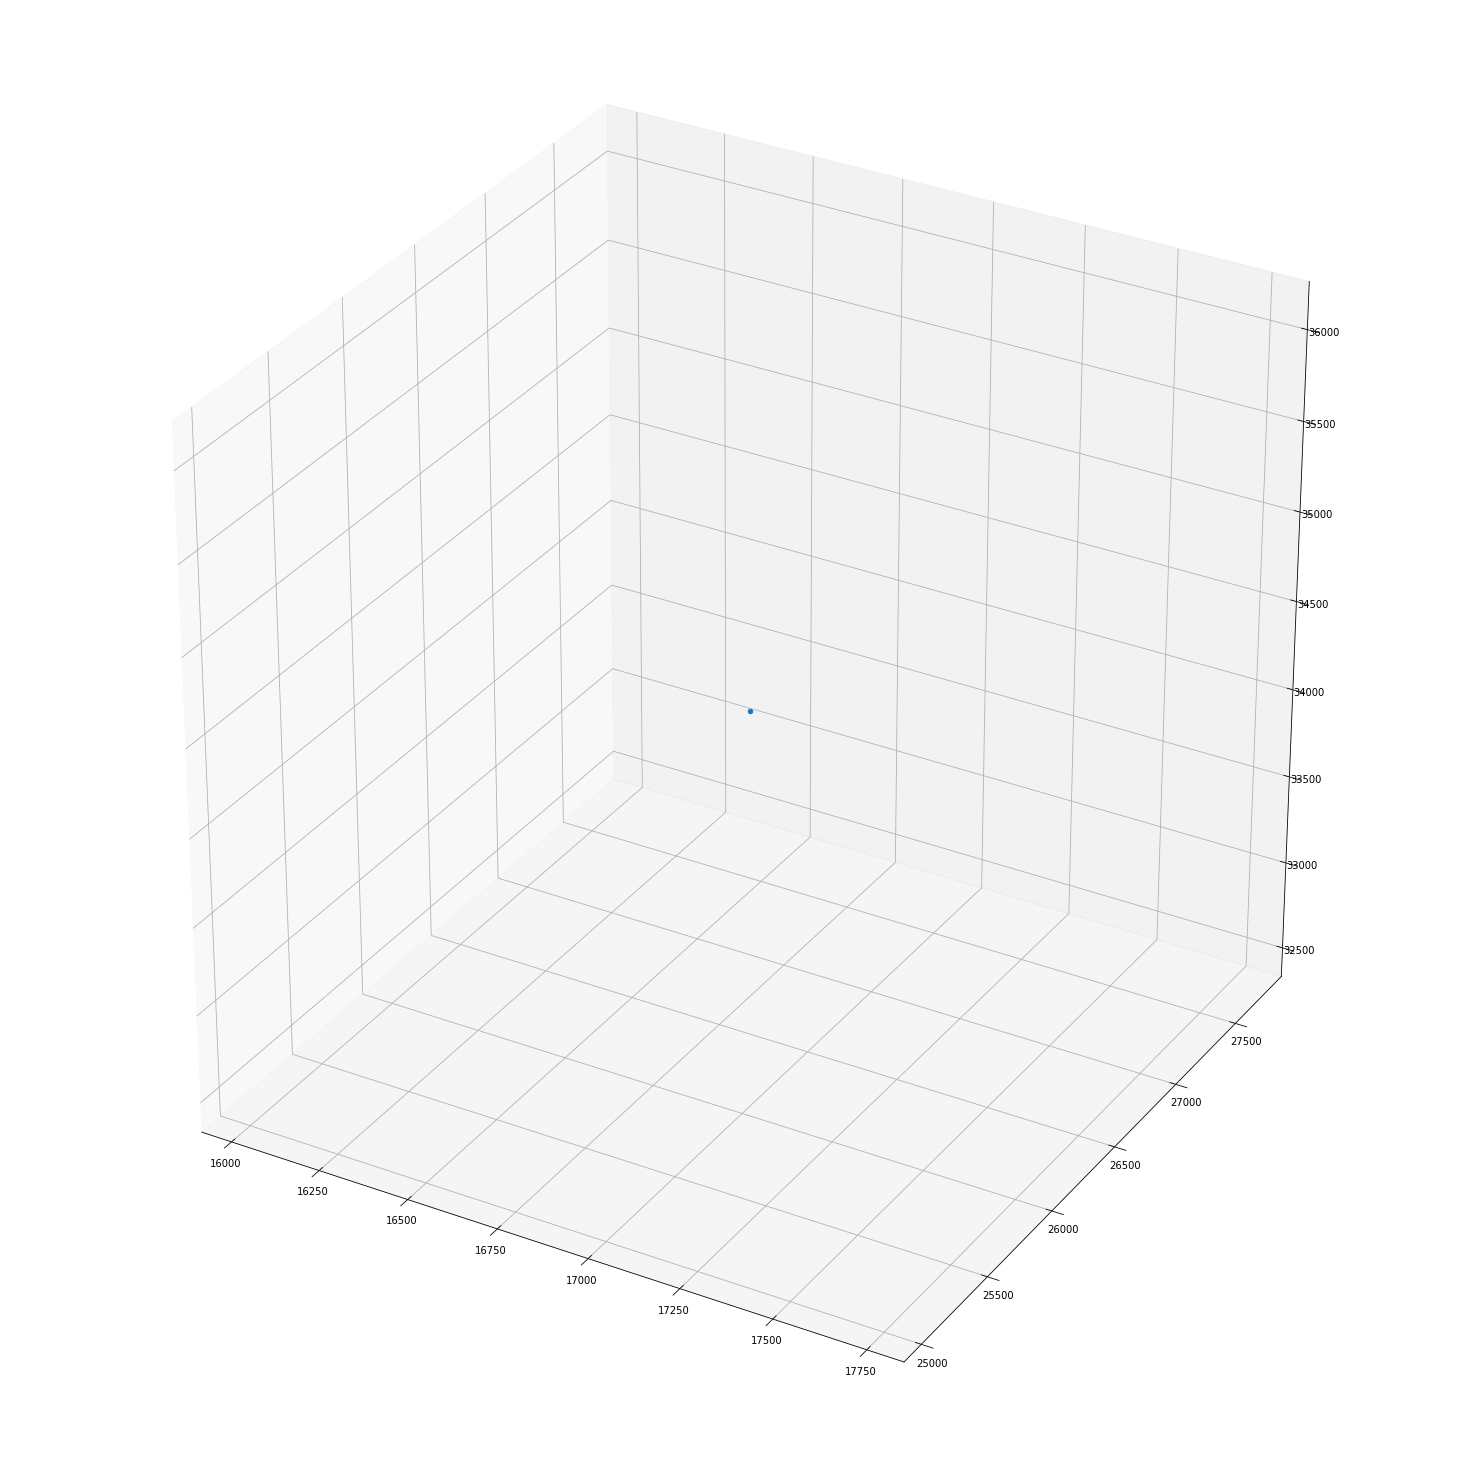

In [21]:
ax = Axes3D(plt.figure(figsize=(20,20)))
for seed in seeds[:100]:
    ax.scatter(seed[0], seed[1], seed[2])
    ax.plot(seed[0], seed[1], seed[2])
#ax.set_xlabel('r (mm)')
#ax.set_ylabel('phi (radians)')
#ax.set_zlabel('z (mm)')
plt.show()